In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
dt = pd.read_csv("Loan Prediction Dataset.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dt.shape

(614, 13)

In [4]:
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [6]:
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values for numerical terms
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean())

In [8]:
# fill the missing values for categorical terms
dt['Gender'] = dt["Gender"].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt["Married"].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt["Dependents"].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt["Self_Employed"].fillna(dt['Self_Employed'].mode()[0])

In [9]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

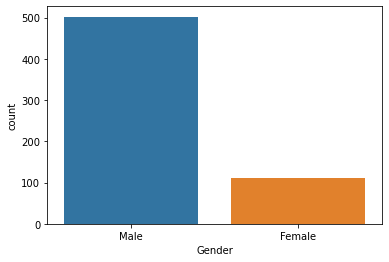

In [10]:
# categorical attributes visualization
sns.countplot(dt['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

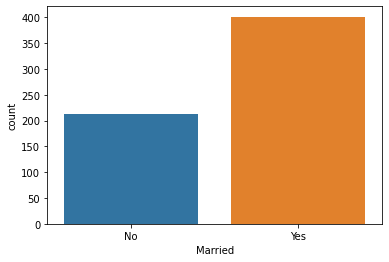

In [11]:
sns.countplot(dt['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

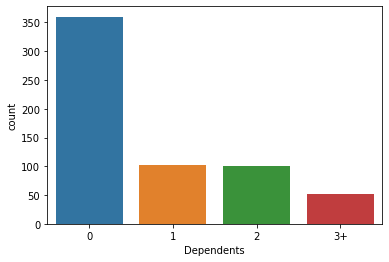

In [12]:
sns.countplot(dt['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

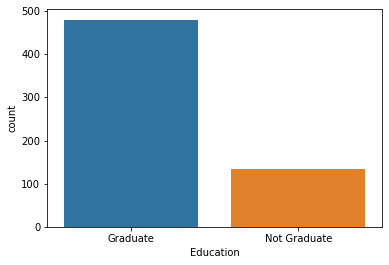

In [13]:
sns.countplot(dt['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

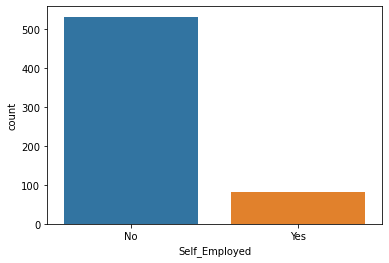

In [14]:
sns.countplot(dt['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

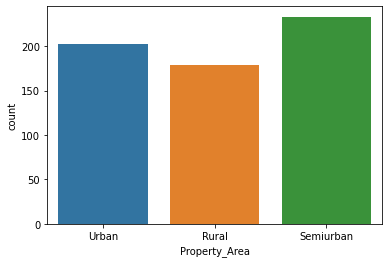

In [15]:
sns.countplot(dt['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

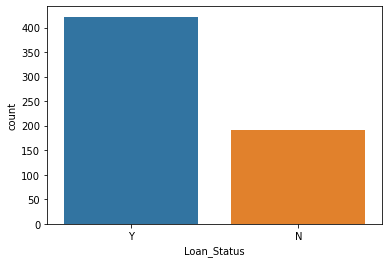

In [16]:
sns.countplot(dt['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

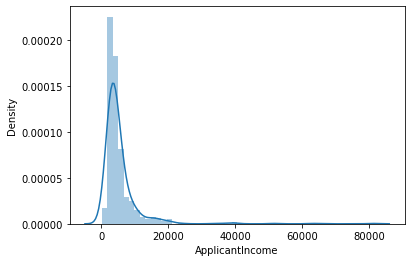

In [17]:
# numerical attributes visualization
sns.distplot(dt["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

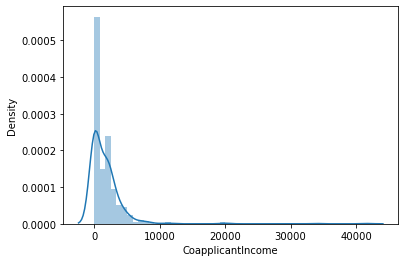

In [18]:
sns.distplot(dt["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

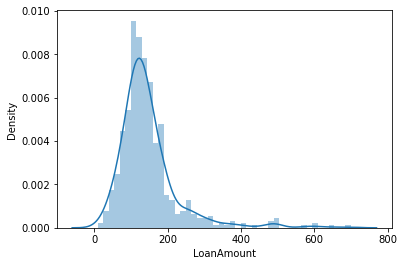

In [19]:
sns.distplot(dt["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

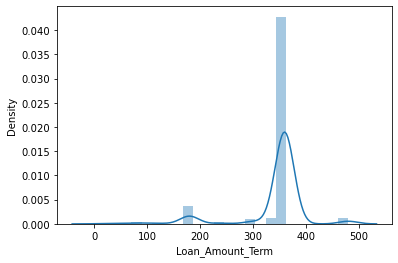

In [20]:
sns.distplot(dt['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

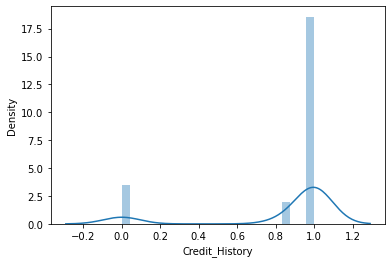

In [21]:
sns.distplot(dt['Credit_History'])

## Creation of new attributes

In [22]:
# total income
dt['Total_Income'] = dt['ApplicantIncome'] + dt['CoapplicantIncome']
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

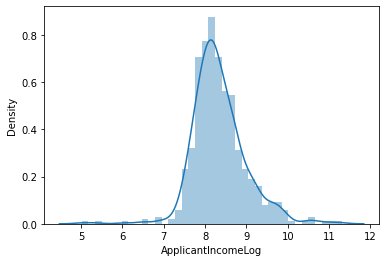

In [23]:
# apply log transformation to the attribute
dt['ApplicantIncomeLog'] = np.log(dt['ApplicantIncome'])
sns.distplot(dt["ApplicantIncomeLog"])

dt['CoapplicantIncomeLog'] = np.log(dt['CoapplicantIncome'])
sns.distplot(dt["CoapplicantIncomeLog"])

In [ ]:
dt['LoanAmountLog'] = np.log(dt['LoanAmount'])
sns.distplot(dt["LoanAmountLog"])

In [ ]:
dt['Loan_Amount_Term_Log'] = np.log(dt['Loan_Amount_Term'])
sns.distplot(dt["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

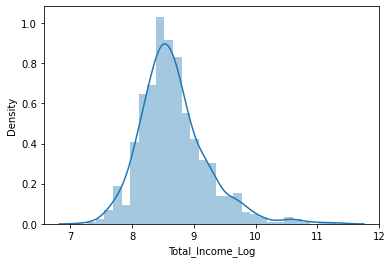

In [25]:
dt['Total_Income_Log'] = np.log(dt['Total_Income'])
sns.distplot(dt["Total_Income_Log"])

## Coorelation Matrix

<AxesSubplot:>

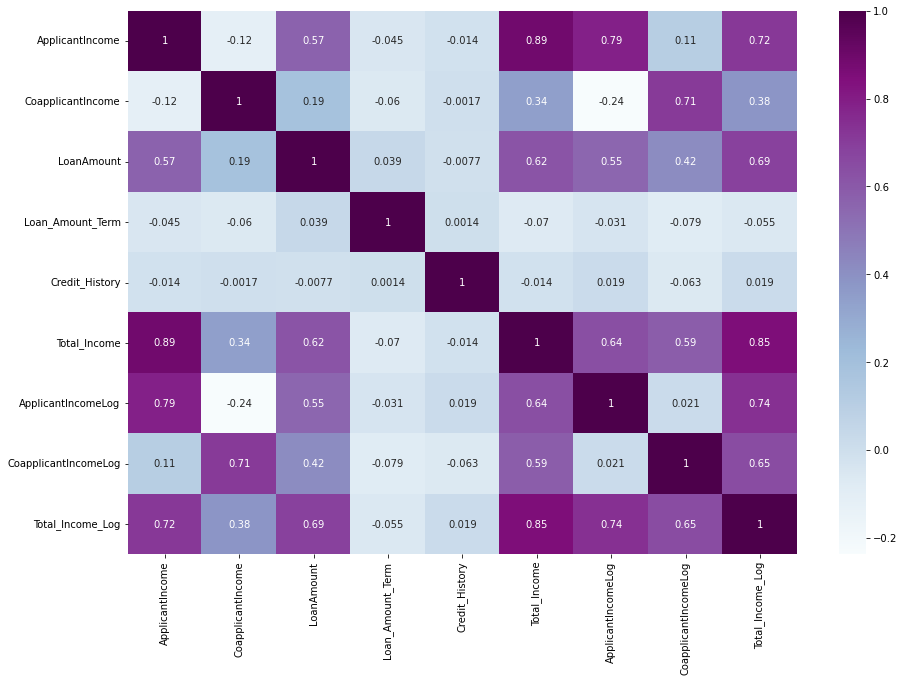

In [26]:
corr = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [27]:
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,8.699515


In [28]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
dt = dt.drop(columns=cols, axis=1)
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515


## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col])

In [30]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515


## Train-Test Split

In [31]:
X = dt.drop(columns=['Loan_Status'], axis=1)
y = dt['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

In [33]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 78.37837837837837
Cross validation is 80.9462881514061


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.5945945945946
Cross validation is 71.33813141410104


In [36]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 76.21621621621621
Cross validation is 78.18339330934293


In [37]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 69.1891891891892
Cross validation is 75.08729841396774


In [38]:
from xgboost import XGBClassifier

In [39]:
model = XGBClassifier()
classify(model, X, y)

[11:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is 73.51351351351352
[11:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:30] WARNING: C:/Users/Administrat

In [40]:
from lightgbm import LGBMClassifier

In [41]:
lgb = LGBMClassifier()
classify(lgb, X, y)

Accuracy is 75.13513513513513
Cross validation is 78.50459816073571


In [42]:
!pip install catboost

In [43]:
from catboost import CatBoostClassifier

In [44]:
cb = CatBoostClassifier()
classify(cb, X, y)

Learning rate set to 0.007178
0:	learn: 0.6892152	total: 136ms	remaining: 2m 15s
1:	learn: 0.6855056	total: 137ms	remaining: 1m 8s
2:	learn: 0.6818017	total: 139ms	remaining: 46.1s
3:	learn: 0.6780774	total: 141ms	remaining: 35.1s
4:	learn: 0.6746475	total: 142ms	remaining: 28.2s
5:	learn: 0.6710166	total: 143ms	remaining: 23.7s
6:	learn: 0.6676223	total: 145ms	remaining: 20.5s
7:	learn: 0.6640615	total: 147ms	remaining: 18.3s
8:	learn: 0.6608261	total: 149ms	remaining: 16.4s
9:	learn: 0.6569765	total: 152ms	remaining: 15s
10:	learn: 0.6535843	total: 155ms	remaining: 13.9s
11:	learn: 0.6503130	total: 157ms	remaining: 12.9s
12:	learn: 0.6472834	total: 158ms	remaining: 12s
13:	learn: 0.6435209	total: 161ms	remaining: 11.3s
14:	learn: 0.6398668	total: 163ms	remaining: 10.7s
15:	learn: 0.6367492	total: 166ms	remaining: 10.2s
16:	learn: 0.6335733	total: 168ms	remaining: 9.72s
17:	learn: 0.6307207	total: 169ms	remaining: 9.23s
18:	learn: 0.6279932	total: 170ms	remaining: 8.78s
19:	learn: 0.6

204:	learn: 0.4133712	total: 649ms	remaining: 2.52s
205:	learn: 0.4127872	total: 652ms	remaining: 2.51s
206:	learn: 0.4121999	total: 655ms	remaining: 2.51s
207:	learn: 0.4118445	total: 658ms	remaining: 2.5s
208:	learn: 0.4113233	total: 660ms	remaining: 2.5s
209:	learn: 0.4107972	total: 663ms	remaining: 2.49s
210:	learn: 0.4100863	total: 665ms	remaining: 2.49s
211:	learn: 0.4094193	total: 668ms	remaining: 2.48s
212:	learn: 0.4089179	total: 670ms	remaining: 2.48s
213:	learn: 0.4083365	total: 673ms	remaining: 2.47s
214:	learn: 0.4079678	total: 675ms	remaining: 2.46s
215:	learn: 0.4077243	total: 702ms	remaining: 2.55s
216:	learn: 0.4071847	total: 704ms	remaining: 2.54s
217:	learn: 0.4067810	total: 707ms	remaining: 2.54s
218:	learn: 0.4062955	total: 709ms	remaining: 2.53s
219:	learn: 0.4058784	total: 712ms	remaining: 2.52s
220:	learn: 0.4052994	total: 714ms	remaining: 2.52s
221:	learn: 0.4048007	total: 716ms	remaining: 2.51s
222:	learn: 0.4042860	total: 718ms	remaining: 2.5s
223:	learn: 0.4

367:	learn: 0.3575133	total: 1.15s	remaining: 1.97s
368:	learn: 0.3570763	total: 1.15s	remaining: 1.97s
369:	learn: 0.3567600	total: 1.15s	remaining: 1.97s
370:	learn: 0.3564167	total: 1.16s	remaining: 1.96s
371:	learn: 0.3560655	total: 1.16s	remaining: 1.96s
372:	learn: 0.3558518	total: 1.16s	remaining: 1.95s
373:	learn: 0.3556516	total: 1.17s	remaining: 1.96s
374:	learn: 0.3553274	total: 1.17s	remaining: 1.96s
375:	learn: 0.3548507	total: 1.18s	remaining: 1.95s
376:	learn: 0.3545754	total: 1.18s	remaining: 1.95s
377:	learn: 0.3542506	total: 1.18s	remaining: 1.94s
378:	learn: 0.3539262	total: 1.18s	remaining: 1.94s
379:	learn: 0.3536342	total: 1.18s	remaining: 1.93s
380:	learn: 0.3532121	total: 1.19s	remaining: 1.93s
381:	learn: 0.3530582	total: 1.19s	remaining: 1.92s
382:	learn: 0.3527377	total: 1.19s	remaining: 1.92s
383:	learn: 0.3524909	total: 1.19s	remaining: 1.92s
384:	learn: 0.3522558	total: 1.2s	remaining: 1.91s
385:	learn: 0.3520487	total: 1.2s	remaining: 1.91s
386:	learn: 0.

581:	learn: 0.3053728	total: 1.85s	remaining: 1.33s
582:	learn: 0.3052354	total: 1.85s	remaining: 1.32s
583:	learn: 0.3049513	total: 1.85s	remaining: 1.32s
584:	learn: 0.3045792	total: 1.85s	remaining: 1.31s
585:	learn: 0.3043232	total: 1.86s	remaining: 1.31s
586:	learn: 0.3040157	total: 1.86s	remaining: 1.31s
587:	learn: 0.3037351	total: 1.86s	remaining: 1.3s
588:	learn: 0.3037037	total: 1.86s	remaining: 1.3s
589:	learn: 0.3035060	total: 1.86s	remaining: 1.3s
590:	learn: 0.3033644	total: 1.87s	remaining: 1.29s
591:	learn: 0.3031296	total: 1.87s	remaining: 1.29s
592:	learn: 0.3029170	total: 1.87s	remaining: 1.28s
593:	learn: 0.3027343	total: 1.88s	remaining: 1.28s
594:	learn: 0.3024832	total: 1.88s	remaining: 1.28s
595:	learn: 0.3023236	total: 1.88s	remaining: 1.27s
596:	learn: 0.3021139	total: 1.88s	remaining: 1.27s
597:	learn: 0.3020955	total: 1.88s	remaining: 1.26s
598:	learn: 0.3019268	total: 1.89s	remaining: 1.26s
599:	learn: 0.3017002	total: 1.89s	remaining: 1.26s
600:	learn: 0.3

782:	learn: 0.2663079	total: 2.32s	remaining: 642ms
783:	learn: 0.2661548	total: 2.32s	remaining: 639ms
784:	learn: 0.2659783	total: 2.32s	remaining: 636ms
785:	learn: 0.2656985	total: 2.32s	remaining: 633ms
786:	learn: 0.2655964	total: 2.33s	remaining: 629ms
787:	learn: 0.2653545	total: 2.33s	remaining: 626ms
788:	learn: 0.2651037	total: 2.33s	remaining: 623ms
789:	learn: 0.2650237	total: 2.33s	remaining: 620ms
790:	learn: 0.2648009	total: 2.34s	remaining: 617ms
791:	learn: 0.2646380	total: 2.34s	remaining: 614ms
792:	learn: 0.2643846	total: 2.34s	remaining: 611ms
793:	learn: 0.2643721	total: 2.34s	remaining: 608ms
794:	learn: 0.2643614	total: 2.34s	remaining: 605ms
795:	learn: 0.2642091	total: 2.35s	remaining: 602ms
796:	learn: 0.2639662	total: 2.35s	remaining: 599ms
797:	learn: 0.2637576	total: 2.35s	remaining: 596ms
798:	learn: 0.2636197	total: 2.35s	remaining: 592ms
799:	learn: 0.2634728	total: 2.36s	remaining: 589ms
800:	learn: 0.2632356	total: 2.36s	remaining: 586ms
801:	learn: 

945:	learn: 0.2387282	total: 2.82s	remaining: 161ms
946:	learn: 0.2385359	total: 2.82s	remaining: 158ms
947:	learn: 0.2384972	total: 2.82s	remaining: 155ms
948:	learn: 0.2383913	total: 2.82s	remaining: 152ms
949:	learn: 0.2382001	total: 2.83s	remaining: 149ms
950:	learn: 0.2380177	total: 2.83s	remaining: 146ms
951:	learn: 0.2378601	total: 2.83s	remaining: 143ms
952:	learn: 0.2376772	total: 2.83s	remaining: 140ms
953:	learn: 0.2374955	total: 2.84s	remaining: 137ms
954:	learn: 0.2372849	total: 2.84s	remaining: 134ms
955:	learn: 0.2371384	total: 2.84s	remaining: 131ms
956:	learn: 0.2369780	total: 2.85s	remaining: 128ms
957:	learn: 0.2367961	total: 2.87s	remaining: 126ms
958:	learn: 0.2366746	total: 2.87s	remaining: 123ms
959:	learn: 0.2366067	total: 2.87s	remaining: 120ms
960:	learn: 0.2364934	total: 2.87s	remaining: 117ms
961:	learn: 0.2363242	total: 2.88s	remaining: 114ms
962:	learn: 0.2362186	total: 2.88s	remaining: 111ms
963:	learn: 0.2360897	total: 2.88s	remaining: 108ms
964:	learn: 

124:	learn: 0.4670398	total: 354ms	remaining: 2.48s
125:	learn: 0.4662091	total: 356ms	remaining: 2.47s
126:	learn: 0.4654979	total: 358ms	remaining: 2.46s
127:	learn: 0.4647916	total: 361ms	remaining: 2.46s
128:	learn: 0.4638458	total: 363ms	remaining: 2.45s
129:	learn: 0.4632572	total: 365ms	remaining: 2.44s
130:	learn: 0.4623728	total: 367ms	remaining: 2.44s
131:	learn: 0.4620485	total: 369ms	remaining: 2.42s
132:	learn: 0.4614303	total: 371ms	remaining: 2.42s
133:	learn: 0.4605764	total: 373ms	remaining: 2.41s
134:	learn: 0.4600110	total: 375ms	remaining: 2.4s
135:	learn: 0.4591112	total: 377ms	remaining: 2.4s
136:	learn: 0.4585109	total: 392ms	remaining: 2.47s
137:	learn: 0.4575971	total: 394ms	remaining: 2.46s
138:	learn: 0.4569103	total: 396ms	remaining: 2.45s
139:	learn: 0.4565789	total: 397ms	remaining: 2.44s
140:	learn: 0.4560929	total: 398ms	remaining: 2.42s
141:	learn: 0.4555576	total: 400ms	remaining: 2.42s
142:	learn: 0.4547144	total: 402ms	remaining: 2.41s
143:	learn: 0.

285:	learn: 0.3933844	total: 864ms	remaining: 2.16s
286:	learn: 0.3930033	total: 866ms	remaining: 2.15s
287:	learn: 0.3927030	total: 869ms	remaining: 2.15s
288:	learn: 0.3923040	total: 871ms	remaining: 2.14s
289:	learn: 0.3919912	total: 874ms	remaining: 2.14s
290:	learn: 0.3915914	total: 876ms	remaining: 2.13s
291:	learn: 0.3911418	total: 879ms	remaining: 2.13s
292:	learn: 0.3905416	total: 888ms	remaining: 2.14s
293:	learn: 0.3902871	total: 891ms	remaining: 2.14s
294:	learn: 0.3902258	total: 892ms	remaining: 2.13s
295:	learn: 0.3899814	total: 894ms	remaining: 2.13s
296:	learn: 0.3896229	total: 914ms	remaining: 2.16s
297:	learn: 0.3891521	total: 928ms	remaining: 2.19s
298:	learn: 0.3885738	total: 930ms	remaining: 2.18s
299:	learn: 0.3883473	total: 932ms	remaining: 2.17s
300:	learn: 0.3879042	total: 934ms	remaining: 2.17s
301:	learn: 0.3875328	total: 936ms	remaining: 2.16s
302:	learn: 0.3872046	total: 938ms	remaining: 2.16s
303:	learn: 0.3869858	total: 940ms	remaining: 2.15s
304:	learn: 

480:	learn: 0.3392132	total: 1.36s	remaining: 1.47s
481:	learn: 0.3389465	total: 1.37s	remaining: 1.47s
482:	learn: 0.3386886	total: 1.37s	remaining: 1.47s
483:	learn: 0.3383808	total: 1.37s	remaining: 1.46s
484:	learn: 0.3380636	total: 1.37s	remaining: 1.46s
485:	learn: 0.3375615	total: 1.38s	remaining: 1.46s
486:	learn: 0.3373705	total: 1.38s	remaining: 1.45s
487:	learn: 0.3372444	total: 1.38s	remaining: 1.45s
488:	learn: 0.3370544	total: 1.39s	remaining: 1.45s
489:	learn: 0.3367748	total: 1.39s	remaining: 1.45s
490:	learn: 0.3365525	total: 1.39s	remaining: 1.44s
491:	learn: 0.3362735	total: 1.39s	remaining: 1.44s
492:	learn: 0.3361525	total: 1.4s	remaining: 1.44s
493:	learn: 0.3359195	total: 1.4s	remaining: 1.43s
494:	learn: 0.3356922	total: 1.4s	remaining: 1.43s
495:	learn: 0.3356775	total: 1.4s	remaining: 1.43s
496:	learn: 0.3355536	total: 1.41s	remaining: 1.42s
497:	learn: 0.3354659	total: 1.41s	remaining: 1.42s
498:	learn: 0.3351404	total: 1.41s	remaining: 1.42s
499:	learn: 0.33

692:	learn: 0.2964128	total: 2.04s	remaining: 903ms
693:	learn: 0.2961784	total: 2.04s	remaining: 899ms
694:	learn: 0.2959172	total: 2.04s	remaining: 896ms
695:	learn: 0.2955664	total: 2.04s	remaining: 893ms
696:	learn: 0.2953947	total: 2.05s	remaining: 890ms
697:	learn: 0.2950917	total: 2.05s	remaining: 887ms
698:	learn: 0.2948180	total: 2.05s	remaining: 883ms
699:	learn: 0.2947675	total: 2.05s	remaining: 880ms
700:	learn: 0.2945992	total: 2.06s	remaining: 877ms
701:	learn: 0.2944911	total: 2.06s	remaining: 874ms
702:	learn: 0.2943304	total: 2.06s	remaining: 871ms
703:	learn: 0.2942056	total: 2.06s	remaining: 868ms
704:	learn: 0.2940192	total: 2.06s	remaining: 864ms
705:	learn: 0.2938331	total: 2.07s	remaining: 861ms
706:	learn: 0.2936488	total: 2.07s	remaining: 858ms
707:	learn: 0.2934883	total: 2.07s	remaining: 855ms
708:	learn: 0.2932977	total: 2.08s	remaining: 852ms
709:	learn: 0.2930245	total: 2.08s	remaining: 849ms
710:	learn: 0.2928877	total: 2.08s	remaining: 846ms
711:	learn: 

866:	learn: 0.2647174	total: 2.54s	remaining: 389ms
867:	learn: 0.2645855	total: 2.54s	remaining: 386ms
868:	learn: 0.2644682	total: 2.54s	remaining: 383ms
869:	learn: 0.2643533	total: 2.54s	remaining: 380ms
870:	learn: 0.2640609	total: 2.55s	remaining: 377ms
871:	learn: 0.2639244	total: 2.55s	remaining: 374ms
872:	learn: 0.2638281	total: 2.55s	remaining: 371ms
873:	learn: 0.2636370	total: 2.56s	remaining: 368ms
874:	learn: 0.2634738	total: 2.56s	remaining: 365ms
875:	learn: 0.2633047	total: 2.56s	remaining: 362ms
876:	learn: 0.2630832	total: 2.56s	remaining: 359ms
877:	learn: 0.2629503	total: 2.56s	remaining: 356ms
878:	learn: 0.2626848	total: 2.58s	remaining: 355ms
879:	learn: 0.2625841	total: 2.58s	remaining: 352ms
880:	learn: 0.2623276	total: 2.59s	remaining: 349ms
881:	learn: 0.2622056	total: 2.59s	remaining: 346ms
882:	learn: 0.2619742	total: 2.59s	remaining: 343ms
883:	learn: 0.2617035	total: 2.59s	remaining: 340ms
884:	learn: 0.2614565	total: 2.6s	remaining: 337ms
885:	learn: 0

62:	learn: 0.5252132	total: 203ms	remaining: 3.02s
63:	learn: 0.5238251	total: 204ms	remaining: 2.99s
64:	learn: 0.5223369	total: 206ms	remaining: 2.96s
65:	learn: 0.5205804	total: 208ms	remaining: 2.94s
66:	learn: 0.5192146	total: 209ms	remaining: 2.91s
67:	learn: 0.5179178	total: 211ms	remaining: 2.88s
68:	learn: 0.5161641	total: 213ms	remaining: 2.87s
69:	learn: 0.5145371	total: 215ms	remaining: 2.85s
70:	learn: 0.5127637	total: 217ms	remaining: 2.85s
71:	learn: 0.5113097	total: 220ms	remaining: 2.84s
72:	learn: 0.5096585	total: 222ms	remaining: 2.82s
73:	learn: 0.5080864	total: 225ms	remaining: 2.81s
74:	learn: 0.5064629	total: 228ms	remaining: 2.81s
75:	learn: 0.5049009	total: 230ms	remaining: 2.8s
76:	learn: 0.5039475	total: 255ms	remaining: 3.06s
77:	learn: 0.5024345	total: 257ms	remaining: 3.04s
78:	learn: 0.5010471	total: 260ms	remaining: 3.03s
79:	learn: 0.4994907	total: 262ms	remaining: 3.01s
80:	learn: 0.4982735	total: 264ms	remaining: 3s
81:	learn: 0.4971563	total: 267ms	r

245:	learn: 0.3936017	total: 695ms	remaining: 2.13s
246:	learn: 0.3933734	total: 697ms	remaining: 2.13s
247:	learn: 0.3931024	total: 700ms	remaining: 2.12s
248:	learn: 0.3926636	total: 702ms	remaining: 2.12s
249:	learn: 0.3922514	total: 704ms	remaining: 2.11s
250:	learn: 0.3919988	total: 719ms	remaining: 2.15s
251:	learn: 0.3916657	total: 721ms	remaining: 2.14s
252:	learn: 0.3914743	total: 724ms	remaining: 2.14s
253:	learn: 0.3909533	total: 727ms	remaining: 2.13s
254:	learn: 0.3905393	total: 729ms	remaining: 2.13s
255:	learn: 0.3902523	total: 731ms	remaining: 2.12s
256:	learn: 0.3899837	total: 733ms	remaining: 2.12s
257:	learn: 0.3896217	total: 735ms	remaining: 2.11s
258:	learn: 0.3892386	total: 738ms	remaining: 2.11s
259:	learn: 0.3890415	total: 740ms	remaining: 2.1s
260:	learn: 0.3885265	total: 743ms	remaining: 2.1s
261:	learn: 0.3884881	total: 744ms	remaining: 2.1s
262:	learn: 0.3881084	total: 746ms	remaining: 2.09s
263:	learn: 0.3878313	total: 759ms	remaining: 2.12s
264:	learn: 0.3

429:	learn: 0.3398128	total: 1.21s	remaining: 1.61s
430:	learn: 0.3397978	total: 1.21s	remaining: 1.6s
431:	learn: 0.3396158	total: 1.22s	remaining: 1.6s
432:	learn: 0.3393495	total: 1.22s	remaining: 1.59s
433:	learn: 0.3391639	total: 1.22s	remaining: 1.59s
434:	learn: 0.3389657	total: 1.22s	remaining: 1.59s
435:	learn: 0.3387339	total: 1.23s	remaining: 1.58s
436:	learn: 0.3384135	total: 1.23s	remaining: 1.58s
437:	learn: 0.3381474	total: 1.23s	remaining: 1.58s
438:	learn: 0.3380368	total: 1.24s	remaining: 1.59s
439:	learn: 0.3378369	total: 1.25s	remaining: 1.58s
440:	learn: 0.3375726	total: 1.25s	remaining: 1.58s
441:	learn: 0.3372304	total: 1.25s	remaining: 1.58s
442:	learn: 0.3370572	total: 1.25s	remaining: 1.57s
443:	learn: 0.3367541	total: 1.25s	remaining: 1.57s
444:	learn: 0.3365064	total: 1.26s	remaining: 1.57s
445:	learn: 0.3361427	total: 1.26s	remaining: 1.56s
446:	learn: 0.3358209	total: 1.26s	remaining: 1.56s
447:	learn: 0.3355159	total: 1.26s	remaining: 1.56s
448:	learn: 0.

637:	learn: 0.2952328	total: 1.88s	remaining: 1.06s
638:	learn: 0.2951691	total: 1.88s	remaining: 1.06s
639:	learn: 0.2949812	total: 1.88s	remaining: 1.06s
640:	learn: 0.2948759	total: 1.88s	remaining: 1.05s
641:	learn: 0.2946155	total: 1.88s	remaining: 1.05s
642:	learn: 0.2945209	total: 1.89s	remaining: 1.05s
643:	learn: 0.2942513	total: 1.89s	remaining: 1.04s
644:	learn: 0.2942501	total: 1.89s	remaining: 1.04s
645:	learn: 0.2940449	total: 1.9s	remaining: 1.04s
646:	learn: 0.2938294	total: 1.9s	remaining: 1.04s
647:	learn: 0.2936584	total: 1.91s	remaining: 1.03s
648:	learn: 0.2934105	total: 1.91s	remaining: 1.03s
649:	learn: 0.2931999	total: 1.91s	remaining: 1.03s
650:	learn: 0.2927094	total: 1.91s	remaining: 1.02s
651:	learn: 0.2925497	total: 1.92s	remaining: 1.02s
652:	learn: 0.2924655	total: 1.92s	remaining: 1.02s
653:	learn: 0.2923482	total: 1.92s	remaining: 1.01s
654:	learn: 0.2921856	total: 1.92s	remaining: 1.01s
655:	learn: 0.2919334	total: 1.92s	remaining: 1.01s
656:	learn: 0.

830:	learn: 0.2611791	total: 2.53s	remaining: 514ms
831:	learn: 0.2610273	total: 2.53s	remaining: 511ms
832:	learn: 0.2608956	total: 2.53s	remaining: 508ms
833:	learn: 0.2606688	total: 2.53s	remaining: 504ms
834:	learn: 0.2605075	total: 2.54s	remaining: 501ms
835:	learn: 0.2603259	total: 2.54s	remaining: 498ms
836:	learn: 0.2601647	total: 2.54s	remaining: 495ms
837:	learn: 0.2599590	total: 2.54s	remaining: 492ms
838:	learn: 0.2598344	total: 2.55s	remaining: 489ms
839:	learn: 0.2596029	total: 2.55s	remaining: 486ms
840:	learn: 0.2593732	total: 2.55s	remaining: 483ms
841:	learn: 0.2592771	total: 2.55s	remaining: 479ms
842:	learn: 0.2590973	total: 2.58s	remaining: 480ms
843:	learn: 0.2588970	total: 2.58s	remaining: 477ms
844:	learn: 0.2588580	total: 2.58s	remaining: 473ms
845:	learn: 0.2586169	total: 2.58s	remaining: 470ms
846:	learn: 0.2584797	total: 2.58s	remaining: 467ms
847:	learn: 0.2583158	total: 2.59s	remaining: 464ms
848:	learn: 0.2581896	total: 2.59s	remaining: 460ms
849:	learn: 

0:	learn: 0.6889689	total: 2.36ms	remaining: 2.36s
1:	learn: 0.6850789	total: 3.33ms	remaining: 1.66s
2:	learn: 0.6809139	total: 5.39ms	remaining: 1.79s
3:	learn: 0.6770111	total: 7.25ms	remaining: 1.8s
4:	learn: 0.6733912	total: 7.73ms	remaining: 1.54s
5:	learn: 0.6696123	total: 9.58ms	remaining: 1.59s
6:	learn: 0.6655013	total: 11.5ms	remaining: 1.63s
7:	learn: 0.6614685	total: 14.2ms	remaining: 1.76s
8:	learn: 0.6575270	total: 16.4ms	remaining: 1.81s
9:	learn: 0.6532341	total: 18.8ms	remaining: 1.86s
10:	learn: 0.6499068	total: 20.1ms	remaining: 1.81s
11:	learn: 0.6464253	total: 21.8ms	remaining: 1.79s
12:	learn: 0.6430039	total: 23.3ms	remaining: 1.77s
13:	learn: 0.6394453	total: 25.7ms	remaining: 1.81s
14:	learn: 0.6357847	total: 50.4ms	remaining: 3.31s
15:	learn: 0.6320388	total: 52.9ms	remaining: 3.25s
16:	learn: 0.6284958	total: 55.3ms	remaining: 3.2s
17:	learn: 0.6250353	total: 57.6ms	remaining: 3.14s
18:	learn: 0.6229174	total: 58.7ms	remaining: 3.03s
19:	learn: 0.6196560	tot

188:	learn: 0.4211843	total: 512ms	remaining: 2.2s
189:	learn: 0.4209439	total: 514ms	remaining: 2.19s
190:	learn: 0.4204593	total: 516ms	remaining: 2.19s
191:	learn: 0.4203677	total: 518ms	remaining: 2.18s
192:	learn: 0.4198646	total: 520ms	remaining: 2.17s
193:	learn: 0.4192685	total: 523ms	remaining: 2.17s
194:	learn: 0.4191170	total: 523ms	remaining: 2.16s
195:	learn: 0.4186731	total: 526ms	remaining: 2.16s
196:	learn: 0.4182001	total: 529ms	remaining: 2.15s
197:	learn: 0.4178388	total: 531ms	remaining: 2.15s
198:	learn: 0.4176602	total: 532ms	remaining: 2.14s
199:	learn: 0.4169857	total: 534ms	remaining: 2.14s
200:	learn: 0.4163420	total: 537ms	remaining: 2.13s
201:	learn: 0.4157382	total: 539ms	remaining: 2.13s
202:	learn: 0.4151613	total: 554ms	remaining: 2.17s
203:	learn: 0.4147330	total: 556ms	remaining: 2.17s
204:	learn: 0.4142289	total: 558ms	remaining: 2.16s
205:	learn: 0.4137584	total: 560ms	remaining: 2.16s
206:	learn: 0.4132172	total: 562ms	remaining: 2.15s
207:	learn: 0

368:	learn: 0.3608448	total: 990ms	remaining: 1.69s
369:	learn: 0.3604562	total: 1.02s	remaining: 1.73s
370:	learn: 0.3601204	total: 1.02s	remaining: 1.73s
371:	learn: 0.3598534	total: 1.02s	remaining: 1.73s
372:	learn: 0.3595240	total: 1.02s	remaining: 1.72s
373:	learn: 0.3594901	total: 1.03s	remaining: 1.72s
374:	learn: 0.3591787	total: 1.03s	remaining: 1.71s
375:	learn: 0.3588887	total: 1.03s	remaining: 1.71s
376:	learn: 0.3585312	total: 1.03s	remaining: 1.71s
377:	learn: 0.3581307	total: 1.03s	remaining: 1.7s
378:	learn: 0.3579175	total: 1.04s	remaining: 1.7s
379:	learn: 0.3576191	total: 1.04s	remaining: 1.7s
380:	learn: 0.3574178	total: 1.04s	remaining: 1.69s
381:	learn: 0.3573219	total: 1.04s	remaining: 1.69s
382:	learn: 0.3572652	total: 1.04s	remaining: 1.68s
383:	learn: 0.3571620	total: 1.04s	remaining: 1.68s
384:	learn: 0.3569257	total: 1.05s	remaining: 1.67s
385:	learn: 0.3567567	total: 1.06s	remaining: 1.69s
386:	learn: 0.3564280	total: 1.06s	remaining: 1.68s
387:	learn: 0.3

562:	learn: 0.3150593	total: 1.67s	remaining: 1.29s
563:	learn: 0.3148657	total: 1.67s	remaining: 1.29s
564:	learn: 0.3145160	total: 1.67s	remaining: 1.29s
565:	learn: 0.3143008	total: 1.67s	remaining: 1.28s
566:	learn: 0.3139693	total: 1.68s	remaining: 1.28s
567:	learn: 0.3137678	total: 1.68s	remaining: 1.28s
568:	learn: 0.3135724	total: 1.68s	remaining: 1.27s
569:	learn: 0.3132538	total: 1.68s	remaining: 1.27s
570:	learn: 0.3130535	total: 1.69s	remaining: 1.27s
571:	learn: 0.3128015	total: 1.69s	remaining: 1.26s
572:	learn: 0.3127737	total: 1.69s	remaining: 1.26s
573:	learn: 0.3125811	total: 1.69s	remaining: 1.26s
574:	learn: 0.3124366	total: 1.7s	remaining: 1.25s
575:	learn: 0.3122241	total: 1.7s	remaining: 1.25s
576:	learn: 0.3120450	total: 1.7s	remaining: 1.25s
577:	learn: 0.3117811	total: 1.7s	remaining: 1.24s
578:	learn: 0.3115230	total: 1.71s	remaining: 1.24s
579:	learn: 0.3113659	total: 1.71s	remaining: 1.24s
580:	learn: 0.3111658	total: 1.73s	remaining: 1.25s
581:	learn: 0.31

745:	learn: 0.2794087	total: 2.18s	remaining: 743ms
746:	learn: 0.2791545	total: 2.18s	remaining: 740ms
747:	learn: 0.2789119	total: 2.19s	remaining: 737ms
748:	learn: 0.2789000	total: 2.19s	remaining: 733ms
749:	learn: 0.2786737	total: 2.19s	remaining: 730ms
750:	learn: 0.2784613	total: 2.19s	remaining: 727ms
751:	learn: 0.2781427	total: 2.19s	remaining: 724ms
752:	learn: 0.2781356	total: 2.19s	remaining: 720ms
753:	learn: 0.2780013	total: 2.2s	remaining: 717ms
754:	learn: 0.2777919	total: 2.2s	remaining: 714ms
755:	learn: 0.2776780	total: 2.2s	remaining: 711ms
756:	learn: 0.2775562	total: 2.2s	remaining: 708ms
757:	learn: 0.2774164	total: 2.21s	remaining: 704ms
758:	learn: 0.2772819	total: 2.21s	remaining: 701ms
759:	learn: 0.2771324	total: 2.21s	remaining: 698ms
760:	learn: 0.2769764	total: 2.21s	remaining: 695ms
761:	learn: 0.2768590	total: 2.23s	remaining: 698ms
762:	learn: 0.2767384	total: 2.24s	remaining: 695ms
763:	learn: 0.2765893	total: 2.24s	remaining: 692ms
764:	learn: 0.27

910:	learn: 0.2526380	total: 2.7s	remaining: 264ms
911:	learn: 0.2524969	total: 2.7s	remaining: 261ms
912:	learn: 0.2523859	total: 2.71s	remaining: 258ms
913:	learn: 0.2522808	total: 2.71s	remaining: 255ms
914:	learn: 0.2521366	total: 2.71s	remaining: 252ms
915:	learn: 0.2520236	total: 2.71s	remaining: 249ms
916:	learn: 0.2518837	total: 2.71s	remaining: 246ms
917:	learn: 0.2517832	total: 2.72s	remaining: 243ms
918:	learn: 0.2515506	total: 2.72s	remaining: 240ms
919:	learn: 0.2513452	total: 2.72s	remaining: 237ms
920:	learn: 0.2511632	total: 2.72s	remaining: 234ms
921:	learn: 0.2510125	total: 2.73s	remaining: 231ms
922:	learn: 0.2508488	total: 2.73s	remaining: 228ms
923:	learn: 0.2506310	total: 2.74s	remaining: 226ms
924:	learn: 0.2504769	total: 2.74s	remaining: 223ms
925:	learn: 0.2503538	total: 2.75s	remaining: 220ms
926:	learn: 0.2501873	total: 2.75s	remaining: 216ms
927:	learn: 0.2500117	total: 2.75s	remaining: 213ms
928:	learn: 0.2497553	total: 2.75s	remaining: 210ms
929:	learn: 0.

73:	learn: 0.5236518	total: 183ms	remaining: 2.3s
74:	learn: 0.5221543	total: 186ms	remaining: 2.29s
75:	learn: 0.5208039	total: 189ms	remaining: 2.29s
76:	learn: 0.5193703	total: 191ms	remaining: 2.29s
77:	learn: 0.5181150	total: 194ms	remaining: 2.29s
78:	learn: 0.5171441	total: 196ms	remaining: 2.28s
79:	learn: 0.5156598	total: 198ms	remaining: 2.28s
80:	learn: 0.5141052	total: 201ms	remaining: 2.28s
81:	learn: 0.5129448	total: 204ms	remaining: 2.28s
82:	learn: 0.5122607	total: 205ms	remaining: 2.27s
83:	learn: 0.5107498	total: 208ms	remaining: 2.26s
84:	learn: 0.5093697	total: 210ms	remaining: 2.26s
85:	learn: 0.5082108	total: 219ms	remaining: 2.32s
86:	learn: 0.5073733	total: 220ms	remaining: 2.31s
87:	learn: 0.5061119	total: 222ms	remaining: 2.3s
88:	learn: 0.5048591	total: 224ms	remaining: 2.29s
89:	learn: 0.5041162	total: 225ms	remaining: 2.27s
90:	learn: 0.5034853	total: 226ms	remaining: 2.25s
91:	learn: 0.5023382	total: 228ms	remaining: 2.25s
92:	learn: 0.5010087	total: 230ms

250:	learn: 0.4088349	total: 718ms	remaining: 2.14s
251:	learn: 0.4083311	total: 720ms	remaining: 2.14s
252:	learn: 0.4078977	total: 722ms	remaining: 2.13s
253:	learn: 0.4073462	total: 725ms	remaining: 2.13s
254:	learn: 0.4069154	total: 727ms	remaining: 2.12s
255:	learn: 0.4065200	total: 729ms	remaining: 2.12s
256:	learn: 0.4064632	total: 730ms	remaining: 2.11s
257:	learn: 0.4064069	total: 731ms	remaining: 2.1s
258:	learn: 0.4062312	total: 732ms	remaining: 2.1s
259:	learn: 0.4056422	total: 734ms	remaining: 2.09s
260:	learn: 0.4052888	total: 737ms	remaining: 2.09s
261:	learn: 0.4049579	total: 740ms	remaining: 2.08s
262:	learn: 0.4043354	total: 743ms	remaining: 2.08s
263:	learn: 0.4037727	total: 745ms	remaining: 2.08s
264:	learn: 0.4036515	total: 747ms	remaining: 2.07s
265:	learn: 0.4032148	total: 760ms	remaining: 2.1s
266:	learn: 0.4030853	total: 761ms	remaining: 2.09s
267:	learn: 0.4027272	total: 763ms	remaining: 2.08s
268:	learn: 0.4023767	total: 765ms	remaining: 2.08s
269:	learn: 0.4

471:	learn: 0.3441634	total: 1.23s	remaining: 1.38s
472:	learn: 0.3438515	total: 1.23s	remaining: 1.37s
473:	learn: 0.3436354	total: 1.23s	remaining: 1.37s
474:	learn: 0.3434305	total: 1.24s	remaining: 1.37s
475:	learn: 0.3431240	total: 1.24s	remaining: 1.36s
476:	learn: 0.3429756	total: 1.24s	remaining: 1.36s
477:	learn: 0.3426363	total: 1.24s	remaining: 1.36s
478:	learn: 0.3423650	total: 1.25s	remaining: 1.35s
479:	learn: 0.3420535	total: 1.25s	remaining: 1.35s
480:	learn: 0.3418740	total: 1.25s	remaining: 1.35s
481:	learn: 0.3415669	total: 1.25s	remaining: 1.35s
482:	learn: 0.3413780	total: 1.25s	remaining: 1.34s
483:	learn: 0.3410283	total: 1.26s	remaining: 1.34s
484:	learn: 0.3406691	total: 1.26s	remaining: 1.34s
485:	learn: 0.3404552	total: 1.26s	remaining: 1.34s
486:	learn: 0.3402731	total: 1.26s	remaining: 1.33s
487:	learn: 0.3399522	total: 1.27s	remaining: 1.33s
488:	learn: 0.3397261	total: 1.27s	remaining: 1.33s
489:	learn: 0.3394664	total: 1.28s	remaining: 1.33s
490:	learn: 

649:	learn: 0.3066896	total: 1.74s	remaining: 935ms
650:	learn: 0.3065719	total: 1.74s	remaining: 932ms
651:	learn: 0.3064528	total: 1.74s	remaining: 929ms
652:	learn: 0.3062608	total: 1.74s	remaining: 926ms
653:	learn: 0.3060871	total: 1.75s	remaining: 923ms
654:	learn: 0.3059865	total: 1.75s	remaining: 921ms
655:	learn: 0.3056459	total: 1.75s	remaining: 918ms
656:	learn: 0.3055006	total: 1.75s	remaining: 915ms
657:	learn: 0.3052865	total: 1.75s	remaining: 912ms
658:	learn: 0.3050318	total: 1.76s	remaining: 909ms
659:	learn: 0.3049285	total: 1.76s	remaining: 909ms
660:	learn: 0.3047124	total: 1.77s	remaining: 907ms
661:	learn: 0.3045355	total: 1.77s	remaining: 904ms
662:	learn: 0.3043868	total: 1.77s	remaining: 901ms
663:	learn: 0.3041985	total: 1.77s	remaining: 898ms
664:	learn: 0.3040355	total: 1.78s	remaining: 895ms
665:	learn: 0.3038116	total: 1.78s	remaining: 892ms
666:	learn: 0.3036680	total: 1.78s	remaining: 890ms
667:	learn: 0.3035503	total: 1.78s	remaining: 887ms
668:	learn: 

861:	learn: 0.2692794	total: 2.42s	remaining: 388ms
862:	learn: 0.2691550	total: 2.42s	remaining: 385ms
863:	learn: 0.2689936	total: 2.42s	remaining: 382ms
864:	learn: 0.2687528	total: 2.43s	remaining: 379ms
865:	learn: 0.2686030	total: 2.43s	remaining: 376ms
866:	learn: 0.2684959	total: 2.43s	remaining: 373ms
867:	learn: 0.2683575	total: 2.43s	remaining: 370ms
868:	learn: 0.2682591	total: 2.43s	remaining: 367ms
869:	learn: 0.2681264	total: 2.44s	remaining: 364ms
870:	learn: 0.2679656	total: 2.44s	remaining: 361ms
871:	learn: 0.2678158	total: 2.44s	remaining: 358ms
872:	learn: 0.2677127	total: 2.44s	remaining: 356ms
873:	learn: 0.2675097	total: 2.45s	remaining: 353ms
874:	learn: 0.2673280	total: 2.45s	remaining: 350ms
875:	learn: 0.2671134	total: 2.45s	remaining: 347ms
876:	learn: 0.2670370	total: 2.46s	remaining: 344ms
877:	learn: 0.2668894	total: 2.46s	remaining: 342ms
878:	learn: 0.2666431	total: 2.46s	remaining: 339ms
879:	learn: 0.2664402	total: 2.46s	remaining: 336ms
880:	learn: 

55:	learn: 0.5437206	total: 150ms	remaining: 2.53s
56:	learn: 0.5421378	total: 153ms	remaining: 2.52s
57:	learn: 0.5407705	total: 154ms	remaining: 2.5s
58:	learn: 0.5394723	total: 155ms	remaining: 2.47s
59:	learn: 0.5381816	total: 156ms	remaining: 2.44s
60:	learn: 0.5367893	total: 157ms	remaining: 2.42s
61:	learn: 0.5352017	total: 160ms	remaining: 2.41s
62:	learn: 0.5338250	total: 161ms	remaining: 2.39s
63:	learn: 0.5325567	total: 162ms	remaining: 2.37s
64:	learn: 0.5314060	total: 163ms	remaining: 2.34s
65:	learn: 0.5299576	total: 165ms	remaining: 2.34s
66:	learn: 0.5284251	total: 168ms	remaining: 2.34s
67:	learn: 0.5268550	total: 170ms	remaining: 2.33s
68:	learn: 0.5257065	total: 171ms	remaining: 2.31s
69:	learn: 0.5243348	total: 174ms	remaining: 2.31s
70:	learn: 0.5229920	total: 176ms	remaining: 2.31s
71:	learn: 0.5219162	total: 178ms	remaining: 2.29s
72:	learn: 0.5204151	total: 196ms	remaining: 2.48s
73:	learn: 0.5192264	total: 197ms	remaining: 2.47s
74:	learn: 0.5177664	total: 200m

267:	learn: 0.4001518	total: 668ms	remaining: 1.82s
268:	learn: 0.3997302	total: 671ms	remaining: 1.82s
269:	learn: 0.3994742	total: 673ms	remaining: 1.82s
270:	learn: 0.3991475	total: 676ms	remaining: 1.82s
271:	learn: 0.3988769	total: 678ms	remaining: 1.81s
272:	learn: 0.3987976	total: 679ms	remaining: 1.81s
273:	learn: 0.3984209	total: 681ms	remaining: 1.8s
274:	learn: 0.3979292	total: 683ms	remaining: 1.8s
275:	learn: 0.3973889	total: 694ms	remaining: 1.82s
276:	learn: 0.3970684	total: 696ms	remaining: 1.82s
277:	learn: 0.3967660	total: 699ms	remaining: 1.81s
278:	learn: 0.3965332	total: 701ms	remaining: 1.81s
279:	learn: 0.3961973	total: 703ms	remaining: 1.81s
280:	learn: 0.3959626	total: 706ms	remaining: 1.8s
281:	learn: 0.3957022	total: 708ms	remaining: 1.8s
282:	learn: 0.3953775	total: 710ms	remaining: 1.8s
283:	learn: 0.3950275	total: 713ms	remaining: 1.8s
284:	learn: 0.3947450	total: 715ms	remaining: 1.79s
285:	learn: 0.3945159	total: 718ms	remaining: 1.79s
286:	learn: 0.3940

470:	learn: 0.3437134	total: 1.37s	remaining: 1.54s
471:	learn: 0.3434538	total: 1.37s	remaining: 1.53s
472:	learn: 0.3432948	total: 1.37s	remaining: 1.53s
473:	learn: 0.3431367	total: 1.38s	remaining: 1.53s
474:	learn: 0.3428694	total: 1.38s	remaining: 1.52s
475:	learn: 0.3426073	total: 1.38s	remaining: 1.52s
476:	learn: 0.3422999	total: 1.38s	remaining: 1.51s
477:	learn: 0.3421935	total: 1.38s	remaining: 1.51s
478:	learn: 0.3418833	total: 1.39s	remaining: 1.51s
479:	learn: 0.3416827	total: 1.39s	remaining: 1.5s
480:	learn: 0.3413516	total: 1.39s	remaining: 1.5s
481:	learn: 0.3410141	total: 1.39s	remaining: 1.5s
482:	learn: 0.3406380	total: 1.39s	remaining: 1.49s
483:	learn: 0.3404229	total: 1.42s	remaining: 1.52s
484:	learn: 0.3402106	total: 1.43s	remaining: 1.51s
485:	learn: 0.3398872	total: 1.43s	remaining: 1.51s
486:	learn: 0.3396230	total: 1.43s	remaining: 1.51s
487:	learn: 0.3392619	total: 1.43s	remaining: 1.5s
488:	learn: 0.3391416	total: 1.44s	remaining: 1.5s
489:	learn: 0.338

685:	learn: 0.3010552	total: 2.05s	remaining: 940ms
686:	learn: 0.3008810	total: 2.06s	remaining: 936ms
687:	learn: 0.3008385	total: 2.06s	remaining: 933ms
688:	learn: 0.3007384	total: 2.06s	remaining: 930ms
689:	learn: 0.3004967	total: 2.06s	remaining: 926ms
690:	learn: 0.3003236	total: 2.06s	remaining: 923ms
691:	learn: 0.3002180	total: 2.07s	remaining: 920ms
692:	learn: 0.3001526	total: 2.08s	remaining: 922ms
693:	learn: 0.2998688	total: 2.08s	remaining: 919ms
694:	learn: 0.2996943	total: 2.09s	remaining: 916ms
695:	learn: 0.2994761	total: 2.09s	remaining: 912ms
696:	learn: 0.2993515	total: 2.09s	remaining: 909ms
697:	learn: 0.2990554	total: 2.09s	remaining: 906ms
698:	learn: 0.2989093	total: 2.1s	remaining: 903ms
699:	learn: 0.2988008	total: 2.1s	remaining: 899ms
700:	learn: 0.2986038	total: 2.1s	remaining: 896ms
701:	learn: 0.2983818	total: 2.11s	remaining: 896ms
702:	learn: 0.2982829	total: 2.11s	remaining: 893ms
703:	learn: 0.2979840	total: 2.12s	remaining: 890ms
704:	learn: 0.2

880:	learn: 0.2678924	total: 2.76s	remaining: 372ms
881:	learn: 0.2677439	total: 2.76s	remaining: 369ms
882:	learn: 0.2675875	total: 2.76s	remaining: 366ms
883:	learn: 0.2674656	total: 2.76s	remaining: 363ms
884:	learn: 0.2672699	total: 2.77s	remaining: 359ms
885:	learn: 0.2671011	total: 2.77s	remaining: 356ms
886:	learn: 0.2669533	total: 2.77s	remaining: 353ms
887:	learn: 0.2668216	total: 2.77s	remaining: 350ms
888:	learn: 0.2667411	total: 2.78s	remaining: 347ms
889:	learn: 0.2665524	total: 2.78s	remaining: 343ms
890:	learn: 0.2664619	total: 2.8s	remaining: 343ms
891:	learn: 0.2663431	total: 2.8s	remaining: 339ms
892:	learn: 0.2661919	total: 2.8s	remaining: 336ms
893:	learn: 0.2660107	total: 2.81s	remaining: 333ms
894:	learn: 0.2658817	total: 2.81s	remaining: 330ms
895:	learn: 0.2656767	total: 2.81s	remaining: 326ms
896:	learn: 0.2655725	total: 2.81s	remaining: 323ms
897:	learn: 0.2654620	total: 2.81s	remaining: 320ms
898:	learn: 0.2652988	total: 2.82s	remaining: 317ms
899:	learn: 0.2

## Hyperparameter tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [48]:
rf = RandomForestClassifier()

In [49]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [51]:
rf.best_score_

0.809462881514061

In [52]:
rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [53]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [54]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt=RandomizedSearchCV(estimator = dt, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
dt.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [58]:
dt.best_score_

0.8045848327335733

In [59]:
dt.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [60]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [61]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
ex = ExtraTreesClassifier()

In [63]:
ex=RandomizedSearchCV(estimator = ex, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
ex.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [65]:
ex.best_score_

0.809462881514061

In [66]:
ex.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [67]:
from scipy.stats import uniform, randint

In [68]:
xgb=XGBClassifier()

In [69]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [70]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
xgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[11:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[11:25:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   1.0s
[11:25:44] WARNING:

[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.3s
[11:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   1.7s
[11:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_dep

[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.9s
[11:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   1.8s
[11:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_dep

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024228400B50>,
                                        'max_dep

In [72]:
xgb.best_score_

0.8078501932560309

In [73]:
xgb.best_params_

{'gamma': 0.4692763545078751,
 'learning_rate': 0.030233629752304297,
 'max_depth': 5,
 'n_estimators': 120,
 'subsample': 0.8469926038510867}

In [74]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [75]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
cb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6469921	total: 3ms	remaining: 3s
1:	learn: 0.6079699	total: 9.98ms	remaining: 4.98s
2:	learn: 0.5760992	total: 14.3ms	remaining: 4.75s
3:	learn: 0.5495153	total: 67.4ms	remaining: 16.8s
4:	learn: 0.5295259	total: 68.4ms	remaining: 13.6s
5:	learn: 0.5125083	total: 69.9ms	remaining: 11.6s
6:	learn: 0.5000826	total: 70.7ms	remaining: 10s
7:	learn: 0.4931112	total: 71.5ms	remaining: 8.87s
8:	learn: 0.4768865	total: 106ms	remaining: 11.7s
9:	learn: 0.4610315	total: 130ms	remaining: 12.9s
10:	learn: 0.4514937	total: 158ms	remaining: 14.2s
11:	learn: 0.4462270	total: 159ms	remaining: 13.1s
12:	learn: 0.4414683	total: 161ms	remaining: 12.2s
13:	learn: 0.4336811	total: 168ms	remaining: 11.8s
14:	learn: 0.4227624	total: 202ms	remaining: 13.3s
15:	learn: 0.4140917	total: 234ms	remaining: 14.4s
16:	learn: 0.4042631	total: 267ms	remaining: 15.5s
17:	learn: 0.3959391	total: 298ms	remaining: 16.3s
18:	learn: 0.3874623	total: 346

165:	learn: 0.0929002	total: 4.7s	remaining: 23.6s
166:	learn: 0.0919970	total: 4.72s	remaining: 23.6s
167:	learn: 0.0916954	total: 4.74s	remaining: 23.5s
168:	learn: 0.0914730	total: 4.76s	remaining: 23.4s
169:	learn: 0.0908342	total: 4.8s	remaining: 23.4s
170:	learn: 0.0904129	total: 4.83s	remaining: 23.4s
171:	learn: 0.0895567	total: 4.86s	remaining: 23.4s
172:	learn: 0.0888242	total: 4.89s	remaining: 23.4s
173:	learn: 0.0880701	total: 4.93s	remaining: 23.4s
174:	learn: 0.0872397	total: 4.95s	remaining: 23.4s
175:	learn: 0.0868568	total: 4.97s	remaining: 23.3s
176:	learn: 0.0864069	total: 5.03s	remaining: 23.4s
177:	learn: 0.0859067	total: 5.06s	remaining: 23.4s
178:	learn: 0.0854508	total: 5.09s	remaining: 23.4s
179:	learn: 0.0849078	total: 5.15s	remaining: 23.4s
180:	learn: 0.0844338	total: 5.21s	remaining: 23.6s
181:	learn: 0.0839731	total: 5.24s	remaining: 23.5s
182:	learn: 0.0837967	total: 5.26s	remaining: 23.5s
183:	learn: 0.0836574	total: 5.28s	remaining: 23.4s
184:	learn: 0.

329:	learn: 0.0427942	total: 10.1s	remaining: 20.5s
330:	learn: 0.0426974	total: 10.2s	remaining: 20.5s
331:	learn: 0.0425487	total: 10.2s	remaining: 20.5s
332:	learn: 0.0424651	total: 10.2s	remaining: 20.5s
333:	learn: 0.0422068	total: 10.2s	remaining: 20.4s
334:	learn: 0.0420038	total: 10.3s	remaining: 20.4s
335:	learn: 0.0419438	total: 10.3s	remaining: 20.4s
336:	learn: 0.0418364	total: 10.4s	remaining: 20.4s
337:	learn: 0.0417429	total: 10.4s	remaining: 20.4s
338:	learn: 0.0415682	total: 10.4s	remaining: 20.4s
339:	learn: 0.0415019	total: 10.5s	remaining: 20.3s
340:	learn: 0.0414455	total: 10.5s	remaining: 20.3s
341:	learn: 0.0413077	total: 10.5s	remaining: 20.3s
342:	learn: 0.0410708	total: 10.5s	remaining: 20.2s
343:	learn: 0.0408552	total: 10.6s	remaining: 20.2s
344:	learn: 0.0408287	total: 10.6s	remaining: 20.2s
345:	learn: 0.0406547	total: 10.7s	remaining: 20.1s
346:	learn: 0.0405566	total: 10.7s	remaining: 20.1s
347:	learn: 0.0404787	total: 10.7s	remaining: 20.1s
348:	learn: 

492:	learn: 0.0278706	total: 15.6s	remaining: 16s
493:	learn: 0.0277582	total: 15.6s	remaining: 16s
494:	learn: 0.0276838	total: 15.6s	remaining: 15.9s
495:	learn: 0.0276624	total: 15.6s	remaining: 15.9s
496:	learn: 0.0275374	total: 15.7s	remaining: 15.9s
497:	learn: 0.0274995	total: 15.7s	remaining: 15.8s
498:	learn: 0.0274576	total: 15.7s	remaining: 15.8s
499:	learn: 0.0274175	total: 15.8s	remaining: 15.8s
500:	learn: 0.0273959	total: 15.8s	remaining: 15.8s
501:	learn: 0.0273767	total: 15.8s	remaining: 15.7s
502:	learn: 0.0273235	total: 15.9s	remaining: 15.7s
503:	learn: 0.0272763	total: 15.9s	remaining: 15.7s
504:	learn: 0.0272094	total: 16s	remaining: 15.7s
505:	learn: 0.0271297	total: 16s	remaining: 15.6s
506:	learn: 0.0271033	total: 16s	remaining: 15.6s
507:	learn: 0.0270387	total: 16.1s	remaining: 15.6s
508:	learn: 0.0270023	total: 16.1s	remaining: 15.6s
509:	learn: 0.0269745	total: 16.2s	remaining: 15.5s
510:	learn: 0.0269149	total: 16.2s	remaining: 15.5s
511:	learn: 0.0268119	

652:	learn: 0.0211580	total: 20.6s	remaining: 11s
653:	learn: 0.0211021	total: 20.7s	remaining: 10.9s
654:	learn: 0.0210729	total: 20.7s	remaining: 10.9s
655:	learn: 0.0210318	total: 20.7s	remaining: 10.8s
656:	learn: 0.0209863	total: 20.7s	remaining: 10.8s
657:	learn: 0.0209780	total: 20.8s	remaining: 10.8s
658:	learn: 0.0209560	total: 20.8s	remaining: 10.8s
659:	learn: 0.0209212	total: 20.8s	remaining: 10.7s
660:	learn: 0.0208937	total: 20.9s	remaining: 10.7s
661:	learn: 0.0208863	total: 20.9s	remaining: 10.7s
662:	learn: 0.0208779	total: 20.9s	remaining: 10.6s
663:	learn: 0.0208543	total: 21s	remaining: 10.6s
664:	learn: 0.0207941	total: 21s	remaining: 10.6s
665:	learn: 0.0207635	total: 21s	remaining: 10.6s
666:	learn: 0.0207451	total: 21.1s	remaining: 10.5s
667:	learn: 0.0207127	total: 21.1s	remaining: 10.5s
668:	learn: 0.0206888	total: 21.2s	remaining: 10.5s
669:	learn: 0.0206628	total: 21.2s	remaining: 10.4s
670:	learn: 0.0206263	total: 21.2s	remaining: 10.4s
671:	learn: 0.020615

812:	learn: 0.0172530	total: 25.6s	remaining: 5.88s
813:	learn: 0.0172359	total: 25.6s	remaining: 5.86s
814:	learn: 0.0172121	total: 25.7s	remaining: 5.82s
815:	learn: 0.0171693	total: 25.7s	remaining: 5.79s
816:	learn: 0.0171284	total: 25.7s	remaining: 5.76s
817:	learn: 0.0171043	total: 25.8s	remaining: 5.73s
818:	learn: 0.0170816	total: 25.8s	remaining: 5.7s
819:	learn: 0.0170528	total: 25.8s	remaining: 5.67s
820:	learn: 0.0170404	total: 25.9s	remaining: 5.64s
821:	learn: 0.0170231	total: 25.9s	remaining: 5.6s
822:	learn: 0.0170070	total: 25.9s	remaining: 5.57s
823:	learn: 0.0169926	total: 25.9s	remaining: 5.53s
824:	learn: 0.0169594	total: 25.9s	remaining: 5.5s
825:	learn: 0.0169386	total: 26s	remaining: 5.47s
826:	learn: 0.0169256	total: 26s	remaining: 5.44s
827:	learn: 0.0169144	total: 26s	remaining: 5.4s
828:	learn: 0.0168956	total: 26.1s	remaining: 5.37s
829:	learn: 0.0168852	total: 26.1s	remaining: 5.34s
830:	learn: 0.0168757	total: 26.1s	remaining: 5.31s
831:	learn: 0.0168668	

972:	learn: 0.0145402	total: 30.9s	remaining: 856ms
973:	learn: 0.0145286	total: 30.9s	remaining: 824ms
974:	learn: 0.0145088	total: 30.9s	remaining: 793ms
975:	learn: 0.0144936	total: 30.9s	remaining: 761ms
976:	learn: 0.0144670	total: 31s	remaining: 729ms
977:	learn: 0.0144671	total: 31s	remaining: 697ms
978:	learn: 0.0144574	total: 31s	remaining: 666ms
979:	learn: 0.0144383	total: 31.1s	remaining: 634ms
980:	learn: 0.0144194	total: 31.1s	remaining: 602ms
981:	learn: 0.0144074	total: 31.1s	remaining: 571ms
982:	learn: 0.0143916	total: 31.2s	remaining: 539ms
983:	learn: 0.0143768	total: 31.2s	remaining: 507ms
984:	learn: 0.0143702	total: 31.2s	remaining: 476ms
985:	learn: 0.0143527	total: 31.3s	remaining: 444ms
986:	learn: 0.0143409	total: 31.3s	remaining: 412ms
987:	learn: 0.0143304	total: 31.3s	remaining: 381ms
988:	learn: 0.0143218	total: 31.4s	remaining: 349ms
989:	learn: 0.0143125	total: 31.4s	remaining: 317ms
990:	learn: 0.0142895	total: 31.5s	remaining: 286ms
991:	learn: 0.0142

134:	learn: 0.1120223	total: 3.44s	remaining: 22s
135:	learn: 0.1105553	total: 3.48s	remaining: 22.1s
136:	learn: 0.1104767	total: 3.5s	remaining: 22.1s
137:	learn: 0.1096758	total: 3.55s	remaining: 22.2s
138:	learn: 0.1094542	total: 3.56s	remaining: 22.1s
139:	learn: 0.1084435	total: 3.59s	remaining: 22s
140:	learn: 0.1074044	total: 3.62s	remaining: 22s
141:	learn: 0.1069356	total: 3.66s	remaining: 22.1s
142:	learn: 0.1057998	total: 3.69s	remaining: 22.1s
143:	learn: 0.1053650	total: 3.71s	remaining: 22.1s
144:	learn: 0.1044828	total: 3.75s	remaining: 22.1s
145:	learn: 0.1039531	total: 3.79s	remaining: 22.2s
146:	learn: 0.1038613	total: 3.79s	remaining: 22s
147:	learn: 0.1035951	total: 3.82s	remaining: 22s
148:	learn: 0.1029371	total: 3.86s	remaining: 22s
149:	learn: 0.1025927	total: 3.89s	remaining: 22s
150:	learn: 0.1017730	total: 3.91s	remaining: 22s
151:	learn: 0.1012565	total: 3.99s	remaining: 22.2s
152:	learn: 0.1005405	total: 4.01s	remaining: 22.2s
153:	learn: 0.1001499	total: 

295:	learn: 0.0515548	total: 8.62s	remaining: 20.5s
296:	learn: 0.0514721	total: 8.66s	remaining: 20.5s
297:	learn: 0.0514383	total: 8.69s	remaining: 20.5s
298:	learn: 0.0511782	total: 8.73s	remaining: 20.5s
299:	learn: 0.0509040	total: 8.76s	remaining: 20.4s
300:	learn: 0.0508046	total: 8.79s	remaining: 20.4s
301:	learn: 0.0504046	total: 8.81s	remaining: 20.4s
302:	learn: 0.0502466	total: 8.83s	remaining: 20.3s
303:	learn: 0.0499829	total: 8.85s	remaining: 20.3s
304:	learn: 0.0498563	total: 8.88s	remaining: 20.2s
305:	learn: 0.0495892	total: 8.9s	remaining: 20.2s
306:	learn: 0.0494181	total: 8.93s	remaining: 20.2s
307:	learn: 0.0493377	total: 8.98s	remaining: 20.2s
308:	learn: 0.0491339	total: 9.02s	remaining: 20.2s
309:	learn: 0.0488330	total: 9.06s	remaining: 20.2s
310:	learn: 0.0487394	total: 9.1s	remaining: 20.2s
311:	learn: 0.0485789	total: 9.15s	remaining: 20.2s
312:	learn: 0.0484063	total: 9.19s	remaining: 20.2s
313:	learn: 0.0483277	total: 9.21s	remaining: 20.1s
314:	learn: 0.

460:	learn: 0.0332620	total: 13.9s	remaining: 16.2s
461:	learn: 0.0332294	total: 13.9s	remaining: 16.2s
462:	learn: 0.0331707	total: 14s	remaining: 16.2s
463:	learn: 0.0331102	total: 14s	remaining: 16.2s
464:	learn: 0.0330260	total: 14s	remaining: 16.1s
465:	learn: 0.0329599	total: 14.1s	remaining: 16.1s
466:	learn: 0.0329335	total: 14.1s	remaining: 16.1s
467:	learn: 0.0328282	total: 14.1s	remaining: 16.1s
468:	learn: 0.0327494	total: 14.2s	remaining: 16.1s
469:	learn: 0.0326592	total: 14.2s	remaining: 16s
470:	learn: 0.0326062	total: 14.3s	remaining: 16s
471:	learn: 0.0325772	total: 14.3s	remaining: 16s
472:	learn: 0.0325140	total: 14.3s	remaining: 16s
473:	learn: 0.0324250	total: 14.4s	remaining: 16s
474:	learn: 0.0323762	total: 14.4s	remaining: 15.9s
475:	learn: 0.0323505	total: 14.4s	remaining: 15.9s
476:	learn: 0.0323381	total: 14.4s	remaining: 15.8s
477:	learn: 0.0322295	total: 14.5s	remaining: 15.8s
478:	learn: 0.0321754	total: 14.5s	remaining: 15.8s
479:	learn: 0.0321002	total:

619:	learn: 0.0254174	total: 19.3s	remaining: 11.9s
620:	learn: 0.0254154	total: 19.4s	remaining: 11.8s
621:	learn: 0.0253747	total: 19.4s	remaining: 11.8s
622:	learn: 0.0253580	total: 19.4s	remaining: 11.8s
623:	learn: 0.0253545	total: 19.4s	remaining: 11.7s
624:	learn: 0.0253157	total: 19.5s	remaining: 11.7s
625:	learn: 0.0252643	total: 19.5s	remaining: 11.6s
626:	learn: 0.0252594	total: 19.5s	remaining: 11.6s
627:	learn: 0.0252268	total: 19.5s	remaining: 11.6s
628:	learn: 0.0251670	total: 19.6s	remaining: 11.5s
629:	learn: 0.0251507	total: 19.6s	remaining: 11.5s
630:	learn: 0.0251215	total: 19.6s	remaining: 11.5s
631:	learn: 0.0250757	total: 19.7s	remaining: 11.5s
632:	learn: 0.0250481	total: 19.7s	remaining: 11.4s
633:	learn: 0.0250358	total: 19.8s	remaining: 11.4s
634:	learn: 0.0250115	total: 19.8s	remaining: 11.4s
635:	learn: 0.0249750	total: 19.9s	remaining: 11.4s
636:	learn: 0.0249253	total: 19.9s	remaining: 11.3s
637:	learn: 0.0249095	total: 19.9s	remaining: 11.3s
638:	learn: 

782:	learn: 0.0208409	total: 24.7s	remaining: 6.85s
783:	learn: 0.0208176	total: 24.8s	remaining: 6.82s
784:	learn: 0.0207851	total: 24.8s	remaining: 6.79s
785:	learn: 0.0207556	total: 24.8s	remaining: 6.76s
786:	learn: 0.0207499	total: 24.9s	remaining: 6.73s
787:	learn: 0.0207291	total: 24.9s	remaining: 6.7s
788:	learn: 0.0207111	total: 25s	remaining: 6.67s
789:	learn: 0.0206922	total: 25s	remaining: 6.64s
790:	learn: 0.0206668	total: 25s	remaining: 6.61s
791:	learn: 0.0206573	total: 25.1s	remaining: 6.58s
792:	learn: 0.0206395	total: 25.1s	remaining: 6.55s
793:	learn: 0.0206192	total: 25.1s	remaining: 6.52s
794:	learn: 0.0205840	total: 25.1s	remaining: 6.48s
795:	learn: 0.0205697	total: 25.2s	remaining: 6.46s
796:	learn: 0.0205577	total: 25.2s	remaining: 6.43s
797:	learn: 0.0205534	total: 25.3s	remaining: 6.4s
798:	learn: 0.0205297	total: 25.3s	remaining: 6.37s
799:	learn: 0.0205192	total: 25.4s	remaining: 6.34s
800:	learn: 0.0205155	total: 25.4s	remaining: 6.31s
801:	learn: 0.020491

943:	learn: 0.0178943	total: 30s	remaining: 1.78s
944:	learn: 0.0178804	total: 30.1s	remaining: 1.75s
945:	learn: 0.0178697	total: 30.1s	remaining: 1.72s
946:	learn: 0.0178543	total: 30.1s	remaining: 1.69s
947:	learn: 0.0178448	total: 30.2s	remaining: 1.66s
948:	learn: 0.0178252	total: 30.2s	remaining: 1.62s
949:	learn: 0.0178015	total: 30.3s	remaining: 1.59s
950:	learn: 0.0177831	total: 30.3s	remaining: 1.56s
951:	learn: 0.0177653	total: 30.3s	remaining: 1.53s
952:	learn: 0.0177468	total: 30.4s	remaining: 1.5s
953:	learn: 0.0177333	total: 30.4s	remaining: 1.47s
954:	learn: 0.0177261	total: 30.4s	remaining: 1.43s
955:	learn: 0.0177202	total: 30.5s	remaining: 1.4s
956:	learn: 0.0177033	total: 30.5s	remaining: 1.37s
957:	learn: 0.0176952	total: 30.6s	remaining: 1.34s
958:	learn: 0.0176816	total: 30.6s	remaining: 1.31s
959:	learn: 0.0176563	total: 30.7s	remaining: 1.28s
960:	learn: 0.0176355	total: 30.7s	remaining: 1.25s
961:	learn: 0.0176243	total: 30.8s	remaining: 1.22s
962:	learn: 0.01

102:	learn: 0.1539562	total: 3.02s	remaining: 26.3s
103:	learn: 0.1524253	total: 3.08s	remaining: 26.6s
104:	learn: 0.1518080	total: 3.12s	remaining: 26.6s
105:	learn: 0.1513813	total: 3.17s	remaining: 26.8s
106:	learn: 0.1511314	total: 3.2s	remaining: 26.7s
107:	learn: 0.1509473	total: 3.26s	remaining: 26.9s
108:	learn: 0.1499992	total: 3.31s	remaining: 27s
109:	learn: 0.1489256	total: 3.33s	remaining: 27s
110:	learn: 0.1486489	total: 3.36s	remaining: 26.9s
111:	learn: 0.1478084	total: 3.4s	remaining: 26.9s
112:	learn: 0.1463380	total: 3.43s	remaining: 26.9s
113:	learn: 0.1452782	total: 3.48s	remaining: 27s
114:	learn: 0.1445494	total: 3.52s	remaining: 27.1s
115:	learn: 0.1441984	total: 3.57s	remaining: 27.2s
116:	learn: 0.1430422	total: 3.6s	remaining: 27.1s
117:	learn: 0.1421346	total: 3.65s	remaining: 27.3s
118:	learn: 0.1420473	total: 3.65s	remaining: 27s
119:	learn: 0.1407152	total: 3.68s	remaining: 27s
120:	learn: 0.1398817	total: 3.72s	remaining: 27s
121:	learn: 0.1396226	total

263:	learn: 0.0639149	total: 8.2s	remaining: 22.9s
264:	learn: 0.0636830	total: 8.24s	remaining: 22.9s
265:	learn: 0.0634987	total: 8.29s	remaining: 22.9s
266:	learn: 0.0632272	total: 8.32s	remaining: 22.8s
267:	learn: 0.0629640	total: 8.35s	remaining: 22.8s
268:	learn: 0.0626998	total: 8.38s	remaining: 22.8s
269:	learn: 0.0623936	total: 8.41s	remaining: 22.7s
270:	learn: 0.0620100	total: 8.45s	remaining: 22.7s
271:	learn: 0.0616726	total: 8.49s	remaining: 22.7s
272:	learn: 0.0616258	total: 8.52s	remaining: 22.7s
273:	learn: 0.0615958	total: 8.63s	remaining: 22.9s
274:	learn: 0.0614725	total: 8.66s	remaining: 22.8s
275:	learn: 0.0609597	total: 8.7s	remaining: 22.8s
276:	learn: 0.0609345	total: 8.73s	remaining: 22.8s
277:	learn: 0.0608928	total: 8.75s	remaining: 22.7s
278:	learn: 0.0608574	total: 8.82s	remaining: 22.8s
279:	learn: 0.0605308	total: 8.87s	remaining: 22.8s
280:	learn: 0.0604982	total: 8.9s	remaining: 22.8s
281:	learn: 0.0601789	total: 8.95s	remaining: 22.8s
282:	learn: 0.0

427:	learn: 0.0394388	total: 13.7s	remaining: 18.4s
428:	learn: 0.0393460	total: 13.8s	remaining: 18.4s
429:	learn: 0.0391423	total: 13.8s	remaining: 18.3s
430:	learn: 0.0390298	total: 13.9s	remaining: 18.3s
431:	learn: 0.0390002	total: 13.9s	remaining: 18.3s
432:	learn: 0.0389859	total: 13.9s	remaining: 18.3s
433:	learn: 0.0388328	total: 14s	remaining: 18.2s
434:	learn: 0.0388213	total: 14s	remaining: 18.2s
435:	learn: 0.0387953	total: 14.1s	remaining: 18.2s
436:	learn: 0.0387326	total: 14.1s	remaining: 18.1s
437:	learn: 0.0386183	total: 14.1s	remaining: 18.1s
438:	learn: 0.0385021	total: 14.1s	remaining: 18.1s
439:	learn: 0.0383150	total: 14.2s	remaining: 18.1s
440:	learn: 0.0382099	total: 14.2s	remaining: 18s
441:	learn: 0.0380758	total: 14.2s	remaining: 18s
442:	learn: 0.0380140	total: 14.3s	remaining: 17.9s
443:	learn: 0.0379498	total: 14.3s	remaining: 17.9s
444:	learn: 0.0378847	total: 14.3s	remaining: 17.8s
445:	learn: 0.0378746	total: 14.3s	remaining: 17.8s
446:	learn: 0.037781

587:	learn: 0.0282196	total: 18.9s	remaining: 13.3s
588:	learn: 0.0281527	total: 19s	remaining: 13.2s
589:	learn: 0.0280836	total: 19s	remaining: 13.2s
590:	learn: 0.0279700	total: 19.1s	remaining: 13.2s
591:	learn: 0.0279106	total: 19.1s	remaining: 13.2s
592:	learn: 0.0278377	total: 19.1s	remaining: 13.1s
593:	learn: 0.0278328	total: 19.2s	remaining: 13.1s
594:	learn: 0.0277784	total: 19.2s	remaining: 13.1s
595:	learn: 0.0277734	total: 19.2s	remaining: 13s
596:	learn: 0.0276948	total: 19.3s	remaining: 13s
597:	learn: 0.0275900	total: 19.3s	remaining: 13s
598:	learn: 0.0275552	total: 19.3s	remaining: 12.9s
599:	learn: 0.0275042	total: 19.4s	remaining: 12.9s
600:	learn: 0.0274064	total: 19.4s	remaining: 12.9s
601:	learn: 0.0273504	total: 19.4s	remaining: 12.8s
602:	learn: 0.0273462	total: 19.4s	remaining: 12.8s
603:	learn: 0.0272653	total: 19.5s	remaining: 12.8s
604:	learn: 0.0271922	total: 19.5s	remaining: 12.7s
605:	learn: 0.0271359	total: 19.5s	remaining: 12.7s
606:	learn: 0.0270641	

750:	learn: 0.0215565	total: 24.3s	remaining: 8.05s
751:	learn: 0.0214986	total: 24.3s	remaining: 8.02s
752:	learn: 0.0214570	total: 24.3s	remaining: 7.98s
753:	learn: 0.0213974	total: 24.4s	remaining: 7.95s
754:	learn: 0.0213631	total: 24.4s	remaining: 7.92s
755:	learn: 0.0213595	total: 24.5s	remaining: 7.89s
756:	learn: 0.0213183	total: 24.5s	remaining: 7.86s
757:	learn: 0.0213158	total: 24.5s	remaining: 7.82s
758:	learn: 0.0212779	total: 24.5s	remaining: 7.79s
759:	learn: 0.0212520	total: 24.6s	remaining: 7.75s
760:	learn: 0.0212153	total: 24.6s	remaining: 7.72s
761:	learn: 0.0212086	total: 24.6s	remaining: 7.68s
762:	learn: 0.0212051	total: 24.6s	remaining: 7.64s
763:	learn: 0.0211760	total: 24.6s	remaining: 7.6s
764:	learn: 0.0211620	total: 24.6s	remaining: 7.57s
765:	learn: 0.0211030	total: 24.6s	remaining: 7.53s
766:	learn: 0.0210937	total: 24.7s	remaining: 7.49s
767:	learn: 0.0210870	total: 24.7s	remaining: 7.45s
768:	learn: 0.0210289	total: 24.7s	remaining: 7.42s
769:	learn: 0

914:	learn: 0.0178390	total: 29.7s	remaining: 2.76s
915:	learn: 0.0178198	total: 29.7s	remaining: 2.73s
916:	learn: 0.0178172	total: 29.7s	remaining: 2.69s
917:	learn: 0.0177951	total: 29.8s	remaining: 2.66s
918:	learn: 0.0177919	total: 29.8s	remaining: 2.63s
919:	learn: 0.0177902	total: 29.8s	remaining: 2.59s
920:	learn: 0.0177880	total: 29.9s	remaining: 2.56s
921:	learn: 0.0177868	total: 29.9s	remaining: 2.53s
922:	learn: 0.0177593	total: 29.9s	remaining: 2.5s
923:	learn: 0.0177469	total: 30s	remaining: 2.46s
924:	learn: 0.0177257	total: 30s	remaining: 2.43s
925:	learn: 0.0176825	total: 30s	remaining: 2.4s
926:	learn: 0.0176649	total: 30.1s	remaining: 2.37s
927:	learn: 0.0176605	total: 30.1s	remaining: 2.33s
928:	learn: 0.0176556	total: 30.1s	remaining: 2.3s
929:	learn: 0.0176331	total: 30.2s	remaining: 2.27s
930:	learn: 0.0175915	total: 30.2s	remaining: 2.24s
931:	learn: 0.0175892	total: 30.2s	remaining: 2.21s
932:	learn: 0.0175744	total: 30.3s	remaining: 2.17s
933:	learn: 0.0175560

74:	learn: 0.2014537	total: 1.86s	remaining: 23s
75:	learn: 0.2007890	total: 1.9s	remaining: 23.1s
76:	learn: 0.1985500	total: 1.95s	remaining: 23.3s
77:	learn: 0.1970502	total: 1.97s	remaining: 23.3s
78:	learn: 0.1957177	total: 2s	remaining: 23.4s
79:	learn: 0.1934506	total: 2.04s	remaining: 23.5s
80:	learn: 0.1906566	total: 2.06s	remaining: 23.3s
81:	learn: 0.1887642	total: 2.08s	remaining: 23.3s
82:	learn: 0.1872262	total: 2.1s	remaining: 23.2s
83:	learn: 0.1859687	total: 2.12s	remaining: 23.1s
84:	learn: 0.1843365	total: 2.13s	remaining: 23s
85:	learn: 0.1823020	total: 2.15s	remaining: 22.8s
86:	learn: 0.1813592	total: 2.16s	remaining: 22.7s
87:	learn: 0.1809174	total: 2.18s	remaining: 22.6s
88:	learn: 0.1796840	total: 2.19s	remaining: 22.5s
89:	learn: 0.1782162	total: 2.21s	remaining: 22.4s
90:	learn: 0.1770190	total: 2.25s	remaining: 22.4s
91:	learn: 0.1763941	total: 2.27s	remaining: 22.4s
92:	learn: 0.1739779	total: 2.33s	remaining: 22.7s
93:	learn: 0.1722297	total: 2.36s	remain

244:	learn: 0.0717216	total: 7.36s	remaining: 22.7s
245:	learn: 0.0713799	total: 7.38s	remaining: 22.6s
246:	learn: 0.0712996	total: 7.41s	remaining: 22.6s
247:	learn: 0.0707985	total: 7.43s	remaining: 22.5s
248:	learn: 0.0701825	total: 7.45s	remaining: 22.5s
249:	learn: 0.0697393	total: 7.49s	remaining: 22.5s
250:	learn: 0.0692612	total: 7.53s	remaining: 22.5s
251:	learn: 0.0688708	total: 7.57s	remaining: 22.5s
252:	learn: 0.0686505	total: 7.59s	remaining: 22.4s
253:	learn: 0.0681561	total: 7.63s	remaining: 22.4s
254:	learn: 0.0678298	total: 7.67s	remaining: 22.4s
255:	learn: 0.0676483	total: 7.7s	remaining: 22.4s
256:	learn: 0.0673829	total: 7.74s	remaining: 22.4s
257:	learn: 0.0670247	total: 7.79s	remaining: 22.4s
258:	learn: 0.0665035	total: 7.83s	remaining: 22.4s
259:	learn: 0.0664538	total: 7.86s	remaining: 22.4s
260:	learn: 0.0658080	total: 7.88s	remaining: 22.3s
261:	learn: 0.0656549	total: 7.9s	remaining: 22.3s
262:	learn: 0.0655684	total: 7.95s	remaining: 22.3s
263:	learn: 0.

407:	learn: 0.0407206	total: 12.7s	remaining: 18.4s
408:	learn: 0.0407053	total: 12.7s	remaining: 18.4s
409:	learn: 0.0405241	total: 12.8s	remaining: 18.4s
410:	learn: 0.0403201	total: 12.8s	remaining: 18.4s
411:	learn: 0.0402611	total: 12.9s	remaining: 18.4s
412:	learn: 0.0402038	total: 12.9s	remaining: 18.4s
413:	learn: 0.0401904	total: 13s	remaining: 18.3s
414:	learn: 0.0399927	total: 13s	remaining: 18.3s
415:	learn: 0.0397740	total: 13.1s	remaining: 18.3s
416:	learn: 0.0396513	total: 13.1s	remaining: 18.3s
417:	learn: 0.0395760	total: 13.1s	remaining: 18.3s
418:	learn: 0.0395299	total: 13.2s	remaining: 18.3s
419:	learn: 0.0394868	total: 13.2s	remaining: 18.2s
420:	learn: 0.0392823	total: 13.2s	remaining: 18.2s
421:	learn: 0.0391752	total: 13.3s	remaining: 18.2s
422:	learn: 0.0391044	total: 13.3s	remaining: 18.2s
423:	learn: 0.0389045	total: 13.4s	remaining: 18.2s
424:	learn: 0.0388510	total: 13.4s	remaining: 18.1s
425:	learn: 0.0388346	total: 13.4s	remaining: 18.1s
426:	learn: 0.03

566:	learn: 0.0286312	total: 18.2s	remaining: 13.9s
567:	learn: 0.0286031	total: 18.2s	remaining: 13.8s
568:	learn: 0.0285236	total: 18.2s	remaining: 13.8s
569:	learn: 0.0284205	total: 18.3s	remaining: 13.8s
570:	learn: 0.0283598	total: 18.3s	remaining: 13.8s
571:	learn: 0.0282873	total: 18.4s	remaining: 13.8s
572:	learn: 0.0282304	total: 18.4s	remaining: 13.7s
573:	learn: 0.0282132	total: 18.4s	remaining: 13.7s
574:	learn: 0.0281565	total: 18.5s	remaining: 13.6s
575:	learn: 0.0281113	total: 18.5s	remaining: 13.6s
576:	learn: 0.0280753	total: 18.5s	remaining: 13.6s
577:	learn: 0.0280752	total: 18.6s	remaining: 13.6s
578:	learn: 0.0279833	total: 18.6s	remaining: 13.5s
579:	learn: 0.0279748	total: 18.6s	remaining: 13.5s
580:	learn: 0.0279479	total: 18.7s	remaining: 13.5s
581:	learn: 0.0278823	total: 18.7s	remaining: 13.5s
582:	learn: 0.0278650	total: 18.8s	remaining: 13.4s
583:	learn: 0.0278278	total: 18.8s	remaining: 13.4s
584:	learn: 0.0278008	total: 18.8s	remaining: 13.4s
585:	learn: 

730:	learn: 0.0224880	total: 23.4s	remaining: 8.62s
731:	learn: 0.0224881	total: 23.5s	remaining: 8.59s
732:	learn: 0.0224566	total: 23.5s	remaining: 8.55s
733:	learn: 0.0224026	total: 23.5s	remaining: 8.53s
734:	learn: 0.0223558	total: 23.6s	remaining: 8.5s
735:	learn: 0.0223426	total: 23.6s	remaining: 8.46s
736:	learn: 0.0222881	total: 23.6s	remaining: 8.43s
737:	learn: 0.0222642	total: 23.7s	remaining: 8.4s
738:	learn: 0.0222130	total: 23.7s	remaining: 8.37s
739:	learn: 0.0222059	total: 23.7s	remaining: 8.33s
740:	learn: 0.0221609	total: 23.8s	remaining: 8.3s
741:	learn: 0.0221338	total: 23.8s	remaining: 8.28s
742:	learn: 0.0220713	total: 23.8s	remaining: 8.24s
743:	learn: 0.0220223	total: 23.9s	remaining: 8.21s
744:	learn: 0.0219906	total: 23.9s	remaining: 8.18s
745:	learn: 0.0219613	total: 23.9s	remaining: 8.15s
746:	learn: 0.0219222	total: 24s	remaining: 8.12s
747:	learn: 0.0218949	total: 24s	remaining: 8.09s
748:	learn: 0.0218793	total: 24s	remaining: 8.05s
749:	learn: 0.0218608

895:	learn: 0.0183096	total: 28.7s	remaining: 3.33s
896:	learn: 0.0183083	total: 28.8s	remaining: 3.3s
897:	learn: 0.0183082	total: 28.8s	remaining: 3.27s
898:	learn: 0.0183000	total: 28.8s	remaining: 3.24s
899:	learn: 0.0182891	total: 28.9s	remaining: 3.21s
900:	learn: 0.0182890	total: 28.9s	remaining: 3.17s
901:	learn: 0.0182570	total: 28.9s	remaining: 3.14s
902:	learn: 0.0182551	total: 28.9s	remaining: 3.11s
903:	learn: 0.0182287	total: 29s	remaining: 3.08s
904:	learn: 0.0182170	total: 29s	remaining: 3.05s
905:	learn: 0.0182022	total: 29.1s	remaining: 3.02s
906:	learn: 0.0181847	total: 29.1s	remaining: 2.98s
907:	learn: 0.0181609	total: 29.2s	remaining: 2.95s
908:	learn: 0.0181507	total: 29.2s	remaining: 2.92s
909:	learn: 0.0181224	total: 29.2s	remaining: 2.89s
910:	learn: 0.0181198	total: 29.2s	remaining: 2.85s
911:	learn: 0.0181097	total: 29.2s	remaining: 2.82s
912:	learn: 0.0181005	total: 29.3s	remaining: 2.79s
913:	learn: 0.0180787	total: 29.3s	remaining: 2.75s
914:	learn: 0.018

58:	learn: 0.2353603	total: 1.23s	remaining: 19.6s
59:	learn: 0.2300794	total: 1.25s	remaining: 19.6s
60:	learn: 0.2272252	total: 1.28s	remaining: 19.8s
61:	learn: 0.2244687	total: 1.32s	remaining: 19.9s
62:	learn: 0.2209729	total: 1.37s	remaining: 20.4s
63:	learn: 0.2179534	total: 1.39s	remaining: 20.3s
64:	learn: 0.2160787	total: 1.41s	remaining: 20.3s
65:	learn: 0.2142374	total: 1.44s	remaining: 20.4s
66:	learn: 0.2114688	total: 1.47s	remaining: 20.5s
67:	learn: 0.2086201	total: 1.5s	remaining: 20.6s
68:	learn: 0.2059050	total: 1.55s	remaining: 21s
69:	learn: 0.2035796	total: 1.58s	remaining: 20.9s
70:	learn: 0.2015811	total: 1.61s	remaining: 21.1s
71:	learn: 0.1995302	total: 1.65s	remaining: 21.2s
72:	learn: 0.1979147	total: 1.68s	remaining: 21.3s
73:	learn: 0.1955435	total: 1.73s	remaining: 21.7s
74:	learn: 0.1941214	total: 1.76s	remaining: 21.7s
75:	learn: 0.1929529	total: 1.8s	remaining: 21.8s
76:	learn: 0.1911672	total: 1.83s	remaining: 22s
77:	learn: 0.1897613	total: 1.92s	rem

227:	learn: 0.0756053	total: 6.64s	remaining: 22.5s
228:	learn: 0.0752075	total: 6.67s	remaining: 22.5s
229:	learn: 0.0746272	total: 6.72s	remaining: 22.5s
230:	learn: 0.0744447	total: 6.74s	remaining: 22.5s
231:	learn: 0.0744060	total: 6.78s	remaining: 22.4s
232:	learn: 0.0740862	total: 6.81s	remaining: 22.4s
233:	learn: 0.0737075	total: 6.85s	remaining: 22.4s
234:	learn: 0.0734304	total: 6.89s	remaining: 22.4s
235:	learn: 0.0730985	total: 6.92s	remaining: 22.4s
236:	learn: 0.0725917	total: 6.95s	remaining: 22.4s
237:	learn: 0.0724009	total: 6.99s	remaining: 22.4s
238:	learn: 0.0720036	total: 7.02s	remaining: 22.3s
239:	learn: 0.0717210	total: 7.04s	remaining: 22.3s
240:	learn: 0.0714291	total: 7.07s	remaining: 22.3s
241:	learn: 0.0711204	total: 7.09s	remaining: 22.2s
242:	learn: 0.0710545	total: 7.09s	remaining: 22.1s
243:	learn: 0.0706144	total: 7.11s	remaining: 22s
244:	learn: 0.0704246	total: 7.14s	remaining: 22s
245:	learn: 0.0701847	total: 7.18s	remaining: 22s
246:	learn: 0.0701

392:	learn: 0.0439623	total: 11.9s	remaining: 18.4s
393:	learn: 0.0438192	total: 12s	remaining: 18.4s
394:	learn: 0.0437007	total: 12s	remaining: 18.4s
395:	learn: 0.0436734	total: 12s	remaining: 18.3s
396:	learn: 0.0436500	total: 12s	remaining: 18.3s
397:	learn: 0.0436164	total: 12.1s	remaining: 18.3s
398:	learn: 0.0435063	total: 12.1s	remaining: 18.2s
399:	learn: 0.0434447	total: 12.1s	remaining: 18.2s
400:	learn: 0.0433443	total: 12.1s	remaining: 18.1s
401:	learn: 0.0431826	total: 12.2s	remaining: 18.1s
402:	learn: 0.0431702	total: 12.2s	remaining: 18s
403:	learn: 0.0430790	total: 12.2s	remaining: 18s
404:	learn: 0.0430118	total: 12.2s	remaining: 17.9s
405:	learn: 0.0429804	total: 12.2s	remaining: 17.9s
406:	learn: 0.0428807	total: 12.2s	remaining: 17.8s
407:	learn: 0.0427480	total: 12.3s	remaining: 17.8s
408:	learn: 0.0427163	total: 12.3s	remaining: 17.8s
409:	learn: 0.0425782	total: 12.4s	remaining: 17.8s
410:	learn: 0.0425205	total: 12.4s	remaining: 17.8s
411:	learn: 0.0425083	to

551:	learn: 0.0313190	total: 17.2s	remaining: 13.9s
552:	learn: 0.0312667	total: 17.2s	remaining: 13.9s
553:	learn: 0.0312541	total: 17.2s	remaining: 13.8s
554:	learn: 0.0310974	total: 17.2s	remaining: 13.8s
555:	learn: 0.0310115	total: 17.3s	remaining: 13.8s
556:	learn: 0.0310005	total: 17.3s	remaining: 13.8s
557:	learn: 0.0308948	total: 17.3s	remaining: 13.7s
558:	learn: 0.0308878	total: 17.4s	remaining: 13.7s
559:	learn: 0.0308357	total: 17.4s	remaining: 13.7s
560:	learn: 0.0307925	total: 17.4s	remaining: 13.6s
561:	learn: 0.0307163	total: 17.5s	remaining: 13.6s
562:	learn: 0.0306941	total: 17.5s	remaining: 13.6s
563:	learn: 0.0306150	total: 17.6s	remaining: 13.6s
564:	learn: 0.0305742	total: 17.6s	remaining: 13.5s
565:	learn: 0.0305302	total: 17.6s	remaining: 13.5s
566:	learn: 0.0304301	total: 17.7s	remaining: 13.5s
567:	learn: 0.0304029	total: 17.7s	remaining: 13.4s
568:	learn: 0.0303636	total: 17.8s	remaining: 13.4s
569:	learn: 0.0303223	total: 17.8s	remaining: 13.4s
570:	learn: 

714:	learn: 0.0239372	total: 22.3s	remaining: 8.89s
715:	learn: 0.0239215	total: 22.3s	remaining: 8.86s
716:	learn: 0.0238801	total: 22.4s	remaining: 8.83s
717:	learn: 0.0238625	total: 22.4s	remaining: 8.8s
718:	learn: 0.0238235	total: 22.4s	remaining: 8.77s
719:	learn: 0.0238048	total: 22.5s	remaining: 8.74s
720:	learn: 0.0237919	total: 22.5s	remaining: 8.71s
721:	learn: 0.0237691	total: 22.5s	remaining: 8.68s
722:	learn: 0.0237294	total: 22.6s	remaining: 8.65s
723:	learn: 0.0236527	total: 22.6s	remaining: 8.62s
724:	learn: 0.0236452	total: 22.7s	remaining: 8.59s
725:	learn: 0.0236399	total: 22.7s	remaining: 8.55s
726:	learn: 0.0236310	total: 22.7s	remaining: 8.53s
727:	learn: 0.0236140	total: 22.7s	remaining: 8.48s
728:	learn: 0.0236067	total: 22.8s	remaining: 8.46s
729:	learn: 0.0235688	total: 22.8s	remaining: 8.43s
730:	learn: 0.0235604	total: 22.8s	remaining: 8.4s
731:	learn: 0.0235114	total: 22.9s	remaining: 8.38s
732:	learn: 0.0234892	total: 22.9s	remaining: 8.35s
733:	learn: 0.

874:	learn: 0.0201696	total: 27.4s	remaining: 3.92s
875:	learn: 0.0201511	total: 27.5s	remaining: 3.89s
876:	learn: 0.0201178	total: 27.5s	remaining: 3.86s
877:	learn: 0.0201049	total: 27.6s	remaining: 3.83s
878:	learn: 0.0200981	total: 27.6s	remaining: 3.8s
879:	learn: 0.0200669	total: 27.7s	remaining: 3.77s
880:	learn: 0.0200503	total: 27.7s	remaining: 3.74s
881:	learn: 0.0200269	total: 27.7s	remaining: 3.71s
882:	learn: 0.0199883	total: 27.8s	remaining: 3.68s
883:	learn: 0.0199828	total: 27.8s	remaining: 3.65s
884:	learn: 0.0199638	total: 27.8s	remaining: 3.62s
885:	learn: 0.0199577	total: 27.9s	remaining: 3.58s
886:	learn: 0.0199509	total: 27.9s	remaining: 3.56s
887:	learn: 0.0199376	total: 27.9s	remaining: 3.52s
888:	learn: 0.0199300	total: 28s	remaining: 3.5s
889:	learn: 0.0199202	total: 28s	remaining: 3.46s
890:	learn: 0.0199058	total: 28.1s	remaining: 3.43s
891:	learn: 0.0198960	total: 28.1s	remaining: 3.4s
892:	learn: 0.0198729	total: 28.1s	remaining: 3.37s
893:	learn: 0.01985

40:	learn: 0.3448992	total: 117ms	remaining: 2.74s
41:	learn: 0.3423826	total: 120ms	remaining: 2.74s
42:	learn: 0.3383738	total: 122ms	remaining: 2.72s
43:	learn: 0.3359876	total: 125ms	remaining: 2.71s
44:	learn: 0.3322067	total: 127ms	remaining: 2.69s
45:	learn: 0.3296240	total: 129ms	remaining: 2.68s
46:	learn: 0.3276277	total: 132ms	remaining: 2.67s
47:	learn: 0.3250545	total: 136ms	remaining: 2.71s
48:	learn: 0.3226287	total: 139ms	remaining: 2.69s
49:	learn: 0.3213362	total: 141ms	remaining: 2.67s
50:	learn: 0.3185131	total: 142ms	remaining: 2.65s
51:	learn: 0.3171456	total: 144ms	remaining: 2.62s
52:	learn: 0.3148515	total: 145ms	remaining: 2.59s
53:	learn: 0.3125728	total: 147ms	remaining: 2.57s
54:	learn: 0.3114624	total: 148ms	remaining: 2.54s
55:	learn: 0.3097940	total: 149ms	remaining: 2.51s
56:	learn: 0.3074312	total: 151ms	remaining: 2.49s
57:	learn: 0.3039230	total: 152ms	remaining: 2.47s
58:	learn: 0.3015350	total: 153ms	remaining: 2.44s
59:	learn: 0.2997582	total: 155

214:	learn: 0.1294517	total: 633ms	remaining: 2.31s
215:	learn: 0.1293346	total: 635ms	remaining: 2.31s
216:	learn: 0.1292352	total: 637ms	remaining: 2.3s
217:	learn: 0.1285422	total: 640ms	remaining: 2.29s
218:	learn: 0.1280616	total: 642ms	remaining: 2.29s
219:	learn: 0.1274106	total: 645ms	remaining: 2.29s
220:	learn: 0.1264913	total: 647ms	remaining: 2.28s
221:	learn: 0.1257576	total: 649ms	remaining: 2.28s
222:	learn: 0.1254275	total: 652ms	remaining: 2.27s
223:	learn: 0.1250814	total: 653ms	remaining: 2.26s
224:	learn: 0.1240993	total: 656ms	remaining: 2.26s
225:	learn: 0.1240369	total: 681ms	remaining: 2.33s
226:	learn: 0.1231732	total: 683ms	remaining: 2.33s
227:	learn: 0.1227216	total: 686ms	remaining: 2.32s
228:	learn: 0.1223734	total: 688ms	remaining: 2.32s
229:	learn: 0.1220215	total: 690ms	remaining: 2.31s
230:	learn: 0.1209232	total: 692ms	remaining: 2.3s
231:	learn: 0.1203194	total: 694ms	remaining: 2.3s
232:	learn: 0.1202285	total: 697ms	remaining: 2.29s
233:	learn: 0.1

452:	learn: 0.0615011	total: 1.3s	remaining: 1.57s
453:	learn: 0.0613223	total: 1.3s	remaining: 1.56s
454:	learn: 0.0612532	total: 1.3s	remaining: 1.56s
455:	learn: 0.0610850	total: 1.3s	remaining: 1.55s
456:	learn: 0.0608807	total: 1.3s	remaining: 1.55s
457:	learn: 0.0608314	total: 1.3s	remaining: 1.54s
458:	learn: 0.0606055	total: 1.31s	remaining: 1.54s
459:	learn: 0.0604016	total: 1.31s	remaining: 1.54s
460:	learn: 0.0602564	total: 1.31s	remaining: 1.53s
461:	learn: 0.0600034	total: 1.31s	remaining: 1.53s
462:	learn: 0.0597871	total: 1.32s	remaining: 1.53s
463:	learn: 0.0596052	total: 1.32s	remaining: 1.52s
464:	learn: 0.0595390	total: 1.32s	remaining: 1.52s
465:	learn: 0.0594270	total: 1.32s	remaining: 1.51s
466:	learn: 0.0593499	total: 1.32s	remaining: 1.51s
467:	learn: 0.0592423	total: 1.32s	remaining: 1.51s
468:	learn: 0.0591819	total: 1.33s	remaining: 1.5s
469:	learn: 0.0589714	total: 1.33s	remaining: 1.5s
470:	learn: 0.0588801	total: 1.33s	remaining: 1.5s
471:	learn: 0.0587855

635:	learn: 0.0427870	total: 1.82s	remaining: 1.04s
636:	learn: 0.0425749	total: 1.82s	remaining: 1.04s
637:	learn: 0.0425032	total: 1.83s	remaining: 1.04s
638:	learn: 0.0424264	total: 1.83s	remaining: 1.03s
639:	learn: 0.0423079	total: 1.83s	remaining: 1.03s
640:	learn: 0.0422004	total: 1.83s	remaining: 1.03s
641:	learn: 0.0421532	total: 1.84s	remaining: 1.02s
642:	learn: 0.0421007	total: 1.84s	remaining: 1.02s
643:	learn: 0.0420868	total: 1.84s	remaining: 1.02s
644:	learn: 0.0420218	total: 1.84s	remaining: 1.01s
645:	learn: 0.0419952	total: 1.85s	remaining: 1.01s
646:	learn: 0.0418818	total: 1.85s	remaining: 1.01s
647:	learn: 0.0418270	total: 1.87s	remaining: 1.01s
648:	learn: 0.0416719	total: 1.87s	remaining: 1.01s
649:	learn: 0.0416520	total: 1.87s	remaining: 1.01s
650:	learn: 0.0416215	total: 1.88s	remaining: 1s
651:	learn: 0.0415071	total: 1.88s	remaining: 1s
652:	learn: 0.0414072	total: 1.88s	remaining: 999ms
653:	learn: 0.0413761	total: 1.88s	remaining: 996ms
654:	learn: 0.0413

847:	learn: 0.0297478	total: 2.5s	remaining: 449ms
848:	learn: 0.0297376	total: 2.5s	remaining: 446ms
849:	learn: 0.0297174	total: 2.51s	remaining: 443ms
850:	learn: 0.0296965	total: 2.51s	remaining: 439ms
851:	learn: 0.0296416	total: 2.51s	remaining: 436ms
852:	learn: 0.0296053	total: 2.51s	remaining: 433ms
853:	learn: 0.0295948	total: 2.52s	remaining: 430ms
854:	learn: 0.0295507	total: 2.52s	remaining: 428ms
855:	learn: 0.0295429	total: 2.52s	remaining: 425ms
856:	learn: 0.0295273	total: 2.53s	remaining: 422ms
857:	learn: 0.0295015	total: 2.53s	remaining: 419ms
858:	learn: 0.0293597	total: 2.53s	remaining: 416ms
859:	learn: 0.0293059	total: 2.53s	remaining: 413ms
860:	learn: 0.0292702	total: 2.54s	remaining: 410ms
861:	learn: 0.0291933	total: 2.54s	remaining: 406ms
862:	learn: 0.0291272	total: 2.54s	remaining: 403ms
863:	learn: 0.0291075	total: 2.54s	remaining: 400ms
864:	learn: 0.0290690	total: 2.55s	remaining: 397ms
865:	learn: 0.0290006	total: 2.55s	remaining: 395ms
866:	learn: 0.

4:	learn: 0.5210676	total: 10.5ms	remaining: 2.09s
5:	learn: 0.5056087	total: 11.2ms	remaining: 1.86s
6:	learn: 0.4896678	total: 13.4ms	remaining: 1.9s
7:	learn: 0.4747538	total: 15.4ms	remaining: 1.92s
8:	learn: 0.4626314	total: 17.5ms	remaining: 1.93s
9:	learn: 0.4562718	total: 18.7ms	remaining: 1.85s
10:	learn: 0.4468849	total: 20.9ms	remaining: 1.88s
11:	learn: 0.4422534	total: 21.7ms	remaining: 1.79s
12:	learn: 0.4343951	total: 23.9ms	remaining: 1.81s
13:	learn: 0.4294642	total: 26.4ms	remaining: 1.86s
14:	learn: 0.4194941	total: 28.4ms	remaining: 1.87s
15:	learn: 0.4152626	total: 44.1ms	remaining: 2.71s
16:	learn: 0.4098175	total: 46.3ms	remaining: 2.68s
17:	learn: 0.4095188	total: 47ms	remaining: 2.56s
18:	learn: 0.4070129	total: 48.9ms	remaining: 2.52s
19:	learn: 0.4064471	total: 49.5ms	remaining: 2.42s
20:	learn: 0.3973966	total: 51.5ms	remaining: 2.4s
21:	learn: 0.3929938	total: 53.5ms	remaining: 2.38s
22:	learn: 0.3898252	total: 55.4ms	remaining: 2.35s
23:	learn: 0.3877852	t

188:	learn: 0.1503071	total: 531ms	remaining: 2.28s
189:	learn: 0.1496075	total: 534ms	remaining: 2.28s
190:	learn: 0.1492148	total: 537ms	remaining: 2.28s
191:	learn: 0.1487754	total: 554ms	remaining: 2.33s
192:	learn: 0.1476099	total: 556ms	remaining: 2.33s
193:	learn: 0.1473141	total: 559ms	remaining: 2.32s
194:	learn: 0.1472375	total: 561ms	remaining: 2.32s
195:	learn: 0.1464236	total: 564ms	remaining: 2.31s
196:	learn: 0.1461202	total: 566ms	remaining: 2.31s
197:	learn: 0.1450724	total: 568ms	remaining: 2.3s
198:	learn: 0.1445383	total: 571ms	remaining: 2.3s
199:	learn: 0.1441419	total: 573ms	remaining: 2.29s
200:	learn: 0.1433739	total: 575ms	remaining: 2.29s
201:	learn: 0.1431189	total: 578ms	remaining: 2.28s
202:	learn: 0.1423927	total: 580ms	remaining: 2.28s
203:	learn: 0.1418869	total: 583ms	remaining: 2.27s
204:	learn: 0.1414394	total: 587ms	remaining: 2.27s
205:	learn: 0.1411806	total: 589ms	remaining: 2.27s
206:	learn: 0.1405822	total: 591ms	remaining: 2.27s
207:	learn: 0.

380:	learn: 0.0805780	total: 1.19s	remaining: 1.93s
381:	learn: 0.0803811	total: 1.19s	remaining: 1.92s
382:	learn: 0.0802819	total: 1.19s	remaining: 1.92s
383:	learn: 0.0800633	total: 1.19s	remaining: 1.92s
384:	learn: 0.0799681	total: 1.2s	remaining: 1.91s
385:	learn: 0.0798936	total: 1.21s	remaining: 1.92s
386:	learn: 0.0795531	total: 1.21s	remaining: 1.91s
387:	learn: 0.0792212	total: 1.21s	remaining: 1.91s
388:	learn: 0.0790328	total: 1.21s	remaining: 1.91s
389:	learn: 0.0788214	total: 1.22s	remaining: 1.9s
390:	learn: 0.0785063	total: 1.22s	remaining: 1.9s
391:	learn: 0.0784740	total: 1.22s	remaining: 1.89s
392:	learn: 0.0781430	total: 1.22s	remaining: 1.89s
393:	learn: 0.0780849	total: 1.23s	remaining: 1.88s
394:	learn: 0.0778948	total: 1.23s	remaining: 1.88s
395:	learn: 0.0778252	total: 1.23s	remaining: 1.87s
396:	learn: 0.0775821	total: 1.23s	remaining: 1.87s
397:	learn: 0.0774378	total: 1.23s	remaining: 1.87s
398:	learn: 0.0771255	total: 1.26s	remaining: 1.9s
399:	learn: 0.07

584:	learn: 0.0520458	total: 1.91s	remaining: 1.35s
585:	learn: 0.0519080	total: 1.91s	remaining: 1.35s
586:	learn: 0.0516816	total: 1.91s	remaining: 1.34s
587:	learn: 0.0516524	total: 1.92s	remaining: 1.34s
588:	learn: 0.0515154	total: 1.92s	remaining: 1.34s
589:	learn: 0.0514426	total: 1.92s	remaining: 1.33s
590:	learn: 0.0513829	total: 1.92s	remaining: 1.33s
591:	learn: 0.0512850	total: 1.92s	remaining: 1.33s
592:	learn: 0.0511536	total: 1.93s	remaining: 1.32s
593:	learn: 0.0511291	total: 1.93s	remaining: 1.32s
594:	learn: 0.0511079	total: 1.93s	remaining: 1.31s
595:	learn: 0.0510465	total: 1.93s	remaining: 1.31s
596:	learn: 0.0509348	total: 1.93s	remaining: 1.3s
597:	learn: 0.0508468	total: 1.95s	remaining: 1.31s
598:	learn: 0.0508043	total: 1.97s	remaining: 1.32s
599:	learn: 0.0507535	total: 1.97s	remaining: 1.31s
600:	learn: 0.0506307	total: 1.97s	remaining: 1.31s
601:	learn: 0.0503558	total: 1.97s	remaining: 1.3s
602:	learn: 0.0502935	total: 1.98s	remaining: 1.3s
603:	learn: 0.0

780:	learn: 0.0384187	total: 2.59s	remaining: 725ms
781:	learn: 0.0383548	total: 2.59s	remaining: 722ms
782:	learn: 0.0383091	total: 2.59s	remaining: 718ms
783:	learn: 0.0382574	total: 2.59s	remaining: 715ms
784:	learn: 0.0382315	total: 2.6s	remaining: 711ms
785:	learn: 0.0381484	total: 2.6s	remaining: 707ms
786:	learn: 0.0381222	total: 2.6s	remaining: 704ms
787:	learn: 0.0380841	total: 2.6s	remaining: 700ms
788:	learn: 0.0380039	total: 2.6s	remaining: 697ms
789:	learn: 0.0379100	total: 2.61s	remaining: 693ms
790:	learn: 0.0379074	total: 2.61s	remaining: 690ms
791:	learn: 0.0379006	total: 2.61s	remaining: 686ms
792:	learn: 0.0378630	total: 2.62s	remaining: 685ms
793:	learn: 0.0378043	total: 2.63s	remaining: 681ms
794:	learn: 0.0377880	total: 2.63s	remaining: 678ms
795:	learn: 0.0377500	total: 2.63s	remaining: 674ms
796:	learn: 0.0376425	total: 2.63s	remaining: 671ms
797:	learn: 0.0375864	total: 2.64s	remaining: 667ms
798:	learn: 0.0375365	total: 2.64s	remaining: 664ms
799:	learn: 0.037

971:	learn: 0.0309354	total: 3.1s	remaining: 89.2ms
972:	learn: 0.0309176	total: 3.1s	remaining: 86ms
973:	learn: 0.0309128	total: 3.1s	remaining: 82.8ms
974:	learn: 0.0308975	total: 3.1s	remaining: 79.6ms
975:	learn: 0.0308737	total: 3.1s	remaining: 76.4ms
976:	learn: 0.0308094	total: 3.11s	remaining: 73.1ms
977:	learn: 0.0307559	total: 3.11s	remaining: 69.9ms
978:	learn: 0.0306774	total: 3.11s	remaining: 66.7ms
979:	learn: 0.0306441	total: 3.11s	remaining: 63.6ms
980:	learn: 0.0306160	total: 3.12s	remaining: 60.4ms
981:	learn: 0.0305170	total: 3.12s	remaining: 57.2ms
982:	learn: 0.0305078	total: 3.12s	remaining: 54ms
983:	learn: 0.0304748	total: 3.12s	remaining: 50.8ms
984:	learn: 0.0304557	total: 3.13s	remaining: 47.6ms
985:	learn: 0.0304310	total: 3.13s	remaining: 44.4ms
986:	learn: 0.0303785	total: 3.13s	remaining: 41.2ms
987:	learn: 0.0303370	total: 3.13s	remaining: 38ms
988:	learn: 0.0302779	total: 3.13s	remaining: 34.9ms
989:	learn: 0.0302326	total: 3.14s	remaining: 31.7ms
990:

160:	learn: 0.1748083	total: 469ms	remaining: 2.44s
161:	learn: 0.1744004	total: 471ms	remaining: 2.44s
162:	learn: 0.1737294	total: 473ms	remaining: 2.43s
163:	learn: 0.1733505	total: 476ms	remaining: 2.42s
164:	learn: 0.1727926	total: 478ms	remaining: 2.42s
165:	learn: 0.1724805	total: 480ms	remaining: 2.41s
166:	learn: 0.1717205	total: 483ms	remaining: 2.41s
167:	learn: 0.1716580	total: 486ms	remaining: 2.4s
168:	learn: 0.1707394	total: 488ms	remaining: 2.4s
169:	learn: 0.1702866	total: 491ms	remaining: 2.4s
170:	learn: 0.1694580	total: 493ms	remaining: 2.39s
171:	learn: 0.1680861	total: 496ms	remaining: 2.39s
172:	learn: 0.1674433	total: 498ms	remaining: 2.38s
173:	learn: 0.1672929	total: 500ms	remaining: 2.37s
174:	learn: 0.1671107	total: 502ms	remaining: 2.37s
175:	learn: 0.1668712	total: 505ms	remaining: 2.36s
176:	learn: 0.1664988	total: 507ms	remaining: 2.36s
177:	learn: 0.1661372	total: 510ms	remaining: 2.35s
178:	learn: 0.1654446	total: 512ms	remaining: 2.35s
179:	learn: 0.1

321:	learn: 0.1065621	total: 961ms	remaining: 2.02s
322:	learn: 0.1061391	total: 964ms	remaining: 2.02s
323:	learn: 0.1059921	total: 987ms	remaining: 2.06s
324:	learn: 0.1057714	total: 990ms	remaining: 2.06s
325:	learn: 0.1054814	total: 992ms	remaining: 2.05s
326:	learn: 0.1054011	total: 995ms	remaining: 2.05s
327:	learn: 0.1046974	total: 999ms	remaining: 2.04s
328:	learn: 0.1044719	total: 1s	remaining: 2.04s
329:	learn: 0.1042276	total: 1s	remaining: 2.04s
330:	learn: 0.1040392	total: 1s	remaining: 2.03s
331:	learn: 0.1037937	total: 1.01s	remaining: 2.03s
332:	learn: 0.1035087	total: 1.01s	remaining: 2.02s
333:	learn: 0.1029485	total: 1.01s	remaining: 2.02s
334:	learn: 0.1023044	total: 1.01s	remaining: 2.02s
335:	learn: 0.1020846	total: 1.04s	remaining: 2.05s
336:	learn: 0.1018205	total: 1.04s	remaining: 2.05s
337:	learn: 0.1017141	total: 1.04s	remaining: 2.04s
338:	learn: 0.1015129	total: 1.04s	remaining: 2.04s
339:	learn: 0.1013314	total: 1.05s	remaining: 2.03s
340:	learn: 0.1010412

531:	learn: 0.0643687	total: 1.65s	remaining: 1.45s
532:	learn: 0.0641839	total: 1.65s	remaining: 1.44s
533:	learn: 0.0639493	total: 1.65s	remaining: 1.44s
534:	learn: 0.0639211	total: 1.65s	remaining: 1.44s
535:	learn: 0.0638823	total: 1.65s	remaining: 1.43s
536:	learn: 0.0636408	total: 1.66s	remaining: 1.43s
537:	learn: 0.0636198	total: 1.66s	remaining: 1.42s
538:	learn: 0.0636105	total: 1.66s	remaining: 1.42s
539:	learn: 0.0635845	total: 1.66s	remaining: 1.41s
540:	learn: 0.0634660	total: 1.66s	remaining: 1.41s
541:	learn: 0.0633129	total: 1.66s	remaining: 1.41s
542:	learn: 0.0630681	total: 1.66s	remaining: 1.4s
543:	learn: 0.0628201	total: 1.67s	remaining: 1.4s
544:	learn: 0.0627502	total: 1.67s	remaining: 1.39s
545:	learn: 0.0627050	total: 1.67s	remaining: 1.39s
546:	learn: 0.0626516	total: 1.67s	remaining: 1.38s
547:	learn: 0.0625907	total: 1.67s	remaining: 1.38s
548:	learn: 0.0624057	total: 1.67s	remaining: 1.38s
549:	learn: 0.0622035	total: 1.68s	remaining: 1.37s
550:	learn: 0.

718:	learn: 0.0465835	total: 2.18s	remaining: 851ms
719:	learn: 0.0464706	total: 2.18s	remaining: 848ms
720:	learn: 0.0463666	total: 2.18s	remaining: 844ms
721:	learn: 0.0462399	total: 2.18s	remaining: 841ms
722:	learn: 0.0461174	total: 2.19s	remaining: 838ms
723:	learn: 0.0461069	total: 2.19s	remaining: 834ms
724:	learn: 0.0460203	total: 2.19s	remaining: 831ms
725:	learn: 0.0460106	total: 2.19s	remaining: 828ms
726:	learn: 0.0459824	total: 2.19s	remaining: 824ms
727:	learn: 0.0458793	total: 2.2s	remaining: 821ms
728:	learn: 0.0457817	total: 2.2s	remaining: 818ms
729:	learn: 0.0457227	total: 2.2s	remaining: 815ms
730:	learn: 0.0456502	total: 2.21s	remaining: 812ms
731:	learn: 0.0455025	total: 2.22s	remaining: 812ms
732:	learn: 0.0454053	total: 2.22s	remaining: 808ms
733:	learn: 0.0453500	total: 2.22s	remaining: 805ms
734:	learn: 0.0452613	total: 2.22s	remaining: 802ms
735:	learn: 0.0451101	total: 2.23s	remaining: 798ms
736:	learn: 0.0450367	total: 2.23s	remaining: 795ms
737:	learn: 0.0

885:	learn: 0.0370666	total: 2.7s	remaining: 348ms
886:	learn: 0.0370259	total: 2.7s	remaining: 344ms
887:	learn: 0.0369722	total: 2.71s	remaining: 341ms
888:	learn: 0.0369356	total: 2.71s	remaining: 338ms
889:	learn: 0.0369276	total: 2.71s	remaining: 335ms
890:	learn: 0.0368484	total: 2.71s	remaining: 332ms
891:	learn: 0.0366863	total: 2.71s	remaining: 329ms
892:	learn: 0.0366029	total: 2.72s	remaining: 326ms
893:	learn: 0.0365734	total: 2.72s	remaining: 322ms
894:	learn: 0.0364569	total: 2.72s	remaining: 319ms
895:	learn: 0.0363392	total: 2.72s	remaining: 316ms
896:	learn: 0.0362616	total: 2.73s	remaining: 313ms
897:	learn: 0.0362221	total: 2.73s	remaining: 310ms
898:	learn: 0.0361827	total: 2.73s	remaining: 307ms
899:	learn: 0.0361454	total: 2.73s	remaining: 304ms
900:	learn: 0.0361021	total: 2.74s	remaining: 301ms
901:	learn: 0.0360763	total: 2.74s	remaining: 298ms
902:	learn: 0.0360152	total: 2.74s	remaining: 295ms
903:	learn: 0.0359719	total: 2.75s	remaining: 292ms
904:	learn: 0.

46:	learn: 0.3322245	total: 144ms	remaining: 2.92s
47:	learn: 0.3297305	total: 147ms	remaining: 2.92s
48:	learn: 0.3266024	total: 150ms	remaining: 2.9s
49:	learn: 0.3241803	total: 152ms	remaining: 2.88s
50:	learn: 0.3192256	total: 154ms	remaining: 2.87s
51:	learn: 0.3168914	total: 157ms	remaining: 2.85s
52:	learn: 0.3150268	total: 159ms	remaining: 2.84s
53:	learn: 0.3125878	total: 181ms	remaining: 3.17s
54:	learn: 0.3104666	total: 183ms	remaining: 3.14s
55:	learn: 0.3073394	total: 185ms	remaining: 3.12s
56:	learn: 0.3054221	total: 187ms	remaining: 3.09s
57:	learn: 0.3045970	total: 189ms	remaining: 3.06s
58:	learn: 0.3023375	total: 191ms	remaining: 3.05s
59:	learn: 0.3009361	total: 194ms	remaining: 3.03s
60:	learn: 0.2982101	total: 196ms	remaining: 3.01s
61:	learn: 0.2965611	total: 198ms	remaining: 2.99s
62:	learn: 0.2936140	total: 200ms	remaining: 2.98s
63:	learn: 0.2919250	total: 202ms	remaining: 2.96s
64:	learn: 0.2885238	total: 204ms	remaining: 2.94s
65:	learn: 0.2871706	total: 206m

253:	learn: 0.1201955	total: 821ms	remaining: 2.41s
254:	learn: 0.1199556	total: 824ms	remaining: 2.41s
255:	learn: 0.1197181	total: 826ms	remaining: 2.4s
256:	learn: 0.1190341	total: 828ms	remaining: 2.39s
257:	learn: 0.1187874	total: 830ms	remaining: 2.39s
258:	learn: 0.1185217	total: 833ms	remaining: 2.38s
259:	learn: 0.1177758	total: 836ms	remaining: 2.38s
260:	learn: 0.1175664	total: 839ms	remaining: 2.37s
261:	learn: 0.1171699	total: 841ms	remaining: 2.37s
262:	learn: 0.1169607	total: 843ms	remaining: 2.36s
263:	learn: 0.1167776	total: 845ms	remaining: 2.36s
264:	learn: 0.1163022	total: 847ms	remaining: 2.35s
265:	learn: 0.1162391	total: 857ms	remaining: 2.37s
266:	learn: 0.1159689	total: 860ms	remaining: 2.36s
267:	learn: 0.1158177	total: 862ms	remaining: 2.35s
268:	learn: 0.1155101	total: 864ms	remaining: 2.35s
269:	learn: 0.1152151	total: 865ms	remaining: 2.34s
270:	learn: 0.1149710	total: 868ms	remaining: 2.33s
271:	learn: 0.1148542	total: 870ms	remaining: 2.33s
272:	learn: 0

415:	learn: 0.0776656	total: 1.16s	remaining: 1.63s
416:	learn: 0.0776355	total: 1.17s	remaining: 1.63s
417:	learn: 0.0772046	total: 1.17s	remaining: 1.63s
418:	learn: 0.0768957	total: 1.17s	remaining: 1.63s
419:	learn: 0.0768613	total: 1.17s	remaining: 1.62s
420:	learn: 0.0767827	total: 1.18s	remaining: 1.62s
421:	learn: 0.0762576	total: 1.18s	remaining: 1.61s
422:	learn: 0.0760501	total: 1.18s	remaining: 1.61s
423:	learn: 0.0758230	total: 1.18s	remaining: 1.61s
424:	learn: 0.0755904	total: 1.18s	remaining: 1.6s
425:	learn: 0.0755462	total: 1.19s	remaining: 1.6s
426:	learn: 0.0754043	total: 1.19s	remaining: 1.59s
427:	learn: 0.0749030	total: 1.19s	remaining: 1.59s
428:	learn: 0.0742434	total: 1.19s	remaining: 1.59s
429:	learn: 0.0740704	total: 1.2s	remaining: 1.58s
430:	learn: 0.0736559	total: 1.2s	remaining: 1.58s
431:	learn: 0.0735104	total: 1.2s	remaining: 1.58s
432:	learn: 0.0734518	total: 1.2s	remaining: 1.57s
433:	learn: 0.0732600	total: 1.2s	remaining: 1.57s
434:	learn: 0.07313

594:	learn: 0.0516462	total: 1.7s	remaining: 1.16s
595:	learn: 0.0515266	total: 1.72s	remaining: 1.17s
596:	learn: 0.0513382	total: 1.72s	remaining: 1.16s
597:	learn: 0.0513259	total: 1.72s	remaining: 1.16s
598:	learn: 0.0512462	total: 1.73s	remaining: 1.16s
599:	learn: 0.0510888	total: 1.73s	remaining: 1.15s
600:	learn: 0.0510160	total: 1.73s	remaining: 1.15s
601:	learn: 0.0509491	total: 1.73s	remaining: 1.15s
602:	learn: 0.0509324	total: 1.73s	remaining: 1.14s
603:	learn: 0.0508528	total: 1.74s	remaining: 1.14s
604:	learn: 0.0507702	total: 1.74s	remaining: 1.14s
605:	learn: 0.0507053	total: 1.74s	remaining: 1.13s
606:	learn: 0.0506016	total: 1.74s	remaining: 1.13s
607:	learn: 0.0505263	total: 1.75s	remaining: 1.13s
608:	learn: 0.0504513	total: 1.75s	remaining: 1.12s
609:	learn: 0.0503580	total: 1.75s	remaining: 1.12s
610:	learn: 0.0502566	total: 1.75s	remaining: 1.12s
611:	learn: 0.0502045	total: 1.76s	remaining: 1.11s
612:	learn: 0.0501686	total: 1.76s	remaining: 1.11s
613:	learn: 0

769:	learn: 0.0399946	total: 2.23s	remaining: 665ms
770:	learn: 0.0399369	total: 2.23s	remaining: 662ms
771:	learn: 0.0398225	total: 2.23s	remaining: 659ms
772:	learn: 0.0397591	total: 2.23s	remaining: 656ms
773:	learn: 0.0396762	total: 2.24s	remaining: 653ms
774:	learn: 0.0396095	total: 2.24s	remaining: 650ms
775:	learn: 0.0395626	total: 2.24s	remaining: 647ms
776:	learn: 0.0394958	total: 2.25s	remaining: 644ms
777:	learn: 0.0394514	total: 2.26s	remaining: 646ms
778:	learn: 0.0394209	total: 2.26s	remaining: 643ms
779:	learn: 0.0393510	total: 2.27s	remaining: 639ms
780:	learn: 0.0392811	total: 2.27s	remaining: 636ms
781:	learn: 0.0392508	total: 2.27s	remaining: 633ms
782:	learn: 0.0391860	total: 2.27s	remaining: 630ms
783:	learn: 0.0391712	total: 2.27s	remaining: 627ms
784:	learn: 0.0391668	total: 2.28s	remaining: 624ms
785:	learn: 0.0390972	total: 2.29s	remaining: 624ms
786:	learn: 0.0390937	total: 2.29s	remaining: 621ms
787:	learn: 0.0390562	total: 2.3s	remaining: 618ms
788:	learn: 0

964:	learn: 0.0315819	total: 2.9s	remaining: 105ms
965:	learn: 0.0315430	total: 2.9s	remaining: 102ms
966:	learn: 0.0315369	total: 2.9s	remaining: 99.1ms
967:	learn: 0.0315152	total: 2.91s	remaining: 96.1ms
968:	learn: 0.0314996	total: 2.91s	remaining: 93.1ms
969:	learn: 0.0314972	total: 2.92s	remaining: 90.4ms
970:	learn: 0.0314753	total: 2.93s	remaining: 87.4ms
971:	learn: 0.0314543	total: 2.93s	remaining: 84.4ms
972:	learn: 0.0314482	total: 2.93s	remaining: 81.3ms
973:	learn: 0.0314415	total: 2.95s	remaining: 78.7ms
974:	learn: 0.0314277	total: 2.95s	remaining: 75.6ms
975:	learn: 0.0314056	total: 2.95s	remaining: 72.6ms
976:	learn: 0.0313994	total: 2.95s	remaining: 69.5ms
977:	learn: 0.0313918	total: 2.96s	remaining: 66.5ms
978:	learn: 0.0313919	total: 2.96s	remaining: 63.5ms
979:	learn: 0.0313703	total: 2.96s	remaining: 60.4ms
980:	learn: 0.0313561	total: 2.96s	remaining: 57.4ms
981:	learn: 0.0313528	total: 2.97s	remaining: 54.4ms
982:	learn: 0.0313316	total: 2.97s	remaining: 51.3m

154:	learn: 0.1793883	total: 314ms	remaining: 1.71s
155:	learn: 0.1790387	total: 316ms	remaining: 1.71s
156:	learn: 0.1787583	total: 318ms	remaining: 1.71s
157:	learn: 0.1778584	total: 320ms	remaining: 1.71s
158:	learn: 0.1767938	total: 337ms	remaining: 1.78s
159:	learn: 0.1765695	total: 339ms	remaining: 1.78s
160:	learn: 0.1752646	total: 341ms	remaining: 1.78s
161:	learn: 0.1745167	total: 344ms	remaining: 1.78s
162:	learn: 0.1737894	total: 346ms	remaining: 1.78s
163:	learn: 0.1725917	total: 349ms	remaining: 1.78s
164:	learn: 0.1718891	total: 351ms	remaining: 1.77s
165:	learn: 0.1715629	total: 353ms	remaining: 1.77s
166:	learn: 0.1703226	total: 355ms	remaining: 1.77s
167:	learn: 0.1696497	total: 358ms	remaining: 1.77s
168:	learn: 0.1692808	total: 360ms	remaining: 1.77s
169:	learn: 0.1689075	total: 362ms	remaining: 1.77s
170:	learn: 0.1681461	total: 365ms	remaining: 1.77s
171:	learn: 0.1675792	total: 366ms	remaining: 1.76s
172:	learn: 0.1665591	total: 368ms	remaining: 1.76s
173:	learn: 

331:	learn: 0.1004338	total: 816ms	remaining: 1.64s
332:	learn: 0.1001702	total: 818ms	remaining: 1.64s
333:	learn: 0.0997667	total: 820ms	remaining: 1.64s
334:	learn: 0.0996512	total: 823ms	remaining: 1.63s
335:	learn: 0.0992374	total: 825ms	remaining: 1.63s
336:	learn: 0.0990236	total: 827ms	remaining: 1.63s
337:	learn: 0.0986666	total: 829ms	remaining: 1.62s
338:	learn: 0.0984694	total: 831ms	remaining: 1.62s
339:	learn: 0.0980642	total: 833ms	remaining: 1.62s
340:	learn: 0.0978660	total: 836ms	remaining: 1.61s
341:	learn: 0.0975409	total: 838ms	remaining: 1.61s
342:	learn: 0.0974527	total: 840ms	remaining: 1.61s
343:	learn: 0.0973365	total: 841ms	remaining: 1.6s
344:	learn: 0.0972229	total: 844ms	remaining: 1.6s
345:	learn: 0.0970530	total: 846ms	remaining: 1.6s
346:	learn: 0.0964653	total: 868ms	remaining: 1.63s
347:	learn: 0.0961039	total: 870ms	remaining: 1.63s
348:	learn: 0.0956767	total: 872ms	remaining: 1.63s
349:	learn: 0.0953179	total: 875ms	remaining: 1.62s
350:	learn: 0.0

498:	learn: 0.0688214	total: 1.32s	remaining: 1.32s
499:	learn: 0.0686402	total: 1.32s	remaining: 1.32s
500:	learn: 0.0686212	total: 1.32s	remaining: 1.31s
501:	learn: 0.0686011	total: 1.32s	remaining: 1.31s
502:	learn: 0.0683939	total: 1.34s	remaining: 1.33s
503:	learn: 0.0681618	total: 1.34s	remaining: 1.32s
504:	learn: 0.0681397	total: 1.35s	remaining: 1.32s
505:	learn: 0.0677711	total: 1.35s	remaining: 1.32s
506:	learn: 0.0674252	total: 1.35s	remaining: 1.31s
507:	learn: 0.0670058	total: 1.35s	remaining: 1.31s
508:	learn: 0.0669428	total: 1.36s	remaining: 1.31s
509:	learn: 0.0669140	total: 1.36s	remaining: 1.31s
510:	learn: 0.0668180	total: 1.37s	remaining: 1.31s
511:	learn: 0.0667613	total: 1.37s	remaining: 1.31s
512:	learn: 0.0667399	total: 1.38s	remaining: 1.3s
513:	learn: 0.0667257	total: 1.38s	remaining: 1.3s
514:	learn: 0.0666211	total: 1.38s	remaining: 1.3s
515:	learn: 0.0663076	total: 1.38s	remaining: 1.3s
516:	learn: 0.0662371	total: 1.38s	remaining: 1.29s
517:	learn: 0.06

697:	learn: 0.0486853	total: 1.99s	remaining: 862ms
698:	learn: 0.0485952	total: 1.99s	remaining: 859ms
699:	learn: 0.0485193	total: 2s	remaining: 856ms
700:	learn: 0.0485061	total: 2s	remaining: 853ms
701:	learn: 0.0484542	total: 2s	remaining: 850ms
702:	learn: 0.0484168	total: 2s	remaining: 847ms
703:	learn: 0.0483767	total: 2.01s	remaining: 844ms
704:	learn: 0.0483471	total: 2.01s	remaining: 841ms
705:	learn: 0.0482089	total: 2.01s	remaining: 838ms
706:	learn: 0.0481134	total: 2.01s	remaining: 835ms
707:	learn: 0.0480841	total: 2.02s	remaining: 831ms
708:	learn: 0.0479392	total: 2.02s	remaining: 828ms
709:	learn: 0.0479262	total: 2.02s	remaining: 825ms
710:	learn: 0.0478897	total: 2.03s	remaining: 825ms
711:	learn: 0.0477952	total: 2.03s	remaining: 822ms
712:	learn: 0.0477828	total: 2.03s	remaining: 818ms
713:	learn: 0.0477632	total: 2.04s	remaining: 815ms
714:	learn: 0.0477035	total: 2.04s	remaining: 812ms
715:	learn: 0.0476930	total: 2.04s	remaining: 809ms
716:	learn: 0.0476518	to

917:	learn: 0.0374697	total: 2.5s	remaining: 223ms
918:	learn: 0.0374133	total: 2.5s	remaining: 220ms
919:	learn: 0.0373630	total: 2.5s	remaining: 217ms
920:	learn: 0.0372717	total: 2.5s	remaining: 215ms
921:	learn: 0.0372519	total: 2.51s	remaining: 212ms
922:	learn: 0.0372048	total: 2.51s	remaining: 209ms
923:	learn: 0.0371853	total: 2.51s	remaining: 207ms
924:	learn: 0.0371684	total: 2.51s	remaining: 204ms
925:	learn: 0.0370330	total: 2.52s	remaining: 201ms
926:	learn: 0.0369968	total: 2.52s	remaining: 198ms
927:	learn: 0.0369898	total: 2.52s	remaining: 195ms
928:	learn: 0.0369770	total: 2.52s	remaining: 193ms
929:	learn: 0.0369424	total: 2.52s	remaining: 190ms
930:	learn: 0.0369073	total: 2.52s	remaining: 187ms
931:	learn: 0.0369011	total: 2.53s	remaining: 184ms
932:	learn: 0.0368948	total: 2.53s	remaining: 182ms
933:	learn: 0.0368888	total: 2.53s	remaining: 179ms
934:	learn: 0.0368809	total: 2.53s	remaining: 176ms
935:	learn: 0.0368127	total: 2.54s	remaining: 173ms
936:	learn: 0.03

75:	learn: 0.1354189	total: 2s	remaining: 24.3s
76:	learn: 0.1336172	total: 2.04s	remaining: 24.4s
77:	learn: 0.1332714	total: 2.04s	remaining: 24.1s
78:	learn: 0.1316609	total: 2.06s	remaining: 24s
79:	learn: 0.1303507	total: 2.07s	remaining: 23.8s
80:	learn: 0.1291917	total: 2.09s	remaining: 23.7s
81:	learn: 0.1276503	total: 2.1s	remaining: 23.5s
82:	learn: 0.1262104	total: 2.12s	remaining: 23.5s
83:	learn: 0.1253387	total: 2.14s	remaining: 23.3s
84:	learn: 0.1242964	total: 2.15s	remaining: 23.1s
85:	learn: 0.1230107	total: 2.16s	remaining: 23s
86:	learn: 0.1208299	total: 2.18s	remaining: 22.8s
87:	learn: 0.1190316	total: 2.19s	remaining: 22.7s
88:	learn: 0.1178984	total: 2.21s	remaining: 22.6s
89:	learn: 0.1168317	total: 2.22s	remaining: 22.4s
90:	learn: 0.1156137	total: 2.24s	remaining: 22.3s
91:	learn: 0.1137328	total: 2.25s	remaining: 22.2s
92:	learn: 0.1128859	total: 2.27s	remaining: 22.2s
93:	learn: 0.1111876	total: 2.29s	remaining: 22.1s
94:	learn: 0.1104421	total: 2.32s	remai

236:	learn: 0.0345899	total: 7.18s	remaining: 23.1s
237:	learn: 0.0343861	total: 7.2s	remaining: 23.1s
238:	learn: 0.0340906	total: 7.21s	remaining: 23s
239:	learn: 0.0340327	total: 7.23s	remaining: 22.9s
240:	learn: 0.0338937	total: 7.24s	remaining: 22.8s
241:	learn: 0.0336366	total: 7.26s	remaining: 22.7s
242:	learn: 0.0334636	total: 7.28s	remaining: 22.7s
243:	learn: 0.0333541	total: 7.3s	remaining: 22.6s
244:	learn: 0.0331722	total: 7.36s	remaining: 22.7s
245:	learn: 0.0327969	total: 7.38s	remaining: 22.6s
246:	learn: 0.0327656	total: 7.4s	remaining: 22.6s
247:	learn: 0.0327038	total: 7.43s	remaining: 22.5s
248:	learn: 0.0325320	total: 7.46s	remaining: 22.5s
249:	learn: 0.0324428	total: 7.49s	remaining: 22.5s
250:	learn: 0.0322316	total: 7.53s	remaining: 22.5s
251:	learn: 0.0320997	total: 7.58s	remaining: 22.5s
252:	learn: 0.0320265	total: 7.6s	remaining: 22.4s
253:	learn: 0.0318896	total: 7.63s	remaining: 22.4s
254:	learn: 0.0316649	total: 7.66s	remaining: 22.4s
255:	learn: 0.0315

397:	learn: 0.0187945	total: 12.3s	remaining: 18.7s
398:	learn: 0.0187419	total: 12.4s	remaining: 18.6s
399:	learn: 0.0186472	total: 12.4s	remaining: 18.6s
400:	learn: 0.0185779	total: 12.4s	remaining: 18.6s
401:	learn: 0.0185379	total: 12.5s	remaining: 18.5s
402:	learn: 0.0184835	total: 12.5s	remaining: 18.5s
403:	learn: 0.0184493	total: 12.5s	remaining: 18.5s
404:	learn: 0.0183769	total: 12.6s	remaining: 18.5s
405:	learn: 0.0183259	total: 12.6s	remaining: 18.4s
406:	learn: 0.0182921	total: 12.6s	remaining: 18.4s
407:	learn: 0.0182516	total: 12.6s	remaining: 18.3s
408:	learn: 0.0182007	total: 12.7s	remaining: 18.3s
409:	learn: 0.0181513	total: 12.7s	remaining: 18.3s
410:	learn: 0.0180892	total: 12.8s	remaining: 18.3s
411:	learn: 0.0180176	total: 12.8s	remaining: 18.3s
412:	learn: 0.0179717	total: 12.8s	remaining: 18.3s
413:	learn: 0.0179294	total: 12.9s	remaining: 18.2s
414:	learn: 0.0178567	total: 12.9s	remaining: 18.2s
415:	learn: 0.0178333	total: 12.9s	remaining: 18.1s
416:	learn: 

564:	learn: 0.0128555	total: 17.5s	remaining: 13.5s
565:	learn: 0.0128361	total: 17.6s	remaining: 13.5s
566:	learn: 0.0128109	total: 17.6s	remaining: 13.5s
567:	learn: 0.0128024	total: 17.7s	remaining: 13.5s
568:	learn: 0.0127951	total: 17.7s	remaining: 13.4s
569:	learn: 0.0127657	total: 17.7s	remaining: 13.4s
570:	learn: 0.0127353	total: 17.8s	remaining: 13.4s
571:	learn: 0.0127000	total: 17.8s	remaining: 13.3s
572:	learn: 0.0126981	total: 17.8s	remaining: 13.3s
573:	learn: 0.0126913	total: 17.8s	remaining: 13.2s
574:	learn: 0.0126693	total: 17.9s	remaining: 13.2s
575:	learn: 0.0126358	total: 17.9s	remaining: 13.2s
576:	learn: 0.0126143	total: 18s	remaining: 13.2s
577:	learn: 0.0125883	total: 18s	remaining: 13.1s
578:	learn: 0.0125722	total: 18s	remaining: 13.1s
579:	learn: 0.0125476	total: 18s	remaining: 13.1s
580:	learn: 0.0125291	total: 18s	remaining: 13s
581:	learn: 0.0124945	total: 18.1s	remaining: 13s
582:	learn: 0.0124752	total: 18.1s	remaining: 13s
583:	learn: 0.0124657	total:

729:	learn: 0.0101879	total: 23.1s	remaining: 8.54s
730:	learn: 0.0101808	total: 23.1s	remaining: 8.52s
731:	learn: 0.0101661	total: 23.2s	remaining: 8.49s
732:	learn: 0.0101549	total: 23.2s	remaining: 8.45s
733:	learn: 0.0101427	total: 23.3s	remaining: 8.43s
734:	learn: 0.0101320	total: 23.3s	remaining: 8.41s
735:	learn: 0.0101218	total: 23.4s	remaining: 8.38s
736:	learn: 0.0101134	total: 23.4s	remaining: 8.35s
737:	learn: 0.0100986	total: 23.4s	remaining: 8.32s
738:	learn: 0.0100892	total: 23.5s	remaining: 8.29s
739:	learn: 0.0100685	total: 23.5s	remaining: 8.25s
740:	learn: 0.0100515	total: 23.5s	remaining: 8.22s
741:	learn: 0.0100383	total: 23.6s	remaining: 8.19s
742:	learn: 0.0100242	total: 23.6s	remaining: 8.16s
743:	learn: 0.0100197	total: 23.6s	remaining: 8.13s
744:	learn: 0.0100015	total: 23.6s	remaining: 8.09s
745:	learn: 0.0099974	total: 23.6s	remaining: 8.05s
746:	learn: 0.0099816	total: 23.7s	remaining: 8.01s
747:	learn: 0.0099768	total: 23.7s	remaining: 7.97s
748:	learn: 

892:	learn: 0.0087422	total: 28.6s	remaining: 3.42s
893:	learn: 0.0087378	total: 28.6s	remaining: 3.39s
894:	learn: 0.0087318	total: 28.6s	remaining: 3.36s
895:	learn: 0.0087233	total: 28.6s	remaining: 3.32s
896:	learn: 0.0087179	total: 28.7s	remaining: 3.29s
897:	learn: 0.0087062	total: 28.7s	remaining: 3.26s
898:	learn: 0.0087046	total: 28.7s	remaining: 3.22s
899:	learn: 0.0086996	total: 28.7s	remaining: 3.19s
900:	learn: 0.0086868	total: 28.8s	remaining: 3.17s
901:	learn: 0.0086777	total: 28.9s	remaining: 3.14s
902:	learn: 0.0086715	total: 28.9s	remaining: 3.1s
903:	learn: 0.0086655	total: 29s	remaining: 3.08s
904:	learn: 0.0086551	total: 29s	remaining: 3.04s
905:	learn: 0.0086461	total: 29s	remaining: 3.01s
906:	learn: 0.0086283	total: 29.1s	remaining: 2.98s
907:	learn: 0.0086239	total: 29.1s	remaining: 2.95s
908:	learn: 0.0086237	total: 29.1s	remaining: 2.91s
909:	learn: 0.0086137	total: 29.2s	remaining: 2.88s
910:	learn: 0.0086137	total: 29.2s	remaining: 2.85s
911:	learn: 0.00860

52:	learn: 0.1850091	total: 1.06s	remaining: 18.9s
53:	learn: 0.1847566	total: 1.06s	remaining: 18.5s
54:	learn: 0.1828844	total: 1.08s	remaining: 18.6s
55:	learn: 0.1800469	total: 1.12s	remaining: 18.9s
56:	learn: 0.1770594	total: 1.16s	remaining: 19.2s
57:	learn: 0.1747936	total: 1.23s	remaining: 20s
58:	learn: 0.1725784	total: 1.26s	remaining: 20.1s
59:	learn: 0.1690657	total: 1.3s	remaining: 20.3s
60:	learn: 0.1662490	total: 1.34s	remaining: 20.6s
61:	learn: 0.1637639	total: 1.4s	remaining: 21.1s
62:	learn: 0.1615353	total: 1.42s	remaining: 21.2s
63:	learn: 0.1593088	total: 1.45s	remaining: 21.2s
64:	learn: 0.1568675	total: 1.48s	remaining: 21.2s
65:	learn: 0.1551284	total: 1.52s	remaining: 21.5s
66:	learn: 0.1507380	total: 1.56s	remaining: 21.7s
67:	learn: 0.1492889	total: 1.59s	remaining: 21.8s
68:	learn: 0.1473971	total: 1.6s	remaining: 21.6s
69:	learn: 0.1454280	total: 1.62s	remaining: 21.5s
70:	learn: 0.1440174	total: 1.63s	remaining: 21.3s
71:	learn: 0.1418346	total: 1.67s	re

216:	learn: 0.0427080	total: 5.97s	remaining: 21.5s
217:	learn: 0.0425270	total: 5.99s	remaining: 21.5s
218:	learn: 0.0423588	total: 6.02s	remaining: 21.5s
219:	learn: 0.0423232	total: 6.05s	remaining: 21.4s
220:	learn: 0.0420366	total: 6.09s	remaining: 21.5s
221:	learn: 0.0419333	total: 6.11s	remaining: 21.4s
222:	learn: 0.0418237	total: 6.14s	remaining: 21.4s
223:	learn: 0.0415437	total: 6.19s	remaining: 21.4s
224:	learn: 0.0415041	total: 6.21s	remaining: 21.4s
225:	learn: 0.0412499	total: 6.24s	remaining: 21.4s
226:	learn: 0.0409339	total: 6.29s	remaining: 21.4s
227:	learn: 0.0406769	total: 6.32s	remaining: 21.4s
228:	learn: 0.0402719	total: 6.36s	remaining: 21.4s
229:	learn: 0.0402189	total: 6.38s	remaining: 21.4s
230:	learn: 0.0400273	total: 6.43s	remaining: 21.4s
231:	learn: 0.0398130	total: 6.46s	remaining: 21.4s
232:	learn: 0.0396133	total: 6.48s	remaining: 21.3s
233:	learn: 0.0393818	total: 6.53s	remaining: 21.4s
234:	learn: 0.0391567	total: 6.56s	remaining: 21.4s
235:	learn: 

377:	learn: 0.0235100	total: 11.2s	remaining: 18.5s
378:	learn: 0.0234048	total: 11.3s	remaining: 18.4s
379:	learn: 0.0233054	total: 11.3s	remaining: 18.4s
380:	learn: 0.0232408	total: 11.3s	remaining: 18.4s
381:	learn: 0.0231547	total: 11.3s	remaining: 18.4s
382:	learn: 0.0231111	total: 11.4s	remaining: 18.4s
383:	learn: 0.0230565	total: 11.4s	remaining: 18.3s
384:	learn: 0.0230353	total: 11.5s	remaining: 18.3s
385:	learn: 0.0229676	total: 11.5s	remaining: 18.3s
386:	learn: 0.0229194	total: 11.5s	remaining: 18.3s
387:	learn: 0.0228780	total: 11.6s	remaining: 18.2s
388:	learn: 0.0228349	total: 11.6s	remaining: 18.2s
389:	learn: 0.0227269	total: 11.6s	remaining: 18.2s
390:	learn: 0.0226501	total: 11.7s	remaining: 18.2s
391:	learn: 0.0225860	total: 11.7s	remaining: 18.2s
392:	learn: 0.0225177	total: 11.8s	remaining: 18.2s
393:	learn: 0.0224719	total: 11.8s	remaining: 18.1s
394:	learn: 0.0224345	total: 11.8s	remaining: 18.1s
395:	learn: 0.0223584	total: 11.8s	remaining: 18s
396:	learn: 0.

541:	learn: 0.0164962	total: 16.6s	remaining: 14s
542:	learn: 0.0164671	total: 16.6s	remaining: 14s
543:	learn: 0.0164302	total: 16.6s	remaining: 13.9s
544:	learn: 0.0164025	total: 16.7s	remaining: 13.9s
545:	learn: 0.0163914	total: 16.7s	remaining: 13.9s
546:	learn: 0.0163775	total: 16.7s	remaining: 13.9s
547:	learn: 0.0163649	total: 16.8s	remaining: 13.8s
548:	learn: 0.0163444	total: 16.8s	remaining: 13.8s
549:	learn: 0.0163085	total: 16.9s	remaining: 13.8s
550:	learn: 0.0162833	total: 16.9s	remaining: 13.8s
551:	learn: 0.0162635	total: 16.9s	remaining: 13.7s
552:	learn: 0.0162383	total: 16.9s	remaining: 13.7s
553:	learn: 0.0162099	total: 16.9s	remaining: 13.6s
554:	learn: 0.0161764	total: 17s	remaining: 13.6s
555:	learn: 0.0161404	total: 17s	remaining: 13.6s
556:	learn: 0.0161112	total: 17s	remaining: 13.5s
557:	learn: 0.0160776	total: 17.1s	remaining: 13.5s
558:	learn: 0.0160555	total: 17.1s	remaining: 13.5s
559:	learn: 0.0160374	total: 17.1s	remaining: 13.5s
560:	learn: 0.0160181	

700:	learn: 0.0135842	total: 22s	remaining: 9.39s
701:	learn: 0.0135549	total: 22s	remaining: 9.36s
702:	learn: 0.0135423	total: 22.1s	remaining: 9.33s
703:	learn: 0.0135248	total: 22.1s	remaining: 9.29s
704:	learn: 0.0135164	total: 22.2s	remaining: 9.27s
705:	learn: 0.0135050	total: 22.2s	remaining: 9.24s
706:	learn: 0.0134952	total: 22.3s	remaining: 9.22s
707:	learn: 0.0134952	total: 22.3s	remaining: 9.2s
708:	learn: 0.0134855	total: 22.3s	remaining: 9.16s
709:	learn: 0.0134738	total: 22.4s	remaining: 9.13s
710:	learn: 0.0134629	total: 22.4s	remaining: 9.11s
711:	learn: 0.0134485	total: 22.4s	remaining: 9.08s
712:	learn: 0.0134382	total: 22.5s	remaining: 9.05s
713:	learn: 0.0134318	total: 22.5s	remaining: 9.01s
714:	learn: 0.0134266	total: 22.5s	remaining: 8.98s
715:	learn: 0.0134052	total: 22.6s	remaining: 8.96s
716:	learn: 0.0133902	total: 22.6s	remaining: 8.93s
717:	learn: 0.0133674	total: 22.7s	remaining: 8.91s
718:	learn: 0.0133613	total: 22.7s	remaining: 8.89s
719:	learn: 0.013

860:	learn: 0.0119584	total: 27.4s	remaining: 4.42s
861:	learn: 0.0119536	total: 27.4s	remaining: 4.39s
862:	learn: 0.0119534	total: 27.5s	remaining: 4.36s
863:	learn: 0.0119411	total: 27.5s	remaining: 4.33s
864:	learn: 0.0119387	total: 27.6s	remaining: 4.3s
865:	learn: 0.0119386	total: 27.6s	remaining: 4.27s
866:	learn: 0.0119326	total: 27.6s	remaining: 4.24s
867:	learn: 0.0119217	total: 27.7s	remaining: 4.21s
868:	learn: 0.0119111	total: 27.7s	remaining: 4.18s
869:	learn: 0.0119052	total: 27.7s	remaining: 4.14s
870:	learn: 0.0118951	total: 27.8s	remaining: 4.12s
871:	learn: 0.0118949	total: 27.8s	remaining: 4.08s
872:	learn: 0.0118856	total: 27.9s	remaining: 4.05s
873:	learn: 0.0118830	total: 27.9s	remaining: 4.02s
874:	learn: 0.0118596	total: 27.9s	remaining: 3.99s
875:	learn: 0.0118512	total: 28s	remaining: 3.96s
876:	learn: 0.0118442	total: 28s	remaining: 3.93s
877:	learn: 0.0118319	total: 28s	remaining: 3.9s
878:	learn: 0.0118302	total: 28.1s	remaining: 3.87s
879:	learn: 0.011814

23:	learn: 0.3185701	total: 345ms	remaining: 14s
24:	learn: 0.3180860	total: 346ms	remaining: 13.5s
25:	learn: 0.3099561	total: 360ms	remaining: 13.5s
26:	learn: 0.3030720	total: 367ms	remaining: 13.2s
27:	learn: 0.2938751	total: 386ms	remaining: 13.4s
28:	learn: 0.2894659	total: 392ms	remaining: 13.1s
29:	learn: 0.2816711	total: 416ms	remaining: 13.5s
30:	learn: 0.2815475	total: 417ms	remaining: 13s
31:	learn: 0.2749509	total: 447ms	remaining: 13.5s
32:	learn: 0.2689602	total: 492ms	remaining: 14.4s
33:	learn: 0.2676062	total: 494ms	remaining: 14s
34:	learn: 0.2620025	total: 530ms	remaining: 14.6s
35:	learn: 0.2560729	total: 561ms	remaining: 15s
36:	learn: 0.2514873	total: 627ms	remaining: 16.3s
37:	learn: 0.2455055	total: 670ms	remaining: 16.9s
38:	learn: 0.2452992	total: 670ms	remaining: 16.5s
39:	learn: 0.2376293	total: 693ms	remaining: 16.6s
40:	learn: 0.2372443	total: 695ms	remaining: 16.3s
41:	learn: 0.2367719	total: 696ms	remaining: 15.9s
42:	learn: 0.2331365	total: 726ms	remai

184:	learn: 0.0533516	total: 5.04s	remaining: 22.2s
185:	learn: 0.0530060	total: 5.08s	remaining: 22.2s
186:	learn: 0.0527074	total: 5.11s	remaining: 22.2s
187:	learn: 0.0523414	total: 5.14s	remaining: 22.2s
188:	learn: 0.0521206	total: 5.17s	remaining: 22.2s
189:	learn: 0.0518432	total: 5.19s	remaining: 22.1s
190:	learn: 0.0516069	total: 5.23s	remaining: 22.2s
191:	learn: 0.0513921	total: 5.28s	remaining: 22.2s
192:	learn: 0.0510200	total: 5.32s	remaining: 22.3s
193:	learn: 0.0506551	total: 5.35s	remaining: 22.2s
194:	learn: 0.0503277	total: 5.38s	remaining: 22.2s
195:	learn: 0.0500026	total: 5.41s	remaining: 22.2s
196:	learn: 0.0494785	total: 5.46s	remaining: 22.3s
197:	learn: 0.0491356	total: 5.49s	remaining: 22.2s
198:	learn: 0.0489803	total: 5.52s	remaining: 22.2s
199:	learn: 0.0488906	total: 5.55s	remaining: 22.2s
200:	learn: 0.0486484	total: 5.57s	remaining: 22.1s
201:	learn: 0.0485249	total: 5.61s	remaining: 22.1s
202:	learn: 0.0483105	total: 5.64s	remaining: 22.1s
203:	learn: 

344:	learn: 0.0257038	total: 10.3s	remaining: 19.5s
345:	learn: 0.0255969	total: 10.3s	remaining: 19.5s
346:	learn: 0.0255345	total: 10.3s	remaining: 19.5s
347:	learn: 0.0255239	total: 10.4s	remaining: 19.4s
348:	learn: 0.0255070	total: 10.4s	remaining: 19.4s
349:	learn: 0.0254537	total: 10.4s	remaining: 19.4s
350:	learn: 0.0254374	total: 10.5s	remaining: 19.4s
351:	learn: 0.0253573	total: 10.5s	remaining: 19.3s
352:	learn: 0.0252893	total: 10.5s	remaining: 19.3s
353:	learn: 0.0252055	total: 10.6s	remaining: 19.3s
354:	learn: 0.0251900	total: 10.6s	remaining: 19.2s
355:	learn: 0.0251120	total: 10.6s	remaining: 19.2s
356:	learn: 0.0250690	total: 10.6s	remaining: 19.1s
357:	learn: 0.0249827	total: 10.6s	remaining: 19.1s
358:	learn: 0.0248971	total: 10.6s	remaining: 19s
359:	learn: 0.0247849	total: 10.7s	remaining: 19s
360:	learn: 0.0247729	total: 10.7s	remaining: 19s
361:	learn: 0.0246563	total: 10.8s	remaining: 19s
362:	learn: 0.0246240	total: 10.8s	remaining: 19s
363:	learn: 0.0246070	

508:	learn: 0.0179546	total: 15.7s	remaining: 15.1s
509:	learn: 0.0179506	total: 15.7s	remaining: 15.1s
510:	learn: 0.0179069	total: 15.7s	remaining: 15.1s
511:	learn: 0.0178690	total: 15.8s	remaining: 15s
512:	learn: 0.0178218	total: 15.8s	remaining: 15s
513:	learn: 0.0177640	total: 15.8s	remaining: 15s
514:	learn: 0.0177640	total: 15.9s	remaining: 15s
515:	learn: 0.0177123	total: 15.9s	remaining: 14.9s
516:	learn: 0.0176584	total: 15.9s	remaining: 14.9s
517:	learn: 0.0176274	total: 16s	remaining: 14.9s
518:	learn: 0.0176099	total: 16s	remaining: 14.9s
519:	learn: 0.0175816	total: 16.1s	remaining: 14.9s
520:	learn: 0.0175451	total: 16.1s	remaining: 14.8s
521:	learn: 0.0175189	total: 16.1s	remaining: 14.8s
522:	learn: 0.0174711	total: 16.2s	remaining: 14.8s
523:	learn: 0.0174238	total: 16.2s	remaining: 14.8s
524:	learn: 0.0173781	total: 16.3s	remaining: 14.7s
525:	learn: 0.0173777	total: 16.3s	remaining: 14.7s
526:	learn: 0.0173479	total: 16.4s	remaining: 14.7s
527:	learn: 0.0173019	to

672:	learn: 0.0138448	total: 20.9s	remaining: 10.1s
673:	learn: 0.0138255	total: 20.9s	remaining: 10.1s
674:	learn: 0.0138205	total: 21s	remaining: 10.1s
675:	learn: 0.0138037	total: 21s	remaining: 10.1s
676:	learn: 0.0137821	total: 21s	remaining: 10s
677:	learn: 0.0137558	total: 21.1s	remaining: 10s
678:	learn: 0.0137170	total: 21.1s	remaining: 9.98s
679:	learn: 0.0137085	total: 21.1s	remaining: 9.95s
680:	learn: 0.0136929	total: 21.2s	remaining: 9.92s
681:	learn: 0.0136898	total: 21.2s	remaining: 9.89s
682:	learn: 0.0136520	total: 21.3s	remaining: 9.87s
683:	learn: 0.0136154	total: 21.3s	remaining: 9.84s
684:	learn: 0.0136124	total: 21.3s	remaining: 9.8s
685:	learn: 0.0135899	total: 21.4s	remaining: 9.77s
686:	learn: 0.0135627	total: 21.4s	remaining: 9.75s
687:	learn: 0.0135284	total: 21.4s	remaining: 9.73s
688:	learn: 0.0135095	total: 21.5s	remaining: 9.69s
689:	learn: 0.0134907	total: 21.5s	remaining: 9.67s
690:	learn: 0.0134771	total: 21.6s	remaining: 9.64s
691:	learn: 0.0134582	t

836:	learn: 0.0114541	total: 26.3s	remaining: 5.12s
837:	learn: 0.0114521	total: 26.3s	remaining: 5.09s
838:	learn: 0.0114351	total: 26.4s	remaining: 5.06s
839:	learn: 0.0114285	total: 26.4s	remaining: 5.03s
840:	learn: 0.0114158	total: 26.4s	remaining: 5s
841:	learn: 0.0114094	total: 26.4s	remaining: 4.96s
842:	learn: 0.0114062	total: 26.5s	remaining: 4.93s
843:	learn: 0.0113951	total: 26.5s	remaining: 4.9s
844:	learn: 0.0113872	total: 26.5s	remaining: 4.87s
845:	learn: 0.0113872	total: 26.6s	remaining: 4.84s
846:	learn: 0.0113872	total: 26.6s	remaining: 4.81s
847:	learn: 0.0113782	total: 26.7s	remaining: 4.78s
848:	learn: 0.0113697	total: 26.7s	remaining: 4.75s
849:	learn: 0.0113697	total: 26.7s	remaining: 4.72s
850:	learn: 0.0113590	total: 26.8s	remaining: 4.69s
851:	learn: 0.0113530	total: 26.8s	remaining: 4.66s
852:	learn: 0.0113284	total: 26.9s	remaining: 4.63s
853:	learn: 0.0113283	total: 26.9s	remaining: 4.6s
854:	learn: 0.0113138	total: 26.9s	remaining: 4.57s
855:	learn: 0.011

995:	learn: 0.0105974	total: 31.3s	remaining: 126ms
996:	learn: 0.0105974	total: 31.3s	remaining: 94.3ms
997:	learn: 0.0105922	total: 31.4s	remaining: 62.9ms
998:	learn: 0.0105922	total: 31.4s	remaining: 31.4ms
999:	learn: 0.0105921	total: 31.4s	remaining: 0us
[CV] END .........depth=10, l2_leaf_reg=3, learning_rate=0.1; total time=  32.3s
0:	learn: 0.6415944	total: 13.3ms	remaining: 13.3s
1:	learn: 0.6083849	total: 14.7ms	remaining: 7.36s
2:	learn: 0.5687022	total: 59.2ms	remaining: 19.7s
3:	learn: 0.5518642	total: 60.6ms	remaining: 15.1s
4:	learn: 0.5324350	total: 62ms	remaining: 12.3s
5:	learn: 0.5185150	total: 63.1ms	remaining: 10.5s
6:	learn: 0.5006177	total: 66.8ms	remaining: 9.48s
7:	learn: 0.4728267	total: 100ms	remaining: 12.4s
8:	learn: 0.4643994	total: 102ms	remaining: 11.2s
9:	learn: 0.4418126	total: 147ms	remaining: 14.6s
10:	learn: 0.4353329	total: 148ms	remaining: 13.3s
11:	learn: 0.4169367	total: 175ms	remaining: 14.4s
12:	learn: 0.4087886	total: 186ms	remaining: 14.1s


158:	learn: 0.0642381	total: 4.42s	remaining: 23.4s
159:	learn: 0.0635750	total: 4.44s	remaining: 23.3s
160:	learn: 0.0631802	total: 4.49s	remaining: 23.4s
161:	learn: 0.0626592	total: 4.52s	remaining: 23.4s
162:	learn: 0.0624530	total: 4.54s	remaining: 23.3s
163:	learn: 0.0619078	total: 4.58s	remaining: 23.3s
164:	learn: 0.0613120	total: 4.62s	remaining: 23.4s
165:	learn: 0.0608133	total: 4.65s	remaining: 23.3s
166:	learn: 0.0605201	total: 4.68s	remaining: 23.4s
167:	learn: 0.0595079	total: 4.72s	remaining: 23.4s
168:	learn: 0.0590609	total: 4.77s	remaining: 23.5s
169:	learn: 0.0582430	total: 4.8s	remaining: 23.4s
170:	learn: 0.0576915	total: 4.84s	remaining: 23.5s
171:	learn: 0.0571874	total: 4.89s	remaining: 23.5s
172:	learn: 0.0567473	total: 4.92s	remaining: 23.5s
173:	learn: 0.0562432	total: 4.97s	remaining: 23.6s
174:	learn: 0.0558794	total: 4.99s	remaining: 23.5s
175:	learn: 0.0553076	total: 5.03s	remaining: 23.5s
176:	learn: 0.0549321	total: 5.06s	remaining: 23.5s
177:	learn: 0

318:	learn: 0.0274708	total: 9.65s	remaining: 20.6s
319:	learn: 0.0274176	total: 9.68s	remaining: 20.6s
320:	learn: 0.0273752	total: 9.72s	remaining: 20.6s
321:	learn: 0.0272256	total: 9.76s	remaining: 20.5s
322:	learn: 0.0272083	total: 9.79s	remaining: 20.5s
323:	learn: 0.0271542	total: 9.81s	remaining: 20.5s
324:	learn: 0.0271413	total: 9.85s	remaining: 20.5s
325:	learn: 0.0270935	total: 9.91s	remaining: 20.5s
326:	learn: 0.0269887	total: 9.96s	remaining: 20.5s
327:	learn: 0.0268409	total: 10s	remaining: 20.5s
328:	learn: 0.0267655	total: 10.1s	remaining: 20.5s
329:	learn: 0.0266724	total: 10.1s	remaining: 20.5s
330:	learn: 0.0266078	total: 10.1s	remaining: 20.5s
331:	learn: 0.0265714	total: 10.2s	remaining: 20.5s
332:	learn: 0.0264579	total: 10.2s	remaining: 20.5s
333:	learn: 0.0263994	total: 10.3s	remaining: 20.4s
334:	learn: 0.0262883	total: 10.3s	remaining: 20.5s
335:	learn: 0.0260482	total: 10.3s	remaining: 20.4s
336:	learn: 0.0259812	total: 10.4s	remaining: 20.4s
337:	learn: 0.

481:	learn: 0.0169940	total: 14.8s	remaining: 15.9s
482:	learn: 0.0169562	total: 14.8s	remaining: 15.9s
483:	learn: 0.0169531	total: 14.8s	remaining: 15.8s
484:	learn: 0.0169205	total: 14.9s	remaining: 15.8s
485:	learn: 0.0168901	total: 14.9s	remaining: 15.8s
486:	learn: 0.0168621	total: 15s	remaining: 15.8s
487:	learn: 0.0168399	total: 15s	remaining: 15.8s
488:	learn: 0.0167954	total: 15s	remaining: 15.7s
489:	learn: 0.0167882	total: 15.1s	remaining: 15.7s
490:	learn: 0.0167592	total: 15.1s	remaining: 15.7s
491:	learn: 0.0167174	total: 15.2s	remaining: 15.7s
492:	learn: 0.0167008	total: 15.2s	remaining: 15.7s
493:	learn: 0.0166708	total: 15.2s	remaining: 15.6s
494:	learn: 0.0166317	total: 15.3s	remaining: 15.6s
495:	learn: 0.0166183	total: 15.3s	remaining: 15.6s
496:	learn: 0.0166181	total: 15.3s	remaining: 15.5s
497:	learn: 0.0165577	total: 15.4s	remaining: 15.5s
498:	learn: 0.0165223	total: 15.4s	remaining: 15.5s
499:	learn: 0.0164952	total: 15.4s	remaining: 15.4s
500:	learn: 0.0164

641:	learn: 0.0127488	total: 20s	remaining: 11.2s
642:	learn: 0.0127429	total: 20.1s	remaining: 11.2s
643:	learn: 0.0127366	total: 20.1s	remaining: 11.1s
644:	learn: 0.0127367	total: 20.2s	remaining: 11.1s
645:	learn: 0.0127310	total: 20.2s	remaining: 11.1s
646:	learn: 0.0127272	total: 20.2s	remaining: 11s
647:	learn: 0.0127100	total: 20.3s	remaining: 11s
648:	learn: 0.0127101	total: 20.3s	remaining: 11s
649:	learn: 0.0126914	total: 20.4s	remaining: 11s
650:	learn: 0.0126668	total: 20.4s	remaining: 10.9s
651:	learn: 0.0126474	total: 20.4s	remaining: 10.9s
652:	learn: 0.0126361	total: 20.5s	remaining: 10.9s
653:	learn: 0.0126222	total: 20.5s	remaining: 10.8s
654:	learn: 0.0126055	total: 20.5s	remaining: 10.8s
655:	learn: 0.0126032	total: 20.6s	remaining: 10.8s
656:	learn: 0.0125880	total: 20.6s	remaining: 10.8s
657:	learn: 0.0125716	total: 20.7s	remaining: 10.7s
658:	learn: 0.0125680	total: 20.7s	remaining: 10.7s
659:	learn: 0.0125576	total: 20.8s	remaining: 10.7s
660:	learn: 0.0125511	

802:	learn: 0.0106213	total: 25.6s	remaining: 6.29s
803:	learn: 0.0106092	total: 25.7s	remaining: 6.25s
804:	learn: 0.0105984	total: 25.7s	remaining: 6.22s
805:	learn: 0.0105983	total: 25.7s	remaining: 6.2s
806:	learn: 0.0105983	total: 25.8s	remaining: 6.17s
807:	learn: 0.0105748	total: 25.8s	remaining: 6.14s
808:	learn: 0.0105626	total: 25.9s	remaining: 6.11s
809:	learn: 0.0105626	total: 25.9s	remaining: 6.08s
810:	learn: 0.0105626	total: 25.9s	remaining: 6.05s
811:	learn: 0.0105564	total: 26s	remaining: 6.02s
812:	learn: 0.0105528	total: 26s	remaining: 5.99s
813:	learn: 0.0105396	total: 26.1s	remaining: 5.96s
814:	learn: 0.0105337	total: 26.1s	remaining: 5.92s
815:	learn: 0.0105337	total: 26.1s	remaining: 5.89s
816:	learn: 0.0105267	total: 26.2s	remaining: 5.86s
817:	learn: 0.0105268	total: 26.2s	remaining: 5.82s
818:	learn: 0.0105267	total: 26.2s	remaining: 5.79s
819:	learn: 0.0105188	total: 26.2s	remaining: 5.75s
820:	learn: 0.0105140	total: 26.2s	remaining: 5.71s
821:	learn: 0.010

961:	learn: 0.0094560	total: 30.4s	remaining: 1.2s
962:	learn: 0.0094559	total: 30.4s	remaining: 1.17s
963:	learn: 0.0094503	total: 30.4s	remaining: 1.14s
964:	learn: 0.0094502	total: 30.5s	remaining: 1.11s
965:	learn: 0.0094445	total: 30.5s	remaining: 1.07s
966:	learn: 0.0094433	total: 30.6s	remaining: 1.04s
967:	learn: 0.0094433	total: 30.6s	remaining: 1.01s
968:	learn: 0.0094316	total: 30.6s	remaining: 980ms
969:	learn: 0.0094317	total: 30.7s	remaining: 949ms
970:	learn: 0.0094232	total: 30.7s	remaining: 917ms
971:	learn: 0.0094231	total: 30.8s	remaining: 886ms
972:	learn: 0.0094173	total: 30.8s	remaining: 854ms
973:	learn: 0.0094088	total: 30.8s	remaining: 823ms
974:	learn: 0.0094015	total: 30.9s	remaining: 791ms
975:	learn: 0.0094015	total: 30.9s	remaining: 760ms
976:	learn: 0.0094014	total: 31s	remaining: 729ms
977:	learn: 0.0094005	total: 31s	remaining: 697ms
978:	learn: 0.0093834	total: 31s	remaining: 666ms
979:	learn: 0.0093766	total: 31.1s	remaining: 634ms
980:	learn: 0.00937

127:	learn: 0.0831587	total: 3.54s	remaining: 24.1s
128:	learn: 0.0825180	total: 3.57s	remaining: 24.1s
129:	learn: 0.0819888	total: 3.6s	remaining: 24.1s
130:	learn: 0.0816217	total: 3.63s	remaining: 24.1s
131:	learn: 0.0806881	total: 3.67s	remaining: 24.1s
132:	learn: 0.0799587	total: 3.72s	remaining: 24.2s
133:	learn: 0.0795005	total: 3.75s	remaining: 24.3s
134:	learn: 0.0786684	total: 3.79s	remaining: 24.3s
135:	learn: 0.0778154	total: 3.81s	remaining: 24.2s
136:	learn: 0.0766612	total: 3.85s	remaining: 24.3s
137:	learn: 0.0761808	total: 3.89s	remaining: 24.3s
138:	learn: 0.0757028	total: 3.91s	remaining: 24.2s
139:	learn: 0.0749728	total: 3.94s	remaining: 24.2s
140:	learn: 0.0745344	total: 3.99s	remaining: 24.3s
141:	learn: 0.0739974	total: 4.03s	remaining: 24.4s
142:	learn: 0.0736912	total: 4.07s	remaining: 24.4s
143:	learn: 0.0732176	total: 4.1s	remaining: 24.4s
144:	learn: 0.0724995	total: 4.13s	remaining: 24.4s
145:	learn: 0.0721342	total: 4.16s	remaining: 24.4s
146:	learn: 0.

292:	learn: 0.0330130	total: 8.56s	remaining: 20.7s
293:	learn: 0.0329385	total: 8.6s	remaining: 20.7s
294:	learn: 0.0328808	total: 8.64s	remaining: 20.6s
295:	learn: 0.0327813	total: 8.68s	remaining: 20.6s
296:	learn: 0.0326186	total: 8.72s	remaining: 20.6s
297:	learn: 0.0325462	total: 8.73s	remaining: 20.6s
298:	learn: 0.0323822	total: 8.77s	remaining: 20.6s
299:	learn: 0.0322200	total: 8.83s	remaining: 20.6s
300:	learn: 0.0320903	total: 8.86s	remaining: 20.6s
301:	learn: 0.0320378	total: 8.89s	remaining: 20.6s
302:	learn: 0.0320245	total: 8.89s	remaining: 20.5s
303:	learn: 0.0319822	total: 8.9s	remaining: 20.4s
304:	learn: 0.0317351	total: 8.93s	remaining: 20.4s
305:	learn: 0.0316533	total: 8.97s	remaining: 20.4s
306:	learn: 0.0315793	total: 9s	remaining: 20.3s
307:	learn: 0.0315212	total: 9.05s	remaining: 20.3s
308:	learn: 0.0313926	total: 9.1s	remaining: 20.3s
309:	learn: 0.0313223	total: 9.15s	remaining: 20.4s
310:	learn: 0.0312476	total: 9.18s	remaining: 20.3s
311:	learn: 0.0311

456:	learn: 0.0208957	total: 13.6s	remaining: 16.2s
457:	learn: 0.0208543	total: 13.6s	remaining: 16.1s
458:	learn: 0.0207777	total: 13.6s	remaining: 16.1s
459:	learn: 0.0207363	total: 13.6s	remaining: 16s
460:	learn: 0.0206651	total: 13.7s	remaining: 16s
461:	learn: 0.0206562	total: 13.7s	remaining: 16s
462:	learn: 0.0205746	total: 13.7s	remaining: 15.9s
463:	learn: 0.0205176	total: 13.8s	remaining: 15.9s
464:	learn: 0.0204297	total: 13.8s	remaining: 15.9s
465:	learn: 0.0203975	total: 13.8s	remaining: 15.8s
466:	learn: 0.0203266	total: 13.9s	remaining: 15.8s
467:	learn: 0.0203078	total: 13.9s	remaining: 15.8s
468:	learn: 0.0202811	total: 13.9s	remaining: 15.8s
469:	learn: 0.0202131	total: 14s	remaining: 15.7s
470:	learn: 0.0201549	total: 14s	remaining: 15.7s
471:	learn: 0.0201242	total: 14s	remaining: 15.7s
472:	learn: 0.0200645	total: 14.1s	remaining: 15.7s
473:	learn: 0.0200067	total: 14.1s	remaining: 15.7s
474:	learn: 0.0199844	total: 14.1s	remaining: 15.6s
475:	learn: 0.0199559	to

621:	learn: 0.0153246	total: 18.5s	remaining: 11.2s
622:	learn: 0.0153145	total: 18.5s	remaining: 11.2s
623:	learn: 0.0152943	total: 18.5s	remaining: 11.2s
624:	learn: 0.0152589	total: 18.6s	remaining: 11.2s
625:	learn: 0.0152486	total: 18.6s	remaining: 11.1s
626:	learn: 0.0151910	total: 18.7s	remaining: 11.1s
627:	learn: 0.0151758	total: 18.7s	remaining: 11.1s
628:	learn: 0.0151673	total: 18.8s	remaining: 11.1s
629:	learn: 0.0151317	total: 18.8s	remaining: 11s
630:	learn: 0.0151067	total: 18.8s	remaining: 11s
631:	learn: 0.0150786	total: 18.8s	remaining: 11s
632:	learn: 0.0150597	total: 18.9s	remaining: 10.9s
633:	learn: 0.0150500	total: 18.9s	remaining: 10.9s
634:	learn: 0.0150013	total: 18.9s	remaining: 10.9s
635:	learn: 0.0149912	total: 19s	remaining: 10.9s
636:	learn: 0.0149791	total: 19.1s	remaining: 10.9s
637:	learn: 0.0149509	total: 19.1s	remaining: 10.8s
638:	learn: 0.0149357	total: 19.1s	remaining: 10.8s
639:	learn: 0.0149210	total: 19.2s	remaining: 10.8s
640:	learn: 0.014880

786:	learn: 0.0122524	total: 23.6s	remaining: 6.38s
787:	learn: 0.0122488	total: 23.6s	remaining: 6.34s
788:	learn: 0.0122457	total: 23.6s	remaining: 6.3s
789:	learn: 0.0122289	total: 23.6s	remaining: 6.27s
790:	learn: 0.0122175	total: 23.6s	remaining: 6.24s
791:	learn: 0.0121947	total: 23.7s	remaining: 6.22s
792:	learn: 0.0121813	total: 23.7s	remaining: 6.19s
793:	learn: 0.0121725	total: 23.7s	remaining: 6.16s
794:	learn: 0.0121414	total: 23.8s	remaining: 6.14s
795:	learn: 0.0121268	total: 23.8s	remaining: 6.11s
796:	learn: 0.0120988	total: 23.9s	remaining: 6.08s
797:	learn: 0.0120838	total: 23.9s	remaining: 6.05s
798:	learn: 0.0120776	total: 23.9s	remaining: 6.01s
799:	learn: 0.0120776	total: 23.9s	remaining: 5.97s
800:	learn: 0.0120680	total: 24s	remaining: 5.95s
801:	learn: 0.0120380	total: 24s	remaining: 5.92s
802:	learn: 0.0120361	total: 24s	remaining: 5.89s
803:	learn: 0.0120287	total: 24.1s	remaining: 5.86s
804:	learn: 0.0120198	total: 24.1s	remaining: 5.83s
805:	learn: 0.01201

947:	learn: 0.0104337	total: 28.4s	remaining: 1.55s
948:	learn: 0.0104292	total: 28.4s	remaining: 1.53s
949:	learn: 0.0104231	total: 28.4s	remaining: 1.5s
950:	learn: 0.0104101	total: 28.5s	remaining: 1.47s
951:	learn: 0.0104082	total: 28.5s	remaining: 1.44s
952:	learn: 0.0103987	total: 28.5s	remaining: 1.4s
953:	learn: 0.0103923	total: 28.5s	remaining: 1.37s
954:	learn: 0.0103922	total: 28.5s	remaining: 1.34s
955:	learn: 0.0103898	total: 28.5s	remaining: 1.31s
956:	learn: 0.0103828	total: 28.6s	remaining: 1.28s
957:	learn: 0.0103684	total: 28.6s	remaining: 1.25s
958:	learn: 0.0103587	total: 28.6s	remaining: 1.22s
959:	learn: 0.0103562	total: 28.7s	remaining: 1.19s
960:	learn: 0.0103472	total: 28.7s	remaining: 1.17s
961:	learn: 0.0103314	total: 28.8s	remaining: 1.14s
962:	learn: 0.0103172	total: 28.8s	remaining: 1.11s
963:	learn: 0.0102987	total: 28.8s	remaining: 1.08s
964:	learn: 0.0102987	total: 28.9s	remaining: 1.05s
965:	learn: 0.0102853	total: 28.9s	remaining: 1.02s
966:	learn: 0.

126:	learn: 0.2126848	total: 319ms	remaining: 2.19s
127:	learn: 0.2124462	total: 322ms	remaining: 2.19s
128:	learn: 0.2113329	total: 324ms	remaining: 2.19s
129:	learn: 0.2109287	total: 326ms	remaining: 2.18s
130:	learn: 0.2099053	total: 328ms	remaining: 2.18s
131:	learn: 0.2098488	total: 331ms	remaining: 2.18s
132:	learn: 0.2074600	total: 333ms	remaining: 2.17s
133:	learn: 0.2058057	total: 336ms	remaining: 2.17s
134:	learn: 0.2056296	total: 338ms	remaining: 2.16s
135:	learn: 0.2047040	total: 340ms	remaining: 2.16s
136:	learn: 0.2031870	total: 343ms	remaining: 2.16s
137:	learn: 0.2013808	total: 345ms	remaining: 2.16s
138:	learn: 0.1999992	total: 382ms	remaining: 2.36s
139:	learn: 0.1996283	total: 384ms	remaining: 2.36s
140:	learn: 0.1986602	total: 387ms	remaining: 2.35s
141:	learn: 0.1969587	total: 389ms	remaining: 2.35s
142:	learn: 0.1960119	total: 392ms	remaining: 2.35s
143:	learn: 0.1953822	total: 394ms	remaining: 2.34s
144:	learn: 0.1950790	total: 396ms	remaining: 2.33s
145:	learn: 

284:	learn: 0.1114589	total: 816ms	remaining: 2.05s
285:	learn: 0.1112942	total: 818ms	remaining: 2.04s
286:	learn: 0.1112315	total: 820ms	remaining: 2.04s
287:	learn: 0.1106717	total: 823ms	remaining: 2.03s
288:	learn: 0.1104289	total: 825ms	remaining: 2.03s
289:	learn: 0.1103398	total: 827ms	remaining: 2.02s
290:	learn: 0.1102259	total: 829ms	remaining: 2.02s
291:	learn: 0.1099338	total: 832ms	remaining: 2.02s
292:	learn: 0.1096547	total: 834ms	remaining: 2.01s
293:	learn: 0.1095100	total: 836ms	remaining: 2.01s
294:	learn: 0.1092909	total: 838ms	remaining: 2s
295:	learn: 0.1091623	total: 841ms	remaining: 2s
296:	learn: 0.1086157	total: 843ms	remaining: 1.99s
297:	learn: 0.1079801	total: 845ms	remaining: 1.99s
298:	learn: 0.1074761	total: 847ms	remaining: 1.99s
299:	learn: 0.1069919	total: 849ms	remaining: 1.98s
300:	learn: 0.1065361	total: 851ms	remaining: 1.98s
301:	learn: 0.1064891	total: 853ms	remaining: 1.97s
302:	learn: 0.1060473	total: 855ms	remaining: 1.97s
303:	learn: 0.1058

462:	learn: 0.0721478	total: 1.25s	remaining: 1.45s
463:	learn: 0.0721026	total: 1.25s	remaining: 1.45s
464:	learn: 0.0718125	total: 1.25s	remaining: 1.45s
465:	learn: 0.0717340	total: 1.29s	remaining: 1.48s
466:	learn: 0.0715042	total: 1.29s	remaining: 1.47s
467:	learn: 0.0714637	total: 1.29s	remaining: 1.47s
468:	learn: 0.0714336	total: 1.29s	remaining: 1.47s
469:	learn: 0.0713596	total: 1.3s	remaining: 1.46s
470:	learn: 0.0713217	total: 1.3s	remaining: 1.46s
471:	learn: 0.0712596	total: 1.3s	remaining: 1.46s
472:	learn: 0.0712302	total: 1.3s	remaining: 1.45s
473:	learn: 0.0708941	total: 1.3s	remaining: 1.45s
474:	learn: 0.0706838	total: 1.31s	remaining: 1.45s
475:	learn: 0.0703234	total: 1.31s	remaining: 1.44s
476:	learn: 0.0702842	total: 1.31s	remaining: 1.44s
477:	learn: 0.0699510	total: 1.31s	remaining: 1.44s
478:	learn: 0.0699266	total: 1.32s	remaining: 1.43s
479:	learn: 0.0695879	total: 1.32s	remaining: 1.43s
480:	learn: 0.0694652	total: 1.32s	remaining: 1.43s
481:	learn: 0.069

647:	learn: 0.0514385	total: 1.95s	remaining: 1.06s
648:	learn: 0.0512786	total: 1.97s	remaining: 1.06s
649:	learn: 0.0511593	total: 1.97s	remaining: 1.06s
650:	learn: 0.0511176	total: 1.98s	remaining: 1.06s
651:	learn: 0.0510842	total: 1.98s	remaining: 1.05s
652:	learn: 0.0509176	total: 1.98s	remaining: 1.05s
653:	learn: 0.0507689	total: 1.98s	remaining: 1.05s
654:	learn: 0.0506151	total: 1.99s	remaining: 1.04s
655:	learn: 0.0505806	total: 1.99s	remaining: 1.04s
656:	learn: 0.0504523	total: 1.99s	remaining: 1.04s
657:	learn: 0.0504379	total: 1.99s	remaining: 1.03s
658:	learn: 0.0502508	total: 1.99s	remaining: 1.03s
659:	learn: 0.0501962	total: 2s	remaining: 1.03s
660:	learn: 0.0501619	total: 2.01s	remaining: 1.03s
661:	learn: 0.0499910	total: 2.02s	remaining: 1.03s
662:	learn: 0.0498211	total: 2.02s	remaining: 1.02s
663:	learn: 0.0497937	total: 2.02s	remaining: 1.02s
664:	learn: 0.0496547	total: 2.02s	remaining: 1.02s
665:	learn: 0.0495320	total: 2.02s	remaining: 1.01s
666:	learn: 0.0

844:	learn: 0.0396909	total: 2.45s	remaining: 449ms
845:	learn: 0.0395909	total: 2.45s	remaining: 446ms
846:	learn: 0.0395758	total: 2.45s	remaining: 443ms
847:	learn: 0.0394667	total: 2.45s	remaining: 440ms
848:	learn: 0.0393813	total: 2.46s	remaining: 437ms
849:	learn: 0.0393109	total: 2.46s	remaining: 434ms
850:	learn: 0.0392541	total: 2.46s	remaining: 431ms
851:	learn: 0.0392312	total: 2.46s	remaining: 428ms
852:	learn: 0.0392119	total: 2.47s	remaining: 425ms
853:	learn: 0.0392046	total: 2.47s	remaining: 422ms
854:	learn: 0.0391835	total: 2.47s	remaining: 419ms
855:	learn: 0.0391565	total: 2.47s	remaining: 416ms
856:	learn: 0.0391037	total: 2.48s	remaining: 413ms
857:	learn: 0.0390886	total: 2.48s	remaining: 410ms
858:	learn: 0.0390554	total: 2.48s	remaining: 407ms
859:	learn: 0.0390428	total: 2.48s	remaining: 404ms
860:	learn: 0.0390184	total: 2.48s	remaining: 401ms
861:	learn: 0.0389782	total: 2.49s	remaining: 398ms
862:	learn: 0.0389137	total: 2.49s	remaining: 395ms
863:	learn: 

49:	learn: 0.3222138	total: 154ms	remaining: 2.92s
50:	learn: 0.3188467	total: 156ms	remaining: 2.91s
51:	learn: 0.3164223	total: 159ms	remaining: 2.9s
52:	learn: 0.3161099	total: 160ms	remaining: 2.86s
53:	learn: 0.3145411	total: 163ms	remaining: 2.85s
54:	learn: 0.3132482	total: 165ms	remaining: 2.83s
55:	learn: 0.3125982	total: 166ms	remaining: 2.8s
56:	learn: 0.3116058	total: 181ms	remaining: 2.99s
57:	learn: 0.3091816	total: 183ms	remaining: 2.98s
58:	learn: 0.3068654	total: 186ms	remaining: 2.96s
59:	learn: 0.3054257	total: 188ms	remaining: 2.94s
60:	learn: 0.3030018	total: 190ms	remaining: 2.92s
61:	learn: 0.3014671	total: 192ms	remaining: 2.91s
62:	learn: 0.2988496	total: 194ms	remaining: 2.89s
63:	learn: 0.2955710	total: 197ms	remaining: 2.88s
64:	learn: 0.2944904	total: 199ms	remaining: 2.86s
65:	learn: 0.2918573	total: 202ms	remaining: 2.85s
66:	learn: 0.2883934	total: 204ms	remaining: 2.84s
67:	learn: 0.2870115	total: 207ms	remaining: 2.83s
68:	learn: 0.2863923	total: 209ms

229:	learn: 0.1446793	total: 664ms	remaining: 2.22s
230:	learn: 0.1438565	total: 667ms	remaining: 2.22s
231:	learn: 0.1435908	total: 669ms	remaining: 2.22s
232:	learn: 0.1424467	total: 672ms	remaining: 2.21s
233:	learn: 0.1417007	total: 699ms	remaining: 2.29s
234:	learn: 0.1414889	total: 702ms	remaining: 2.28s
235:	learn: 0.1410369	total: 704ms	remaining: 2.28s
236:	learn: 0.1405410	total: 739ms	remaining: 2.38s
237:	learn: 0.1402277	total: 741ms	remaining: 2.37s
238:	learn: 0.1396702	total: 743ms	remaining: 2.37s
239:	learn: 0.1391448	total: 745ms	remaining: 2.36s
240:	learn: 0.1389725	total: 747ms	remaining: 2.35s
241:	learn: 0.1387853	total: 749ms	remaining: 2.35s
242:	learn: 0.1386907	total: 751ms	remaining: 2.34s
243:	learn: 0.1383013	total: 753ms	remaining: 2.33s
244:	learn: 0.1373893	total: 756ms	remaining: 2.33s
245:	learn: 0.1366856	total: 758ms	remaining: 2.32s
246:	learn: 0.1363080	total: 761ms	remaining: 2.32s
247:	learn: 0.1356667	total: 763ms	remaining: 2.31s
248:	learn: 

412:	learn: 0.0886773	total: 1.35s	remaining: 1.92s
413:	learn: 0.0886110	total: 1.35s	remaining: 1.92s
414:	learn: 0.0884418	total: 1.36s	remaining: 1.91s
415:	learn: 0.0879953	total: 1.38s	remaining: 1.93s
416:	learn: 0.0879474	total: 1.38s	remaining: 1.93s
417:	learn: 0.0876570	total: 1.38s	remaining: 1.92s
418:	learn: 0.0874750	total: 1.38s	remaining: 1.92s
419:	learn: 0.0871083	total: 1.39s	remaining: 1.91s
420:	learn: 0.0870795	total: 1.39s	remaining: 1.91s
421:	learn: 0.0868391	total: 1.39s	remaining: 1.9s
422:	learn: 0.0866455	total: 1.39s	remaining: 1.9s
423:	learn: 0.0864462	total: 1.39s	remaining: 1.89s
424:	learn: 0.0864314	total: 1.4s	remaining: 1.89s
425:	learn: 0.0862657	total: 1.4s	remaining: 1.88s
426:	learn: 0.0860085	total: 1.4s	remaining: 1.88s
427:	learn: 0.0858183	total: 1.4s	remaining: 1.88s
428:	learn: 0.0857078	total: 1.41s	remaining: 1.87s
429:	learn: 0.0855679	total: 1.43s	remaining: 1.89s
430:	learn: 0.0851358	total: 1.43s	remaining: 1.89s
431:	learn: 0.0845

581:	learn: 0.0613679	total: 1.86s	remaining: 1.34s
582:	learn: 0.0612872	total: 1.86s	remaining: 1.33s
583:	learn: 0.0612313	total: 1.87s	remaining: 1.33s
584:	learn: 0.0611865	total: 1.87s	remaining: 1.33s
585:	learn: 0.0611652	total: 1.87s	remaining: 1.32s
586:	learn: 0.0610663	total: 1.9s	remaining: 1.34s
587:	learn: 0.0608293	total: 1.9s	remaining: 1.33s
588:	learn: 0.0608031	total: 1.91s	remaining: 1.33s
589:	learn: 0.0606109	total: 1.91s	remaining: 1.33s
590:	learn: 0.0605292	total: 1.91s	remaining: 1.32s
591:	learn: 0.0604771	total: 1.91s	remaining: 1.32s
592:	learn: 0.0603674	total: 1.92s	remaining: 1.31s
593:	learn: 0.0602455	total: 1.92s	remaining: 1.31s
594:	learn: 0.0600951	total: 1.92s	remaining: 1.31s
595:	learn: 0.0600542	total: 1.92s	remaining: 1.3s
596:	learn: 0.0600426	total: 1.93s	remaining: 1.3s
597:	learn: 0.0599746	total: 1.93s	remaining: 1.29s
598:	learn: 0.0598248	total: 1.93s	remaining: 1.29s
599:	learn: 0.0597418	total: 1.93s	remaining: 1.29s
600:	learn: 0.05

777:	learn: 0.0465662	total: 2.53s	remaining: 721ms
778:	learn: 0.0465639	total: 2.53s	remaining: 718ms
779:	learn: 0.0465435	total: 2.53s	remaining: 714ms
780:	learn: 0.0465312	total: 2.53s	remaining: 710ms
781:	learn: 0.0464530	total: 2.54s	remaining: 707ms
782:	learn: 0.0463526	total: 2.55s	remaining: 707ms
783:	learn: 0.0463088	total: 2.55s	remaining: 703ms
784:	learn: 0.0462434	total: 2.56s	remaining: 700ms
785:	learn: 0.0462224	total: 2.56s	remaining: 696ms
786:	learn: 0.0461664	total: 2.56s	remaining: 693ms
787:	learn: 0.0459986	total: 2.56s	remaining: 689ms
788:	learn: 0.0458904	total: 2.56s	remaining: 686ms
789:	learn: 0.0458627	total: 2.57s	remaining: 682ms
790:	learn: 0.0457345	total: 2.57s	remaining: 679ms
791:	learn: 0.0456346	total: 2.57s	remaining: 675ms
792:	learn: 0.0455609	total: 2.57s	remaining: 672ms
793:	learn: 0.0454726	total: 2.58s	remaining: 669ms
794:	learn: 0.0454057	total: 2.58s	remaining: 665ms
795:	learn: 0.0453838	total: 2.6s	remaining: 666ms
796:	learn: 0

936:	learn: 0.0390590	total: 3.04s	remaining: 204ms
937:	learn: 0.0389972	total: 3.04s	remaining: 201ms
938:	learn: 0.0389474	total: 3.04s	remaining: 198ms
939:	learn: 0.0388883	total: 3.04s	remaining: 194ms
940:	learn: 0.0388717	total: 3.05s	remaining: 191ms
941:	learn: 0.0388682	total: 3.05s	remaining: 188ms
942:	learn: 0.0387298	total: 3.05s	remaining: 184ms
943:	learn: 0.0387266	total: 3.05s	remaining: 181ms
944:	learn: 0.0386697	total: 3.06s	remaining: 178ms
945:	learn: 0.0386435	total: 3.06s	remaining: 175ms
946:	learn: 0.0385892	total: 3.06s	remaining: 171ms
947:	learn: 0.0385328	total: 3.06s	remaining: 168ms
948:	learn: 0.0384937	total: 3.08s	remaining: 165ms
949:	learn: 0.0383928	total: 3.08s	remaining: 162ms
950:	learn: 0.0383527	total: 3.08s	remaining: 159ms
951:	learn: 0.0383455	total: 3.08s	remaining: 156ms
952:	learn: 0.0383291	total: 3.09s	remaining: 152ms
953:	learn: 0.0382734	total: 3.09s	remaining: 149ms
954:	learn: 0.0382687	total: 3.09s	remaining: 146ms
955:	learn: 

114:	learn: 0.2351153	total: 429ms	remaining: 3.3s
115:	learn: 0.2346125	total: 431ms	remaining: 3.29s
116:	learn: 0.2333682	total: 434ms	remaining: 3.27s
117:	learn: 0.2325657	total: 436ms	remaining: 3.26s
118:	learn: 0.2323655	total: 463ms	remaining: 3.43s
119:	learn: 0.2312213	total: 466ms	remaining: 3.41s
120:	learn: 0.2302139	total: 468ms	remaining: 3.4s
121:	learn: 0.2299457	total: 470ms	remaining: 3.38s
122:	learn: 0.2276262	total: 473ms	remaining: 3.37s
123:	learn: 0.2266543	total: 476ms	remaining: 3.36s
124:	learn: 0.2252719	total: 479ms	remaining: 3.35s
125:	learn: 0.2243881	total: 482ms	remaining: 3.34s
126:	learn: 0.2236893	total: 485ms	remaining: 3.33s
127:	learn: 0.2219242	total: 488ms	remaining: 3.32s
128:	learn: 0.2212032	total: 490ms	remaining: 3.31s
129:	learn: 0.2202334	total: 523ms	remaining: 3.5s
130:	learn: 0.2189731	total: 525ms	remaining: 3.48s
131:	learn: 0.2181749	total: 527ms	remaining: 3.47s
132:	learn: 0.2170696	total: 530ms	remaining: 3.45s
133:	learn: 0.2

304:	learn: 0.1237505	total: 922ms	remaining: 2.1s
305:	learn: 0.1236774	total: 925ms	remaining: 2.1s
306:	learn: 0.1229456	total: 927ms	remaining: 2.09s
307:	learn: 0.1228580	total: 930ms	remaining: 2.09s
308:	learn: 0.1225535	total: 932ms	remaining: 2.08s
309:	learn: 0.1220056	total: 934ms	remaining: 2.08s
310:	learn: 0.1211781	total: 937ms	remaining: 2.07s
311:	learn: 0.1209101	total: 939ms	remaining: 2.07s
312:	learn: 0.1207807	total: 942ms	remaining: 2.07s
313:	learn: 0.1205282	total: 944ms	remaining: 2.06s
314:	learn: 0.1204257	total: 946ms	remaining: 2.06s
315:	learn: 0.1202321	total: 948ms	remaining: 2.05s
316:	learn: 0.1201592	total: 960ms	remaining: 2.07s
317:	learn: 0.1200158	total: 962ms	remaining: 2.06s
318:	learn: 0.1195116	total: 997ms	remaining: 2.13s
319:	learn: 0.1190537	total: 1000ms	remaining: 2.12s
320:	learn: 0.1188464	total: 1s	remaining: 2.12s
321:	learn: 0.1186621	total: 1s	remaining: 2.11s
322:	learn: 0.1185494	total: 1s	remaining: 2.11s
323:	learn: 0.1181471	

509:	learn: 0.0814985	total: 1.61s	remaining: 1.55s
510:	learn: 0.0813772	total: 1.62s	remaining: 1.55s
511:	learn: 0.0812523	total: 1.62s	remaining: 1.54s
512:	learn: 0.0809605	total: 1.62s	remaining: 1.54s
513:	learn: 0.0806507	total: 1.63s	remaining: 1.54s
514:	learn: 0.0805270	total: 1.63s	remaining: 1.53s
515:	learn: 0.0804708	total: 1.63s	remaining: 1.53s
516:	learn: 0.0804491	total: 1.63s	remaining: 1.52s
517:	learn: 0.0801293	total: 1.64s	remaining: 1.52s
518:	learn: 0.0797815	total: 1.64s	remaining: 1.52s
519:	learn: 0.0796927	total: 1.64s	remaining: 1.51s
520:	learn: 0.0796392	total: 1.64s	remaining: 1.51s
521:	learn: 0.0796266	total: 1.64s	remaining: 1.51s
522:	learn: 0.0792318	total: 1.65s	remaining: 1.5s
523:	learn: 0.0789039	total: 1.65s	remaining: 1.5s
524:	learn: 0.0786411	total: 1.65s	remaining: 1.49s
525:	learn: 0.0786106	total: 1.65s	remaining: 1.49s
526:	learn: 0.0784966	total: 1.66s	remaining: 1.49s
527:	learn: 0.0784420	total: 1.66s	remaining: 1.48s
528:	learn: 0.

670:	learn: 0.0620073	total: 2.1s	remaining: 1.03s
671:	learn: 0.0619710	total: 2.1s	remaining: 1.03s
672:	learn: 0.0619251	total: 2.1s	remaining: 1.02s
673:	learn: 0.0618378	total: 2.11s	remaining: 1.02s
674:	learn: 0.0617807	total: 2.11s	remaining: 1.01s
675:	learn: 0.0616422	total: 2.11s	remaining: 1.01s
676:	learn: 0.0613912	total: 2.11s	remaining: 1.01s
677:	learn: 0.0612722	total: 2.12s	remaining: 1s
678:	learn: 0.0611502	total: 2.12s	remaining: 1s
679:	learn: 0.0611124	total: 2.12s	remaining: 998ms
680:	learn: 0.0609854	total: 2.12s	remaining: 995ms
681:	learn: 0.0609701	total: 2.13s	remaining: 991ms
682:	learn: 0.0609242	total: 2.14s	remaining: 994ms
683:	learn: 0.0606457	total: 2.14s	remaining: 991ms
684:	learn: 0.0605966	total: 2.15s	remaining: 987ms
685:	learn: 0.0605225	total: 2.15s	remaining: 984ms
686:	learn: 0.0603497	total: 2.15s	remaining: 981ms
687:	learn: 0.0602860	total: 2.15s	remaining: 977ms
688:	learn: 0.0601160	total: 2.16s	remaining: 974ms
689:	learn: 0.0599958

881:	learn: 0.0474810	total: 2.78s	remaining: 372ms
882:	learn: 0.0474542	total: 2.8s	remaining: 371ms
883:	learn: 0.0474045	total: 2.8s	remaining: 367ms
884:	learn: 0.0473786	total: 2.8s	remaining: 364ms
885:	learn: 0.0472707	total: 2.81s	remaining: 361ms
886:	learn: 0.0472120	total: 2.81s	remaining: 358ms
887:	learn: 0.0471247	total: 2.81s	remaining: 354ms
888:	learn: 0.0471131	total: 2.81s	remaining: 351ms
889:	learn: 0.0471111	total: 2.81s	remaining: 348ms
890:	learn: 0.0471044	total: 2.81s	remaining: 344ms
891:	learn: 0.0469582	total: 2.82s	remaining: 341ms
892:	learn: 0.0469492	total: 2.82s	remaining: 338ms
893:	learn: 0.0468034	total: 2.82s	remaining: 335ms
894:	learn: 0.0468005	total: 2.82s	remaining: 331ms
895:	learn: 0.0466476	total: 2.83s	remaining: 329ms
896:	learn: 0.0466035	total: 2.84s	remaining: 326ms
897:	learn: 0.0465948	total: 2.84s	remaining: 322ms
898:	learn: 0.0465589	total: 2.86s	remaining: 321ms
899:	learn: 0.0465356	total: 2.86s	remaining: 318ms
900:	learn: 0.0

48:	learn: 0.3397880	total: 122ms	remaining: 2.37s
49:	learn: 0.3375817	total: 126ms	remaining: 2.39s
50:	learn: 0.3358773	total: 128ms	remaining: 2.38s
51:	learn: 0.3320506	total: 130ms	remaining: 2.38s
52:	learn: 0.3312084	total: 132ms	remaining: 2.35s
53:	learn: 0.3293702	total: 134ms	remaining: 2.35s
54:	learn: 0.3270895	total: 137ms	remaining: 2.35s
55:	learn: 0.3252304	total: 139ms	remaining: 2.35s
56:	learn: 0.3252114	total: 141ms	remaining: 2.33s
57:	learn: 0.3239417	total: 143ms	remaining: 2.32s
58:	learn: 0.3216954	total: 146ms	remaining: 2.33s
59:	learn: 0.3207704	total: 148ms	remaining: 2.31s
60:	learn: 0.3185497	total: 150ms	remaining: 2.31s
61:	learn: 0.3157700	total: 155ms	remaining: 2.34s
62:	learn: 0.3142051	total: 156ms	remaining: 2.32s
63:	learn: 0.3129000	total: 157ms	remaining: 2.3s
64:	learn: 0.3106118	total: 160ms	remaining: 2.29s
65:	learn: 0.3086291	total: 162ms	remaining: 2.29s
66:	learn: 0.3057734	total: 164ms	remaining: 2.29s
67:	learn: 0.3018519	total: 167m

221:	learn: 0.1579810	total: 618ms	remaining: 2.17s
222:	learn: 0.1579366	total: 621ms	remaining: 2.16s
223:	learn: 0.1572728	total: 623ms	remaining: 2.16s
224:	learn: 0.1570123	total: 645ms	remaining: 2.22s
225:	learn: 0.1566774	total: 667ms	remaining: 2.28s
226:	learn: 0.1562287	total: 670ms	remaining: 2.28s
227:	learn: 0.1557424	total: 672ms	remaining: 2.27s
228:	learn: 0.1554571	total: 674ms	remaining: 2.27s
229:	learn: 0.1552552	total: 677ms	remaining: 2.27s
230:	learn: 0.1547015	total: 679ms	remaining: 2.26s
231:	learn: 0.1536894	total: 681ms	remaining: 2.25s
232:	learn: 0.1532487	total: 683ms	remaining: 2.25s
233:	learn: 0.1530800	total: 686ms	remaining: 2.24s
234:	learn: 0.1524266	total: 688ms	remaining: 2.24s
235:	learn: 0.1520525	total: 690ms	remaining: 2.23s
236:	learn: 0.1510476	total: 693ms	remaining: 2.23s
237:	learn: 0.1507532	total: 695ms	remaining: 2.22s
238:	learn: 0.1502543	total: 709ms	remaining: 2.26s
239:	learn: 0.1498430	total: 712ms	remaining: 2.25s
240:	learn: 

419:	learn: 0.0919094	total: 1.33s	remaining: 1.84s
420:	learn: 0.0917235	total: 1.33s	remaining: 1.83s
421:	learn: 0.0916933	total: 1.33s	remaining: 1.83s
422:	learn: 0.0913942	total: 1.34s	remaining: 1.82s
423:	learn: 0.0911437	total: 1.34s	remaining: 1.82s
424:	learn: 0.0907245	total: 1.34s	remaining: 1.81s
425:	learn: 0.0905031	total: 1.36s	remaining: 1.83s
426:	learn: 0.0903506	total: 1.36s	remaining: 1.83s
427:	learn: 0.0901339	total: 1.36s	remaining: 1.82s
428:	learn: 0.0899182	total: 1.37s	remaining: 1.82s
429:	learn: 0.0898921	total: 1.37s	remaining: 1.82s
430:	learn: 0.0894894	total: 1.37s	remaining: 1.81s
431:	learn: 0.0894041	total: 1.37s	remaining: 1.81s
432:	learn: 0.0893840	total: 1.38s	remaining: 1.8s
433:	learn: 0.0889984	total: 1.38s	remaining: 1.8s
434:	learn: 0.0889116	total: 1.38s	remaining: 1.79s
435:	learn: 0.0888392	total: 1.38s	remaining: 1.79s
436:	learn: 0.0888267	total: 1.39s	remaining: 1.79s
437:	learn: 0.0885306	total: 1.39s	remaining: 1.78s
438:	learn: 0.

625:	learn: 0.0622002	total: 2.01s	remaining: 1.2s
626:	learn: 0.0621899	total: 2.02s	remaining: 1.2s
627:	learn: 0.0620595	total: 2.02s	remaining: 1.19s
628:	learn: 0.0619449	total: 2.02s	remaining: 1.19s
629:	learn: 0.0617292	total: 2.02s	remaining: 1.19s
630:	learn: 0.0616843	total: 2.02s	remaining: 1.18s
631:	learn: 0.0615804	total: 2.03s	remaining: 1.18s
632:	learn: 0.0615403	total: 2.05s	remaining: 1.19s
633:	learn: 0.0614503	total: 2.05s	remaining: 1.18s
634:	learn: 0.0614302	total: 2.05s	remaining: 1.18s
635:	learn: 0.0614068	total: 2.05s	remaining: 1.18s
636:	learn: 0.0613330	total: 2.06s	remaining: 1.17s
637:	learn: 0.0612721	total: 2.06s	remaining: 1.17s
638:	learn: 0.0612176	total: 2.06s	remaining: 1.17s
639:	learn: 0.0612100	total: 2.06s	remaining: 1.16s
640:	learn: 0.0610386	total: 2.07s	remaining: 1.16s
641:	learn: 0.0609516	total: 2.07s	remaining: 1.15s
642:	learn: 0.0608831	total: 2.07s	remaining: 1.15s
643:	learn: 0.0607986	total: 2.07s	remaining: 1.15s
644:	learn: 0.

826:	learn: 0.0482122	total: 2.52s	remaining: 528ms
827:	learn: 0.0481858	total: 2.52s	remaining: 524ms
828:	learn: 0.0481514	total: 2.53s	remaining: 521ms
829:	learn: 0.0481471	total: 2.53s	remaining: 518ms
830:	learn: 0.0480669	total: 2.53s	remaining: 515ms
831:	learn: 0.0480345	total: 2.53s	remaining: 511ms
832:	learn: 0.0480299	total: 2.54s	remaining: 508ms
833:	learn: 0.0479910	total: 2.54s	remaining: 505ms
834:	learn: 0.0479082	total: 2.54s	remaining: 502ms
835:	learn: 0.0478570	total: 2.54s	remaining: 499ms
836:	learn: 0.0478264	total: 2.54s	remaining: 496ms
837:	learn: 0.0477853	total: 2.55s	remaining: 492ms
838:	learn: 0.0477668	total: 2.55s	remaining: 489ms
839:	learn: 0.0477106	total: 2.56s	remaining: 488ms
840:	learn: 0.0476927	total: 2.56s	remaining: 485ms
841:	learn: 0.0475633	total: 2.57s	remaining: 482ms
842:	learn: 0.0475345	total: 2.57s	remaining: 478ms
843:	learn: 0.0473668	total: 2.57s	remaining: 475ms
844:	learn: 0.0473496	total: 2.57s	remaining: 472ms
845:	learn: 

988:	learn: 0.0405635	total: 3.04s	remaining: 33.8ms
989:	learn: 0.0405023	total: 3.04s	remaining: 30.7ms
990:	learn: 0.0404802	total: 3.04s	remaining: 27.6ms
991:	learn: 0.0404696	total: 3.04s	remaining: 24.6ms
992:	learn: 0.0404692	total: 3.05s	remaining: 21.5ms
993:	learn: 0.0403465	total: 3.05s	remaining: 18.4ms
994:	learn: 0.0403341	total: 3.06s	remaining: 15.4ms
995:	learn: 0.0403312	total: 3.06s	remaining: 12.3ms
996:	learn: 0.0403272	total: 3.06s	remaining: 9.2ms
997:	learn: 0.0402864	total: 3.06s	remaining: 6.13ms
998:	learn: 0.0402742	total: 3.06s	remaining: 3.07ms
999:	learn: 0.0402033	total: 3.07s	remaining: 0us
[CV] END ..........depth=6, l2_leaf_reg=7, learning_rate=0.1; total time=   3.4s
0:	learn: 0.6501621	total: 2.39ms	remaining: 2.38s
1:	learn: 0.6124157	total: 4.63ms	remaining: 2.31s
2:	learn: 0.5798120	total: 6.98ms	remaining: 2.32s
3:	learn: 0.5573019	total: 8.99ms	remaining: 2.24s
4:	learn: 0.5359132	total: 10ms	remaining: 2s
5:	learn: 0.5212304	total: 10.7ms	rem

175:	learn: 0.1778186	total: 528ms	remaining: 2.47s
176:	learn: 0.1772244	total: 531ms	remaining: 2.47s
177:	learn: 0.1769600	total: 534ms	remaining: 2.46s
178:	learn: 0.1760598	total: 536ms	remaining: 2.46s
179:	learn: 0.1748463	total: 538ms	remaining: 2.45s
180:	learn: 0.1743600	total: 541ms	remaining: 2.45s
181:	learn: 0.1739055	total: 543ms	remaining: 2.44s
182:	learn: 0.1729911	total: 545ms	remaining: 2.43s
183:	learn: 0.1721315	total: 548ms	remaining: 2.43s
184:	learn: 0.1714886	total: 550ms	remaining: 2.42s
185:	learn: 0.1708272	total: 552ms	remaining: 2.42s
186:	learn: 0.1703272	total: 555ms	remaining: 2.41s
187:	learn: 0.1702065	total: 557ms	remaining: 2.41s
188:	learn: 0.1696715	total: 559ms	remaining: 2.4s
189:	learn: 0.1687586	total: 562ms	remaining: 2.39s
190:	learn: 0.1683943	total: 564ms	remaining: 2.39s
191:	learn: 0.1678595	total: 566ms	remaining: 2.38s
192:	learn: 0.1667926	total: 568ms	remaining: 2.38s
193:	learn: 0.1661552	total: 570ms	remaining: 2.37s
194:	learn: 0

378:	learn: 0.1005352	total: 1.19s	remaining: 1.94s
379:	learn: 0.1004511	total: 1.19s	remaining: 1.94s
380:	learn: 0.0999411	total: 1.19s	remaining: 1.93s
381:	learn: 0.0996159	total: 1.19s	remaining: 1.93s
382:	learn: 0.0993495	total: 1.19s	remaining: 1.92s
383:	learn: 0.0990973	total: 1.2s	remaining: 1.92s
384:	learn: 0.0985761	total: 1.2s	remaining: 1.92s
385:	learn: 0.0982297	total: 1.2s	remaining: 1.91s
386:	learn: 0.0981358	total: 1.2s	remaining: 1.91s
387:	learn: 0.0977290	total: 1.21s	remaining: 1.9s
388:	learn: 0.0976400	total: 1.22s	remaining: 1.92s
389:	learn: 0.0973007	total: 1.23s	remaining: 1.92s
390:	learn: 0.0972660	total: 1.23s	remaining: 1.91s
391:	learn: 0.0972370	total: 1.23s	remaining: 1.91s
392:	learn: 0.0971232	total: 1.23s	remaining: 1.91s
393:	learn: 0.0970482	total: 1.24s	remaining: 1.9s
394:	learn: 0.0968413	total: 1.24s	remaining: 1.9s
395:	learn: 0.0967494	total: 1.24s	remaining: 1.89s
396:	learn: 0.0966891	total: 1.24s	remaining: 1.89s
397:	learn: 0.09637

582:	learn: 0.0672512	total: 1.67s	remaining: 1.19s
583:	learn: 0.0670860	total: 1.68s	remaining: 1.19s
584:	learn: 0.0670148	total: 1.68s	remaining: 1.19s
585:	learn: 0.0667190	total: 1.68s	remaining: 1.19s
586:	learn: 0.0664610	total: 1.69s	remaining: 1.19s
587:	learn: 0.0663289	total: 1.69s	remaining: 1.18s
588:	learn: 0.0662682	total: 1.69s	remaining: 1.18s
589:	learn: 0.0661432	total: 1.69s	remaining: 1.18s
590:	learn: 0.0660755	total: 1.69s	remaining: 1.17s
591:	learn: 0.0659997	total: 1.7s	remaining: 1.17s
592:	learn: 0.0658841	total: 1.7s	remaining: 1.17s
593:	learn: 0.0658505	total: 1.7s	remaining: 1.16s
594:	learn: 0.0658185	total: 1.7s	remaining: 1.16s
595:	learn: 0.0656584	total: 1.71s	remaining: 1.16s
596:	learn: 0.0655305	total: 1.71s	remaining: 1.16s
597:	learn: 0.0654893	total: 1.71s	remaining: 1.15s
598:	learn: 0.0654452	total: 1.72s	remaining: 1.15s
599:	learn: 0.0654330	total: 1.72s	remaining: 1.15s
600:	learn: 0.0654050	total: 1.72s	remaining: 1.14s
601:	learn: 0.06

755:	learn: 0.0538263	total: 2.18s	remaining: 702ms
756:	learn: 0.0538068	total: 2.18s	remaining: 699ms
757:	learn: 0.0537423	total: 2.18s	remaining: 696ms
758:	learn: 0.0536660	total: 2.18s	remaining: 693ms
759:	learn: 0.0536178	total: 2.18s	remaining: 690ms
760:	learn: 0.0535559	total: 2.19s	remaining: 687ms
761:	learn: 0.0533699	total: 2.19s	remaining: 683ms
762:	learn: 0.0533200	total: 2.19s	remaining: 680ms
763:	learn: 0.0532406	total: 2.19s	remaining: 677ms
764:	learn: 0.0532117	total: 2.19s	remaining: 674ms
765:	learn: 0.0531333	total: 2.2s	remaining: 671ms
766:	learn: 0.0530112	total: 2.2s	remaining: 668ms
767:	learn: 0.0529622	total: 2.2s	remaining: 665ms
768:	learn: 0.0528355	total: 2.2s	remaining: 662ms
769:	learn: 0.0527779	total: 2.21s	remaining: 659ms
770:	learn: 0.0526552	total: 2.21s	remaining: 656ms
771:	learn: 0.0524870	total: 2.22s	remaining: 656ms
772:	learn: 0.0523177	total: 2.22s	remaining: 653ms
773:	learn: 0.0522381	total: 2.23s	remaining: 650ms
774:	learn: 0.05

970:	learn: 0.0418516	total: 2.87s	remaining: 85.8ms
971:	learn: 0.0417897	total: 2.87s	remaining: 82.8ms
972:	learn: 0.0417572	total: 2.88s	remaining: 79.8ms
973:	learn: 0.0417207	total: 2.88s	remaining: 76.9ms
974:	learn: 0.0415891	total: 2.88s	remaining: 73.9ms
975:	learn: 0.0415676	total: 2.88s	remaining: 70.9ms
976:	learn: 0.0414949	total: 2.89s	remaining: 68ms
977:	learn: 0.0414649	total: 2.89s	remaining: 65ms
978:	learn: 0.0414310	total: 2.89s	remaining: 62ms
979:	learn: 0.0414106	total: 2.89s	remaining: 59.1ms
980:	learn: 0.0413271	total: 2.9s	remaining: 56.1ms
981:	learn: 0.0412939	total: 2.9s	remaining: 53.1ms
982:	learn: 0.0412636	total: 2.92s	remaining: 50.5ms
983:	learn: 0.0412093	total: 2.92s	remaining: 47.5ms
984:	learn: 0.0411635	total: 2.92s	remaining: 44.5ms
985:	learn: 0.0410998	total: 2.93s	remaining: 41.6ms
986:	learn: 0.0410265	total: 2.93s	remaining: 38.6ms
987:	learn: 0.0409541	total: 2.93s	remaining: 35.6ms
988:	learn: 0.0409392	total: 2.94s	remaining: 32.6ms
9

206:	learn: 0.3757317	total: 324ms	remaining: 1.24s
207:	learn: 0.3752643	total: 325ms	remaining: 1.24s
208:	learn: 0.3748276	total: 326ms	remaining: 1.23s
209:	learn: 0.3745331	total: 327ms	remaining: 1.23s
210:	learn: 0.3743869	total: 328ms	remaining: 1.23s
211:	learn: 0.3735076	total: 329ms	remaining: 1.22s
212:	learn: 0.3732881	total: 330ms	remaining: 1.22s
213:	learn: 0.3729309	total: 331ms	remaining: 1.22s
214:	learn: 0.3723590	total: 333ms	remaining: 1.22s
215:	learn: 0.3718539	total: 335ms	remaining: 1.21s
216:	learn: 0.3715416	total: 336ms	remaining: 1.21s
217:	learn: 0.3712092	total: 337ms	remaining: 1.21s
218:	learn: 0.3707424	total: 338ms	remaining: 1.21s
219:	learn: 0.3700357	total: 339ms	remaining: 1.2s
220:	learn: 0.3698522	total: 340ms	remaining: 1.2s
221:	learn: 0.3695299	total: 342ms	remaining: 1.2s
222:	learn: 0.3692902	total: 343ms	remaining: 1.19s
223:	learn: 0.3690418	total: 344ms	remaining: 1.19s
224:	learn: 0.3683509	total: 346ms	remaining: 1.19s
225:	learn: 0.3

378:	learn: 0.3142444	total: 611ms	remaining: 1s
379:	learn: 0.3137261	total: 612ms	remaining: 999ms
380:	learn: 0.3134625	total: 614ms	remaining: 997ms
381:	learn: 0.3132062	total: 615ms	remaining: 995ms
382:	learn: 0.3128582	total: 616ms	remaining: 993ms
383:	learn: 0.3125012	total: 618ms	remaining: 991ms
384:	learn: 0.3119150	total: 619ms	remaining: 989ms
385:	learn: 0.3116882	total: 620ms	remaining: 986ms
386:	learn: 0.3116318	total: 621ms	remaining: 984ms
387:	learn: 0.3114183	total: 623ms	remaining: 982ms
388:	learn: 0.3107038	total: 624ms	remaining: 980ms
389:	learn: 0.3102309	total: 626ms	remaining: 978ms
390:	learn: 0.3098581	total: 627ms	remaining: 977ms
391:	learn: 0.3094073	total: 629ms	remaining: 975ms
392:	learn: 0.3090312	total: 630ms	remaining: 973ms
393:	learn: 0.3087121	total: 631ms	remaining: 971ms
394:	learn: 0.3083411	total: 632ms	remaining: 969ms
395:	learn: 0.3076663	total: 634ms	remaining: 966ms
396:	learn: 0.3074151	total: 635ms	remaining: 964ms
397:	learn: 0.3

633:	learn: 0.2449088	total: 932ms	remaining: 538ms
634:	learn: 0.2447641	total: 934ms	remaining: 537ms
635:	learn: 0.2446604	total: 935ms	remaining: 535ms
636:	learn: 0.2440406	total: 936ms	remaining: 534ms
637:	learn: 0.2439427	total: 938ms	remaining: 532ms
638:	learn: 0.2437262	total: 939ms	remaining: 530ms
639:	learn: 0.2434930	total: 940ms	remaining: 529ms
640:	learn: 0.2434107	total: 941ms	remaining: 527ms
641:	learn: 0.2430615	total: 942ms	remaining: 525ms
642:	learn: 0.2426726	total: 943ms	remaining: 524ms
643:	learn: 0.2426211	total: 944ms	remaining: 522ms
644:	learn: 0.2421634	total: 946ms	remaining: 520ms
645:	learn: 0.2421210	total: 947ms	remaining: 519ms
646:	learn: 0.2420109	total: 948ms	remaining: 517ms
647:	learn: 0.2419532	total: 950ms	remaining: 516ms
648:	learn: 0.2418065	total: 951ms	remaining: 514ms
649:	learn: 0.2414317	total: 952ms	remaining: 513ms
650:	learn: 0.2410659	total: 954ms	remaining: 511ms
651:	learn: 0.2408336	total: 955ms	remaining: 510ms
652:	learn: 

839:	learn: 0.2106476	total: 1.24s	remaining: 235ms
840:	learn: 0.2105038	total: 1.24s	remaining: 234ms
841:	learn: 0.2104075	total: 1.24s	remaining: 233ms
842:	learn: 0.2103067	total: 1.24s	remaining: 231ms
843:	learn: 0.2102443	total: 1.24s	remaining: 230ms
844:	learn: 0.2099450	total: 1.24s	remaining: 228ms
845:	learn: 0.2098222	total: 1.24s	remaining: 226ms
846:	learn: 0.2097521	total: 1.25s	remaining: 225ms
847:	learn: 0.2095195	total: 1.25s	remaining: 223ms
848:	learn: 0.2094730	total: 1.25s	remaining: 222ms
849:	learn: 0.2092460	total: 1.26s	remaining: 222ms
850:	learn: 0.2091839	total: 1.26s	remaining: 220ms
851:	learn: 0.2090906	total: 1.26s	remaining: 219ms
852:	learn: 0.2086380	total: 1.26s	remaining: 217ms
853:	learn: 0.2085098	total: 1.26s	remaining: 216ms
854:	learn: 0.2084147	total: 1.26s	remaining: 214ms
855:	learn: 0.2082997	total: 1.26s	remaining: 213ms
856:	learn: 0.2082290	total: 1.26s	remaining: 211ms
857:	learn: 0.2081313	total: 1.27s	remaining: 210ms
858:	learn: 

[CV] END .........depth=4, l2_leaf_reg=9, learning_rate=0.03; total time=   1.8s
0:	learn: 0.6784799	total: 1.23ms	remaining: 1.23s
1:	learn: 0.6644751	total: 2.32ms	remaining: 1.16s
2:	learn: 0.6506591	total: 3.76ms	remaining: 1.25s
3:	learn: 0.6382846	total: 4.65ms	remaining: 1.16s
4:	learn: 0.6258278	total: 5.65ms	remaining: 1.12s
5:	learn: 0.6153975	total: 6.59ms	remaining: 1.09s
6:	learn: 0.6051072	total: 7.75ms	remaining: 1.1s
7:	learn: 0.5954848	total: 8.94ms	remaining: 1.11s
8:	learn: 0.5864304	total: 9.72ms	remaining: 1.07s
9:	learn: 0.5777392	total: 10.7ms	remaining: 1.06s
10:	learn: 0.5700055	total: 11.8ms	remaining: 1.06s
11:	learn: 0.5627743	total: 13.2ms	remaining: 1.08s
12:	learn: 0.5554988	total: 14.5ms	remaining: 1.1s
13:	learn: 0.5501166	total: 15.8ms	remaining: 1.11s
14:	learn: 0.5440454	total: 17ms	remaining: 1.11s
15:	learn: 0.5375439	total: 18.5ms	remaining: 1.14s
16:	learn: 0.5323444	total: 19.5ms	remaining: 1.13s
17:	learn: 0.5269036	total: 21ms	remaining: 1.14s

210:	learn: 0.3721441	total: 300ms	remaining: 1.12s
211:	learn: 0.3719723	total: 302ms	remaining: 1.12s
212:	learn: 0.3717399	total: 303ms	remaining: 1.12s
213:	learn: 0.3715714	total: 304ms	remaining: 1.12s
214:	learn: 0.3711716	total: 305ms	remaining: 1.11s
215:	learn: 0.3708725	total: 306ms	remaining: 1.11s
216:	learn: 0.3706176	total: 307ms	remaining: 1.11s
217:	learn: 0.3702384	total: 308ms	remaining: 1.1s
218:	learn: 0.3697875	total: 309ms	remaining: 1.1s
219:	learn: 0.3693086	total: 311ms	remaining: 1.1s
220:	learn: 0.3688157	total: 312ms	remaining: 1.1s
221:	learn: 0.3686582	total: 313ms	remaining: 1.1s
222:	learn: 0.3683071	total: 316ms	remaining: 1.1s
223:	learn: 0.3680942	total: 317ms	remaining: 1.1s
224:	learn: 0.3671950	total: 319ms	remaining: 1.1s
225:	learn: 0.3668989	total: 321ms	remaining: 1.1s
226:	learn: 0.3663785	total: 322ms	remaining: 1.1s
227:	learn: 0.3660739	total: 324ms	remaining: 1.09s
228:	learn: 0.3658221	total: 325ms	remaining: 1.09s
229:	learn: 0.3654085	

395:	learn: 0.3132332	total: 642ms	remaining: 979ms
396:	learn: 0.3128477	total: 643ms	remaining: 977ms
397:	learn: 0.3127621	total: 645ms	remaining: 975ms
398:	learn: 0.3126770	total: 646ms	remaining: 973ms
399:	learn: 0.3119451	total: 647ms	remaining: 970ms
400:	learn: 0.3117734	total: 648ms	remaining: 968ms
401:	learn: 0.3114797	total: 649ms	remaining: 966ms
402:	learn: 0.3114070	total: 650ms	remaining: 963ms
403:	learn: 0.3113548	total: 651ms	remaining: 961ms
404:	learn: 0.3112723	total: 652ms	remaining: 959ms
405:	learn: 0.3111032	total: 654ms	remaining: 956ms
406:	learn: 0.3108837	total: 655ms	remaining: 954ms
407:	learn: 0.3107397	total: 656ms	remaining: 952ms
408:	learn: 0.3099984	total: 657ms	remaining: 949ms
409:	learn: 0.3098655	total: 658ms	remaining: 947ms
410:	learn: 0.3095078	total: 659ms	remaining: 944ms
411:	learn: 0.3089796	total: 660ms	remaining: 942ms
412:	learn: 0.3089255	total: 661ms	remaining: 939ms
413:	learn: 0.3087707	total: 662ms	remaining: 937ms
414:	learn: 

570:	learn: 0.2695055	total: 974ms	remaining: 731ms
571:	learn: 0.2693831	total: 975ms	remaining: 729ms
572:	learn: 0.2687909	total: 976ms	remaining: 727ms
573:	learn: 0.2685687	total: 978ms	remaining: 726ms
574:	learn: 0.2683851	total: 979ms	remaining: 724ms
575:	learn: 0.2683525	total: 981ms	remaining: 722ms
576:	learn: 0.2682206	total: 982ms	remaining: 720ms
577:	learn: 0.2676915	total: 983ms	remaining: 718ms
578:	learn: 0.2674857	total: 985ms	remaining: 716ms
579:	learn: 0.2673080	total: 986ms	remaining: 714ms
580:	learn: 0.2672808	total: 987ms	remaining: 712ms
581:	learn: 0.2672072	total: 989ms	remaining: 710ms
582:	learn: 0.2670903	total: 990ms	remaining: 708ms
583:	learn: 0.2667789	total: 991ms	remaining: 706ms
584:	learn: 0.2661247	total: 992ms	remaining: 704ms
585:	learn: 0.2659069	total: 994ms	remaining: 702ms
586:	learn: 0.2657858	total: 996ms	remaining: 701ms
587:	learn: 0.2653871	total: 997ms	remaining: 699ms
588:	learn: 0.2651981	total: 998ms	remaining: 697ms
589:	learn: 

768:	learn: 0.2333801	total: 1.28s	remaining: 386ms
769:	learn: 0.2333712	total: 1.28s	remaining: 384ms
770:	learn: 0.2333022	total: 1.29s	remaining: 382ms
771:	learn: 0.2332893	total: 1.29s	remaining: 380ms
772:	learn: 0.2329811	total: 1.29s	remaining: 378ms
773:	learn: 0.2328513	total: 1.29s	remaining: 377ms
774:	learn: 0.2326895	total: 1.29s	remaining: 375ms
775:	learn: 0.2326672	total: 1.29s	remaining: 373ms
776:	learn: 0.2326438	total: 1.29s	remaining: 371ms
777:	learn: 0.2325046	total: 1.29s	remaining: 369ms
778:	learn: 0.2324479	total: 1.29s	remaining: 367ms
779:	learn: 0.2323435	total: 1.3s	remaining: 366ms
780:	learn: 0.2322552	total: 1.3s	remaining: 364ms
781:	learn: 0.2319886	total: 1.3s	remaining: 362ms
782:	learn: 0.2318004	total: 1.3s	remaining: 360ms
783:	learn: 0.2317601	total: 1.3s	remaining: 358ms
784:	learn: 0.2314905	total: 1.3s	remaining: 356ms
785:	learn: 0.2312446	total: 1.3s	remaining: 354ms
786:	learn: 0.2310829	total: 1.3s	remaining: 353ms
787:	learn: 0.230788

932:	learn: 0.2096791	total: 1.44s	remaining: 104ms
933:	learn: 0.2096104	total: 1.44s	remaining: 102ms
934:	learn: 0.2095893	total: 1.45s	remaining: 101ms
935:	learn: 0.2095138	total: 1.45s	remaining: 98.9ms
936:	learn: 0.2094077	total: 1.45s	remaining: 97.4ms
937:	learn: 0.2092364	total: 1.45s	remaining: 95.8ms
938:	learn: 0.2090997	total: 1.45s	remaining: 94.2ms
939:	learn: 0.2088785	total: 1.45s	remaining: 92.6ms
940:	learn: 0.2087982	total: 1.45s	remaining: 91.1ms
941:	learn: 0.2087098	total: 1.45s	remaining: 89.5ms
942:	learn: 0.2086788	total: 1.45s	remaining: 87.9ms
943:	learn: 0.2086212	total: 1.46s	remaining: 86.4ms
944:	learn: 0.2083972	total: 1.46s	remaining: 84.8ms
945:	learn: 0.2082243	total: 1.46s	remaining: 83.3ms
946:	learn: 0.2081263	total: 1.46s	remaining: 81.7ms
947:	learn: 0.2081158	total: 1.46s	remaining: 80.2ms
948:	learn: 0.2080476	total: 1.46s	remaining: 78.6ms
949:	learn: 0.2079965	total: 1.46s	remaining: 77ms
950:	learn: 0.2078878	total: 1.47s	remaining: 75.5m

111:	learn: 0.4066160	total: 144ms	remaining: 1.15s
112:	learn: 0.4063204	total: 167ms	remaining: 1.31s
113:	learn: 0.4057603	total: 169ms	remaining: 1.31s
114:	learn: 0.4054005	total: 170ms	remaining: 1.31s
115:	learn: 0.4049034	total: 171ms	remaining: 1.3s
116:	learn: 0.4040863	total: 173ms	remaining: 1.3s
117:	learn: 0.4036311	total: 174ms	remaining: 1.3s
118:	learn: 0.4032374	total: 175ms	remaining: 1.29s
119:	learn: 0.4028587	total: 176ms	remaining: 1.29s
120:	learn: 0.4025704	total: 177ms	remaining: 1.28s
121:	learn: 0.4023018	total: 178ms	remaining: 1.28s
122:	learn: 0.4016107	total: 180ms	remaining: 1.28s
123:	learn: 0.4011235	total: 181ms	remaining: 1.28s
124:	learn: 0.4007391	total: 182ms	remaining: 1.27s
125:	learn: 0.4002949	total: 183ms	remaining: 1.27s
126:	learn: 0.3999183	total: 184ms	remaining: 1.27s
127:	learn: 0.3997770	total: 185ms	remaining: 1.26s
128:	learn: 0.3993152	total: 186ms	remaining: 1.26s
129:	learn: 0.3989521	total: 187ms	remaining: 1.25s
130:	learn: 0.3

318:	learn: 0.3271737	total: 452ms	remaining: 964ms
319:	learn: 0.3269011	total: 453ms	remaining: 963ms
320:	learn: 0.3265712	total: 455ms	remaining: 961ms
321:	learn: 0.3264797	total: 456ms	remaining: 959ms
322:	learn: 0.3261702	total: 457ms	remaining: 958ms
323:	learn: 0.3257539	total: 458ms	remaining: 956ms
324:	learn: 0.3256329	total: 459ms	remaining: 954ms
325:	learn: 0.3254881	total: 460ms	remaining: 952ms
326:	learn: 0.3253718	total: 462ms	remaining: 950ms
327:	learn: 0.3249295	total: 463ms	remaining: 949ms
328:	learn: 0.3244440	total: 464ms	remaining: 947ms
329:	learn: 0.3241459	total: 466ms	remaining: 946ms
330:	learn: 0.3236612	total: 467ms	remaining: 944ms
331:	learn: 0.3234206	total: 469ms	remaining: 943ms
332:	learn: 0.3231782	total: 470ms	remaining: 941ms
333:	learn: 0.3228668	total: 471ms	remaining: 940ms
334:	learn: 0.3220599	total: 473ms	remaining: 938ms
335:	learn: 0.3217505	total: 474ms	remaining: 937ms
336:	learn: 0.3216078	total: 475ms	remaining: 935ms
337:	learn: 

504:	learn: 0.2810067	total: 744ms	remaining: 729ms
505:	learn: 0.2808474	total: 745ms	remaining: 727ms
506:	learn: 0.2807990	total: 747ms	remaining: 726ms
507:	learn: 0.2807444	total: 748ms	remaining: 724ms
508:	learn: 0.2804265	total: 749ms	remaining: 722ms
509:	learn: 0.2803657	total: 750ms	remaining: 720ms
510:	learn: 0.2800497	total: 751ms	remaining: 719ms
511:	learn: 0.2797701	total: 752ms	remaining: 717ms
512:	learn: 0.2794673	total: 753ms	remaining: 715ms
513:	learn: 0.2792772	total: 754ms	remaining: 713ms
514:	learn: 0.2789056	total: 756ms	remaining: 712ms
515:	learn: 0.2786911	total: 757ms	remaining: 710ms
516:	learn: 0.2786087	total: 758ms	remaining: 708ms
517:	learn: 0.2785517	total: 759ms	remaining: 707ms
518:	learn: 0.2782321	total: 761ms	remaining: 705ms
519:	learn: 0.2780839	total: 762ms	remaining: 704ms
520:	learn: 0.2777488	total: 763ms	remaining: 702ms
521:	learn: 0.2774594	total: 765ms	remaining: 700ms
522:	learn: 0.2774293	total: 766ms	remaining: 698ms
523:	learn: 

743:	learn: 0.2390890	total: 1.07s	remaining: 369ms
744:	learn: 0.2388764	total: 1.07s	remaining: 368ms
745:	learn: 0.2388343	total: 1.07s	remaining: 366ms
746:	learn: 0.2386016	total: 1.08s	remaining: 365ms
747:	learn: 0.2383077	total: 1.08s	remaining: 363ms
748:	learn: 0.2380526	total: 1.08s	remaining: 362ms
749:	learn: 0.2379596	total: 1.08s	remaining: 360ms
750:	learn: 0.2379261	total: 1.08s	remaining: 359ms
751:	learn: 0.2377959	total: 1.08s	remaining: 357ms
752:	learn: 0.2375987	total: 1.08s	remaining: 356ms
753:	learn: 0.2375652	total: 1.09s	remaining: 355ms
754:	learn: 0.2373556	total: 1.09s	remaining: 353ms
755:	learn: 0.2372496	total: 1.09s	remaining: 352ms
756:	learn: 0.2371567	total: 1.09s	remaining: 350ms
757:	learn: 0.2371254	total: 1.09s	remaining: 349ms
758:	learn: 0.2370859	total: 1.09s	remaining: 348ms
759:	learn: 0.2370743	total: 1.1s	remaining: 346ms
760:	learn: 0.2368375	total: 1.1s	remaining: 345ms
761:	learn: 0.2366129	total: 1.1s	remaining: 343ms
762:	learn: 0.2

936:	learn: 0.2166702	total: 1.4s	remaining: 94.3ms
937:	learn: 0.2166507	total: 1.4s	remaining: 92.8ms
938:	learn: 0.2166129	total: 1.4s	remaining: 91.3ms
939:	learn: 0.2164023	total: 1.41s	remaining: 89.7ms
940:	learn: 0.2161004	total: 1.41s	remaining: 88.2ms
941:	learn: 0.2159534	total: 1.41s	remaining: 86.7ms
942:	learn: 0.2158054	total: 1.41s	remaining: 85.2ms
943:	learn: 0.2155905	total: 1.41s	remaining: 83.7ms
944:	learn: 0.2154672	total: 1.41s	remaining: 82.2ms
945:	learn: 0.2152868	total: 1.41s	remaining: 80.7ms
946:	learn: 0.2152420	total: 1.41s	remaining: 79.1ms
947:	learn: 0.2152091	total: 1.42s	remaining: 77.6ms
948:	learn: 0.2150347	total: 1.42s	remaining: 76.1ms
949:	learn: 0.2150167	total: 1.42s	remaining: 74.6ms
950:	learn: 0.2148509	total: 1.42s	remaining: 73.1ms
951:	learn: 0.2148231	total: 1.42s	remaining: 71.6ms
952:	learn: 0.2145918	total: 1.42s	remaining: 70.1ms
953:	learn: 0.2145140	total: 1.42s	remaining: 68.6ms
954:	learn: 0.2143777	total: 1.42s	remaining: 67.

104:	learn: 0.4302396	total: 160ms	remaining: 1.36s
105:	learn: 0.4299116	total: 161ms	remaining: 1.36s
106:	learn: 0.4295684	total: 163ms	remaining: 1.36s
107:	learn: 0.4290262	total: 164ms	remaining: 1.36s
108:	learn: 0.4284082	total: 166ms	remaining: 1.35s
109:	learn: 0.4279161	total: 167ms	remaining: 1.35s
110:	learn: 0.4273308	total: 168ms	remaining: 1.34s
111:	learn: 0.4269967	total: 169ms	remaining: 1.34s
112:	learn: 0.4261880	total: 170ms	remaining: 1.33s
113:	learn: 0.4253469	total: 171ms	remaining: 1.32s
114:	learn: 0.4245958	total: 172ms	remaining: 1.32s
115:	learn: 0.4242960	total: 173ms	remaining: 1.32s
116:	learn: 0.4240536	total: 174ms	remaining: 1.31s
117:	learn: 0.4233662	total: 175ms	remaining: 1.31s
118:	learn: 0.4229071	total: 176ms	remaining: 1.3s
119:	learn: 0.4227149	total: 177ms	remaining: 1.3s
120:	learn: 0.4224039	total: 178ms	remaining: 1.29s
121:	learn: 0.4220235	total: 179ms	remaining: 1.29s
122:	learn: 0.4216443	total: 180ms	remaining: 1.28s
123:	learn: 0.

374:	learn: 0.3262638	total: 473ms	remaining: 788ms
375:	learn: 0.3260934	total: 474ms	remaining: 787ms
376:	learn: 0.3257438	total: 475ms	remaining: 786ms
377:	learn: 0.3256631	total: 477ms	remaining: 784ms
378:	learn: 0.3251129	total: 478ms	remaining: 784ms
379:	learn: 0.3246858	total: 479ms	remaining: 782ms
380:	learn: 0.3243460	total: 481ms	remaining: 781ms
381:	learn: 0.3240996	total: 482ms	remaining: 780ms
382:	learn: 0.3238896	total: 483ms	remaining: 779ms
383:	learn: 0.3238364	total: 485ms	remaining: 777ms
384:	learn: 0.3237956	total: 486ms	remaining: 776ms
385:	learn: 0.3236467	total: 487ms	remaining: 775ms
386:	learn: 0.3232441	total: 488ms	remaining: 773ms
387:	learn: 0.3228633	total: 490ms	remaining: 772ms
388:	learn: 0.3226708	total: 491ms	remaining: 771ms
389:	learn: 0.3226202	total: 492ms	remaining: 769ms
390:	learn: 0.3225477	total: 493ms	remaining: 768ms
391:	learn: 0.3222936	total: 494ms	remaining: 766ms
392:	learn: 0.3220330	total: 496ms	remaining: 766ms
393:	learn: 

574:	learn: 0.2785025	total: 815ms	remaining: 603ms
575:	learn: 0.2783795	total: 817ms	remaining: 601ms
576:	learn: 0.2781262	total: 818ms	remaining: 600ms
577:	learn: 0.2780828	total: 819ms	remaining: 598ms
578:	learn: 0.2776635	total: 821ms	remaining: 597ms
579:	learn: 0.2775348	total: 822ms	remaining: 595ms
580:	learn: 0.2772544	total: 823ms	remaining: 594ms
581:	learn: 0.2772236	total: 824ms	remaining: 592ms
582:	learn: 0.2770542	total: 825ms	remaining: 590ms
583:	learn: 0.2769172	total: 826ms	remaining: 589ms
584:	learn: 0.2764407	total: 828ms	remaining: 587ms
585:	learn: 0.2763984	total: 829ms	remaining: 586ms
586:	learn: 0.2762531	total: 830ms	remaining: 584ms
587:	learn: 0.2760718	total: 831ms	remaining: 582ms
588:	learn: 0.2760299	total: 832ms	remaining: 581ms
589:	learn: 0.2758101	total: 833ms	remaining: 579ms
590:	learn: 0.2757290	total: 834ms	remaining: 577ms
591:	learn: 0.2756405	total: 835ms	remaining: 576ms
592:	learn: 0.2755894	total: 836ms	remaining: 574ms
593:	learn: 

770:	learn: 0.2450916	total: 1.14s	remaining: 337ms
771:	learn: 0.2449834	total: 1.14s	remaining: 336ms
772:	learn: 0.2447471	total: 1.14s	remaining: 334ms
773:	learn: 0.2446703	total: 1.14s	remaining: 333ms
774:	learn: 0.2446191	total: 1.14s	remaining: 331ms
775:	learn: 0.2444778	total: 1.14s	remaining: 330ms
776:	learn: 0.2443759	total: 1.14s	remaining: 328ms
777:	learn: 0.2440829	total: 1.14s	remaining: 327ms
778:	learn: 0.2439882	total: 1.15s	remaining: 325ms
779:	learn: 0.2438950	total: 1.15s	remaining: 324ms
780:	learn: 0.2438001	total: 1.15s	remaining: 322ms
781:	learn: 0.2436406	total: 1.15s	remaining: 321ms
782:	learn: 0.2434961	total: 1.15s	remaining: 319ms
783:	learn: 0.2431213	total: 1.15s	remaining: 318ms
784:	learn: 0.2430164	total: 1.18s	remaining: 324ms
785:	learn: 0.2428825	total: 1.19s	remaining: 323ms
786:	learn: 0.2426296	total: 1.19s	remaining: 321ms
787:	learn: 0.2424251	total: 1.19s	remaining: 320ms
788:	learn: 0.2422359	total: 1.19s	remaining: 318ms
789:	learn: 

943:	learn: 0.2222729	total: 1.44s	remaining: 85.6ms
944:	learn: 0.2222327	total: 1.46s	remaining: 85.1ms
945:	learn: 0.2220573	total: 1.46s	remaining: 83.5ms
946:	learn: 0.2220211	total: 1.46s	remaining: 81.9ms
947:	learn: 0.2219941	total: 1.46s	remaining: 80.3ms
948:	learn: 0.2219100	total: 1.47s	remaining: 78.8ms
949:	learn: 0.2217728	total: 1.47s	remaining: 77.2ms
950:	learn: 0.2216243	total: 1.47s	remaining: 75.6ms
951:	learn: 0.2215822	total: 1.47s	remaining: 74.1ms
952:	learn: 0.2214635	total: 1.47s	remaining: 72.5ms
953:	learn: 0.2213508	total: 1.47s	remaining: 70.9ms
954:	learn: 0.2213069	total: 1.47s	remaining: 69.4ms
955:	learn: 0.2211540	total: 1.47s	remaining: 67.8ms
956:	learn: 0.2210391	total: 1.47s	remaining: 66.3ms
957:	learn: 0.2208397	total: 1.48s	remaining: 64.7ms
958:	learn: 0.2208157	total: 1.48s	remaining: 63.2ms
959:	learn: 0.2206862	total: 1.48s	remaining: 61.6ms
960:	learn: 0.2202536	total: 1.48s	remaining: 60ms
961:	learn: 0.2202310	total: 1.48s	remaining: 58

189:	learn: 0.3924414	total: 285ms	remaining: 1.21s
190:	learn: 0.3919337	total: 286ms	remaining: 1.21s
191:	learn: 0.3912500	total: 287ms	remaining: 1.21s
192:	learn: 0.3909798	total: 288ms	remaining: 1.2s
193:	learn: 0.3907115	total: 289ms	remaining: 1.2s
194:	learn: 0.3903342	total: 290ms	remaining: 1.2s
195:	learn: 0.3901610	total: 291ms	remaining: 1.2s
196:	learn: 0.3899333	total: 292ms	remaining: 1.19s
197:	learn: 0.3894049	total: 294ms	remaining: 1.19s
198:	learn: 0.3892825	total: 295ms	remaining: 1.19s
199:	learn: 0.3887172	total: 296ms	remaining: 1.18s
200:	learn: 0.3883625	total: 297ms	remaining: 1.18s
201:	learn: 0.3880059	total: 298ms	remaining: 1.18s
202:	learn: 0.3874140	total: 300ms	remaining: 1.18s
203:	learn: 0.3869738	total: 301ms	remaining: 1.17s
204:	learn: 0.3866524	total: 302ms	remaining: 1.17s
205:	learn: 0.3859997	total: 303ms	remaining: 1.17s
206:	learn: 0.3856861	total: 304ms	remaining: 1.17s
207:	learn: 0.3853114	total: 305ms	remaining: 1.16s
208:	learn: 0.38

380:	learn: 0.3256273	total: 626ms	remaining: 1.02s
381:	learn: 0.3254307	total: 628ms	remaining: 1.01s
382:	learn: 0.3250246	total: 629ms	remaining: 1.01s
383:	learn: 0.3248761	total: 630ms	remaining: 1.01s
384:	learn: 0.3245024	total: 631ms	remaining: 1.01s
385:	learn: 0.3243782	total: 632ms	remaining: 1s
386:	learn: 0.3239764	total: 633ms	remaining: 1s
387:	learn: 0.3235306	total: 634ms	remaining: 1s
388:	learn: 0.3231703	total: 635ms	remaining: 998ms
389:	learn: 0.3229479	total: 636ms	remaining: 995ms
390:	learn: 0.3224590	total: 638ms	remaining: 993ms
391:	learn: 0.3221644	total: 639ms	remaining: 991ms
392:	learn: 0.3216527	total: 640ms	remaining: 989ms
393:	learn: 0.3214365	total: 641ms	remaining: 986ms
394:	learn: 0.3212343	total: 643ms	remaining: 984ms
395:	learn: 0.3210920	total: 644ms	remaining: 982ms
396:	learn: 0.3205419	total: 645ms	remaining: 980ms
397:	learn: 0.3202132	total: 646ms	remaining: 977ms
398:	learn: 0.3200037	total: 647ms	remaining: 975ms
399:	learn: 0.3197804

633:	learn: 0.2643219	total: 933ms	remaining: 539ms
634:	learn: 0.2642372	total: 934ms	remaining: 537ms
635:	learn: 0.2638493	total: 935ms	remaining: 535ms
636:	learn: 0.2638149	total: 936ms	remaining: 534ms
637:	learn: 0.2637036	total: 937ms	remaining: 532ms
638:	learn: 0.2635733	total: 938ms	remaining: 530ms
639:	learn: 0.2634546	total: 939ms	remaining: 528ms
640:	learn: 0.2634111	total: 940ms	remaining: 527ms
641:	learn: 0.2630342	total: 941ms	remaining: 525ms
642:	learn: 0.2627590	total: 943ms	remaining: 523ms
643:	learn: 0.2627112	total: 944ms	remaining: 522ms
644:	learn: 0.2626784	total: 946ms	remaining: 520ms
645:	learn: 0.2625143	total: 947ms	remaining: 519ms
646:	learn: 0.2622099	total: 948ms	remaining: 517ms
647:	learn: 0.2621158	total: 949ms	remaining: 516ms
648:	learn: 0.2619033	total: 951ms	remaining: 514ms
649:	learn: 0.2617862	total: 952ms	remaining: 513ms
650:	learn: 0.2616934	total: 953ms	remaining: 511ms
651:	learn: 0.2616014	total: 954ms	remaining: 509ms
652:	learn: 

860:	learn: 0.2286786	total: 1.26s	remaining: 203ms
861:	learn: 0.2284903	total: 1.26s	remaining: 202ms
862:	learn: 0.2283855	total: 1.26s	remaining: 200ms
863:	learn: 0.2281823	total: 1.26s	remaining: 199ms
864:	learn: 0.2280808	total: 1.26s	remaining: 197ms
865:	learn: 0.2278893	total: 1.27s	remaining: 196ms
866:	learn: 0.2275743	total: 1.27s	remaining: 194ms
867:	learn: 0.2274914	total: 1.27s	remaining: 193ms
868:	learn: 0.2274240	total: 1.27s	remaining: 191ms
869:	learn: 0.2273144	total: 1.27s	remaining: 190ms
870:	learn: 0.2269877	total: 1.27s	remaining: 188ms
871:	learn: 0.2267981	total: 1.27s	remaining: 187ms
872:	learn: 0.2265749	total: 1.27s	remaining: 186ms
873:	learn: 0.2263568	total: 1.28s	remaining: 184ms
874:	learn: 0.2262192	total: 1.28s	remaining: 183ms
875:	learn: 0.2261055	total: 1.28s	remaining: 181ms
876:	learn: 0.2260847	total: 1.28s	remaining: 180ms
877:	learn: 0.2259952	total: 1.28s	remaining: 178ms
878:	learn: 0.2259068	total: 1.28s	remaining: 177ms
879:	learn: 

30:	learn: 0.4319896	total: 48.4ms	remaining: 1.51s
31:	learn: 0.4299049	total: 50.7ms	remaining: 1.53s
32:	learn: 0.4288122	total: 51.9ms	remaining: 1.52s
33:	learn: 0.4265754	total: 53ms	remaining: 1.51s
34:	learn: 0.4249144	total: 54.1ms	remaining: 1.49s
35:	learn: 0.4233934	total: 55.1ms	remaining: 1.48s
36:	learn: 0.4219990	total: 56.1ms	remaining: 1.46s
37:	learn: 0.4202137	total: 57.1ms	remaining: 1.45s
38:	learn: 0.4185184	total: 58.4ms	remaining: 1.44s
39:	learn: 0.4176589	total: 59.7ms	remaining: 1.43s
40:	learn: 0.4167033	total: 61.4ms	remaining: 1.44s
41:	learn: 0.4154902	total: 62.6ms	remaining: 1.43s
42:	learn: 0.4137531	total: 64ms	remaining: 1.42s
43:	learn: 0.4121228	total: 65.4ms	remaining: 1.42s
44:	learn: 0.4095541	total: 66.7ms	remaining: 1.42s
45:	learn: 0.4085492	total: 67.9ms	remaining: 1.41s
46:	learn: 0.4069906	total: 69.1ms	remaining: 1.4s
47:	learn: 0.4051158	total: 70.3ms	remaining: 1.4s
48:	learn: 0.4032500	total: 84.7ms	remaining: 1.64s
49:	learn: 0.40250

213:	learn: 0.2307345	total: 396ms	remaining: 1.45s
214:	learn: 0.2299385	total: 397ms	remaining: 1.45s
215:	learn: 0.2293393	total: 399ms	remaining: 1.45s
216:	learn: 0.2290982	total: 400ms	remaining: 1.44s
217:	learn: 0.2282973	total: 401ms	remaining: 1.44s
218:	learn: 0.2274374	total: 402ms	remaining: 1.43s
219:	learn: 0.2270586	total: 403ms	remaining: 1.43s
220:	learn: 0.2269111	total: 405ms	remaining: 1.43s
221:	learn: 0.2266349	total: 406ms	remaining: 1.42s
222:	learn: 0.2260855	total: 407ms	remaining: 1.42s
223:	learn: 0.2252126	total: 409ms	remaining: 1.42s
224:	learn: 0.2249733	total: 410ms	remaining: 1.41s
225:	learn: 0.2247302	total: 412ms	remaining: 1.41s
226:	learn: 0.2246035	total: 413ms	remaining: 1.41s
227:	learn: 0.2242274	total: 414ms	remaining: 1.4s
228:	learn: 0.2239975	total: 416ms	remaining: 1.4s
229:	learn: 0.2238840	total: 417ms	remaining: 1.4s
230:	learn: 0.2236690	total: 418ms	remaining: 1.39s
231:	learn: 0.2235685	total: 419ms	remaining: 1.39s
232:	learn: 0.2

422:	learn: 0.1573620	total: 715ms	remaining: 975ms
423:	learn: 0.1572580	total: 717ms	remaining: 973ms
424:	learn: 0.1569443	total: 718ms	remaining: 972ms
425:	learn: 0.1567464	total: 719ms	remaining: 969ms
426:	learn: 0.1565561	total: 721ms	remaining: 967ms
427:	learn: 0.1562578	total: 722ms	remaining: 965ms
428:	learn: 0.1561806	total: 723ms	remaining: 962ms
429:	learn: 0.1556695	total: 724ms	remaining: 960ms
430:	learn: 0.1556453	total: 725ms	remaining: 958ms
431:	learn: 0.1553531	total: 727ms	remaining: 955ms
432:	learn: 0.1550305	total: 728ms	remaining: 953ms
433:	learn: 0.1548822	total: 729ms	remaining: 951ms
434:	learn: 0.1546281	total: 730ms	remaining: 949ms
435:	learn: 0.1544226	total: 732ms	remaining: 947ms
436:	learn: 0.1543840	total: 734ms	remaining: 945ms
437:	learn: 0.1540567	total: 735ms	remaining: 943ms
438:	learn: 0.1535903	total: 753ms	remaining: 962ms
439:	learn: 0.1534074	total: 754ms	remaining: 960ms
440:	learn: 0.1531454	total: 756ms	remaining: 958ms
441:	learn: 

627:	learn: 0.1156604	total: 1.06s	remaining: 628ms
628:	learn: 0.1155683	total: 1.06s	remaining: 626ms
629:	learn: 0.1154979	total: 1.06s	remaining: 624ms
630:	learn: 0.1153196	total: 1.06s	remaining: 622ms
631:	learn: 0.1150689	total: 1.06s	remaining: 620ms
632:	learn: 0.1150302	total: 1.07s	remaining: 618ms
633:	learn: 0.1149325	total: 1.07s	remaining: 616ms
634:	learn: 0.1148382	total: 1.07s	remaining: 614ms
635:	learn: 0.1146130	total: 1.07s	remaining: 612ms
636:	learn: 0.1145407	total: 1.07s	remaining: 610ms
637:	learn: 0.1145108	total: 1.07s	remaining: 608ms
638:	learn: 0.1144714	total: 1.07s	remaining: 606ms
639:	learn: 0.1142272	total: 1.07s	remaining: 604ms
640:	learn: 0.1139578	total: 1.07s	remaining: 602ms
641:	learn: 0.1138827	total: 1.08s	remaining: 601ms
642:	learn: 0.1138253	total: 1.08s	remaining: 599ms
643:	learn: 0.1137541	total: 1.08s	remaining: 597ms
644:	learn: 0.1136807	total: 1.08s	remaining: 595ms
645:	learn: 0.1133543	total: 1.08s	remaining: 593ms
646:	learn: 

814:	learn: 0.0941230	total: 1.38s	remaining: 313ms
815:	learn: 0.0939176	total: 1.38s	remaining: 311ms
816:	learn: 0.0938049	total: 1.38s	remaining: 309ms
817:	learn: 0.0937723	total: 1.38s	remaining: 307ms
818:	learn: 0.0937129	total: 1.38s	remaining: 306ms
819:	learn: 0.0935962	total: 1.38s	remaining: 304ms
820:	learn: 0.0934535	total: 1.39s	remaining: 302ms
821:	learn: 0.0934335	total: 1.39s	remaining: 300ms
822:	learn: 0.0933358	total: 1.39s	remaining: 299ms
823:	learn: 0.0932119	total: 1.39s	remaining: 297ms
824:	learn: 0.0931588	total: 1.39s	remaining: 295ms
825:	learn: 0.0929930	total: 1.39s	remaining: 293ms
826:	learn: 0.0928074	total: 1.39s	remaining: 291ms
827:	learn: 0.0926898	total: 1.39s	remaining: 290ms
828:	learn: 0.0926672	total: 1.4s	remaining: 288ms
829:	learn: 0.0926104	total: 1.4s	remaining: 286ms
830:	learn: 0.0924291	total: 1.4s	remaining: 284ms
831:	learn: 0.0924095	total: 1.4s	remaining: 282ms
832:	learn: 0.0923819	total: 1.4s	remaining: 281ms
833:	learn: 0.092

13:	learn: 0.4542612	total: 19.3ms	remaining: 1.36s
14:	learn: 0.4526110	total: 20.8ms	remaining: 1.37s
15:	learn: 0.4485009	total: 22ms	remaining: 1.35s
16:	learn: 0.4466279	total: 22.7ms	remaining: 1.31s
17:	learn: 0.4437640	total: 23.8ms	remaining: 1.3s
18:	learn: 0.4417943	total: 24.9ms	remaining: 1.28s
19:	learn: 0.4405213	total: 25.9ms	remaining: 1.27s
20:	learn: 0.4373737	total: 27ms	remaining: 1.26s
21:	learn: 0.4350415	total: 28.1ms	remaining: 1.25s
22:	learn: 0.4326846	total: 29.2ms	remaining: 1.24s
23:	learn: 0.4309725	total: 30.5ms	remaining: 1.24s
24:	learn: 0.4288925	total: 31.7ms	remaining: 1.23s
25:	learn: 0.4279306	total: 32.7ms	remaining: 1.23s
26:	learn: 0.4263383	total: 33.7ms	remaining: 1.22s
27:	learn: 0.4248416	total: 34.8ms	remaining: 1.21s
28:	learn: 0.4225233	total: 36.1ms	remaining: 1.21s
29:	learn: 0.4208371	total: 37.3ms	remaining: 1.2s
30:	learn: 0.4192161	total: 38.6ms	remaining: 1.21s
31:	learn: 0.4168581	total: 39.9ms	remaining: 1.21s
32:	learn: 0.41481

193:	learn: 0.2560690	total: 338ms	remaining: 1.4s
194:	learn: 0.2554545	total: 339ms	remaining: 1.4s
195:	learn: 0.2543868	total: 340ms	remaining: 1.4s
196:	learn: 0.2540418	total: 341ms	remaining: 1.39s
197:	learn: 0.2533305	total: 342ms	remaining: 1.39s
198:	learn: 0.2532452	total: 344ms	remaining: 1.38s
199:	learn: 0.2531619	total: 345ms	remaining: 1.38s
200:	learn: 0.2529884	total: 346ms	remaining: 1.38s
201:	learn: 0.2528511	total: 347ms	remaining: 1.37s
202:	learn: 0.2520642	total: 348ms	remaining: 1.37s
203:	learn: 0.2510993	total: 349ms	remaining: 1.36s
204:	learn: 0.2506280	total: 350ms	remaining: 1.36s
205:	learn: 0.2498299	total: 352ms	remaining: 1.35s
206:	learn: 0.2496411	total: 353ms	remaining: 1.35s
207:	learn: 0.2491492	total: 355ms	remaining: 1.35s
208:	learn: 0.2489502	total: 356ms	remaining: 1.35s
209:	learn: 0.2488740	total: 357ms	remaining: 1.34s
210:	learn: 0.2470559	total: 359ms	remaining: 1.34s
211:	learn: 0.2467453	total: 360ms	remaining: 1.34s
212:	learn: 0.2

410:	learn: 0.1673811	total: 643ms	remaining: 922ms
411:	learn: 0.1671193	total: 645ms	remaining: 921ms
412:	learn: 0.1670321	total: 646ms	remaining: 919ms
413:	learn: 0.1666161	total: 648ms	remaining: 917ms
414:	learn: 0.1659354	total: 649ms	remaining: 914ms
415:	learn: 0.1657770	total: 669ms	remaining: 940ms
416:	learn: 0.1652715	total: 671ms	remaining: 938ms
417:	learn: 0.1646817	total: 672ms	remaining: 935ms
418:	learn: 0.1643577	total: 673ms	remaining: 933ms
419:	learn: 0.1640910	total: 674ms	remaining: 931ms
420:	learn: 0.1639754	total: 675ms	remaining: 929ms
421:	learn: 0.1638620	total: 676ms	remaining: 927ms
422:	learn: 0.1632717	total: 678ms	remaining: 924ms
423:	learn: 0.1630124	total: 679ms	remaining: 922ms
424:	learn: 0.1627364	total: 680ms	remaining: 919ms
425:	learn: 0.1623265	total: 681ms	remaining: 917ms
426:	learn: 0.1621147	total: 682ms	remaining: 915ms
427:	learn: 0.1618612	total: 683ms	remaining: 912ms
428:	learn: 0.1615276	total: 684ms	remaining: 910ms
429:	learn: 

601:	learn: 0.1203190	total: 969ms	remaining: 640ms
602:	learn: 0.1202985	total: 970ms	remaining: 639ms
603:	learn: 0.1194681	total: 971ms	remaining: 637ms
604:	learn: 0.1194471	total: 972ms	remaining: 635ms
605:	learn: 0.1193146	total: 973ms	remaining: 633ms
606:	learn: 0.1190100	total: 976ms	remaining: 632ms
607:	learn: 0.1189453	total: 977ms	remaining: 630ms
608:	learn: 0.1188776	total: 978ms	remaining: 628ms
609:	learn: 0.1187068	total: 979ms	remaining: 626ms
610:	learn: 0.1186385	total: 981ms	remaining: 624ms
611:	learn: 0.1184614	total: 982ms	remaining: 622ms
612:	learn: 0.1184003	total: 983ms	remaining: 621ms
613:	learn: 0.1182136	total: 985ms	remaining: 619ms
614:	learn: 0.1180743	total: 986ms	remaining: 617ms
615:	learn: 0.1179165	total: 987ms	remaining: 616ms
616:	learn: 0.1178280	total: 989ms	remaining: 614ms
617:	learn: 0.1177491	total: 990ms	remaining: 612ms
618:	learn: 0.1175684	total: 991ms	remaining: 610ms
619:	learn: 0.1173400	total: 992ms	remaining: 608ms
620:	learn: 

830:	learn: 0.0900892	total: 1.27s	remaining: 258ms
831:	learn: 0.0899819	total: 1.27s	remaining: 257ms
832:	learn: 0.0899487	total: 1.27s	remaining: 255ms
833:	learn: 0.0898235	total: 1.27s	remaining: 254ms
834:	learn: 0.0897546	total: 1.27s	remaining: 252ms
835:	learn: 0.0896575	total: 1.28s	remaining: 250ms
836:	learn: 0.0894487	total: 1.28s	remaining: 249ms
837:	learn: 0.0893687	total: 1.28s	remaining: 247ms
838:	learn: 0.0893396	total: 1.28s	remaining: 246ms
839:	learn: 0.0892038	total: 1.28s	remaining: 244ms
840:	learn: 0.0890456	total: 1.28s	remaining: 242ms
841:	learn: 0.0890290	total: 1.28s	remaining: 241ms
842:	learn: 0.0886682	total: 1.28s	remaining: 239ms
843:	learn: 0.0886035	total: 1.29s	remaining: 238ms
844:	learn: 0.0885940	total: 1.29s	remaining: 236ms
845:	learn: 0.0885098	total: 1.29s	remaining: 235ms
846:	learn: 0.0883558	total: 1.29s	remaining: 233ms
847:	learn: 0.0883486	total: 1.29s	remaining: 232ms
848:	learn: 0.0882749	total: 1.29s	remaining: 230ms
849:	learn: 

0:	learn: 0.6456197	total: 1.17ms	remaining: 1.17s
1:	learn: 0.6082606	total: 2.5ms	remaining: 1.25s
2:	learn: 0.5777162	total: 3.95ms	remaining: 1.31s
3:	learn: 0.5535480	total: 4.67ms	remaining: 1.16s
4:	learn: 0.5360589	total: 5.72ms	remaining: 1.14s
5:	learn: 0.5179428	total: 6.73ms	remaining: 1.11s
6:	learn: 0.5037725	total: 7.74ms	remaining: 1.1s
7:	learn: 0.4924287	total: 8.74ms	remaining: 1.08s
8:	learn: 0.4835727	total: 9.5ms	remaining: 1.04s
9:	learn: 0.4747167	total: 10.5ms	remaining: 1.04s
10:	learn: 0.4689620	total: 11.3ms	remaining: 1.01s
11:	learn: 0.4641412	total: 12.5ms	remaining: 1.03s
12:	learn: 0.4589854	total: 13.6ms	remaining: 1.03s
13:	learn: 0.4548769	total: 14.7ms	remaining: 1.04s
14:	learn: 0.4530850	total: 15.9ms	remaining: 1.04s
15:	learn: 0.4491515	total: 17.1ms	remaining: 1.05s
16:	learn: 0.4473316	total: 17.8ms	remaining: 1.03s
17:	learn: 0.4448023	total: 18.9ms	remaining: 1.03s
18:	learn: 0.4427279	total: 20ms	remaining: 1.03s
19:	learn: 0.4411569	total:

188:	learn: 0.2550317	total: 320ms	remaining: 1.38s
189:	learn: 0.2542723	total: 322ms	remaining: 1.37s
190:	learn: 0.2542040	total: 323ms	remaining: 1.37s
191:	learn: 0.2536421	total: 325ms	remaining: 1.37s
192:	learn: 0.2530948	total: 326ms	remaining: 1.36s
193:	learn: 0.2526172	total: 327ms	remaining: 1.36s
194:	learn: 0.2525083	total: 328ms	remaining: 1.35s
195:	learn: 0.2520596	total: 329ms	remaining: 1.35s
196:	learn: 0.2513186	total: 330ms	remaining: 1.34s
197:	learn: 0.2511996	total: 331ms	remaining: 1.34s
198:	learn: 0.2506679	total: 333ms	remaining: 1.34s
199:	learn: 0.2501784	total: 334ms	remaining: 1.33s
200:	learn: 0.2495548	total: 335ms	remaining: 1.33s
201:	learn: 0.2494208	total: 336ms	remaining: 1.33s
202:	learn: 0.2493746	total: 338ms	remaining: 1.32s
203:	learn: 0.2490771	total: 339ms	remaining: 1.32s
204:	learn: 0.2484157	total: 340ms	remaining: 1.32s
205:	learn: 0.2483197	total: 341ms	remaining: 1.31s
206:	learn: 0.2481692	total: 368ms	remaining: 1.41s
207:	learn: 

442:	learn: 0.1703354	total: 644ms	remaining: 809ms
443:	learn: 0.1700977	total: 645ms	remaining: 808ms
444:	learn: 0.1700659	total: 647ms	remaining: 807ms
445:	learn: 0.1700354	total: 649ms	remaining: 806ms
446:	learn: 0.1696928	total: 650ms	remaining: 804ms
447:	learn: 0.1695285	total: 651ms	remaining: 802ms
448:	learn: 0.1694811	total: 652ms	remaining: 800ms
449:	learn: 0.1691351	total: 653ms	remaining: 798ms
450:	learn: 0.1689931	total: 654ms	remaining: 797ms
451:	learn: 0.1684309	total: 665ms	remaining: 806ms
452:	learn: 0.1683987	total: 666ms	remaining: 804ms
453:	learn: 0.1679890	total: 667ms	remaining: 802ms
454:	learn: 0.1675784	total: 667ms	remaining: 800ms
455:	learn: 0.1674548	total: 668ms	remaining: 797ms
456:	learn: 0.1674297	total: 670ms	remaining: 796ms
457:	learn: 0.1673658	total: 671ms	remaining: 794ms
458:	learn: 0.1668800	total: 672ms	remaining: 791ms
459:	learn: 0.1666401	total: 673ms	remaining: 790ms
460:	learn: 0.1665927	total: 674ms	remaining: 788ms
461:	learn: 

636:	learn: 0.1325438	total: 986ms	remaining: 562ms
637:	learn: 0.1324351	total: 987ms	remaining: 560ms
638:	learn: 0.1321387	total: 989ms	remaining: 558ms
639:	learn: 0.1320930	total: 990ms	remaining: 557ms
640:	learn: 0.1319731	total: 991ms	remaining: 555ms
641:	learn: 0.1319422	total: 993ms	remaining: 553ms
642:	learn: 0.1318370	total: 994ms	remaining: 552ms
643:	learn: 0.1316227	total: 996ms	remaining: 550ms
644:	learn: 0.1316017	total: 997ms	remaining: 549ms
645:	learn: 0.1311868	total: 999ms	remaining: 547ms
646:	learn: 0.1309118	total: 1s	remaining: 546ms
647:	learn: 0.1305753	total: 1s	remaining: 544ms
648:	learn: 0.1303482	total: 1s	remaining: 543ms
649:	learn: 0.1302475	total: 1s	remaining: 541ms
650:	learn: 0.1300642	total: 1s	remaining: 539ms
651:	learn: 0.1297692	total: 1.01s	remaining: 537ms
652:	learn: 0.1296424	total: 1.01s	remaining: 536ms
653:	learn: 0.1292636	total: 1.01s	remaining: 534ms
654:	learn: 0.1290052	total: 1.01s	remaining: 532ms
655:	learn: 0.1287987	total

845:	learn: 0.1039056	total: 1.3s	remaining: 237ms
846:	learn: 0.1038856	total: 1.3s	remaining: 235ms
847:	learn: 0.1036943	total: 1.3s	remaining: 234ms
848:	learn: 0.1036005	total: 1.3s	remaining: 232ms
849:	learn: 0.1034322	total: 1.3s	remaining: 230ms
850:	learn: 0.1031825	total: 1.33s	remaining: 233ms
851:	learn: 0.1030919	total: 1.33s	remaining: 232ms
852:	learn: 0.1030915	total: 1.33s	remaining: 230ms
853:	learn: 0.1029195	total: 1.33s	remaining: 228ms
854:	learn: 0.1028491	total: 1.34s	remaining: 227ms
855:	learn: 0.1027022	total: 1.34s	remaining: 225ms
856:	learn: 0.1026747	total: 1.34s	remaining: 223ms
857:	learn: 0.1026607	total: 1.34s	remaining: 222ms
858:	learn: 0.1025697	total: 1.34s	remaining: 220ms
859:	learn: 0.1023996	total: 1.34s	remaining: 219ms
860:	learn: 0.1023610	total: 1.34s	remaining: 217ms
861:	learn: 0.1023251	total: 1.34s	remaining: 215ms
862:	learn: 0.1022378	total: 1.35s	remaining: 214ms
863:	learn: 0.1022198	total: 1.35s	remaining: 212ms
864:	learn: 0.102

113:	learn: 0.3228494	total: 164ms	remaining: 1.27s
114:	learn: 0.3225586	total: 166ms	remaining: 1.27s
115:	learn: 0.3218480	total: 167ms	remaining: 1.27s
116:	learn: 0.3212423	total: 168ms	remaining: 1.27s
117:	learn: 0.3202971	total: 169ms	remaining: 1.27s
118:	learn: 0.3197981	total: 171ms	remaining: 1.26s
119:	learn: 0.3195391	total: 172ms	remaining: 1.26s
120:	learn: 0.3188726	total: 173ms	remaining: 1.26s
121:	learn: 0.3185272	total: 175ms	remaining: 1.26s
122:	learn: 0.3180110	total: 176ms	remaining: 1.25s
123:	learn: 0.3174269	total: 177ms	remaining: 1.25s
124:	learn: 0.3166113	total: 179ms	remaining: 1.25s
125:	learn: 0.3150238	total: 198ms	remaining: 1.37s
126:	learn: 0.3146588	total: 199ms	remaining: 1.37s
127:	learn: 0.3139811	total: 200ms	remaining: 1.36s
128:	learn: 0.3133462	total: 201ms	remaining: 1.36s
129:	learn: 0.3131607	total: 202ms	remaining: 1.35s
130:	learn: 0.3129510	total: 203ms	remaining: 1.35s
131:	learn: 0.3114619	total: 204ms	remaining: 1.34s
132:	learn: 

295:	learn: 0.2216081	total: 474ms	remaining: 1.13s
296:	learn: 0.2213641	total: 475ms	remaining: 1.13s
297:	learn: 0.2211587	total: 477ms	remaining: 1.12s
298:	learn: 0.2208317	total: 478ms	remaining: 1.12s
299:	learn: 0.2205151	total: 479ms	remaining: 1.12s
300:	learn: 0.2203938	total: 480ms	remaining: 1.11s
301:	learn: 0.2203683	total: 482ms	remaining: 1.11s
302:	learn: 0.2203283	total: 483ms	remaining: 1.11s
303:	learn: 0.2198303	total: 484ms	remaining: 1.11s
304:	learn: 0.2196876	total: 486ms	remaining: 1.11s
305:	learn: 0.2188926	total: 506ms	remaining: 1.15s
306:	learn: 0.2184579	total: 508ms	remaining: 1.15s
307:	learn: 0.2183454	total: 509ms	remaining: 1.14s
308:	learn: 0.2178683	total: 511ms	remaining: 1.14s
309:	learn: 0.2178029	total: 512ms	remaining: 1.14s
310:	learn: 0.2175601	total: 513ms	remaining: 1.14s
311:	learn: 0.2172976	total: 514ms	remaining: 1.13s
312:	learn: 0.2169720	total: 516ms	remaining: 1.13s
313:	learn: 0.2164245	total: 517ms	remaining: 1.13s
314:	learn: 

483:	learn: 0.1662573	total: 813ms	remaining: 867ms
484:	learn: 0.1657293	total: 815ms	remaining: 865ms
485:	learn: 0.1653564	total: 816ms	remaining: 863ms
486:	learn: 0.1653177	total: 817ms	remaining: 861ms
487:	learn: 0.1652777	total: 818ms	remaining: 859ms
488:	learn: 0.1649890	total: 820ms	remaining: 857ms
489:	learn: 0.1646588	total: 821ms	remaining: 854ms
490:	learn: 0.1645062	total: 822ms	remaining: 852ms
491:	learn: 0.1640143	total: 823ms	remaining: 850ms
492:	learn: 0.1639843	total: 825ms	remaining: 848ms
493:	learn: 0.1635820	total: 826ms	remaining: 846ms
494:	learn: 0.1632699	total: 828ms	remaining: 844ms
495:	learn: 0.1632185	total: 829ms	remaining: 842ms
496:	learn: 0.1630916	total: 830ms	remaining: 840ms
497:	learn: 0.1629270	total: 831ms	remaining: 838ms
498:	learn: 0.1626390	total: 833ms	remaining: 836ms
499:	learn: 0.1625281	total: 842ms	remaining: 842ms
500:	learn: 0.1623519	total: 843ms	remaining: 840ms
501:	learn: 0.1621885	total: 844ms	remaining: 838ms
502:	learn: 

722:	learn: 0.1237833	total: 1.14s	remaining: 435ms
723:	learn: 0.1235725	total: 1.14s	remaining: 434ms
724:	learn: 0.1235003	total: 1.14s	remaining: 432ms
725:	learn: 0.1233046	total: 1.14s	remaining: 430ms
726:	learn: 0.1232911	total: 1.14s	remaining: 429ms
727:	learn: 0.1231823	total: 1.14s	remaining: 427ms
728:	learn: 0.1230312	total: 1.14s	remaining: 425ms
729:	learn: 0.1229255	total: 1.14s	remaining: 423ms
730:	learn: 0.1227443	total: 1.15s	remaining: 421ms
731:	learn: 0.1227229	total: 1.15s	remaining: 420ms
732:	learn: 0.1226892	total: 1.15s	remaining: 418ms
733:	learn: 0.1225137	total: 1.15s	remaining: 416ms
734:	learn: 0.1224141	total: 1.15s	remaining: 415ms
735:	learn: 0.1221636	total: 1.15s	remaining: 413ms
736:	learn: 0.1221364	total: 1.15s	remaining: 411ms
737:	learn: 0.1220722	total: 1.15s	remaining: 410ms
738:	learn: 0.1219150	total: 1.16s	remaining: 408ms
739:	learn: 0.1219045	total: 1.16s	remaining: 406ms
740:	learn: 0.1216932	total: 1.16s	remaining: 405ms
741:	learn: 

941:	learn: 0.0986451	total: 1.45s	remaining: 89.2ms
942:	learn: 0.0986067	total: 1.45s	remaining: 87.6ms
943:	learn: 0.0985657	total: 1.45s	remaining: 86.1ms
944:	learn: 0.0984593	total: 1.45s	remaining: 84.5ms
945:	learn: 0.0983556	total: 1.45s	remaining: 82.9ms
946:	learn: 0.0982561	total: 1.45s	remaining: 81.4ms
947:	learn: 0.0981850	total: 1.45s	remaining: 79.8ms
948:	learn: 0.0981153	total: 1.46s	remaining: 78.3ms
949:	learn: 0.0980612	total: 1.47s	remaining: 77.6ms
950:	learn: 0.0978233	total: 1.48s	remaining: 76.1ms
951:	learn: 0.0978181	total: 1.48s	remaining: 74.5ms
952:	learn: 0.0974017	total: 1.48s	remaining: 72.9ms
953:	learn: 0.0971421	total: 1.48s	remaining: 71.3ms
954:	learn: 0.0969478	total: 1.48s	remaining: 69.8ms
955:	learn: 0.0968047	total: 1.48s	remaining: 68.2ms
956:	learn: 0.0966707	total: 1.48s	remaining: 66.6ms
957:	learn: 0.0965807	total: 1.48s	remaining: 65ms
958:	learn: 0.0965291	total: 1.48s	remaining: 63.4ms
959:	learn: 0.0964940	total: 1.49s	remaining: 61

196:	learn: 0.2627306	total: 303ms	remaining: 1.23s
197:	learn: 0.2619992	total: 304ms	remaining: 1.23s
198:	learn: 0.2613314	total: 305ms	remaining: 1.23s
199:	learn: 0.2609169	total: 306ms	remaining: 1.23s
200:	learn: 0.2602973	total: 308ms	remaining: 1.22s
201:	learn: 0.2599135	total: 309ms	remaining: 1.22s
202:	learn: 0.2587903	total: 310ms	remaining: 1.22s
203:	learn: 0.2576164	total: 311ms	remaining: 1.21s
204:	learn: 0.2572992	total: 312ms	remaining: 1.21s
205:	learn: 0.2562324	total: 313ms	remaining: 1.21s
206:	learn: 0.2559676	total: 314ms	remaining: 1.2s
207:	learn: 0.2557974	total: 315ms	remaining: 1.2s
208:	learn: 0.2557280	total: 316ms	remaining: 1.2s
209:	learn: 0.2554579	total: 318ms	remaining: 1.2s
210:	learn: 0.2549276	total: 319ms	remaining: 1.19s
211:	learn: 0.2542613	total: 332ms	remaining: 1.23s
212:	learn: 0.2539986	total: 334ms	remaining: 1.23s
213:	learn: 0.2539387	total: 335ms	remaining: 1.23s
214:	learn: 0.2538800	total: 337ms	remaining: 1.23s
215:	learn: 0.25

400:	learn: 0.1814922	total: 637ms	remaining: 952ms
401:	learn: 0.1811745	total: 639ms	remaining: 950ms
402:	learn: 0.1807033	total: 640ms	remaining: 948ms
403:	learn: 0.1806273	total: 641ms	remaining: 945ms
404:	learn: 0.1804222	total: 642ms	remaining: 943ms
405:	learn: 0.1800549	total: 643ms	remaining: 940ms
406:	learn: 0.1793647	total: 644ms	remaining: 938ms
407:	learn: 0.1791717	total: 645ms	remaining: 936ms
408:	learn: 0.1790567	total: 647ms	remaining: 935ms
409:	learn: 0.1786779	total: 648ms	remaining: 933ms
410:	learn: 0.1785484	total: 650ms	remaining: 931ms
411:	learn: 0.1780970	total: 651ms	remaining: 929ms
412:	learn: 0.1780625	total: 652ms	remaining: 927ms
413:	learn: 0.1778808	total: 653ms	remaining: 925ms
414:	learn: 0.1776266	total: 655ms	remaining: 923ms
415:	learn: 0.1773468	total: 656ms	remaining: 921ms
416:	learn: 0.1771845	total: 657ms	remaining: 918ms
417:	learn: 0.1770708	total: 658ms	remaining: 916ms
418:	learn: 0.1769128	total: 659ms	remaining: 914ms
419:	learn: 

589:	learn: 0.1397705	total: 949ms	remaining: 659ms
590:	learn: 0.1396529	total: 950ms	remaining: 658ms
591:	learn: 0.1396341	total: 951ms	remaining: 656ms
592:	learn: 0.1395832	total: 953ms	remaining: 654ms
593:	learn: 0.1392845	total: 954ms	remaining: 652ms
594:	learn: 0.1389523	total: 955ms	remaining: 650ms
595:	learn: 0.1387124	total: 956ms	remaining: 648ms
596:	learn: 0.1382233	total: 957ms	remaining: 646ms
597:	learn: 0.1376305	total: 958ms	remaining: 644ms
598:	learn: 0.1372761	total: 960ms	remaining: 642ms
599:	learn: 0.1370419	total: 961ms	remaining: 641ms
600:	learn: 0.1368683	total: 962ms	remaining: 639ms
601:	learn: 0.1365212	total: 963ms	remaining: 637ms
602:	learn: 0.1360610	total: 965ms	remaining: 635ms
603:	learn: 0.1359967	total: 966ms	remaining: 633ms
604:	learn: 0.1359542	total: 967ms	remaining: 631ms
605:	learn: 0.1355959	total: 988ms	remaining: 642ms
606:	learn: 0.1355493	total: 989ms	remaining: 640ms
607:	learn: 0.1355046	total: 990ms	remaining: 638ms
608:	learn: 

799:	learn: 0.1086445	total: 1.28s	remaining: 319ms
800:	learn: 0.1085054	total: 1.28s	remaining: 318ms
801:	learn: 0.1084784	total: 1.28s	remaining: 316ms
802:	learn: 0.1083810	total: 1.28s	remaining: 314ms
803:	learn: 0.1081966	total: 1.28s	remaining: 313ms
804:	learn: 0.1081805	total: 1.28s	remaining: 311ms
805:	learn: 0.1080606	total: 1.28s	remaining: 309ms
806:	learn: 0.1079447	total: 1.29s	remaining: 308ms
807:	learn: 0.1077207	total: 1.29s	remaining: 306ms
808:	learn: 0.1076922	total: 1.29s	remaining: 304ms
809:	learn: 0.1076352	total: 1.29s	remaining: 303ms
810:	learn: 0.1076239	total: 1.32s	remaining: 307ms
811:	learn: 0.1075749	total: 1.32s	remaining: 305ms
812:	learn: 0.1075587	total: 1.32s	remaining: 304ms
813:	learn: 0.1073358	total: 1.32s	remaining: 302ms
814:	learn: 0.1073092	total: 1.32s	remaining: 300ms
815:	learn: 0.1072489	total: 1.32s	remaining: 299ms
816:	learn: 0.1071485	total: 1.32s	remaining: 297ms
817:	learn: 0.1071049	total: 1.33s	remaining: 295ms
818:	learn: 

991:	learn: 0.0902445	total: 1.59s	remaining: 12.8ms
992:	learn: 0.0901309	total: 1.59s	remaining: 11.2ms
993:	learn: 0.0901228	total: 1.59s	remaining: 9.6ms
994:	learn: 0.0901035	total: 1.59s	remaining: 8ms
995:	learn: 0.0900710	total: 1.59s	remaining: 6.39ms
996:	learn: 0.0900600	total: 1.59s	remaining: 4.79ms
997:	learn: 0.0900017	total: 1.59s	remaining: 3.19ms
998:	learn: 0.0899483	total: 1.59s	remaining: 1.6ms
999:	learn: 0.0898567	total: 1.59s	remaining: 0us
[CV] END ..........depth=4, l2_leaf_reg=9, learning_rate=0.1; total time=   1.8s
0:	learn: 0.6792183	total: 2.44ms	remaining: 2.44s
1:	learn: 0.6660507	total: 3.31ms	remaining: 1.65s
2:	learn: 0.6542747	total: 18.1ms	remaining: 6.03s
3:	learn: 0.6427154	total: 25.8ms	remaining: 6.43s
4:	learn: 0.6316573	total: 26.6ms	remaining: 5.29s
5:	learn: 0.6219783	total: 40.8ms	remaining: 6.76s
6:	learn: 0.6122129	total: 43.2ms	remaining: 6.13s
7:	learn: 0.6027032	total: 57.4ms	remaining: 7.12s
8:	learn: 0.5933792	total: 71.3ms	remainin

152:	learn: 0.2855540	total: 3.19s	remaining: 17.7s
153:	learn: 0.2851527	total: 3.19s	remaining: 17.5s
154:	learn: 0.2844305	total: 3.24s	remaining: 17.7s
155:	learn: 0.2833496	total: 3.26s	remaining: 17.7s
156:	learn: 0.2826070	total: 3.32s	remaining: 17.8s
157:	learn: 0.2813691	total: 3.35s	remaining: 17.9s
158:	learn: 0.2801560	total: 3.38s	remaining: 17.9s
159:	learn: 0.2793881	total: 3.45s	remaining: 18.1s
160:	learn: 0.2780310	total: 3.48s	remaining: 18.1s
161:	learn: 0.2768923	total: 3.51s	remaining: 18.2s
162:	learn: 0.2765786	total: 3.52s	remaining: 18.1s
163:	learn: 0.2756989	total: 3.56s	remaining: 18.1s
164:	learn: 0.2752057	total: 3.61s	remaining: 18.3s
165:	learn: 0.2737543	total: 3.65s	remaining: 18.3s
166:	learn: 0.2729505	total: 3.67s	remaining: 18.3s
167:	learn: 0.2718276	total: 3.7s	remaining: 18.3s
168:	learn: 0.2711966	total: 3.73s	remaining: 18.3s
169:	learn: 0.2706967	total: 3.73s	remaining: 18.2s
170:	learn: 0.2701864	total: 3.73s	remaining: 18.1s
171:	learn: 0

313:	learn: 0.1810464	total: 8.25s	remaining: 18s
314:	learn: 0.1807838	total: 8.29s	remaining: 18s
315:	learn: 0.1803427	total: 8.33s	remaining: 18s
316:	learn: 0.1797603	total: 8.36s	remaining: 18s
317:	learn: 0.1792975	total: 8.38s	remaining: 18s
318:	learn: 0.1790554	total: 8.42s	remaining: 18s
319:	learn: 0.1785145	total: 8.46s	remaining: 18s
320:	learn: 0.1780555	total: 8.51s	remaining: 18s
321:	learn: 0.1777869	total: 8.54s	remaining: 18s
322:	learn: 0.1774191	total: 8.59s	remaining: 18s
323:	learn: 0.1768555	total: 8.62s	remaining: 18s
324:	learn: 0.1766068	total: 8.68s	remaining: 18s
325:	learn: 0.1763626	total: 8.74s	remaining: 18.1s
326:	learn: 0.1759548	total: 8.77s	remaining: 18.1s
327:	learn: 0.1755134	total: 8.8s	remaining: 18s
328:	learn: 0.1750351	total: 8.84s	remaining: 18s
329:	learn: 0.1744890	total: 8.89s	remaining: 18s
330:	learn: 0.1741740	total: 8.91s	remaining: 18s
331:	learn: 0.1736592	total: 8.93s	remaining: 18s
332:	learn: 0.1730401	total: 8.94s	remaining: 1

474:	learn: 0.1272495	total: 13.2s	remaining: 14.5s
475:	learn: 0.1269314	total: 13.2s	remaining: 14.5s
476:	learn: 0.1267873	total: 13.2s	remaining: 14.5s
477:	learn: 0.1267461	total: 13.3s	remaining: 14.5s
478:	learn: 0.1265770	total: 13.3s	remaining: 14.5s
479:	learn: 0.1262825	total: 13.3s	remaining: 14.4s
480:	learn: 0.1260279	total: 13.3s	remaining: 14.4s
481:	learn: 0.1257495	total: 13.4s	remaining: 14.4s
482:	learn: 0.1254220	total: 13.4s	remaining: 14.4s
483:	learn: 0.1253403	total: 13.4s	remaining: 14.3s
484:	learn: 0.1250783	total: 13.5s	remaining: 14.3s
485:	learn: 0.1248598	total: 13.5s	remaining: 14.3s
486:	learn: 0.1245983	total: 13.5s	remaining: 14.2s
487:	learn: 0.1244326	total: 13.6s	remaining: 14.2s
488:	learn: 0.1242502	total: 13.6s	remaining: 14.2s
489:	learn: 0.1240687	total: 13.6s	remaining: 14.2s
490:	learn: 0.1239963	total: 13.7s	remaining: 14.2s
491:	learn: 0.1238638	total: 13.7s	remaining: 14.2s
492:	learn: 0.1235926	total: 13.7s	remaining: 14.1s
493:	learn: 

637:	learn: 0.0968456	total: 18s	remaining: 10.2s
638:	learn: 0.0966868	total: 18s	remaining: 10.2s
639:	learn: 0.0965384	total: 18s	remaining: 10.2s
640:	learn: 0.0963726	total: 18.1s	remaining: 10.1s
641:	learn: 0.0963478	total: 18.1s	remaining: 10.1s
642:	learn: 0.0960739	total: 18.2s	remaining: 10.1s
643:	learn: 0.0959470	total: 18.2s	remaining: 10.1s
644:	learn: 0.0957261	total: 18.2s	remaining: 10s
645:	learn: 0.0956097	total: 18.3s	remaining: 10s
646:	learn: 0.0955103	total: 18.3s	remaining: 9.97s
647:	learn: 0.0954153	total: 18.3s	remaining: 9.96s
648:	learn: 0.0953564	total: 18.4s	remaining: 9.93s
649:	learn: 0.0952924	total: 18.4s	remaining: 9.9s
650:	learn: 0.0951226	total: 18.4s	remaining: 9.88s
651:	learn: 0.0949043	total: 18.5s	remaining: 9.86s
652:	learn: 0.0948619	total: 18.5s	remaining: 9.83s
653:	learn: 0.0948227	total: 18.5s	remaining: 9.81s
654:	learn: 0.0947757	total: 18.6s	remaining: 9.77s
655:	learn: 0.0947206	total: 18.6s	remaining: 9.76s
656:	learn: 0.0946715	t

804:	learn: 0.0771787	total: 23.2s	remaining: 5.62s
805:	learn: 0.0771545	total: 23.2s	remaining: 5.59s
806:	learn: 0.0770901	total: 23.3s	remaining: 5.57s
807:	learn: 0.0769657	total: 23.3s	remaining: 5.54s
808:	learn: 0.0767886	total: 23.3s	remaining: 5.51s
809:	learn: 0.0766662	total: 23.4s	remaining: 5.48s
810:	learn: 0.0764736	total: 23.4s	remaining: 5.45s
811:	learn: 0.0763637	total: 23.4s	remaining: 5.42s
812:	learn: 0.0762335	total: 23.5s	remaining: 5.4s
813:	learn: 0.0761758	total: 23.5s	remaining: 5.37s
814:	learn: 0.0761615	total: 23.5s	remaining: 5.34s
815:	learn: 0.0761115	total: 23.6s	remaining: 5.32s
816:	learn: 0.0760381	total: 23.6s	remaining: 5.28s
817:	learn: 0.0759239	total: 23.6s	remaining: 5.25s
818:	learn: 0.0757976	total: 23.6s	remaining: 5.23s
819:	learn: 0.0756888	total: 23.7s	remaining: 5.2s
820:	learn: 0.0755549	total: 23.7s	remaining: 5.17s
821:	learn: 0.0754664	total: 23.7s	remaining: 5.14s
822:	learn: 0.0753569	total: 23.8s	remaining: 5.11s
823:	learn: 0.

965:	learn: 0.0639213	total: 28.2s	remaining: 993ms
966:	learn: 0.0639050	total: 28.2s	remaining: 963ms
967:	learn: 0.0638271	total: 28.3s	remaining: 934ms
968:	learn: 0.0637934	total: 28.3s	remaining: 905ms
969:	learn: 0.0637265	total: 28.3s	remaining: 876ms
970:	learn: 0.0637010	total: 28.3s	remaining: 846ms
971:	learn: 0.0636826	total: 28.4s	remaining: 817ms
972:	learn: 0.0636107	total: 28.4s	remaining: 788ms
973:	learn: 0.0635152	total: 28.4s	remaining: 759ms
974:	learn: 0.0634561	total: 28.5s	remaining: 730ms
975:	learn: 0.0634303	total: 28.5s	remaining: 701ms
976:	learn: 0.0633439	total: 28.5s	remaining: 672ms
977:	learn: 0.0633110	total: 28.6s	remaining: 643ms
978:	learn: 0.0632702	total: 28.6s	remaining: 614ms
979:	learn: 0.0631595	total: 28.6s	remaining: 584ms
980:	learn: 0.0630567	total: 28.7s	remaining: 555ms
981:	learn: 0.0629609	total: 28.7s	remaining: 526ms
982:	learn: 0.0628857	total: 28.7s	remaining: 497ms
983:	learn: 0.0627735	total: 28.8s	remaining: 468ms
984:	learn: 

125:	learn: 0.2989848	total: 2.5s	remaining: 17.3s
126:	learn: 0.2986032	total: 2.5s	remaining: 17.2s
127:	learn: 0.2974803	total: 2.53s	remaining: 17.2s
128:	learn: 0.2973504	total: 2.53s	remaining: 17.1s
129:	learn: 0.2969793	total: 2.53s	remaining: 17s
130:	learn: 0.2958679	total: 2.59s	remaining: 17.2s
131:	learn: 0.2946858	total: 2.62s	remaining: 17.2s
132:	learn: 0.2935941	total: 2.67s	remaining: 17.4s
133:	learn: 0.2923799	total: 2.7s	remaining: 17.5s
134:	learn: 0.2913757	total: 2.75s	remaining: 17.6s
135:	learn: 0.2912399	total: 2.75s	remaining: 17.4s
136:	learn: 0.2905936	total: 2.75s	remaining: 17.3s
137:	learn: 0.2892891	total: 2.79s	remaining: 17.4s
138:	learn: 0.2887040	total: 2.8s	remaining: 17.3s
139:	learn: 0.2875930	total: 2.82s	remaining: 17.3s
140:	learn: 0.2866055	total: 2.85s	remaining: 17.3s
141:	learn: 0.2852539	total: 2.88s	remaining: 17.4s
142:	learn: 0.2840141	total: 2.93s	remaining: 17.6s
143:	learn: 0.2833890	total: 2.94s	remaining: 17.5s
144:	learn: 0.2830

288:	learn: 0.1882238	total: 7.38s	remaining: 18.2s
289:	learn: 0.1878981	total: 7.41s	remaining: 18.1s
290:	learn: 0.1872039	total: 7.48s	remaining: 18.2s
291:	learn: 0.1867761	total: 7.52s	remaining: 18.2s
292:	learn: 0.1866349	total: 7.54s	remaining: 18.2s
293:	learn: 0.1860848	total: 7.57s	remaining: 18.2s
294:	learn: 0.1858763	total: 7.59s	remaining: 18.1s
295:	learn: 0.1856544	total: 7.64s	remaining: 18.2s
296:	learn: 0.1850320	total: 7.67s	remaining: 18.2s
297:	learn: 0.1847640	total: 7.7s	remaining: 18.1s
298:	learn: 0.1841952	total: 7.75s	remaining: 18.2s
299:	learn: 0.1835034	total: 7.79s	remaining: 18.2s
300:	learn: 0.1829299	total: 7.83s	remaining: 18.2s
301:	learn: 0.1821772	total: 7.86s	remaining: 18.2s
302:	learn: 0.1815056	total: 7.91s	remaining: 18.2s
303:	learn: 0.1809080	total: 7.93s	remaining: 18.2s
304:	learn: 0.1802877	total: 7.98s	remaining: 18.2s
305:	learn: 0.1800208	total: 8.02s	remaining: 18.2s
306:	learn: 0.1797501	total: 8.06s	remaining: 18.2s
307:	learn: 0

447:	learn: 0.1321897	total: 12.4s	remaining: 15.3s
448:	learn: 0.1320098	total: 12.5s	remaining: 15.3s
449:	learn: 0.1318239	total: 12.5s	remaining: 15.3s
450:	learn: 0.1314323	total: 12.5s	remaining: 15.2s
451:	learn: 0.1312054	total: 12.5s	remaining: 15.2s
452:	learn: 0.1309641	total: 12.6s	remaining: 15.2s
453:	learn: 0.1308749	total: 12.6s	remaining: 15.2s
454:	learn: 0.1306721	total: 12.6s	remaining: 15.2s
455:	learn: 0.1304956	total: 12.7s	remaining: 15.1s
456:	learn: 0.1303690	total: 12.7s	remaining: 15.1s
457:	learn: 0.1299758	total: 12.7s	remaining: 15.1s
458:	learn: 0.1297236	total: 12.8s	remaining: 15.1s
459:	learn: 0.1296813	total: 12.8s	remaining: 15.1s
460:	learn: 0.1294843	total: 12.9s	remaining: 15.1s
461:	learn: 0.1292407	total: 12.9s	remaining: 15s
462:	learn: 0.1291680	total: 13s	remaining: 15s
463:	learn: 0.1288523	total: 13s	remaining: 15s
464:	learn: 0.1283912	total: 13s	remaining: 15s
465:	learn: 0.1283567	total: 13s	remaining: 14.9s
466:	learn: 0.1281559	total:

609:	learn: 0.1014657	total: 17.8s	remaining: 11.4s
610:	learn: 0.1012452	total: 17.8s	remaining: 11.4s
611:	learn: 0.1010095	total: 17.9s	remaining: 11.3s
612:	learn: 0.1007390	total: 17.9s	remaining: 11.3s
613:	learn: 0.1006162	total: 17.9s	remaining: 11.3s
614:	learn: 0.1004039	total: 18s	remaining: 11.3s
615:	learn: 0.1003237	total: 18.1s	remaining: 11.3s
616:	learn: 0.1000404	total: 18.1s	remaining: 11.2s
617:	learn: 0.0998973	total: 18.1s	remaining: 11.2s
618:	learn: 0.0998588	total: 18.1s	remaining: 11.2s
619:	learn: 0.0997227	total: 18.2s	remaining: 11.1s
620:	learn: 0.0994908	total: 18.2s	remaining: 11.1s
621:	learn: 0.0992315	total: 18.3s	remaining: 11.1s
622:	learn: 0.0991287	total: 18.3s	remaining: 11.1s
623:	learn: 0.0989624	total: 18.4s	remaining: 11.1s
624:	learn: 0.0987712	total: 18.4s	remaining: 11s
625:	learn: 0.0986272	total: 18.4s	remaining: 11s
626:	learn: 0.0984229	total: 18.5s	remaining: 11s
627:	learn: 0.0981715	total: 18.5s	remaining: 11s
628:	learn: 0.0979775	

769:	learn: 0.0812527	total: 23.1s	remaining: 6.9s
770:	learn: 0.0811363	total: 23.1s	remaining: 6.87s
771:	learn: 0.0811030	total: 23.2s	remaining: 6.84s
772:	learn: 0.0809744	total: 23.2s	remaining: 6.82s
773:	learn: 0.0809119	total: 23.3s	remaining: 6.79s
774:	learn: 0.0808681	total: 23.3s	remaining: 6.76s
775:	learn: 0.0807408	total: 23.3s	remaining: 6.73s
776:	learn: 0.0806389	total: 23.4s	remaining: 6.7s
777:	learn: 0.0805095	total: 23.4s	remaining: 6.68s
778:	learn: 0.0804678	total: 23.4s	remaining: 6.65s
779:	learn: 0.0803553	total: 23.5s	remaining: 6.62s
780:	learn: 0.0802207	total: 23.5s	remaining: 6.6s
781:	learn: 0.0800991	total: 23.6s	remaining: 6.57s
782:	learn: 0.0800020	total: 23.6s	remaining: 6.54s
783:	learn: 0.0799596	total: 23.6s	remaining: 6.51s
784:	learn: 0.0797907	total: 23.7s	remaining: 6.48s
785:	learn: 0.0796938	total: 23.7s	remaining: 6.45s
786:	learn: 0.0795464	total: 23.7s	remaining: 6.42s
787:	learn: 0.0794736	total: 23.8s	remaining: 6.39s
788:	learn: 0.0

928:	learn: 0.0680571	total: 28.2s	remaining: 2.16s
929:	learn: 0.0679594	total: 28.3s	remaining: 2.13s
930:	learn: 0.0678724	total: 28.3s	remaining: 2.1s
931:	learn: 0.0677712	total: 28.3s	remaining: 2.07s
932:	learn: 0.0676882	total: 28.4s	remaining: 2.04s
933:	learn: 0.0676225	total: 28.4s	remaining: 2.01s
934:	learn: 0.0675057	total: 28.5s	remaining: 1.98s
935:	learn: 0.0674621	total: 28.5s	remaining: 1.95s
936:	learn: 0.0673650	total: 28.5s	remaining: 1.92s
937:	learn: 0.0672791	total: 28.6s	remaining: 1.89s
938:	learn: 0.0671730	total: 28.6s	remaining: 1.86s
939:	learn: 0.0671119	total: 28.6s	remaining: 1.83s
940:	learn: 0.0670481	total: 28.7s	remaining: 1.8s
941:	learn: 0.0670406	total: 28.7s	remaining: 1.77s
942:	learn: 0.0669172	total: 28.7s	remaining: 1.74s
943:	learn: 0.0668603	total: 28.8s	remaining: 1.71s
944:	learn: 0.0667457	total: 28.8s	remaining: 1.68s
945:	learn: 0.0667008	total: 28.9s	remaining: 1.65s
946:	learn: 0.0666535	total: 28.9s	remaining: 1.62s
947:	learn: 0.

92:	learn: 0.3465410	total: 1.61s	remaining: 15.7s
93:	learn: 0.3453510	total: 1.65s	remaining: 15.9s
94:	learn: 0.3431663	total: 1.69s	remaining: 16.1s
95:	learn: 0.3427375	total: 1.7s	remaining: 16s
96:	learn: 0.3410239	total: 1.72s	remaining: 16s
97:	learn: 0.3406408	total: 1.72s	remaining: 15.8s
98:	learn: 0.3384829	total: 1.77s	remaining: 16.1s
99:	learn: 0.3371024	total: 1.82s	remaining: 16.4s
100:	learn: 0.3367756	total: 1.82s	remaining: 16.2s
101:	learn: 0.3352059	total: 1.85s	remaining: 16.3s
102:	learn: 0.3346310	total: 1.85s	remaining: 16.1s
103:	learn: 0.3332251	total: 1.88s	remaining: 16.2s
104:	learn: 0.3314497	total: 1.92s	remaining: 16.3s
105:	learn: 0.3302689	total: 1.98s	remaining: 16.7s
106:	learn: 0.3285925	total: 2.01s	remaining: 16.7s
107:	learn: 0.3277825	total: 2.01s	remaining: 16.6s
108:	learn: 0.3266105	total: 2.04s	remaining: 16.7s
109:	learn: 0.3261049	total: 2.04s	remaining: 16.6s
110:	learn: 0.3247657	total: 2.06s	remaining: 16.5s
111:	learn: 0.3231717	tot

261:	learn: 0.2052241	total: 6.05s	remaining: 17.1s
262:	learn: 0.2046236	total: 6.1s	remaining: 17.1s
263:	learn: 0.2042962	total: 6.12s	remaining: 17.1s
264:	learn: 0.2038325	total: 6.15s	remaining: 17.1s
265:	learn: 0.2035400	total: 6.2s	remaining: 17.1s
266:	learn: 0.2032588	total: 6.21s	remaining: 17s
267:	learn: 0.2026419	total: 6.24s	remaining: 17s
268:	learn: 0.2020392	total: 6.28s	remaining: 17.1s
269:	learn: 0.2016332	total: 6.31s	remaining: 17.1s
270:	learn: 0.2013137	total: 6.35s	remaining: 17.1s
271:	learn: 0.2011696	total: 6.39s	remaining: 17.1s
272:	learn: 0.2004071	total: 6.44s	remaining: 17.1s
273:	learn: 0.1999451	total: 6.48s	remaining: 17.2s
274:	learn: 0.1996506	total: 6.52s	remaining: 17.2s
275:	learn: 0.1991725	total: 6.55s	remaining: 17.2s
276:	learn: 0.1990611	total: 6.57s	remaining: 17.1s
277:	learn: 0.1982465	total: 6.61s	remaining: 17.2s
278:	learn: 0.1981344	total: 6.65s	remaining: 17.2s
279:	learn: 0.1980183	total: 6.69s	remaining: 17.2s
280:	learn: 0.1974

420:	learn: 0.1522372	total: 11.1s	remaining: 15.2s
421:	learn: 0.1518949	total: 11.1s	remaining: 15.2s
422:	learn: 0.1517686	total: 11.1s	remaining: 15.2s
423:	learn: 0.1514237	total: 11.2s	remaining: 15.2s
424:	learn: 0.1512528	total: 11.2s	remaining: 15.2s
425:	learn: 0.1508404	total: 11.3s	remaining: 15.2s
426:	learn: 0.1505386	total: 11.3s	remaining: 15.2s
427:	learn: 0.1501826	total: 11.4s	remaining: 15.2s
428:	learn: 0.1499027	total: 11.4s	remaining: 15.2s
429:	learn: 0.1498626	total: 11.4s	remaining: 15.1s
430:	learn: 0.1498384	total: 11.4s	remaining: 15.1s
431:	learn: 0.1496277	total: 11.5s	remaining: 15.1s
432:	learn: 0.1493898	total: 11.5s	remaining: 15.1s
433:	learn: 0.1490167	total: 11.6s	remaining: 15.1s
434:	learn: 0.1488657	total: 11.6s	remaining: 15s
435:	learn: 0.1486032	total: 11.6s	remaining: 15.1s
436:	learn: 0.1480934	total: 11.7s	remaining: 15s
437:	learn: 0.1475464	total: 11.7s	remaining: 15s
438:	learn: 0.1474778	total: 11.7s	remaining: 15s
439:	learn: 0.147429

580:	learn: 0.1197544	total: 16.2s	remaining: 11.7s
581:	learn: 0.1194338	total: 16.3s	remaining: 11.7s
582:	learn: 0.1194011	total: 16.3s	remaining: 11.7s
583:	learn: 0.1192430	total: 16.3s	remaining: 11.6s
584:	learn: 0.1192171	total: 16.3s	remaining: 11.6s
585:	learn: 0.1188716	total: 16.4s	remaining: 11.6s
586:	learn: 0.1188543	total: 16.4s	remaining: 11.5s
587:	learn: 0.1185122	total: 16.4s	remaining: 11.5s
588:	learn: 0.1182489	total: 16.5s	remaining: 11.5s
589:	learn: 0.1181616	total: 16.5s	remaining: 11.5s
590:	learn: 0.1181451	total: 16.5s	remaining: 11.4s
591:	learn: 0.1179802	total: 16.6s	remaining: 11.4s
592:	learn: 0.1177675	total: 16.6s	remaining: 11.4s
593:	learn: 0.1175479	total: 16.6s	remaining: 11.4s
594:	learn: 0.1175065	total: 16.7s	remaining: 11.3s
595:	learn: 0.1173127	total: 16.7s	remaining: 11.3s
596:	learn: 0.1170039	total: 16.7s	remaining: 11.3s
597:	learn: 0.1168779	total: 16.8s	remaining: 11.3s
598:	learn: 0.1166462	total: 16.8s	remaining: 11.2s
599:	learn: 

743:	learn: 0.0941599	total: 21.9s	remaining: 7.52s
744:	learn: 0.0939925	total: 21.9s	remaining: 7.5s
745:	learn: 0.0938150	total: 21.9s	remaining: 7.47s
746:	learn: 0.0937099	total: 22s	remaining: 7.45s
747:	learn: 0.0934697	total: 22s	remaining: 7.41s
748:	learn: 0.0934504	total: 22s	remaining: 7.39s
749:	learn: 0.0933044	total: 22.1s	remaining: 7.36s
750:	learn: 0.0931743	total: 22.2s	remaining: 7.35s
751:	learn: 0.0931561	total: 22.2s	remaining: 7.32s
752:	learn: 0.0931416	total: 22.2s	remaining: 7.29s
753:	learn: 0.0929855	total: 22.3s	remaining: 7.26s
754:	learn: 0.0928834	total: 22.3s	remaining: 7.23s
755:	learn: 0.0926461	total: 22.3s	remaining: 7.21s
756:	learn: 0.0925434	total: 22.4s	remaining: 7.18s
757:	learn: 0.0923349	total: 22.4s	remaining: 7.15s
758:	learn: 0.0922407	total: 22.5s	remaining: 7.13s
759:	learn: 0.0920146	total: 22.5s	remaining: 7.12s
760:	learn: 0.0917824	total: 22.6s	remaining: 7.08s
761:	learn: 0.0915913	total: 22.6s	remaining: 7.06s
762:	learn: 0.09153

902:	learn: 0.0782249	total: 27.1s	remaining: 2.91s
903:	learn: 0.0780760	total: 27.1s	remaining: 2.88s
904:	learn: 0.0780661	total: 27.1s	remaining: 2.85s
905:	learn: 0.0779959	total: 27.2s	remaining: 2.82s
906:	learn: 0.0779060	total: 27.2s	remaining: 2.79s
907:	learn: 0.0778956	total: 27.3s	remaining: 2.76s
908:	learn: 0.0776690	total: 27.3s	remaining: 2.73s
909:	learn: 0.0775828	total: 27.3s	remaining: 2.7s
910:	learn: 0.0774554	total: 27.3s	remaining: 2.67s
911:	learn: 0.0774489	total: 27.4s	remaining: 2.64s
912:	learn: 0.0773543	total: 27.4s	remaining: 2.61s
913:	learn: 0.0772286	total: 27.4s	remaining: 2.58s
914:	learn: 0.0771702	total: 27.4s	remaining: 2.55s
915:	learn: 0.0770472	total: 27.5s	remaining: 2.52s
916:	learn: 0.0770246	total: 27.5s	remaining: 2.49s
917:	learn: 0.0768487	total: 27.5s	remaining: 2.46s
918:	learn: 0.0767317	total: 27.6s	remaining: 2.43s
919:	learn: 0.0766557	total: 27.6s	remaining: 2.4s
920:	learn: 0.0765402	total: 27.7s	remaining: 2.37s
921:	learn: 0.

66:	learn: 0.3974798	total: 934ms	remaining: 13s
67:	learn: 0.3971202	total: 936ms	remaining: 12.8s
68:	learn: 0.3951058	total: 961ms	remaining: 13s
69:	learn: 0.3946179	total: 962ms	remaining: 12.8s
70:	learn: 0.3931717	total: 975ms	remaining: 12.8s
71:	learn: 0.3915599	total: 988ms	remaining: 12.7s
72:	learn: 0.3890989	total: 1.02s	remaining: 12.9s
73:	learn: 0.3875822	total: 1.02s	remaining: 12.8s
74:	learn: 0.3861449	total: 1.05s	remaining: 12.9s
75:	learn: 0.3851082	total: 1.05s	remaining: 12.8s
76:	learn: 0.3831781	total: 1.14s	remaining: 13.7s
77:	learn: 0.3823212	total: 1.14s	remaining: 13.5s
78:	learn: 0.3818636	total: 1.14s	remaining: 13.3s
79:	learn: 0.3803244	total: 1.18s	remaining: 13.6s
80:	learn: 0.3778301	total: 1.2s	remaining: 13.6s
81:	learn: 0.3765793	total: 1.21s	remaining: 13.6s
82:	learn: 0.3762244	total: 1.21s	remaining: 13.4s
83:	learn: 0.3746597	total: 1.23s	remaining: 13.4s
84:	learn: 0.3728544	total: 1.27s	remaining: 13.7s
85:	learn: 0.3714650	total: 1.31s	re

230:	learn: 0.2297217	total: 5.48s	remaining: 18.3s
231:	learn: 0.2290096	total: 5.54s	remaining: 18.3s
232:	learn: 0.2285434	total: 5.57s	remaining: 18.3s
233:	learn: 0.2277164	total: 5.6s	remaining: 18.3s
234:	learn: 0.2270297	total: 5.62s	remaining: 18.3s
235:	learn: 0.2262946	total: 5.66s	remaining: 18.3s
236:	learn: 0.2255687	total: 5.71s	remaining: 18.4s
237:	learn: 0.2248838	total: 5.75s	remaining: 18.4s
238:	learn: 0.2242484	total: 5.78s	remaining: 18.4s
239:	learn: 0.2237748	total: 5.8s	remaining: 18.4s
240:	learn: 0.2228402	total: 5.81s	remaining: 18.3s
241:	learn: 0.2222106	total: 5.84s	remaining: 18.3s
242:	learn: 0.2211371	total: 5.88s	remaining: 18.3s
243:	learn: 0.2204601	total: 5.9s	remaining: 18.3s
244:	learn: 0.2198357	total: 5.94s	remaining: 18.3s
245:	learn: 0.2189625	total: 5.96s	remaining: 18.3s
246:	learn: 0.2183932	total: 5.97s	remaining: 18.2s
247:	learn: 0.2177946	total: 5.99s	remaining: 18.2s
248:	learn: 0.2173871	total: 6s	remaining: 18.1s
249:	learn: 0.2170

389:	learn: 0.1634754	total: 10.7s	remaining: 16.7s
390:	learn: 0.1630521	total: 10.7s	remaining: 16.7s
391:	learn: 0.1629333	total: 10.8s	remaining: 16.7s
392:	learn: 0.1623599	total: 10.8s	remaining: 16.7s
393:	learn: 0.1622069	total: 10.8s	remaining: 16.7s
394:	learn: 0.1621284	total: 10.9s	remaining: 16.7s
395:	learn: 0.1617577	total: 10.9s	remaining: 16.6s
396:	learn: 0.1616828	total: 10.9s	remaining: 16.6s
397:	learn: 0.1616069	total: 11s	remaining: 16.6s
398:	learn: 0.1612492	total: 11s	remaining: 16.5s
399:	learn: 0.1607730	total: 11s	remaining: 16.5s
400:	learn: 0.1605539	total: 11s	remaining: 16.5s
401:	learn: 0.1602604	total: 11s	remaining: 16.4s
402:	learn: 0.1596187	total: 11s	remaining: 16.4s
403:	learn: 0.1591605	total: 11.1s	remaining: 16.3s
404:	learn: 0.1588895	total: 11.1s	remaining: 16.3s
405:	learn: 0.1586983	total: 11.1s	remaining: 16.3s
406:	learn: 0.1583920	total: 11.1s	remaining: 16.2s
407:	learn: 0.1581205	total: 11.2s	remaining: 16.2s
408:	learn: 0.1578275	to

548:	learn: 0.1260750	total: 15.8s	remaining: 13s
549:	learn: 0.1256952	total: 15.8s	remaining: 12.9s
550:	learn: 0.1253530	total: 15.9s	remaining: 12.9s
551:	learn: 0.1249232	total: 15.9s	remaining: 12.9s
552:	learn: 0.1248318	total: 15.9s	remaining: 12.9s
553:	learn: 0.1247223	total: 16s	remaining: 12.8s
554:	learn: 0.1246066	total: 16s	remaining: 12.8s
555:	learn: 0.1244866	total: 16s	remaining: 12.8s
556:	learn: 0.1244617	total: 16s	remaining: 12.7s
557:	learn: 0.1243676	total: 16s	remaining: 12.7s
558:	learn: 0.1242617	total: 16s	remaining: 12.7s
559:	learn: 0.1239846	total: 16.1s	remaining: 12.6s
560:	learn: 0.1239547	total: 16.1s	remaining: 12.6s
561:	learn: 0.1235842	total: 16.1s	remaining: 12.6s
562:	learn: 0.1233982	total: 16.1s	remaining: 12.5s
563:	learn: 0.1229797	total: 16.2s	remaining: 12.5s
564:	learn: 0.1227841	total: 16.2s	remaining: 12.5s
565:	learn: 0.1225458	total: 16.2s	remaining: 12.5s
566:	learn: 0.1223094	total: 16.3s	remaining: 12.4s
567:	learn: 0.1221820	tota

710:	learn: 0.0983864	total: 20.9s	remaining: 8.51s
711:	learn: 0.0983288	total: 21s	remaining: 8.48s
712:	learn: 0.0981917	total: 21s	remaining: 8.44s
713:	learn: 0.0981264	total: 21s	remaining: 8.41s
714:	learn: 0.0980768	total: 21s	remaining: 8.37s
715:	learn: 0.0978416	total: 21s	remaining: 8.34s
716:	learn: 0.0977289	total: 21s	remaining: 8.3s
717:	learn: 0.0976249	total: 21.1s	remaining: 8.27s
718:	learn: 0.0974273	total: 21.1s	remaining: 8.23s
719:	learn: 0.0972918	total: 21.1s	remaining: 8.2s
720:	learn: 0.0971948	total: 21.1s	remaining: 8.17s
721:	learn: 0.0970062	total: 21.1s	remaining: 8.14s
722:	learn: 0.0968194	total: 21.2s	remaining: 8.11s
723:	learn: 0.0967454	total: 21.2s	remaining: 8.08s
724:	learn: 0.0966028	total: 21.2s	remaining: 8.05s
725:	learn: 0.0965236	total: 21.2s	remaining: 8.02s
726:	learn: 0.0964604	total: 21.3s	remaining: 7.99s
727:	learn: 0.0961888	total: 21.3s	remaining: 7.96s
728:	learn: 0.0960996	total: 21.4s	remaining: 7.94s
729:	learn: 0.0959743	tota

871:	learn: 0.0811535	total: 26.1s	remaining: 3.83s
872:	learn: 0.0810945	total: 26.1s	remaining: 3.8s
873:	learn: 0.0810497	total: 26.2s	remaining: 3.77s
874:	learn: 0.0809785	total: 26.2s	remaining: 3.74s
875:	learn: 0.0809231	total: 26.2s	remaining: 3.71s
876:	learn: 0.0807179	total: 26.3s	remaining: 3.68s
877:	learn: 0.0805733	total: 26.3s	remaining: 3.65s
878:	learn: 0.0805215	total: 26.3s	remaining: 3.62s
879:	learn: 0.0804463	total: 26.4s	remaining: 3.6s
880:	learn: 0.0803338	total: 26.4s	remaining: 3.57s
881:	learn: 0.0802666	total: 26.4s	remaining: 3.54s
882:	learn: 0.0801949	total: 26.5s	remaining: 3.51s
883:	learn: 0.0800341	total: 26.5s	remaining: 3.48s
884:	learn: 0.0799603	total: 26.5s	remaining: 3.45s
885:	learn: 0.0799450	total: 26.6s	remaining: 3.42s
886:	learn: 0.0799023	total: 26.6s	remaining: 3.39s
887:	learn: 0.0797835	total: 26.7s	remaining: 3.36s
888:	learn: 0.0796407	total: 26.7s	remaining: 3.33s
889:	learn: 0.0795492	total: 26.7s	remaining: 3.3s
890:	learn: 0.0

35:	learn: 0.4675253	total: 323ms	remaining: 8.65s
36:	learn: 0.4642362	total: 345ms	remaining: 8.97s
37:	learn: 0.4610963	total: 359ms	remaining: 9.08s
38:	learn: 0.4574210	total: 373ms	remaining: 9.19s
39:	learn: 0.4552752	total: 391ms	remaining: 9.38s
40:	learn: 0.4518395	total: 405ms	remaining: 9.48s
41:	learn: 0.4504319	total: 406ms	remaining: 9.27s
42:	learn: 0.4493266	total: 407ms	remaining: 9.07s
43:	learn: 0.4453864	total: 430ms	remaining: 9.35s
44:	learn: 0.4440091	total: 432ms	remaining: 9.16s
45:	learn: 0.4408818	total: 465ms	remaining: 9.63s
46:	learn: 0.4379409	total: 497ms	remaining: 10.1s
47:	learn: 0.4351020	total: 512ms	remaining: 10.2s
48:	learn: 0.4315104	total: 538ms	remaining: 10.4s
49:	learn: 0.4283712	total: 578ms	remaining: 11s
50:	learn: 0.4275961	total: 579ms	remaining: 10.8s
51:	learn: 0.4240917	total: 598ms	remaining: 10.9s
52:	learn: 0.4204297	total: 621ms	remaining: 11.1s
53:	learn: 0.4184738	total: 628ms	remaining: 11s
54:	learn: 0.4160390	total: 656ms	r

201:	learn: 0.2456683	total: 4.31s	remaining: 17s
202:	learn: 0.2449736	total: 4.34s	remaining: 17s
203:	learn: 0.2439774	total: 4.38s	remaining: 17.1s
204:	learn: 0.2431436	total: 4.4s	remaining: 17.1s
205:	learn: 0.2423666	total: 4.45s	remaining: 17.2s
206:	learn: 0.2416440	total: 4.48s	remaining: 17.2s
207:	learn: 0.2409671	total: 4.53s	remaining: 17.2s
208:	learn: 0.2402922	total: 4.56s	remaining: 17.3s
209:	learn: 0.2394873	total: 4.6s	remaining: 17.3s
210:	learn: 0.2385355	total: 4.62s	remaining: 17.3s
211:	learn: 0.2377658	total: 4.65s	remaining: 17.3s
212:	learn: 0.2374839	total: 4.67s	remaining: 17.3s
213:	learn: 0.2373722	total: 4.67s	remaining: 17.2s
214:	learn: 0.2367074	total: 4.7s	remaining: 17.1s
215:	learn: 0.2360494	total: 4.75s	remaining: 17.2s
216:	learn: 0.2353447	total: 4.79s	remaining: 17.3s
217:	learn: 0.2343349	total: 4.82s	remaining: 17.3s
218:	learn: 0.2334725	total: 4.85s	remaining: 17.3s
219:	learn: 0.2328387	total: 4.88s	remaining: 17.3s
220:	learn: 0.23169

369:	learn: 0.1628540	total: 9.43s	remaining: 16.1s
370:	learn: 0.1625016	total: 9.47s	remaining: 16.1s
371:	learn: 0.1620940	total: 9.5s	remaining: 16s
372:	learn: 0.1618851	total: 9.54s	remaining: 16s
373:	learn: 0.1615115	total: 9.57s	remaining: 16s
374:	learn: 0.1612836	total: 9.61s	remaining: 16s
375:	learn: 0.1610007	total: 9.65s	remaining: 16s
376:	learn: 0.1607095	total: 9.67s	remaining: 16s
377:	learn: 0.1601521	total: 9.72s	remaining: 16s
378:	learn: 0.1597685	total: 9.74s	remaining: 16s
379:	learn: 0.1593602	total: 9.78s	remaining: 16s
380:	learn: 0.1590823	total: 9.83s	remaining: 16s
381:	learn: 0.1587095	total: 9.87s	remaining: 16s
382:	learn: 0.1582766	total: 9.91s	remaining: 16s
383:	learn: 0.1579627	total: 9.95s	remaining: 16s
384:	learn: 0.1575507	total: 9.97s	remaining: 15.9s
385:	learn: 0.1571227	total: 10s	remaining: 15.9s
386:	learn: 0.1569616	total: 10s	remaining: 15.9s
387:	learn: 0.1566324	total: 10.1s	remaining: 15.9s
388:	learn: 0.1562178	total: 10.1s	remainin

530:	learn: 0.1207092	total: 14.6s	remaining: 12.9s
531:	learn: 0.1206340	total: 14.6s	remaining: 12.9s
532:	learn: 0.1204477	total: 14.7s	remaining: 12.9s
533:	learn: 0.1202433	total: 14.7s	remaining: 12.8s
534:	learn: 0.1201625	total: 14.7s	remaining: 12.8s
535:	learn: 0.1199626	total: 14.8s	remaining: 12.8s
536:	learn: 0.1196152	total: 14.8s	remaining: 12.8s
537:	learn: 0.1193871	total: 14.9s	remaining: 12.8s
538:	learn: 0.1190681	total: 14.9s	remaining: 12.8s
539:	learn: 0.1186750	total: 15s	remaining: 12.7s
540:	learn: 0.1184757	total: 15s	remaining: 12.7s
541:	learn: 0.1182686	total: 15s	remaining: 12.7s
542:	learn: 0.1181140	total: 15s	remaining: 12.7s
543:	learn: 0.1179339	total: 15.1s	remaining: 12.6s
544:	learn: 0.1178600	total: 15.1s	remaining: 12.6s
545:	learn: 0.1176182	total: 15.2s	remaining: 12.6s
546:	learn: 0.1173657	total: 15.2s	remaining: 12.6s
547:	learn: 0.1170650	total: 15.2s	remaining: 12.6s
548:	learn: 0.1168511	total: 15.3s	remaining: 12.6s
549:	learn: 0.116720

692:	learn: 0.0977239	total: 19.6s	remaining: 8.68s
693:	learn: 0.0976901	total: 19.6s	remaining: 8.65s
694:	learn: 0.0975440	total: 19.6s	remaining: 8.62s
695:	learn: 0.0973714	total: 19.7s	remaining: 8.6s
696:	learn: 0.0973494	total: 19.7s	remaining: 8.57s
697:	learn: 0.0972884	total: 19.8s	remaining: 8.55s
698:	learn: 0.0972081	total: 19.8s	remaining: 8.52s
699:	learn: 0.0970106	total: 19.8s	remaining: 8.5s
700:	learn: 0.0967419	total: 19.9s	remaining: 8.47s
701:	learn: 0.0965948	total: 19.9s	remaining: 8.46s
702:	learn: 0.0964286	total: 20s	remaining: 8.43s
703:	learn: 0.0963526	total: 20s	remaining: 8.4s
704:	learn: 0.0961808	total: 20s	remaining: 8.38s
705:	learn: 0.0960173	total: 20.1s	remaining: 8.35s
706:	learn: 0.0958282	total: 20.1s	remaining: 8.33s
707:	learn: 0.0956066	total: 20.1s	remaining: 8.31s
708:	learn: 0.0954607	total: 20.2s	remaining: 8.28s
709:	learn: 0.0953296	total: 20.2s	remaining: 8.25s
710:	learn: 0.0952164	total: 20.3s	remaining: 8.24s
711:	learn: 0.0951378

853:	learn: 0.0817671	total: 25.7s	remaining: 4.39s
854:	learn: 0.0817321	total: 25.7s	remaining: 4.36s
855:	learn: 0.0817144	total: 25.7s	remaining: 4.32s
856:	learn: 0.0816190	total: 25.8s	remaining: 4.3s
857:	learn: 0.0814745	total: 25.8s	remaining: 4.27s
858:	learn: 0.0814046	total: 25.8s	remaining: 4.24s
859:	learn: 0.0811903	total: 25.9s	remaining: 4.22s
860:	learn: 0.0811081	total: 25.9s	remaining: 4.19s
861:	learn: 0.0810973	total: 25.9s	remaining: 4.15s
862:	learn: 0.0810034	total: 26s	remaining: 4.13s
863:	learn: 0.0809926	total: 26s	remaining: 4.09s
864:	learn: 0.0808137	total: 26s	remaining: 4.06s
865:	learn: 0.0807648	total: 26.1s	remaining: 4.04s
866:	learn: 0.0805749	total: 26.1s	remaining: 4s
867:	learn: 0.0805191	total: 26.1s	remaining: 3.97s
868:	learn: 0.0804646	total: 26.2s	remaining: 3.95s
869:	learn: 0.0804043	total: 26.2s	remaining: 3.92s
870:	learn: 0.0803178	total: 26.2s	remaining: 3.88s
871:	learn: 0.0802303	total: 26.3s	remaining: 3.85s
872:	learn: 0.0801465	

13:	learn: 0.5462886	total: 189ms	remaining: 13.3s
14:	learn: 0.5406391	total: 190ms	remaining: 12.4s
15:	learn: 0.5354462	total: 190ms	remaining: 11.7s
16:	learn: 0.5293164	total: 192ms	remaining: 11.1s
17:	learn: 0.5213366	total: 224ms	remaining: 12.2s
18:	learn: 0.5146123	total: 270ms	remaining: 13.9s
19:	learn: 0.5067491	total: 302ms	remaining: 14.8s
20:	learn: 0.5027036	total: 303ms	remaining: 14.1s
21:	learn: 0.4984208	total: 306ms	remaining: 13.6s
22:	learn: 0.4921969	total: 332ms	remaining: 14.1s
23:	learn: 0.4889687	total: 333ms	remaining: 13.6s
24:	learn: 0.4860211	total: 334ms	remaining: 13s
25:	learn: 0.4822841	total: 338ms	remaining: 12.7s
26:	learn: 0.4796613	total: 340ms	remaining: 12.3s
27:	learn: 0.4755560	total: 343ms	remaining: 11.9s
28:	learn: 0.4697542	total: 388ms	remaining: 13s
29:	learn: 0.4650292	total: 412ms	remaining: 13.3s
30:	learn: 0.4629145	total: 413ms	remaining: 12.9s
31:	learn: 0.4609413	total: 414ms	remaining: 12.5s
32:	learn: 0.4567365	total: 456ms	r

182:	learn: 0.2157115	total: 4.08s	remaining: 18.2s
183:	learn: 0.2147077	total: 4.13s	remaining: 18.3s
184:	learn: 0.2145082	total: 4.13s	remaining: 18.2s
185:	learn: 0.2136737	total: 4.16s	remaining: 18.2s
186:	learn: 0.2126431	total: 4.18s	remaining: 18.2s
187:	learn: 0.2116429	total: 4.21s	remaining: 18.2s
188:	learn: 0.2115185	total: 4.22s	remaining: 18.1s
189:	learn: 0.2108589	total: 4.27s	remaining: 18.2s
190:	learn: 0.2098539	total: 4.3s	remaining: 18.2s
191:	learn: 0.2088873	total: 4.33s	remaining: 18.2s
192:	learn: 0.2082861	total: 4.37s	remaining: 18.3s
193:	learn: 0.2074582	total: 4.39s	remaining: 18.2s
194:	learn: 0.2070566	total: 4.39s	remaining: 18.1s
195:	learn: 0.2062662	total: 4.42s	remaining: 18.1s
196:	learn: 0.2054096	total: 4.45s	remaining: 18.1s
197:	learn: 0.2046327	total: 4.48s	remaining: 18.1s
198:	learn: 0.2045299	total: 4.48s	remaining: 18s
199:	learn: 0.2035806	total: 4.51s	remaining: 18s
200:	learn: 0.2026018	total: 4.54s	remaining: 18.1s
201:	learn: 0.201

342:	learn: 0.1279153	total: 8.78s	remaining: 16.8s
343:	learn: 0.1274966	total: 8.8s	remaining: 16.8s
344:	learn: 0.1272724	total: 8.81s	remaining: 16.7s
345:	learn: 0.1271015	total: 8.82s	remaining: 16.7s
346:	learn: 0.1264901	total: 8.84s	remaining: 16.6s
347:	learn: 0.1263412	total: 8.86s	remaining: 16.6s
348:	learn: 0.1259398	total: 8.88s	remaining: 16.6s
349:	learn: 0.1255611	total: 8.9s	remaining: 16.5s
350:	learn: 0.1253591	total: 8.93s	remaining: 16.5s
351:	learn: 0.1247660	total: 8.96s	remaining: 16.5s
352:	learn: 0.1245345	total: 8.99s	remaining: 16.5s
353:	learn: 0.1243748	total: 8.99s	remaining: 16.4s
354:	learn: 0.1236312	total: 9.04s	remaining: 16.4s
355:	learn: 0.1233767	total: 9.07s	remaining: 16.4s
356:	learn: 0.1230469	total: 9.13s	remaining: 16.4s
357:	learn: 0.1227872	total: 9.15s	remaining: 16.4s
358:	learn: 0.1223701	total: 9.16s	remaining: 16.4s
359:	learn: 0.1217946	total: 9.19s	remaining: 16.3s
360:	learn: 0.1216021	total: 9.22s	remaining: 16.3s
361:	learn: 0.

504:	learn: 0.0843455	total: 14s	remaining: 13.8s
505:	learn: 0.0840456	total: 14.1s	remaining: 13.7s
506:	learn: 0.0838446	total: 14.1s	remaining: 13.7s
507:	learn: 0.0836251	total: 14.1s	remaining: 13.7s
508:	learn: 0.0833541	total: 14.1s	remaining: 13.6s
509:	learn: 0.0831537	total: 14.2s	remaining: 13.7s
510:	learn: 0.0829095	total: 14.2s	remaining: 13.6s
511:	learn: 0.0827259	total: 14.3s	remaining: 13.6s
512:	learn: 0.0824638	total: 14.3s	remaining: 13.6s
513:	learn: 0.0821891	total: 14.4s	remaining: 13.6s
514:	learn: 0.0819229	total: 14.4s	remaining: 13.6s
515:	learn: 0.0818191	total: 14.4s	remaining: 13.5s
516:	learn: 0.0816160	total: 14.4s	remaining: 13.5s
517:	learn: 0.0815023	total: 14.5s	remaining: 13.5s
518:	learn: 0.0812931	total: 14.5s	remaining: 13.4s
519:	learn: 0.0811521	total: 14.5s	remaining: 13.4s
520:	learn: 0.0808667	total: 14.6s	remaining: 13.4s
521:	learn: 0.0806015	total: 14.6s	remaining: 13.4s
522:	learn: 0.0803603	total: 14.7s	remaining: 13.4s
523:	learn: 0.

666:	learn: 0.0612220	total: 19.1s	remaining: 9.54s
667:	learn: 0.0610839	total: 19.1s	remaining: 9.51s
668:	learn: 0.0610568	total: 19.2s	remaining: 9.49s
669:	learn: 0.0609434	total: 19.2s	remaining: 9.46s
670:	learn: 0.0608611	total: 19.2s	remaining: 9.43s
671:	learn: 0.0607154	total: 19.3s	remaining: 9.4s
672:	learn: 0.0606847	total: 19.3s	remaining: 9.37s
673:	learn: 0.0605713	total: 19.3s	remaining: 9.34s
674:	learn: 0.0604014	total: 19.4s	remaining: 9.32s
675:	learn: 0.0602809	total: 19.4s	remaining: 9.29s
676:	learn: 0.0602458	total: 19.4s	remaining: 9.26s
677:	learn: 0.0601162	total: 19.4s	remaining: 9.23s
678:	learn: 0.0599425	total: 19.5s	remaining: 9.21s
679:	learn: 0.0597998	total: 19.5s	remaining: 9.18s
680:	learn: 0.0596463	total: 19.6s	remaining: 9.16s
681:	learn: 0.0595542	total: 19.6s	remaining: 9.14s
682:	learn: 0.0594995	total: 19.6s	remaining: 9.11s
683:	learn: 0.0594481	total: 19.7s	remaining: 9.09s
684:	learn: 0.0593537	total: 19.7s	remaining: 9.07s
685:	learn: 0

827:	learn: 0.0475655	total: 24.3s	remaining: 5.05s
828:	learn: 0.0475039	total: 24.3s	remaining: 5.02s
829:	learn: 0.0474412	total: 24.4s	remaining: 4.99s
830:	learn: 0.0473555	total: 24.4s	remaining: 4.96s
831:	learn: 0.0473086	total: 24.4s	remaining: 4.93s
832:	learn: 0.0472100	total: 24.5s	remaining: 4.9s
833:	learn: 0.0471310	total: 24.5s	remaining: 4.87s
834:	learn: 0.0470938	total: 24.5s	remaining: 4.84s
835:	learn: 0.0470436	total: 24.5s	remaining: 4.81s
836:	learn: 0.0469879	total: 24.6s	remaining: 4.79s
837:	learn: 0.0469291	total: 24.6s	remaining: 4.76s
838:	learn: 0.0468810	total: 24.6s	remaining: 4.73s
839:	learn: 0.0468287	total: 24.7s	remaining: 4.7s
840:	learn: 0.0467722	total: 24.7s	remaining: 4.67s
841:	learn: 0.0467664	total: 24.7s	remaining: 4.64s
842:	learn: 0.0467044	total: 24.8s	remaining: 4.61s
843:	learn: 0.0466435	total: 24.8s	remaining: 4.58s
844:	learn: 0.0465643	total: 24.8s	remaining: 4.55s
845:	learn: 0.0465228	total: 24.9s	remaining: 4.53s
846:	learn: 0.

989:	learn: 0.0387864	total: 29.3s	remaining: 296ms
990:	learn: 0.0387057	total: 29.4s	remaining: 267ms
991:	learn: 0.0386878	total: 29.4s	remaining: 237ms
992:	learn: 0.0386657	total: 29.4s	remaining: 207ms
993:	learn: 0.0385611	total: 29.4s	remaining: 178ms
994:	learn: 0.0385380	total: 29.5s	remaining: 148ms
995:	learn: 0.0385164	total: 29.5s	remaining: 118ms
996:	learn: 0.0384659	total: 29.5s	remaining: 88.9ms
997:	learn: 0.0384262	total: 29.6s	remaining: 59.3ms
998:	learn: 0.0383663	total: 29.6s	remaining: 29.6ms
999:	learn: 0.0383224	total: 29.6s	remaining: 0us
[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0.03; total time=  30.6s
0:	learn: 0.6776521	total: 14.1ms	remaining: 14s
1:	learn: 0.6634414	total: 14.8ms	remaining: 7.4s
2:	learn: 0.6491709	total: 16.6ms	remaining: 5.51s
3:	learn: 0.6368040	total: 17.2ms	remaining: 4.28s
4:	learn: 0.6245475	total: 18.1ms	remaining: 3.6s
5:	learn: 0.6129589	total: 19.2ms	remaining: 3.18s
6:	learn: 0.6029551	total: 19.9ms	remaining:

155:	learn: 0.2285934	total: 3.58s	remaining: 19.4s
156:	learn: 0.2276348	total: 3.62s	remaining: 19.4s
157:	learn: 0.2263274	total: 3.65s	remaining: 19.5s
158:	learn: 0.2252804	total: 3.69s	remaining: 19.5s
159:	learn: 0.2241750	total: 3.72s	remaining: 19.5s
160:	learn: 0.2239587	total: 3.72s	remaining: 19.4s
161:	learn: 0.2226209	total: 3.75s	remaining: 19.4s
162:	learn: 0.2216227	total: 3.78s	remaining: 19.4s
163:	learn: 0.2212939	total: 3.78s	remaining: 19.3s
164:	learn: 0.2198058	total: 3.84s	remaining: 19.4s
165:	learn: 0.2196588	total: 3.84s	remaining: 19.3s
166:	learn: 0.2186748	total: 3.87s	remaining: 19.3s
167:	learn: 0.2175078	total: 3.89s	remaining: 19.3s
168:	learn: 0.2163586	total: 3.96s	remaining: 19.5s
169:	learn: 0.2154874	total: 4.02s	remaining: 19.6s
170:	learn: 0.2141536	total: 4.05s	remaining: 19.6s
171:	learn: 0.2139263	total: 4.05s	remaining: 19.5s
172:	learn: 0.2134963	total: 4.09s	remaining: 19.6s
173:	learn: 0.2125161	total: 4.12s	remaining: 19.5s
174:	learn: 

319:	learn: 0.1276359	total: 8.37s	remaining: 17.8s
320:	learn: 0.1272553	total: 8.41s	remaining: 17.8s
321:	learn: 0.1268182	total: 8.45s	remaining: 17.8s
322:	learn: 0.1264683	total: 8.46s	remaining: 17.7s
323:	learn: 0.1261642	total: 8.5s	remaining: 17.7s
324:	learn: 0.1256675	total: 8.53s	remaining: 17.7s
325:	learn: 0.1251285	total: 8.6s	remaining: 17.8s
326:	learn: 0.1246467	total: 8.64s	remaining: 17.8s
327:	learn: 0.1241335	total: 8.68s	remaining: 17.8s
328:	learn: 0.1237294	total: 8.7s	remaining: 17.8s
329:	learn: 0.1234274	total: 8.74s	remaining: 17.7s
330:	learn: 0.1231517	total: 8.77s	remaining: 17.7s
331:	learn: 0.1229886	total: 8.83s	remaining: 17.8s
332:	learn: 0.1226535	total: 8.86s	remaining: 17.7s
333:	learn: 0.1225079	total: 8.9s	remaining: 17.7s
334:	learn: 0.1222006	total: 8.95s	remaining: 17.8s
335:	learn: 0.1217908	total: 8.98s	remaining: 17.8s
336:	learn: 0.1213645	total: 9.01s	remaining: 17.7s
337:	learn: 0.1213117	total: 9.03s	remaining: 17.7s
338:	learn: 0.12

481:	learn: 0.0876599	total: 13.2s	remaining: 14.2s
482:	learn: 0.0874799	total: 13.3s	remaining: 14.2s
483:	learn: 0.0873895	total: 13.3s	remaining: 14.2s
484:	learn: 0.0872144	total: 13.3s	remaining: 14.1s
485:	learn: 0.0869252	total: 13.3s	remaining: 14.1s
486:	learn: 0.0868782	total: 13.4s	remaining: 14.1s
487:	learn: 0.0866883	total: 13.4s	remaining: 14s
488:	learn: 0.0864765	total: 13.4s	remaining: 14s
489:	learn: 0.0864478	total: 13.4s	remaining: 14s
490:	learn: 0.0862258	total: 13.5s	remaining: 14s
491:	learn: 0.0861855	total: 13.5s	remaining: 13.9s
492:	learn: 0.0860071	total: 13.5s	remaining: 13.9s
493:	learn: 0.0858589	total: 13.6s	remaining: 13.9s
494:	learn: 0.0855786	total: 13.6s	remaining: 13.9s
495:	learn: 0.0854690	total: 13.7s	remaining: 13.9s
496:	learn: 0.0852405	total: 13.7s	remaining: 13.9s
497:	learn: 0.0849615	total: 13.7s	remaining: 13.8s
498:	learn: 0.0848026	total: 13.8s	remaining: 13.8s
499:	learn: 0.0847099	total: 13.8s	remaining: 13.8s
500:	learn: 0.084476

645:	learn: 0.0647127	total: 18.2s	remaining: 10s
646:	learn: 0.0645824	total: 18.3s	remaining: 9.98s
647:	learn: 0.0645031	total: 18.3s	remaining: 9.96s
648:	learn: 0.0643487	total: 18.4s	remaining: 9.93s
649:	learn: 0.0642236	total: 18.4s	remaining: 9.9s
650:	learn: 0.0640766	total: 18.4s	remaining: 9.88s
651:	learn: 0.0640072	total: 18.5s	remaining: 9.85s
652:	learn: 0.0639319	total: 18.5s	remaining: 9.81s
653:	learn: 0.0637978	total: 18.5s	remaining: 9.78s
654:	learn: 0.0636107	total: 18.5s	remaining: 9.74s
655:	learn: 0.0635451	total: 18.5s	remaining: 9.72s
656:	learn: 0.0634592	total: 18.6s	remaining: 9.69s
657:	learn: 0.0633352	total: 18.6s	remaining: 9.67s
658:	learn: 0.0632296	total: 18.6s	remaining: 9.64s
659:	learn: 0.0630904	total: 18.7s	remaining: 9.62s
660:	learn: 0.0629371	total: 18.7s	remaining: 9.59s
661:	learn: 0.0628545	total: 18.7s	remaining: 9.57s
662:	learn: 0.0627499	total: 18.8s	remaining: 9.54s
663:	learn: 0.0627079	total: 18.8s	remaining: 9.51s
664:	learn: 0.0

812:	learn: 0.0503745	total: 23.6s	remaining: 5.44s
813:	learn: 0.0503199	total: 23.7s	remaining: 5.41s
814:	learn: 0.0502306	total: 23.7s	remaining: 5.38s
815:	learn: 0.0501776	total: 23.7s	remaining: 5.35s
816:	learn: 0.0500847	total: 23.8s	remaining: 5.32s
817:	learn: 0.0500046	total: 23.8s	remaining: 5.29s
818:	learn: 0.0499574	total: 23.8s	remaining: 5.27s
819:	learn: 0.0498647	total: 23.9s	remaining: 5.24s
820:	learn: 0.0498365	total: 23.9s	remaining: 5.21s
821:	learn: 0.0497410	total: 23.9s	remaining: 5.18s
822:	learn: 0.0496942	total: 24s	remaining: 5.15s
823:	learn: 0.0496010	total: 24s	remaining: 5.13s
824:	learn: 0.0494998	total: 24s	remaining: 5.09s
825:	learn: 0.0494672	total: 24.1s	remaining: 5.07s
826:	learn: 0.0494508	total: 24.1s	remaining: 5.04s
827:	learn: 0.0494168	total: 24.1s	remaining: 5.01s
828:	learn: 0.0493539	total: 24.2s	remaining: 4.99s
829:	learn: 0.0492693	total: 24.2s	remaining: 4.96s
830:	learn: 0.0492550	total: 24.3s	remaining: 4.94s
831:	learn: 0.0492

978:	learn: 0.0414527	total: 28.8s	remaining: 617ms
979:	learn: 0.0414084	total: 28.8s	remaining: 587ms
980:	learn: 0.0413607	total: 28.8s	remaining: 558ms
981:	learn: 0.0413124	total: 28.9s	remaining: 529ms
982:	learn: 0.0412957	total: 28.9s	remaining: 500ms
983:	learn: 0.0412414	total: 28.9s	remaining: 470ms
984:	learn: 0.0411667	total: 29s	remaining: 441ms
985:	learn: 0.0411041	total: 29s	remaining: 412ms
986:	learn: 0.0410596	total: 29.1s	remaining: 383ms
987:	learn: 0.0410217	total: 29.1s	remaining: 353ms
988:	learn: 0.0410041	total: 29.1s	remaining: 324ms
989:	learn: 0.0409425	total: 29.2s	remaining: 295ms
990:	learn: 0.0409011	total: 29.2s	remaining: 265ms
991:	learn: 0.0408357	total: 29.3s	remaining: 236ms
992:	learn: 0.0407978	total: 29.3s	remaining: 207ms
993:	learn: 0.0407405	total: 29.4s	remaining: 177ms
994:	learn: 0.0406982	total: 29.4s	remaining: 148ms
995:	learn: 0.0406433	total: 29.4s	remaining: 118ms
996:	learn: 0.0406135	total: 29.5s	remaining: 88.7ms
997:	learn: 0.0

142:	learn: 0.2467544	total: 2.98s	remaining: 17.9s
143:	learn: 0.2461189	total: 3.02s	remaining: 18s
144:	learn: 0.2447332	total: 3.05s	remaining: 18s
145:	learn: 0.2433671	total: 3.07s	remaining: 18s
146:	learn: 0.2424925	total: 3.11s	remaining: 18s
147:	learn: 0.2414254	total: 3.15s	remaining: 18.1s
148:	learn: 0.2407981	total: 3.15s	remaining: 18s
149:	learn: 0.2397840	total: 3.2s	remaining: 18.2s
150:	learn: 0.2394677	total: 3.21s	remaining: 18s
151:	learn: 0.2382561	total: 3.23s	remaining: 18s
152:	learn: 0.2370235	total: 3.27s	remaining: 18.1s
153:	learn: 0.2359219	total: 3.31s	remaining: 18.2s
154:	learn: 0.2346571	total: 3.34s	remaining: 18.2s
155:	learn: 0.2332263	total: 3.38s	remaining: 18.3s
156:	learn: 0.2319610	total: 3.43s	remaining: 18.4s
157:	learn: 0.2318852	total: 3.43s	remaining: 18.3s
158:	learn: 0.2308407	total: 3.46s	remaining: 18.3s
159:	learn: 0.2299552	total: 3.49s	remaining: 18.3s
160:	learn: 0.2287936	total: 3.52s	remaining: 18.3s
161:	learn: 0.2277564	total

305:	learn: 0.1422155	total: 7.89s	remaining: 17.9s
306:	learn: 0.1418125	total: 7.92s	remaining: 17.9s
307:	learn: 0.1417515	total: 7.95s	remaining: 17.9s
308:	learn: 0.1414628	total: 7.98s	remaining: 17.8s
309:	learn: 0.1411503	total: 8s	remaining: 17.8s
310:	learn: 0.1407831	total: 8.03s	remaining: 17.8s
311:	learn: 0.1403497	total: 8.07s	remaining: 17.8s
312:	learn: 0.1401700	total: 8.1s	remaining: 17.8s
313:	learn: 0.1397830	total: 8.14s	remaining: 17.8s
314:	learn: 0.1392589	total: 8.19s	remaining: 17.8s
315:	learn: 0.1389937	total: 8.23s	remaining: 17.8s
316:	learn: 0.1389028	total: 8.28s	remaining: 17.8s
317:	learn: 0.1386576	total: 8.3s	remaining: 17.8s
318:	learn: 0.1382515	total: 8.35s	remaining: 17.8s
319:	learn: 0.1381737	total: 8.38s	remaining: 17.8s
320:	learn: 0.1380411	total: 8.4s	remaining: 17.8s
321:	learn: 0.1377545	total: 8.42s	remaining: 17.7s
322:	learn: 0.1377029	total: 8.45s	remaining: 17.7s
323:	learn: 0.1371534	total: 8.48s	remaining: 17.7s
324:	learn: 0.1368

468:	learn: 0.0964182	total: 13.3s	remaining: 15.1s
469:	learn: 0.0961404	total: 13.3s	remaining: 15.1s
470:	learn: 0.0958209	total: 13.4s	remaining: 15s
471:	learn: 0.0957927	total: 13.4s	remaining: 15s
472:	learn: 0.0955708	total: 13.4s	remaining: 14.9s
473:	learn: 0.0954262	total: 13.4s	remaining: 14.9s
474:	learn: 0.0951824	total: 13.4s	remaining: 14.9s
475:	learn: 0.0950415	total: 13.5s	remaining: 14.8s
476:	learn: 0.0947837	total: 13.5s	remaining: 14.8s
477:	learn: 0.0946116	total: 13.6s	remaining: 14.8s
478:	learn: 0.0942545	total: 13.6s	remaining: 14.8s
479:	learn: 0.0941420	total: 13.6s	remaining: 14.8s
480:	learn: 0.0938098	total: 13.7s	remaining: 14.7s
481:	learn: 0.0936275	total: 13.7s	remaining: 14.7s
482:	learn: 0.0933596	total: 13.7s	remaining: 14.7s
483:	learn: 0.0931057	total: 13.8s	remaining: 14.7s
484:	learn: 0.0930737	total: 13.8s	remaining: 14.6s
485:	learn: 0.0930593	total: 13.8s	remaining: 14.6s
486:	learn: 0.0930056	total: 13.9s	remaining: 14.6s
487:	learn: 0.09

629:	learn: 0.0714337	total: 18.4s	remaining: 10.8s
630:	learn: 0.0712825	total: 18.5s	remaining: 10.8s
631:	learn: 0.0710450	total: 18.5s	remaining: 10.8s
632:	learn: 0.0708366	total: 18.5s	remaining: 10.7s
633:	learn: 0.0707396	total: 18.6s	remaining: 10.7s
634:	learn: 0.0705803	total: 18.6s	remaining: 10.7s
635:	learn: 0.0705631	total: 18.6s	remaining: 10.7s
636:	learn: 0.0704608	total: 18.7s	remaining: 10.7s
637:	learn: 0.0703416	total: 18.7s	remaining: 10.6s
638:	learn: 0.0703205	total: 18.7s	remaining: 10.6s
639:	learn: 0.0701646	total: 18.8s	remaining: 10.6s
640:	learn: 0.0699759	total: 18.8s	remaining: 10.5s
641:	learn: 0.0698249	total: 18.8s	remaining: 10.5s
642:	learn: 0.0696520	total: 18.9s	remaining: 10.5s
643:	learn: 0.0695302	total: 18.9s	remaining: 10.4s
644:	learn: 0.0693989	total: 18.9s	remaining: 10.4s
645:	learn: 0.0693716	total: 19s	remaining: 10.4s
646:	learn: 0.0692769	total: 19s	remaining: 10.4s
647:	learn: 0.0692218	total: 19s	remaining: 10.3s
648:	learn: 0.0691

789:	learn: 0.0574265	total: 23.8s	remaining: 6.32s
790:	learn: 0.0573330	total: 23.8s	remaining: 6.29s
791:	learn: 0.0573046	total: 23.8s	remaining: 6.26s
792:	learn: 0.0572863	total: 23.9s	remaining: 6.23s
793:	learn: 0.0572749	total: 23.9s	remaining: 6.2s
794:	learn: 0.0571713	total: 24s	remaining: 6.18s
795:	learn: 0.0571611	total: 24s	remaining: 6.15s
796:	learn: 0.0571083	total: 24s	remaining: 6.11s
797:	learn: 0.0569496	total: 24s	remaining: 6.08s
798:	learn: 0.0568462	total: 24s	remaining: 6.04s
799:	learn: 0.0568233	total: 24s	remaining: 6.01s
800:	learn: 0.0567266	total: 24.1s	remaining: 5.98s
801:	learn: 0.0566733	total: 24.1s	remaining: 5.95s
802:	learn: 0.0566001	total: 24.2s	remaining: 5.92s
803:	learn: 0.0565336	total: 24.2s	remaining: 5.9s
804:	learn: 0.0565139	total: 24.2s	remaining: 5.86s
805:	learn: 0.0564099	total: 24.2s	remaining: 5.83s
806:	learn: 0.0563699	total: 24.3s	remaining: 5.81s
807:	learn: 0.0562646	total: 24.3s	remaining: 5.78s
808:	learn: 0.0562260	tota

953:	learn: 0.0476099	total: 29.1s	remaining: 1.4s
954:	learn: 0.0476038	total: 29.1s	remaining: 1.37s
955:	learn: 0.0475777	total: 29.1s	remaining: 1.34s
956:	learn: 0.0475317	total: 29.1s	remaining: 1.31s
957:	learn: 0.0474552	total: 29.2s	remaining: 1.28s
958:	learn: 0.0473967	total: 29.2s	remaining: 1.25s
959:	learn: 0.0473085	total: 29.3s	remaining: 1.22s
960:	learn: 0.0473015	total: 29.3s	remaining: 1.19s
961:	learn: 0.0472292	total: 29.3s	remaining: 1.16s
962:	learn: 0.0472205	total: 29.4s	remaining: 1.13s
963:	learn: 0.0471896	total: 29.4s	remaining: 1.1s
964:	learn: 0.0471290	total: 29.5s	remaining: 1.07s
965:	learn: 0.0470599	total: 29.5s	remaining: 1.04s
966:	learn: 0.0470212	total: 29.5s	remaining: 1.01s
967:	learn: 0.0469225	total: 29.6s	remaining: 977ms
968:	learn: 0.0469173	total: 29.6s	remaining: 947ms
969:	learn: 0.0468475	total: 29.6s	remaining: 917ms
970:	learn: 0.0467328	total: 29.7s	remaining: 886ms
971:	learn: 0.0466210	total: 29.7s	remaining: 855ms
972:	learn: 0.

116:	learn: 0.2786687	total: 2.31s	remaining: 17.5s
117:	learn: 0.2772106	total: 2.35s	remaining: 17.5s
118:	learn: 0.2760569	total: 2.37s	remaining: 17.6s
119:	learn: 0.2748144	total: 2.41s	remaining: 17.7s
120:	learn: 0.2733472	total: 2.43s	remaining: 17.7s
121:	learn: 0.2717786	total: 2.45s	remaining: 17.6s
122:	learn: 0.2704816	total: 2.5s	remaining: 17.9s
123:	learn: 0.2695554	total: 2.51s	remaining: 17.7s
124:	learn: 0.2694338	total: 2.51s	remaining: 17.6s
125:	learn: 0.2680469	total: 2.54s	remaining: 17.6s
126:	learn: 0.2664396	total: 2.57s	remaining: 17.7s
127:	learn: 0.2651789	total: 2.6s	remaining: 17.7s
128:	learn: 0.2633724	total: 2.64s	remaining: 17.8s
129:	learn: 0.2631982	total: 2.64s	remaining: 17.7s
130:	learn: 0.2618537	total: 2.66s	remaining: 17.7s
131:	learn: 0.2615785	total: 2.67s	remaining: 17.5s
132:	learn: 0.2603417	total: 2.71s	remaining: 17.7s
133:	learn: 0.2588063	total: 2.74s	remaining: 17.7s
134:	learn: 0.2574456	total: 2.75s	remaining: 17.6s
135:	learn: 0.

278:	learn: 0.1554054	total: 7.05s	remaining: 18.2s
279:	learn: 0.1547677	total: 7.06s	remaining: 18.2s
280:	learn: 0.1544188	total: 7.07s	remaining: 18.1s
281:	learn: 0.1540683	total: 7.09s	remaining: 18s
282:	learn: 0.1532191	total: 7.1s	remaining: 18s
283:	learn: 0.1526864	total: 7.11s	remaining: 17.9s
284:	learn: 0.1522009	total: 7.12s	remaining: 17.9s
285:	learn: 0.1518343	total: 7.15s	remaining: 17.9s
286:	learn: 0.1513716	total: 7.2s	remaining: 17.9s
287:	learn: 0.1509356	total: 7.22s	remaining: 17.9s
288:	learn: 0.1504864	total: 7.24s	remaining: 17.8s
289:	learn: 0.1500824	total: 7.27s	remaining: 17.8s
290:	learn: 0.1496221	total: 7.35s	remaining: 17.9s
291:	learn: 0.1492404	total: 7.37s	remaining: 17.9s
292:	learn: 0.1489756	total: 7.4s	remaining: 17.9s
293:	learn: 0.1485921	total: 7.45s	remaining: 17.9s
294:	learn: 0.1483015	total: 7.46s	remaining: 17.8s
295:	learn: 0.1478367	total: 7.49s	remaining: 17.8s
296:	learn: 0.1474405	total: 7.51s	remaining: 17.8s
297:	learn: 0.14660

449:	learn: 0.1032675	total: 12.3s	remaining: 15s
450:	learn: 0.1031074	total: 12.3s	remaining: 14.9s
451:	learn: 0.1029780	total: 12.3s	remaining: 14.9s
452:	learn: 0.1026154	total: 12.3s	remaining: 14.9s
453:	learn: 0.1024480	total: 12.3s	remaining: 14.8s
454:	learn: 0.1021303	total: 12.3s	remaining: 14.8s
455:	learn: 0.1018508	total: 12.3s	remaining: 14.7s
456:	learn: 0.1014319	total: 12.4s	remaining: 14.7s
457:	learn: 0.1012661	total: 12.4s	remaining: 14.6s
458:	learn: 0.1009014	total: 12.4s	remaining: 14.6s
459:	learn: 0.1006330	total: 12.4s	remaining: 14.6s
460:	learn: 0.1002878	total: 12.4s	remaining: 14.5s
461:	learn: 0.1001450	total: 12.4s	remaining: 14.5s
462:	learn: 0.0996035	total: 12.5s	remaining: 14.4s
463:	learn: 0.0992851	total: 12.5s	remaining: 14.4s
464:	learn: 0.0989393	total: 12.5s	remaining: 14.4s
465:	learn: 0.0988211	total: 12.5s	remaining: 14.3s
466:	learn: 0.0987923	total: 12.5s	remaining: 14.3s
467:	learn: 0.0986047	total: 12.5s	remaining: 14.2s
468:	learn: 0.

608:	learn: 0.0772524	total: 16.1s	remaining: 10.3s
609:	learn: 0.0771642	total: 16.1s	remaining: 10.3s
610:	learn: 0.0770962	total: 16.2s	remaining: 10.3s
611:	learn: 0.0769690	total: 16.2s	remaining: 10.3s
612:	learn: 0.0768982	total: 16.2s	remaining: 10.2s
613:	learn: 0.0768807	total: 16.2s	remaining: 10.2s
614:	learn: 0.0767426	total: 16.3s	remaining: 10.2s
615:	learn: 0.0767131	total: 16.3s	remaining: 10.2s
616:	learn: 0.0766846	total: 16.4s	remaining: 10.2s
617:	learn: 0.0766041	total: 16.4s	remaining: 10.1s
618:	learn: 0.0764591	total: 16.4s	remaining: 10.1s
619:	learn: 0.0763208	total: 16.5s	remaining: 10.1s
620:	learn: 0.0762933	total: 16.5s	remaining: 10.1s
621:	learn: 0.0762580	total: 16.5s	remaining: 10s
622:	learn: 0.0760757	total: 16.6s	remaining: 10s
623:	learn: 0.0758222	total: 16.6s	remaining: 10s
624:	learn: 0.0757250	total: 16.6s	remaining: 9.98s
625:	learn: 0.0754534	total: 16.7s	remaining: 9.97s
626:	learn: 0.0754069	total: 16.7s	remaining: 9.95s
627:	learn: 0.0753

767:	learn: 0.0612430	total: 21.8s	remaining: 6.59s
768:	learn: 0.0611071	total: 21.8s	remaining: 6.56s
769:	learn: 0.0610105	total: 21.9s	remaining: 6.53s
770:	learn: 0.0609510	total: 21.9s	remaining: 6.5s
771:	learn: 0.0608889	total: 22s	remaining: 6.48s
772:	learn: 0.0607068	total: 22s	remaining: 6.46s
773:	learn: 0.0606167	total: 22s	remaining: 6.43s
774:	learn: 0.0605477	total: 22.1s	remaining: 6.4s
775:	learn: 0.0604406	total: 22.1s	remaining: 6.38s
776:	learn: 0.0603092	total: 22.2s	remaining: 6.36s
777:	learn: 0.0602950	total: 22.2s	remaining: 6.33s
778:	learn: 0.0602041	total: 22.2s	remaining: 6.3s
779:	learn: 0.0601364	total: 22.3s	remaining: 6.28s
780:	learn: 0.0599794	total: 22.3s	remaining: 6.25s
781:	learn: 0.0598746	total: 22.3s	remaining: 6.23s
782:	learn: 0.0598009	total: 22.4s	remaining: 6.2s
783:	learn: 0.0597528	total: 22.4s	remaining: 6.18s
784:	learn: 0.0597116	total: 22.4s	remaining: 6.15s
785:	learn: 0.0596428	total: 22.5s	remaining: 6.12s
786:	learn: 0.0595842	

928:	learn: 0.0494353	total: 28.5s	remaining: 2.18s
929:	learn: 0.0493744	total: 28.6s	remaining: 2.15s
930:	learn: 0.0493312	total: 28.6s	remaining: 2.12s
931:	learn: 0.0492681	total: 28.7s	remaining: 2.09s
932:	learn: 0.0491578	total: 28.7s	remaining: 2.06s
933:	learn: 0.0491189	total: 28.8s	remaining: 2.03s
934:	learn: 0.0490367	total: 28.8s	remaining: 2s
935:	learn: 0.0489854	total: 28.9s	remaining: 1.98s
936:	learn: 0.0489194	total: 29s	remaining: 1.95s
937:	learn: 0.0488574	total: 29s	remaining: 1.92s
938:	learn: 0.0487728	total: 29s	remaining: 1.89s
939:	learn: 0.0486621	total: 29.1s	remaining: 1.85s
940:	learn: 0.0485801	total: 29.1s	remaining: 1.82s
941:	learn: 0.0485169	total: 29.2s	remaining: 1.79s
942:	learn: 0.0484694	total: 29.2s	remaining: 1.76s
943:	learn: 0.0483612	total: 29.3s	remaining: 1.74s
944:	learn: 0.0483327	total: 29.3s	remaining: 1.71s
945:	learn: 0.0482530	total: 29.3s	remaining: 1.67s
946:	learn: 0.0482166	total: 29.4s	remaining: 1.64s
947:	learn: 0.0481964

90:	learn: 0.3109448	total: 2.62s	remaining: 26.1s
91:	learn: 0.3108354	total: 2.62s	remaining: 25.8s
92:	learn: 0.3090422	total: 2.65s	remaining: 25.8s
93:	learn: 0.3073531	total: 2.68s	remaining: 25.8s
94:	learn: 0.3072139	total: 2.68s	remaining: 25.5s
95:	learn: 0.3052471	total: 2.7s	remaining: 25.4s
96:	learn: 0.3045777	total: 2.71s	remaining: 25.2s
97:	learn: 0.3033239	total: 2.73s	remaining: 25.1s
98:	learn: 0.3016002	total: 2.76s	remaining: 25.1s
99:	learn: 0.3002188	total: 2.79s	remaining: 25.1s
100:	learn: 0.3000941	total: 2.79s	remaining: 24.9s
101:	learn: 0.2983627	total: 2.81s	remaining: 24.8s
102:	learn: 0.2964763	total: 2.83s	remaining: 24.6s
103:	learn: 0.2947222	total: 2.85s	remaining: 24.5s
104:	learn: 0.2926373	total: 2.86s	remaining: 24.4s
105:	learn: 0.2913090	total: 2.89s	remaining: 24.3s
106:	learn: 0.2900241	total: 2.9s	remaining: 24.2s
107:	learn: 0.2877132	total: 2.92s	remaining: 24.2s
108:	learn: 0.2860533	total: 2.94s	remaining: 24.1s
109:	learn: 0.2840691	to

254:	learn: 0.1651070	total: 8.14s	remaining: 23.8s
255:	learn: 0.1646363	total: 8.19s	remaining: 23.8s
256:	learn: 0.1639142	total: 8.24s	remaining: 23.8s
257:	learn: 0.1634236	total: 8.3s	remaining: 23.9s
258:	learn: 0.1629545	total: 8.36s	remaining: 23.9s
259:	learn: 0.1622699	total: 8.39s	remaining: 23.9s
260:	learn: 0.1616455	total: 8.42s	remaining: 23.9s
261:	learn: 0.1611685	total: 8.46s	remaining: 23.8s
262:	learn: 0.1604804	total: 8.51s	remaining: 23.8s
263:	learn: 0.1603436	total: 8.55s	remaining: 23.8s
264:	learn: 0.1600439	total: 8.57s	remaining: 23.8s
265:	learn: 0.1598230	total: 8.62s	remaining: 23.8s
266:	learn: 0.1593604	total: 8.67s	remaining: 23.8s
267:	learn: 0.1588877	total: 8.7s	remaining: 23.7s
268:	learn: 0.1585210	total: 8.72s	remaining: 23.7s
269:	learn: 0.1582052	total: 8.76s	remaining: 23.7s
270:	learn: 0.1577768	total: 8.78s	remaining: 23.6s
271:	learn: 0.1572383	total: 8.8s	remaining: 23.5s
272:	learn: 0.1571074	total: 8.81s	remaining: 23.5s
273:	learn: 0.1

414:	learn: 0.1119994	total: 13.4s	remaining: 19s
415:	learn: 0.1117234	total: 13.5s	remaining: 18.9s
416:	learn: 0.1114549	total: 13.5s	remaining: 18.9s
417:	learn: 0.1112124	total: 13.6s	remaining: 18.9s
418:	learn: 0.1109253	total: 13.6s	remaining: 18.8s
419:	learn: 0.1106783	total: 13.6s	remaining: 18.8s
420:	learn: 0.1105839	total: 13.7s	remaining: 18.8s
421:	learn: 0.1102189	total: 13.7s	remaining: 18.8s
422:	learn: 0.1100897	total: 13.7s	remaining: 18.7s
423:	learn: 0.1098563	total: 13.8s	remaining: 18.7s
424:	learn: 0.1097378	total: 13.8s	remaining: 18.7s
425:	learn: 0.1094849	total: 13.8s	remaining: 18.6s
426:	learn: 0.1092357	total: 13.8s	remaining: 18.6s
427:	learn: 0.1090478	total: 13.8s	remaining: 18.5s
428:	learn: 0.1085817	total: 13.9s	remaining: 18.5s
429:	learn: 0.1085039	total: 13.9s	remaining: 18.5s
430:	learn: 0.1083348	total: 13.9s	remaining: 18.4s
431:	learn: 0.1081728	total: 14s	remaining: 18.4s
432:	learn: 0.1078963	total: 14s	remaining: 18.3s
433:	learn: 0.1076

575:	learn: 0.0837454	total: 18.2s	remaining: 13.4s
576:	learn: 0.0834976	total: 18.3s	remaining: 13.4s
577:	learn: 0.0833981	total: 18.3s	remaining: 13.4s
578:	learn: 0.0833079	total: 18.4s	remaining: 13.3s
579:	learn: 0.0832130	total: 18.4s	remaining: 13.3s
580:	learn: 0.0831987	total: 18.4s	remaining: 13.3s
581:	learn: 0.0830786	total: 18.5s	remaining: 13.3s
582:	learn: 0.0829280	total: 18.5s	remaining: 13.2s
583:	learn: 0.0826916	total: 18.5s	remaining: 13.2s
584:	learn: 0.0824967	total: 18.6s	remaining: 13.2s
585:	learn: 0.0823555	total: 18.6s	remaining: 13.1s
586:	learn: 0.0821953	total: 18.6s	remaining: 13.1s
587:	learn: 0.0821667	total: 18.6s	remaining: 13.1s
588:	learn: 0.0820049	total: 18.7s	remaining: 13s
589:	learn: 0.0818269	total: 18.7s	remaining: 13s
590:	learn: 0.0816504	total: 18.7s	remaining: 13s
591:	learn: 0.0814652	total: 18.8s	remaining: 12.9s
592:	learn: 0.0813787	total: 18.8s	remaining: 12.9s
593:	learn: 0.0813252	total: 18.9s	remaining: 12.9s
594:	learn: 0.0812

736:	learn: 0.0668506	total: 23.3s	remaining: 8.31s
737:	learn: 0.0667135	total: 23.3s	remaining: 8.28s
738:	learn: 0.0665864	total: 23.4s	remaining: 8.25s
739:	learn: 0.0664483	total: 23.4s	remaining: 8.22s
740:	learn: 0.0662880	total: 23.4s	remaining: 8.19s
741:	learn: 0.0661885	total: 23.5s	remaining: 8.16s
742:	learn: 0.0660700	total: 23.5s	remaining: 8.13s
743:	learn: 0.0660107	total: 23.5s	remaining: 8.1s
744:	learn: 0.0659135	total: 23.6s	remaining: 8.07s
745:	learn: 0.0657821	total: 23.6s	remaining: 8.04s
746:	learn: 0.0657400	total: 23.6s	remaining: 8.01s
747:	learn: 0.0656614	total: 23.7s	remaining: 7.97s
748:	learn: 0.0656268	total: 23.7s	remaining: 7.95s
749:	learn: 0.0655316	total: 23.7s	remaining: 7.91s
750:	learn: 0.0654951	total: 23.8s	remaining: 7.88s
751:	learn: 0.0654344	total: 23.8s	remaining: 7.85s
752:	learn: 0.0653405	total: 23.8s	remaining: 7.82s
753:	learn: 0.0652655	total: 23.9s	remaining: 7.79s
754:	learn: 0.0651690	total: 23.9s	remaining: 7.76s
755:	learn: 0

902:	learn: 0.0535386	total: 28.6s	remaining: 3.07s
903:	learn: 0.0535262	total: 28.6s	remaining: 3.04s
904:	learn: 0.0534872	total: 28.6s	remaining: 3s
905:	learn: 0.0533594	total: 28.7s	remaining: 2.97s
906:	learn: 0.0532902	total: 28.7s	remaining: 2.94s
907:	learn: 0.0532543	total: 28.7s	remaining: 2.91s
908:	learn: 0.0531283	total: 28.8s	remaining: 2.88s
909:	learn: 0.0530939	total: 28.8s	remaining: 2.85s
910:	learn: 0.0530314	total: 28.9s	remaining: 2.82s
911:	learn: 0.0529893	total: 28.9s	remaining: 2.79s
912:	learn: 0.0529057	total: 29s	remaining: 2.76s
913:	learn: 0.0528386	total: 29s	remaining: 2.73s
914:	learn: 0.0528071	total: 29.1s	remaining: 2.7s
915:	learn: 0.0527646	total: 29.1s	remaining: 2.67s
916:	learn: 0.0526364	total: 29.2s	remaining: 2.64s
917:	learn: 0.0525746	total: 29.2s	remaining: 2.61s
918:	learn: 0.0524987	total: 29.2s	remaining: 2.58s
919:	learn: 0.0524923	total: 29.2s	remaining: 2.54s
920:	learn: 0.0524141	total: 29.3s	remaining: 2.51s
921:	learn: 0.052365

73:	learn: 0.3913234	total: 148ms	remaining: 1.85s
74:	learn: 0.3897504	total: 150ms	remaining: 1.85s
75:	learn: 0.3888019	total: 152ms	remaining: 1.85s
76:	learn: 0.3873427	total: 154ms	remaining: 1.85s
77:	learn: 0.3864390	total: 157ms	remaining: 1.85s
78:	learn: 0.3854246	total: 159ms	remaining: 1.86s
79:	learn: 0.3847647	total: 161ms	remaining: 1.85s
80:	learn: 0.3833690	total: 163ms	remaining: 1.85s
81:	learn: 0.3820325	total: 165ms	remaining: 1.85s
82:	learn: 0.3810881	total: 168ms	remaining: 1.86s
83:	learn: 0.3803848	total: 171ms	remaining: 1.86s
84:	learn: 0.3790806	total: 173ms	remaining: 1.86s
85:	learn: 0.3781048	total: 188ms	remaining: 2s
86:	learn: 0.3772737	total: 190ms	remaining: 1.99s
87:	learn: 0.3763118	total: 192ms	remaining: 1.99s
88:	learn: 0.3747375	total: 195ms	remaining: 1.99s
89:	learn: 0.3740720	total: 197ms	remaining: 1.99s
90:	learn: 0.3731759	total: 199ms	remaining: 1.99s
91:	learn: 0.3716498	total: 201ms	remaining: 1.99s
92:	learn: 0.3707276	total: 204ms	

238:	learn: 0.2572889	total: 660ms	remaining: 2.1s
239:	learn: 0.2567290	total: 662ms	remaining: 2.1s
240:	learn: 0.2562278	total: 663ms	remaining: 2.09s
241:	learn: 0.2554609	total: 665ms	remaining: 2.08s
242:	learn: 0.2550701	total: 666ms	remaining: 2.08s
243:	learn: 0.2545422	total: 668ms	remaining: 2.07s
244:	learn: 0.2536329	total: 669ms	remaining: 2.06s
245:	learn: 0.2526588	total: 671ms	remaining: 2.06s
246:	learn: 0.2521049	total: 673ms	remaining: 2.05s
247:	learn: 0.2512943	total: 675ms	remaining: 2.05s
248:	learn: 0.2508069	total: 677ms	remaining: 2.04s
249:	learn: 0.2502564	total: 680ms	remaining: 2.04s
250:	learn: 0.2498412	total: 683ms	remaining: 2.04s
251:	learn: 0.2489640	total: 686ms	remaining: 2.04s
252:	learn: 0.2483104	total: 689ms	remaining: 2.03s
253:	learn: 0.2477622	total: 691ms	remaining: 2.03s
254:	learn: 0.2467114	total: 694ms	remaining: 2.03s
255:	learn: 0.2462520	total: 696ms	remaining: 2.02s
256:	learn: 0.2458900	total: 698ms	remaining: 2.02s
257:	learn: 0.

465:	learn: 0.1554035	total: 1.37s	remaining: 1.56s
466:	learn: 0.1552003	total: 1.37s	remaining: 1.56s
467:	learn: 0.1549916	total: 1.37s	remaining: 1.56s
468:	learn: 0.1547363	total: 1.37s	remaining: 1.55s
469:	learn: 0.1543170	total: 1.37s	remaining: 1.55s
470:	learn: 0.1538222	total: 1.38s	remaining: 1.55s
471:	learn: 0.1537256	total: 1.38s	remaining: 1.54s
472:	learn: 0.1536657	total: 1.38s	remaining: 1.54s
473:	learn: 0.1534224	total: 1.41s	remaining: 1.57s
474:	learn: 0.1531947	total: 1.41s	remaining: 1.56s
475:	learn: 0.1528770	total: 1.42s	remaining: 1.56s
476:	learn: 0.1526057	total: 1.42s	remaining: 1.55s
477:	learn: 0.1522393	total: 1.42s	remaining: 1.55s
478:	learn: 0.1519377	total: 1.42s	remaining: 1.55s
479:	learn: 0.1514205	total: 1.43s	remaining: 1.54s
480:	learn: 0.1512800	total: 1.43s	remaining: 1.54s
481:	learn: 0.1509334	total: 1.43s	remaining: 1.54s
482:	learn: 0.1507314	total: 1.43s	remaining: 1.53s
483:	learn: 0.1502756	total: 1.44s	remaining: 1.53s
484:	learn: 

668:	learn: 0.1102774	total: 2.06s	remaining: 1.02s
669:	learn: 0.1100682	total: 2.06s	remaining: 1.01s
670:	learn: 0.1099499	total: 2.06s	remaining: 1.01s
671:	learn: 0.1098997	total: 2.06s	remaining: 1.01s
672:	learn: 0.1098058	total: 2.06s	remaining: 1s
673:	learn: 0.1097274	total: 2.07s	remaining: 1000ms
674:	learn: 0.1096497	total: 2.07s	remaining: 997ms
675:	learn: 0.1095992	total: 2.07s	remaining: 993ms
676:	learn: 0.1094367	total: 2.07s	remaining: 990ms
677:	learn: 0.1092224	total: 2.08s	remaining: 987ms
678:	learn: 0.1090992	total: 2.09s	remaining: 987ms
679:	learn: 0.1090149	total: 2.09s	remaining: 983ms
680:	learn: 0.1089018	total: 2.09s	remaining: 980ms
681:	learn: 0.1086300	total: 2.09s	remaining: 977ms
682:	learn: 0.1084654	total: 2.1s	remaining: 973ms
683:	learn: 0.1080454	total: 2.1s	remaining: 970ms
684:	learn: 0.1079465	total: 2.1s	remaining: 967ms
685:	learn: 0.1078602	total: 2.1s	remaining: 963ms
686:	learn: 0.1076486	total: 2.11s	remaining: 960ms
687:	learn: 0.1074

837:	learn: 0.0873535	total: 2.57s	remaining: 497ms
838:	learn: 0.0872266	total: 2.57s	remaining: 493ms
839:	learn: 0.0869482	total: 2.57s	remaining: 490ms
840:	learn: 0.0868374	total: 2.58s	remaining: 487ms
841:	learn: 0.0866631	total: 2.58s	remaining: 484ms
842:	learn: 0.0865897	total: 2.58s	remaining: 481ms
843:	learn: 0.0863917	total: 2.58s	remaining: 477ms
844:	learn: 0.0863397	total: 2.58s	remaining: 474ms
845:	learn: 0.0863170	total: 2.59s	remaining: 471ms
846:	learn: 0.0861180	total: 2.59s	remaining: 468ms
847:	learn: 0.0859960	total: 2.59s	remaining: 464ms
848:	learn: 0.0859372	total: 2.6s	remaining: 462ms
849:	learn: 0.0857812	total: 2.6s	remaining: 459ms
850:	learn: 0.0856457	total: 2.6s	remaining: 456ms
851:	learn: 0.0856023	total: 2.6s	remaining: 452ms
852:	learn: 0.0855431	total: 2.61s	remaining: 449ms
853:	learn: 0.0854802	total: 2.61s	remaining: 446ms
854:	learn: 0.0853377	total: 2.61s	remaining: 443ms
855:	learn: 0.0850642	total: 2.61s	remaining: 439ms
856:	learn: 0.08

[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.03; total time=   3.4s
0:	learn: 0.6776019	total: 2.45ms	remaining: 2.44s
1:	learn: 0.6609999	total: 4.71ms	remaining: 2.35s
2:	learn: 0.6456535	total: 7.07ms	remaining: 2.35s
3:	learn: 0.6324267	total: 9.29ms	remaining: 2.31s
4:	learn: 0.6200222	total: 10.6ms	remaining: 2.1s
5:	learn: 0.6093162	total: 11.6ms	remaining: 1.92s
6:	learn: 0.5980667	total: 13.2ms	remaining: 1.88s
7:	learn: 0.5860576	total: 15.3ms	remaining: 1.9s
8:	learn: 0.5756242	total: 17.3ms	remaining: 1.91s
9:	learn: 0.5651932	total: 19.3ms	remaining: 1.91s
10:	learn: 0.5573669	total: 20.7ms	remaining: 1.86s
11:	learn: 0.5498631	total: 22ms	remaining: 1.81s
12:	learn: 0.5426094	total: 23.4ms	remaining: 1.78s
13:	learn: 0.5336717	total: 25.5ms	remaining: 1.8s
14:	learn: 0.5262254	total: 27.7ms	remaining: 1.82s
15:	learn: 0.5191387	total: 47.6ms	remaining: 2.93s
16:	learn: 0.5121675	total: 50.1ms	remaining: 2.9s
17:	learn: 0.5060165	total: 52.5ms	remaining: 2.86s

182:	learn: 0.2760616	total: 492ms	remaining: 2.19s
183:	learn: 0.2751252	total: 494ms	remaining: 2.19s
184:	learn: 0.2745552	total: 496ms	remaining: 2.19s
185:	learn: 0.2738978	total: 499ms	remaining: 2.18s
186:	learn: 0.2733896	total: 501ms	remaining: 2.18s
187:	learn: 0.2722202	total: 503ms	remaining: 2.17s
188:	learn: 0.2716658	total: 506ms	remaining: 2.17s
189:	learn: 0.2705643	total: 509ms	remaining: 2.17s
190:	learn: 0.2697339	total: 511ms	remaining: 2.17s
191:	learn: 0.2689250	total: 514ms	remaining: 2.16s
192:	learn: 0.2683937	total: 516ms	remaining: 2.16s
193:	learn: 0.2674724	total: 518ms	remaining: 2.15s
194:	learn: 0.2666733	total: 520ms	remaining: 2.15s
195:	learn: 0.2658239	total: 522ms	remaining: 2.14s
196:	learn: 0.2655149	total: 524ms	remaining: 2.14s
197:	learn: 0.2643847	total: 526ms	remaining: 2.13s
198:	learn: 0.2639257	total: 528ms	remaining: 2.13s
199:	learn: 0.2630436	total: 531ms	remaining: 2.12s
200:	learn: 0.2621126	total: 533ms	remaining: 2.12s
201:	learn: 

375:	learn: 0.1861664	total: 1.15s	remaining: 1.9s
376:	learn: 0.1861132	total: 1.15s	remaining: 1.9s
377:	learn: 0.1854746	total: 1.15s	remaining: 1.89s
378:	learn: 0.1853167	total: 1.15s	remaining: 1.89s
379:	learn: 0.1851636	total: 1.15s	remaining: 1.88s
380:	learn: 0.1847738	total: 1.16s	remaining: 1.88s
381:	learn: 0.1846910	total: 1.16s	remaining: 1.88s
382:	learn: 0.1842225	total: 1.16s	remaining: 1.87s
383:	learn: 0.1841495	total: 1.16s	remaining: 1.87s
384:	learn: 0.1836516	total: 1.17s	remaining: 1.86s
385:	learn: 0.1836027	total: 1.17s	remaining: 1.86s
386:	learn: 0.1831412	total: 1.17s	remaining: 1.85s
387:	learn: 0.1829377	total: 1.21s	remaining: 1.9s
388:	learn: 0.1825357	total: 1.21s	remaining: 1.9s
389:	learn: 0.1819496	total: 1.21s	remaining: 1.89s
390:	learn: 0.1817360	total: 1.21s	remaining: 1.89s
391:	learn: 0.1814246	total: 1.22s	remaining: 1.89s
392:	learn: 0.1812598	total: 1.22s	remaining: 1.88s
393:	learn: 0.1810780	total: 1.22s	remaining: 1.88s
394:	learn: 0.18

589:	learn: 0.1291498	total: 1.65s	remaining: 1.15s
590:	learn: 0.1291274	total: 1.65s	remaining: 1.14s
591:	learn: 0.1290065	total: 1.65s	remaining: 1.14s
592:	learn: 0.1287787	total: 1.66s	remaining: 1.14s
593:	learn: 0.1285066	total: 1.66s	remaining: 1.13s
594:	learn: 0.1283255	total: 1.66s	remaining: 1.13s
595:	learn: 0.1281389	total: 1.66s	remaining: 1.13s
596:	learn: 0.1279358	total: 1.67s	remaining: 1.13s
597:	learn: 0.1278533	total: 1.67s	remaining: 1.12s
598:	learn: 0.1277224	total: 1.67s	remaining: 1.12s
599:	learn: 0.1274068	total: 1.68s	remaining: 1.12s
600:	learn: 0.1273734	total: 1.68s	remaining: 1.11s
601:	learn: 0.1272342	total: 1.68s	remaining: 1.11s
602:	learn: 0.1270000	total: 1.69s	remaining: 1.11s
603:	learn: 0.1267172	total: 1.69s	remaining: 1.11s
604:	learn: 0.1266344	total: 1.69s	remaining: 1.1s
605:	learn: 0.1263177	total: 1.69s	remaining: 1.1s
606:	learn: 0.1259132	total: 1.69s	remaining: 1.1s
607:	learn: 0.1258300	total: 1.7s	remaining: 1.09s
608:	learn: 0.12

763:	learn: 0.1010987	total: 2.18s	remaining: 673ms
764:	learn: 0.1009936	total: 2.18s	remaining: 670ms
765:	learn: 0.1009695	total: 2.18s	remaining: 667ms
766:	learn: 0.1009306	total: 2.18s	remaining: 664ms
767:	learn: 0.1007549	total: 2.19s	remaining: 661ms
768:	learn: 0.1006408	total: 2.19s	remaining: 658ms
769:	learn: 0.1004605	total: 2.19s	remaining: 655ms
770:	learn: 0.1004429	total: 2.19s	remaining: 652ms
771:	learn: 0.1002483	total: 2.2s	remaining: 649ms
772:	learn: 0.1001025	total: 2.2s	remaining: 646ms
773:	learn: 0.0999365	total: 2.2s	remaining: 643ms
774:	learn: 0.0998581	total: 2.21s	remaining: 640ms
775:	learn: 0.0997999	total: 2.21s	remaining: 638ms
776:	learn: 0.0995318	total: 2.21s	remaining: 635ms
777:	learn: 0.0993871	total: 2.21s	remaining: 632ms
778:	learn: 0.0992499	total: 2.22s	remaining: 629ms
779:	learn: 0.0992361	total: 2.22s	remaining: 626ms
780:	learn: 0.0991548	total: 2.22s	remaining: 623ms
781:	learn: 0.0989893	total: 2.22s	remaining: 620ms
782:	learn: 0.0

971:	learn: 0.0786432	total: 2.85s	remaining: 82.2ms
972:	learn: 0.0785243	total: 2.87s	remaining: 79.7ms
973:	learn: 0.0784347	total: 2.88s	remaining: 76.8ms
974:	learn: 0.0783583	total: 2.88s	remaining: 73.8ms
975:	learn: 0.0783092	total: 2.88s	remaining: 70.8ms
976:	learn: 0.0781981	total: 2.88s	remaining: 67.9ms
977:	learn: 0.0781595	total: 2.88s	remaining: 64.9ms
978:	learn: 0.0781312	total: 2.89s	remaining: 61.9ms
979:	learn: 0.0779492	total: 2.89s	remaining: 59ms
980:	learn: 0.0778709	total: 2.89s	remaining: 56ms
981:	learn: 0.0777439	total: 2.89s	remaining: 53ms
982:	learn: 0.0776195	total: 2.9s	remaining: 50.1ms
983:	learn: 0.0775236	total: 2.9s	remaining: 47.1ms
984:	learn: 0.0774789	total: 2.9s	remaining: 44.2ms
985:	learn: 0.0773457	total: 2.9s	remaining: 41.2ms
986:	learn: 0.0772796	total: 2.91s	remaining: 38.3ms
987:	learn: 0.0770939	total: 2.93s	remaining: 35.6ms
988:	learn: 0.0770096	total: 2.94s	remaining: 32.7ms
989:	learn: 0.0769405	total: 2.94s	remaining: 29.7ms
990

172:	learn: 0.2881230	total: 477ms	remaining: 2.28s
173:	learn: 0.2876183	total: 479ms	remaining: 2.27s
174:	learn: 0.2870007	total: 481ms	remaining: 2.27s
175:	learn: 0.2863675	total: 483ms	remaining: 2.26s
176:	learn: 0.2854591	total: 485ms	remaining: 2.26s
177:	learn: 0.2850419	total: 488ms	remaining: 2.25s
178:	learn: 0.2842599	total: 490ms	remaining: 2.25s
179:	learn: 0.2832355	total: 492ms	remaining: 2.24s
180:	learn: 0.2824636	total: 495ms	remaining: 2.24s
181:	learn: 0.2819106	total: 497ms	remaining: 2.23s
182:	learn: 0.2812800	total: 514ms	remaining: 2.3s
183:	learn: 0.2802197	total: 517ms	remaining: 2.29s
184:	learn: 0.2793997	total: 519ms	remaining: 2.29s
185:	learn: 0.2788319	total: 521ms	remaining: 2.28s
186:	learn: 0.2782785	total: 524ms	remaining: 2.28s
187:	learn: 0.2772275	total: 526ms	remaining: 2.27s
188:	learn: 0.2767892	total: 529ms	remaining: 2.27s
189:	learn: 0.2760343	total: 531ms	remaining: 2.26s
190:	learn: 0.2755292	total: 534ms	remaining: 2.26s
191:	learn: 0

356:	learn: 0.1968536	total: 974ms	remaining: 1.75s
357:	learn: 0.1963246	total: 977ms	remaining: 1.75s
358:	learn: 0.1962104	total: 979ms	remaining: 1.75s
359:	learn: 0.1958866	total: 981ms	remaining: 1.74s
360:	learn: 0.1956763	total: 983ms	remaining: 1.74s
361:	learn: 0.1951765	total: 986ms	remaining: 1.74s
362:	learn: 0.1946746	total: 988ms	remaining: 1.73s
363:	learn: 0.1942478	total: 991ms	remaining: 1.73s
364:	learn: 0.1937679	total: 997ms	remaining: 1.73s
365:	learn: 0.1935731	total: 1.03s	remaining: 1.78s
366:	learn: 0.1933709	total: 1.03s	remaining: 1.77s
367:	learn: 0.1930724	total: 1.03s	remaining: 1.77s
368:	learn: 0.1923780	total: 1.03s	remaining: 1.77s
369:	learn: 0.1916345	total: 1.03s	remaining: 1.76s
370:	learn: 0.1914696	total: 1.04s	remaining: 1.76s
371:	learn: 0.1912085	total: 1.04s	remaining: 1.75s
372:	learn: 0.1908989	total: 1.04s	remaining: 1.75s
373:	learn: 0.1907268	total: 1.04s	remaining: 1.75s
374:	learn: 0.1905684	total: 1.04s	remaining: 1.74s
375:	learn: 

569:	learn: 0.1429995	total: 1.67s	remaining: 1.26s
570:	learn: 0.1428080	total: 1.68s	remaining: 1.26s
571:	learn: 0.1426946	total: 1.68s	remaining: 1.26s
572:	learn: 0.1425608	total: 1.69s	remaining: 1.26s
573:	learn: 0.1425452	total: 1.7s	remaining: 1.26s
574:	learn: 0.1425017	total: 1.7s	remaining: 1.25s
575:	learn: 0.1421880	total: 1.7s	remaining: 1.25s
576:	learn: 0.1420784	total: 1.7s	remaining: 1.25s
577:	learn: 0.1419319	total: 1.7s	remaining: 1.24s
578:	learn: 0.1416774	total: 1.71s	remaining: 1.24s
579:	learn: 0.1416169	total: 1.71s	remaining: 1.24s
580:	learn: 0.1411789	total: 1.71s	remaining: 1.23s
581:	learn: 0.1408899	total: 1.71s	remaining: 1.23s
582:	learn: 0.1408750	total: 1.72s	remaining: 1.23s
583:	learn: 0.1405741	total: 1.72s	remaining: 1.22s
584:	learn: 0.1404675	total: 1.72s	remaining: 1.22s
585:	learn: 0.1403211	total: 1.75s	remaining: 1.24s
586:	learn: 0.1401598	total: 1.75s	remaining: 1.23s
587:	learn: 0.1399490	total: 1.75s	remaining: 1.23s
588:	learn: 0.139

744:	learn: 0.1156529	total: 2.2s	remaining: 754ms
745:	learn: 0.1154540	total: 2.21s	remaining: 751ms
746:	learn: 0.1152160	total: 2.21s	remaining: 748ms
747:	learn: 0.1147613	total: 2.21s	remaining: 744ms
748:	learn: 0.1145071	total: 2.21s	remaining: 741ms
749:	learn: 0.1143493	total: 2.21s	remaining: 738ms
750:	learn: 0.1141828	total: 2.22s	remaining: 735ms
751:	learn: 0.1141706	total: 2.22s	remaining: 732ms
752:	learn: 0.1141421	total: 2.22s	remaining: 729ms
753:	learn: 0.1141220	total: 2.22s	remaining: 726ms
754:	learn: 0.1139831	total: 2.23s	remaining: 723ms
755:	learn: 0.1136801	total: 2.24s	remaining: 722ms
756:	learn: 0.1135389	total: 2.24s	remaining: 719ms
757:	learn: 0.1132879	total: 2.24s	remaining: 716ms
758:	learn: 0.1132519	total: 2.24s	remaining: 712ms
759:	learn: 0.1131088	total: 2.25s	remaining: 709ms
760:	learn: 0.1129136	total: 2.25s	remaining: 706ms
761:	learn: 0.1128396	total: 2.25s	remaining: 703ms
762:	learn: 0.1127934	total: 2.25s	remaining: 699ms
763:	learn: 0

938:	learn: 0.0919053	total: 2.88s	remaining: 187ms
939:	learn: 0.0918747	total: 2.89s	remaining: 184ms
940:	learn: 0.0918549	total: 2.89s	remaining: 181ms
941:	learn: 0.0917665	total: 2.89s	remaining: 178ms
942:	learn: 0.0914179	total: 2.89s	remaining: 175ms
943:	learn: 0.0911635	total: 2.9s	remaining: 172ms
944:	learn: 0.0910146	total: 2.9s	remaining: 169ms
945:	learn: 0.0908839	total: 2.9s	remaining: 166ms
946:	learn: 0.0908561	total: 2.9s	remaining: 162ms
947:	learn: 0.0907865	total: 2.9s	remaining: 159ms
948:	learn: 0.0907145	total: 2.91s	remaining: 156ms
949:	learn: 0.0905919	total: 2.91s	remaining: 153ms
950:	learn: 0.0904540	total: 2.91s	remaining: 150ms
951:	learn: 0.0904238	total: 2.92s	remaining: 147ms
952:	learn: 0.0903070	total: 2.92s	remaining: 144ms
953:	learn: 0.0901678	total: 2.92s	remaining: 141ms
954:	learn: 0.0900385	total: 2.93s	remaining: 138ms
955:	learn: 0.0899647	total: 2.93s	remaining: 135ms
956:	learn: 0.0899042	total: 2.93s	remaining: 132ms
957:	learn: 0.089

150:	learn: 0.3173564	total: 362ms	remaining: 2.03s
151:	learn: 0.3165626	total: 364ms	remaining: 2.03s
152:	learn: 0.3159128	total: 366ms	remaining: 2.03s
153:	learn: 0.3147636	total: 368ms	remaining: 2.02s
154:	learn: 0.3136237	total: 371ms	remaining: 2.02s
155:	learn: 0.3129892	total: 373ms	remaining: 2.02s
156:	learn: 0.3124917	total: 375ms	remaining: 2.01s
157:	learn: 0.3115476	total: 378ms	remaining: 2.01s
158:	learn: 0.3106854	total: 380ms	remaining: 2.01s
159:	learn: 0.3095960	total: 382ms	remaining: 2s
160:	learn: 0.3091044	total: 383ms	remaining: 2s
161:	learn: 0.3085190	total: 386ms	remaining: 2s
162:	learn: 0.3074042	total: 389ms	remaining: 2s
163:	learn: 0.3067938	total: 392ms	remaining: 2s
164:	learn: 0.3067665	total: 393ms	remaining: 1.99s
165:	learn: 0.3059978	total: 395ms	remaining: 1.99s
166:	learn: 0.3054577	total: 397ms	remaining: 1.98s
167:	learn: 0.3042158	total: 400ms	remaining: 1.98s
168:	learn: 0.3034954	total: 402ms	remaining: 1.97s
169:	learn: 0.3024340	total

309:	learn: 0.2187090	total: 861ms	remaining: 1.92s
310:	learn: 0.2183338	total: 864ms	remaining: 1.91s
311:	learn: 0.2177578	total: 866ms	remaining: 1.91s
312:	learn: 0.2173317	total: 869ms	remaining: 1.91s
313:	learn: 0.2165888	total: 871ms	remaining: 1.9s
314:	learn: 0.2161916	total: 873ms	remaining: 1.9s
315:	learn: 0.2157655	total: 876ms	remaining: 1.9s
316:	learn: 0.2155241	total: 878ms	remaining: 1.89s
317:	learn: 0.2150268	total: 880ms	remaining: 1.89s
318:	learn: 0.2146056	total: 882ms	remaining: 1.88s
319:	learn: 0.2140843	total: 884ms	remaining: 1.88s
320:	learn: 0.2135672	total: 886ms	remaining: 1.87s
321:	learn: 0.2130988	total: 889ms	remaining: 1.87s
322:	learn: 0.2129738	total: 908ms	remaining: 1.9s
323:	learn: 0.2122932	total: 911ms	remaining: 1.9s
324:	learn: 0.2118991	total: 913ms	remaining: 1.9s
325:	learn: 0.2117798	total: 915ms	remaining: 1.89s
326:	learn: 0.2115563	total: 918ms	remaining: 1.89s
327:	learn: 0.2111894	total: 920ms	remaining: 1.88s
328:	learn: 0.2107

498:	learn: 0.1562654	total: 1.37s	remaining: 1.38s
499:	learn: 0.1559892	total: 1.38s	remaining: 1.38s
500:	learn: 0.1557935	total: 1.38s	remaining: 1.37s
501:	learn: 0.1557452	total: 1.38s	remaining: 1.37s
502:	learn: 0.1555067	total: 1.41s	remaining: 1.4s
503:	learn: 0.1551840	total: 1.42s	remaining: 1.39s
504:	learn: 0.1547414	total: 1.42s	remaining: 1.39s
505:	learn: 0.1543885	total: 1.42s	remaining: 1.39s
506:	learn: 0.1541227	total: 1.42s	remaining: 1.38s
507:	learn: 0.1538984	total: 1.42s	remaining: 1.38s
508:	learn: 0.1537359	total: 1.43s	remaining: 1.38s
509:	learn: 0.1537069	total: 1.43s	remaining: 1.37s
510:	learn: 0.1535034	total: 1.43s	remaining: 1.37s
511:	learn: 0.1533298	total: 1.43s	remaining: 1.37s
512:	learn: 0.1528450	total: 1.44s	remaining: 1.36s
513:	learn: 0.1526083	total: 1.44s	remaining: 1.36s
514:	learn: 0.1523241	total: 1.45s	remaining: 1.37s
515:	learn: 0.1520742	total: 1.46s	remaining: 1.36s
516:	learn: 0.1519326	total: 1.46s	remaining: 1.36s
517:	learn: 0

688:	learn: 0.1196307	total: 2.06s	remaining: 930ms
689:	learn: 0.1192359	total: 2.06s	remaining: 926ms
690:	learn: 0.1191209	total: 2.06s	remaining: 923ms
691:	learn: 0.1189532	total: 2.07s	remaining: 920ms
692:	learn: 0.1187563	total: 2.07s	remaining: 917ms
693:	learn: 0.1185590	total: 2.08s	remaining: 916ms
694:	learn: 0.1181996	total: 2.08s	remaining: 912ms
695:	learn: 0.1180997	total: 2.08s	remaining: 909ms
696:	learn: 0.1180109	total: 2.08s	remaining: 906ms
697:	learn: 0.1176465	total: 2.08s	remaining: 902ms
698:	learn: 0.1175330	total: 2.09s	remaining: 899ms
699:	learn: 0.1173891	total: 2.09s	remaining: 895ms
700:	learn: 0.1172969	total: 2.09s	remaining: 892ms
701:	learn: 0.1171202	total: 2.09s	remaining: 889ms
702:	learn: 0.1169985	total: 2.1s	remaining: 885ms
703:	learn: 0.1169313	total: 2.1s	remaining: 882ms
704:	learn: 0.1167151	total: 2.1s	remaining: 879ms
705:	learn: 0.1166381	total: 2.1s	remaining: 876ms
706:	learn: 0.1163763	total: 2.1s	remaining: 872ms
707:	learn: 0.116

894:	learn: 0.0930809	total: 2.58s	remaining: 302ms
895:	learn: 0.0930303	total: 2.58s	remaining: 300ms
896:	learn: 0.0928851	total: 2.58s	remaining: 297ms
897:	learn: 0.0927257	total: 2.58s	remaining: 294ms
898:	learn: 0.0926190	total: 2.59s	remaining: 291ms
899:	learn: 0.0924155	total: 2.59s	remaining: 288ms
900:	learn: 0.0923219	total: 2.6s	remaining: 285ms
901:	learn: 0.0923091	total: 2.6s	remaining: 282ms
902:	learn: 0.0922293	total: 2.6s	remaining: 279ms
903:	learn: 0.0921888	total: 2.6s	remaining: 276ms
904:	learn: 0.0920745	total: 2.6s	remaining: 273ms
905:	learn: 0.0920582	total: 2.61s	remaining: 270ms
906:	learn: 0.0919471	total: 2.61s	remaining: 267ms
907:	learn: 0.0918575	total: 2.61s	remaining: 265ms
908:	learn: 0.0918098	total: 2.61s	remaining: 262ms
909:	learn: 0.0917500	total: 2.64s	remaining: 261ms
910:	learn: 0.0917207	total: 2.64s	remaining: 258ms
911:	learn: 0.0916727	total: 2.65s	remaining: 255ms
912:	learn: 0.0915217	total: 2.65s	remaining: 252ms
913:	learn: 0.091

82:	learn: 0.3782672	total: 239ms	remaining: 2.64s
83:	learn: 0.3766419	total: 241ms	remaining: 2.63s
84:	learn: 0.3751031	total: 243ms	remaining: 2.62s
85:	learn: 0.3736667	total: 246ms	remaining: 2.61s
86:	learn: 0.3724783	total: 248ms	remaining: 2.6s
87:	learn: 0.3709034	total: 251ms	remaining: 2.6s
88:	learn: 0.3696804	total: 253ms	remaining: 2.59s
89:	learn: 0.3685005	total: 255ms	remaining: 2.58s
90:	learn: 0.3672535	total: 258ms	remaining: 2.57s
91:	learn: 0.3666809	total: 260ms	remaining: 2.57s
92:	learn: 0.3659149	total: 263ms	remaining: 2.56s
93:	learn: 0.3645089	total: 265ms	remaining: 2.55s
94:	learn: 0.3629584	total: 285ms	remaining: 2.72s
95:	learn: 0.3627389	total: 287ms	remaining: 2.7s
96:	learn: 0.3608813	total: 289ms	remaining: 2.69s
97:	learn: 0.3599919	total: 307ms	remaining: 2.83s
98:	learn: 0.3589679	total: 309ms	remaining: 2.81s
99:	learn: 0.3577832	total: 311ms	remaining: 2.8s
100:	learn: 0.3568090	total: 313ms	remaining: 2.79s
101:	learn: 0.3561836	total: 315ms

293:	learn: 0.2258219	total: 937ms	remaining: 2.25s
294:	learn: 0.2251367	total: 939ms	remaining: 2.24s
295:	learn: 0.2248807	total: 941ms	remaining: 2.24s
296:	learn: 0.2244433	total: 944ms	remaining: 2.23s
297:	learn: 0.2237176	total: 946ms	remaining: 2.23s
298:	learn: 0.2236494	total: 948ms	remaining: 2.22s
299:	learn: 0.2232613	total: 950ms	remaining: 2.22s
300:	learn: 0.2228910	total: 952ms	remaining: 2.21s
301:	learn: 0.2223812	total: 979ms	remaining: 2.26s
302:	learn: 0.2218643	total: 982ms	remaining: 2.26s
303:	learn: 0.2214490	total: 985ms	remaining: 2.25s
304:	learn: 0.2209541	total: 987ms	remaining: 2.25s
305:	learn: 0.2204489	total: 990ms	remaining: 2.24s
306:	learn: 0.2198020	total: 992ms	remaining: 2.24s
307:	learn: 0.2193395	total: 994ms	remaining: 2.23s
308:	learn: 0.2188836	total: 996ms	remaining: 2.23s
309:	learn: 0.2182627	total: 999ms	remaining: 2.22s
310:	learn: 0.2178297	total: 1s	remaining: 2.22s
311:	learn: 0.2172626	total: 1s	remaining: 2.21s
312:	learn: 0.2167

492:	learn: 0.1572380	total: 1.62s	remaining: 1.67s
493:	learn: 0.1570784	total: 1.63s	remaining: 1.67s
494:	learn: 0.1569203	total: 1.63s	remaining: 1.66s
495:	learn: 0.1565246	total: 1.63s	remaining: 1.66s
496:	learn: 0.1563790	total: 1.63s	remaining: 1.65s
497:	learn: 0.1559700	total: 1.63s	remaining: 1.65s
498:	learn: 0.1556929	total: 1.65s	remaining: 1.66s
499:	learn: 0.1556159	total: 1.65s	remaining: 1.65s
500:	learn: 0.1551950	total: 1.66s	remaining: 1.65s
501:	learn: 0.1548734	total: 1.66s	remaining: 1.65s
502:	learn: 0.1547119	total: 1.66s	remaining: 1.64s
503:	learn: 0.1546825	total: 1.66s	remaining: 1.64s
504:	learn: 0.1545844	total: 1.67s	remaining: 1.63s
505:	learn: 0.1541214	total: 1.67s	remaining: 1.63s
506:	learn: 0.1539863	total: 1.67s	remaining: 1.62s
507:	learn: 0.1538444	total: 1.67s	remaining: 1.62s
508:	learn: 0.1536561	total: 1.67s	remaining: 1.61s
509:	learn: 0.1533127	total: 1.68s	remaining: 1.61s
510:	learn: 0.1529947	total: 1.68s	remaining: 1.61s
511:	learn: 

675:	learn: 0.1213817	total: 2.12s	remaining: 1.01s
676:	learn: 0.1211780	total: 2.12s	remaining: 1.01s
677:	learn: 0.1208362	total: 2.12s	remaining: 1.01s
678:	learn: 0.1206259	total: 2.13s	remaining: 1s
679:	learn: 0.1204903	total: 2.13s	remaining: 1s
680:	learn: 0.1203946	total: 2.13s	remaining: 999ms
681:	learn: 0.1203020	total: 2.13s	remaining: 995ms
682:	learn: 0.1199622	total: 2.14s	remaining: 992ms
683:	learn: 0.1198080	total: 2.14s	remaining: 988ms
684:	learn: 0.1196588	total: 2.14s	remaining: 985ms
685:	learn: 0.1195958	total: 2.14s	remaining: 981ms
686:	learn: 0.1194948	total: 2.16s	remaining: 983ms
687:	learn: 0.1194672	total: 2.16s	remaining: 979ms
688:	learn: 0.1193633	total: 2.16s	remaining: 976ms
689:	learn: 0.1191693	total: 2.16s	remaining: 972ms
690:	learn: 0.1190789	total: 2.17s	remaining: 969ms
691:	learn: 0.1189387	total: 2.17s	remaining: 965ms
692:	learn: 0.1187829	total: 2.17s	remaining: 962ms
693:	learn: 0.1187258	total: 2.17s	remaining: 958ms
694:	learn: 0.1185

871:	learn: 0.0960768	total: 2.79s	remaining: 409ms
872:	learn: 0.0959530	total: 2.79s	remaining: 406ms
873:	learn: 0.0957801	total: 2.79s	remaining: 403ms
874:	learn: 0.0957164	total: 2.8s	remaining: 399ms
875:	learn: 0.0956143	total: 2.8s	remaining: 396ms
876:	learn: 0.0954676	total: 2.8s	remaining: 393ms
877:	learn: 0.0954303	total: 2.8s	remaining: 390ms
878:	learn: 0.0953278	total: 2.81s	remaining: 386ms
879:	learn: 0.0951210	total: 2.81s	remaining: 383ms
880:	learn: 0.0950154	total: 2.81s	remaining: 380ms
881:	learn: 0.0948050	total: 2.81s	remaining: 376ms
882:	learn: 0.0947168	total: 2.81s	remaining: 373ms
883:	learn: 0.0946794	total: 2.82s	remaining: 371ms
884:	learn: 0.0946047	total: 2.83s	remaining: 367ms
885:	learn: 0.0944944	total: 2.83s	remaining: 364ms
886:	learn: 0.0944754	total: 2.83s	remaining: 361ms
887:	learn: 0.0942935	total: 2.83s	remaining: 357ms
888:	learn: 0.0941610	total: 2.84s	remaining: 354ms
889:	learn: 0.0940960	total: 2.84s	remaining: 351ms
890:	learn: 0.09

102:	learn: 0.3992197	total: 152ms	remaining: 1.32s
103:	learn: 0.3981052	total: 154ms	remaining: 1.32s
104:	learn: 0.3974489	total: 155ms	remaining: 1.32s
105:	learn: 0.3971033	total: 156ms	remaining: 1.31s
106:	learn: 0.3962984	total: 157ms	remaining: 1.31s
107:	learn: 0.3957129	total: 158ms	remaining: 1.3s
108:	learn: 0.3949889	total: 159ms	remaining: 1.3s
109:	learn: 0.3945374	total: 173ms	remaining: 1.4s
110:	learn: 0.3936588	total: 175ms	remaining: 1.4s
111:	learn: 0.3930750	total: 176ms	remaining: 1.4s
112:	learn: 0.3920350	total: 177ms	remaining: 1.39s
113:	learn: 0.3913028	total: 178ms	remaining: 1.39s
114:	learn: 0.3902790	total: 180ms	remaining: 1.38s
115:	learn: 0.3897774	total: 181ms	remaining: 1.38s
116:	learn: 0.3894470	total: 182ms	remaining: 1.37s
117:	learn: 0.3886759	total: 183ms	remaining: 1.37s
118:	learn: 0.3883585	total: 184ms	remaining: 1.36s
119:	learn: 0.3880063	total: 186ms	remaining: 1.36s
120:	learn: 0.3874394	total: 187ms	remaining: 1.35s
121:	learn: 0.385

291:	learn: 0.2872552	total: 489ms	remaining: 1.18s
292:	learn: 0.2869823	total: 490ms	remaining: 1.18s
293:	learn: 0.2864536	total: 491ms	remaining: 1.18s
294:	learn: 0.2860638	total: 493ms	remaining: 1.18s
295:	learn: 0.2857157	total: 494ms	remaining: 1.17s
296:	learn: 0.2854403	total: 495ms	remaining: 1.17s
297:	learn: 0.2852916	total: 496ms	remaining: 1.17s
298:	learn: 0.2847508	total: 497ms	remaining: 1.17s
299:	learn: 0.2842967	total: 498ms	remaining: 1.16s
300:	learn: 0.2834820	total: 499ms	remaining: 1.16s
301:	learn: 0.2831807	total: 500ms	remaining: 1.16s
302:	learn: 0.2830537	total: 501ms	remaining: 1.15s
303:	learn: 0.2826448	total: 502ms	remaining: 1.15s
304:	learn: 0.2823967	total: 504ms	remaining: 1.15s
305:	learn: 0.2821599	total: 505ms	remaining: 1.15s
306:	learn: 0.2811973	total: 507ms	remaining: 1.14s
307:	learn: 0.2803683	total: 508ms	remaining: 1.14s
308:	learn: 0.2798411	total: 510ms	remaining: 1.14s
309:	learn: 0.2792272	total: 536ms	remaining: 1.19s
310:	learn: 

509:	learn: 0.2057700	total: 821ms	remaining: 789ms
510:	learn: 0.2054018	total: 823ms	remaining: 787ms
511:	learn: 0.2051344	total: 824ms	remaining: 785ms
512:	learn: 0.2047808	total: 825ms	remaining: 783ms
513:	learn: 0.2045194	total: 826ms	remaining: 781ms
514:	learn: 0.2042876	total: 827ms	remaining: 779ms
515:	learn: 0.2041333	total: 828ms	remaining: 776ms
516:	learn: 0.2037389	total: 829ms	remaining: 774ms
517:	learn: 0.2035504	total: 829ms	remaining: 772ms
518:	learn: 0.2030884	total: 830ms	remaining: 769ms
519:	learn: 0.2026283	total: 832ms	remaining: 768ms
520:	learn: 0.2024987	total: 832ms	remaining: 765ms
521:	learn: 0.2022793	total: 833ms	remaining: 763ms
522:	learn: 0.2020873	total: 834ms	remaining: 761ms
523:	learn: 0.2019842	total: 835ms	remaining: 759ms
524:	learn: 0.2018899	total: 836ms	remaining: 757ms
525:	learn: 0.2017554	total: 837ms	remaining: 755ms
526:	learn: 0.2014502	total: 838ms	remaining: 752ms
527:	learn: 0.2010357	total: 839ms	remaining: 750ms
528:	learn: 

741:	learn: 0.1471996	total: 1.14s	remaining: 395ms
742:	learn: 0.1470704	total: 1.14s	remaining: 394ms
743:	learn: 0.1469378	total: 1.14s	remaining: 392ms
744:	learn: 0.1467039	total: 1.14s	remaining: 390ms
745:	learn: 0.1466181	total: 1.14s	remaining: 388ms
746:	learn: 0.1464167	total: 1.14s	remaining: 387ms
747:	learn: 0.1462433	total: 1.14s	remaining: 385ms
748:	learn: 0.1459303	total: 1.15s	remaining: 384ms
749:	learn: 0.1456881	total: 1.15s	remaining: 382ms
750:	learn: 0.1455256	total: 1.15s	remaining: 381ms
751:	learn: 0.1453847	total: 1.15s	remaining: 379ms
752:	learn: 0.1451724	total: 1.15s	remaining: 378ms
753:	learn: 0.1451237	total: 1.15s	remaining: 376ms
754:	learn: 0.1448932	total: 1.15s	remaining: 374ms
755:	learn: 0.1448295	total: 1.15s	remaining: 373ms
756:	learn: 0.1446862	total: 1.16s	remaining: 371ms
757:	learn: 0.1443037	total: 1.16s	remaining: 371ms
758:	learn: 0.1441401	total: 1.16s	remaining: 369ms
759:	learn: 0.1439638	total: 1.16s	remaining: 368ms
760:	learn: 

953:	learn: 0.1120061	total: 1.44s	remaining: 69.6ms
954:	learn: 0.1118040	total: 1.44s	remaining: 68.1ms
955:	learn: 0.1116011	total: 1.45s	remaining: 66.5ms
956:	learn: 0.1114741	total: 1.45s	remaining: 65ms
957:	learn: 0.1113395	total: 1.45s	remaining: 63.5ms
958:	learn: 0.1112241	total: 1.45s	remaining: 61.9ms
959:	learn: 0.1111195	total: 1.45s	remaining: 60.4ms
960:	learn: 0.1110399	total: 1.45s	remaining: 58.9ms
961:	learn: 0.1110031	total: 1.45s	remaining: 57.4ms
962:	learn: 0.1107575	total: 1.45s	remaining: 55.8ms
963:	learn: 0.1105549	total: 1.45s	remaining: 54.3ms
964:	learn: 0.1103850	total: 1.46s	remaining: 52.8ms
965:	learn: 0.1101822	total: 1.46s	remaining: 51.3ms
966:	learn: 0.1101312	total: 1.46s	remaining: 49.8ms
967:	learn: 0.1100757	total: 1.46s	remaining: 48.3ms
968:	learn: 0.1100118	total: 1.46s	remaining: 46.7ms
969:	learn: 0.1098942	total: 1.46s	remaining: 45.2ms
970:	learn: 0.1098055	total: 1.46s	remaining: 43.7ms
971:	learn: 0.1096209	total: 1.46s	remaining: 42

203:	learn: 0.3389069	total: 315ms	remaining: 1.23s
204:	learn: 0.3387845	total: 317ms	remaining: 1.23s
205:	learn: 0.3385479	total: 318ms	remaining: 1.23s
206:	learn: 0.3379988	total: 319ms	remaining: 1.22s
207:	learn: 0.3377960	total: 321ms	remaining: 1.22s
208:	learn: 0.3373929	total: 322ms	remaining: 1.22s
209:	learn: 0.3370079	total: 323ms	remaining: 1.22s
210:	learn: 0.3366771	total: 324ms	remaining: 1.21s
211:	learn: 0.3362361	total: 326ms	remaining: 1.21s
212:	learn: 0.3352887	total: 327ms	remaining: 1.21s
213:	learn: 0.3346052	total: 328ms	remaining: 1.21s
214:	learn: 0.3342729	total: 330ms	remaining: 1.2s
215:	learn: 0.3336317	total: 331ms	remaining: 1.2s
216:	learn: 0.3326676	total: 333ms	remaining: 1.2s
217:	learn: 0.3320626	total: 334ms	remaining: 1.2s
218:	learn: 0.3318590	total: 335ms	remaining: 1.2s
219:	learn: 0.3312868	total: 336ms	remaining: 1.19s
220:	learn: 0.3308167	total: 337ms	remaining: 1.19s
221:	learn: 0.3304683	total: 338ms	remaining: 1.19s
222:	learn: 0.330

414:	learn: 0.2421877	total: 642ms	remaining: 905ms
415:	learn: 0.2417383	total: 643ms	remaining: 903ms
416:	learn: 0.2414578	total: 644ms	remaining: 901ms
417:	learn: 0.2412130	total: 646ms	remaining: 899ms
418:	learn: 0.2410564	total: 647ms	remaining: 897ms
419:	learn: 0.2409563	total: 648ms	remaining: 895ms
420:	learn: 0.2404034	total: 649ms	remaining: 893ms
421:	learn: 0.2401214	total: 651ms	remaining: 891ms
422:	learn: 0.2400087	total: 652ms	remaining: 889ms
423:	learn: 0.2397062	total: 653ms	remaining: 887ms
424:	learn: 0.2389677	total: 654ms	remaining: 885ms
425:	learn: 0.2385135	total: 656ms	remaining: 883ms
426:	learn: 0.2382100	total: 682ms	remaining: 915ms
427:	learn: 0.2379523	total: 683ms	remaining: 913ms
428:	learn: 0.2376333	total: 684ms	remaining: 911ms
429:	learn: 0.2371682	total: 686ms	remaining: 909ms
430:	learn: 0.2368902	total: 687ms	remaining: 907ms
431:	learn: 0.2365858	total: 689ms	remaining: 906ms
432:	learn: 0.2360860	total: 690ms	remaining: 904ms
433:	learn: 

586:	learn: 0.1896690	total: 974ms	remaining: 686ms
587:	learn: 0.1894301	total: 976ms	remaining: 684ms
588:	learn: 0.1892855	total: 977ms	remaining: 682ms
589:	learn: 0.1888658	total: 978ms	remaining: 680ms
590:	learn: 0.1885386	total: 979ms	remaining: 678ms
591:	learn: 0.1881512	total: 980ms	remaining: 676ms
592:	learn: 0.1878212	total: 981ms	remaining: 673ms
593:	learn: 0.1874007	total: 982ms	remaining: 671ms
594:	learn: 0.1870868	total: 983ms	remaining: 669ms
595:	learn: 0.1868198	total: 984ms	remaining: 667ms
596:	learn: 0.1865761	total: 986ms	remaining: 665ms
597:	learn: 0.1863868	total: 987ms	remaining: 664ms
598:	learn: 0.1860566	total: 988ms	remaining: 662ms
599:	learn: 0.1857051	total: 990ms	remaining: 660ms
600:	learn: 0.1855285	total: 991ms	remaining: 658ms
601:	learn: 0.1851578	total: 992ms	remaining: 656ms
602:	learn: 0.1848272	total: 993ms	remaining: 654ms
603:	learn: 0.1845261	total: 995ms	remaining: 652ms
604:	learn: 0.1840672	total: 996ms	remaining: 650ms
605:	learn: 

790:	learn: 0.1422040	total: 1.33s	remaining: 351ms
791:	learn: 0.1419529	total: 1.33s	remaining: 349ms
792:	learn: 0.1418759	total: 1.33s	remaining: 348ms
793:	learn: 0.1416936	total: 1.33s	remaining: 346ms
794:	learn: 0.1415332	total: 1.33s	remaining: 344ms
795:	learn: 0.1412264	total: 1.33s	remaining: 342ms
796:	learn: 0.1411525	total: 1.34s	remaining: 341ms
797:	learn: 0.1409290	total: 1.34s	remaining: 339ms
798:	learn: 0.1407071	total: 1.34s	remaining: 337ms
799:	learn: 0.1404446	total: 1.34s	remaining: 335ms
800:	learn: 0.1401856	total: 1.34s	remaining: 334ms
801:	learn: 0.1400590	total: 1.34s	remaining: 332ms
802:	learn: 0.1399097	total: 1.34s	remaining: 330ms
803:	learn: 0.1395860	total: 1.35s	remaining: 328ms
804:	learn: 0.1395206	total: 1.35s	remaining: 327ms
805:	learn: 0.1393016	total: 1.35s	remaining: 325ms
806:	learn: 0.1391837	total: 1.35s	remaining: 323ms
807:	learn: 0.1389229	total: 1.35s	remaining: 321ms
808:	learn: 0.1388634	total: 1.35s	remaining: 319ms
809:	learn: 

[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   1.8s
0:	learn: 0.6763521	total: 1.31ms	remaining: 1.31s
1:	learn: 0.6615711	total: 5.65ms	remaining: 2.82s
2:	learn: 0.6479979	total: 7.17ms	remaining: 2.38s
3:	learn: 0.6358180	total: 8.06ms	remaining: 2.01s
4:	learn: 0.6227287	total: 9.36ms	remaining: 1.86s
5:	learn: 0.6114172	total: 10.5ms	remaining: 1.74s
6:	learn: 0.5999727	total: 11.6ms	remaining: 1.65s
7:	learn: 0.5894053	total: 12.9ms	remaining: 1.6s
8:	learn: 0.5805464	total: 13.9ms	remaining: 1.53s
9:	learn: 0.5706519	total: 15ms	remaining: 1.48s
10:	learn: 0.5631134	total: 15.9ms	remaining: 1.43s
11:	learn: 0.5550673	total: 17.3ms	remaining: 1.43s
12:	learn: 0.5472053	total: 18.7ms	remaining: 1.42s
13:	learn: 0.5418491	total: 20.2ms	remaining: 1.43s
14:	learn: 0.5354749	total: 21.5ms	remaining: 1.41s
15:	learn: 0.5288129	total: 22.5ms	remaining: 1.38s
16:	learn: 0.5231565	total: 23.5ms	remaining: 1.36s
17:	learn: 0.5168330	total: 24.6ms	remaining: 1.

173:	learn: 0.3526620	total: 307ms	remaining: 1.46s
174:	learn: 0.3520927	total: 308ms	remaining: 1.45s
175:	learn: 0.3517080	total: 310ms	remaining: 1.45s
176:	learn: 0.3508305	total: 311ms	remaining: 1.45s
177:	learn: 0.3505831	total: 312ms	remaining: 1.44s
178:	learn: 0.3499566	total: 313ms	remaining: 1.44s
179:	learn: 0.3495844	total: 314ms	remaining: 1.43s
180:	learn: 0.3491986	total: 315ms	remaining: 1.43s
181:	learn: 0.3487459	total: 316ms	remaining: 1.42s
182:	learn: 0.3483488	total: 317ms	remaining: 1.42s
183:	learn: 0.3478891	total: 318ms	remaining: 1.41s
184:	learn: 0.3475809	total: 320ms	remaining: 1.41s
185:	learn: 0.3472962	total: 321ms	remaining: 1.41s
186:	learn: 0.3466430	total: 322ms	remaining: 1.4s
187:	learn: 0.3459715	total: 323ms	remaining: 1.4s
188:	learn: 0.3455150	total: 325ms	remaining: 1.39s
189:	learn: 0.3448941	total: 326ms	remaining: 1.39s
190:	learn: 0.3443223	total: 328ms	remaining: 1.39s
191:	learn: 0.3435558	total: 329ms	remaining: 1.38s
192:	learn: 0.

383:	learn: 0.2520074	total: 613ms	remaining: 983ms
384:	learn: 0.2515011	total: 614ms	remaining: 981ms
385:	learn: 0.2510797	total: 616ms	remaining: 979ms
386:	learn: 0.2505538	total: 617ms	remaining: 977ms
387:	learn: 0.2502223	total: 618ms	remaining: 974ms
388:	learn: 0.2501197	total: 619ms	remaining: 972ms
389:	learn: 0.2495629	total: 620ms	remaining: 969ms
390:	learn: 0.2492707	total: 621ms	remaining: 967ms
391:	learn: 0.2489783	total: 622ms	remaining: 965ms
392:	learn: 0.2486774	total: 623ms	remaining: 962ms
393:	learn: 0.2482988	total: 624ms	remaining: 960ms
394:	learn: 0.2481568	total: 625ms	remaining: 957ms
395:	learn: 0.2476791	total: 626ms	remaining: 955ms
396:	learn: 0.2470918	total: 628ms	remaining: 954ms
397:	learn: 0.2468623	total: 630ms	remaining: 952ms
398:	learn: 0.2464331	total: 631ms	remaining: 951ms
399:	learn: 0.2459919	total: 632ms	remaining: 949ms
400:	learn: 0.2458581	total: 634ms	remaining: 947ms
401:	learn: 0.2453124	total: 635ms	remaining: 945ms
402:	learn: 

587:	learn: 0.1932936	total: 950ms	remaining: 665ms
588:	learn: 0.1930777	total: 951ms	remaining: 664ms
589:	learn: 0.1928593	total: 952ms	remaining: 662ms
590:	learn: 0.1926698	total: 953ms	remaining: 660ms
591:	learn: 0.1924654	total: 955ms	remaining: 658ms
592:	learn: 0.1922060	total: 956ms	remaining: 656ms
593:	learn: 0.1921207	total: 957ms	remaining: 654ms
594:	learn: 0.1918865	total: 958ms	remaining: 652ms
595:	learn: 0.1916795	total: 959ms	remaining: 650ms
596:	learn: 0.1914493	total: 961ms	remaining: 648ms
597:	learn: 0.1911604	total: 962ms	remaining: 647ms
598:	learn: 0.1908045	total: 963ms	remaining: 645ms
599:	learn: 0.1905503	total: 965ms	remaining: 643ms
600:	learn: 0.1900964	total: 966ms	remaining: 641ms
601:	learn: 0.1899653	total: 967ms	remaining: 639ms
602:	learn: 0.1898170	total: 968ms	remaining: 638ms
603:	learn: 0.1895563	total: 970ms	remaining: 636ms
604:	learn: 0.1894492	total: 971ms	remaining: 634ms
605:	learn: 0.1891016	total: 973ms	remaining: 632ms
606:	learn: 

776:	learn: 0.1542141	total: 1.28s	remaining: 367ms
777:	learn: 0.1540446	total: 1.28s	remaining: 365ms
778:	learn: 0.1538030	total: 1.28s	remaining: 363ms
779:	learn: 0.1534775	total: 1.28s	remaining: 361ms
780:	learn: 0.1532795	total: 1.28s	remaining: 360ms
781:	learn: 0.1532033	total: 1.28s	remaining: 358ms
782:	learn: 0.1529601	total: 1.28s	remaining: 356ms
783:	learn: 0.1528203	total: 1.28s	remaining: 354ms
784:	learn: 0.1527004	total: 1.29s	remaining: 352ms
785:	learn: 0.1525796	total: 1.29s	remaining: 351ms
786:	learn: 0.1523701	total: 1.29s	remaining: 349ms
787:	learn: 0.1520873	total: 1.29s	remaining: 347ms
788:	learn: 0.1519108	total: 1.29s	remaining: 345ms
789:	learn: 0.1518085	total: 1.29s	remaining: 344ms
790:	learn: 0.1516655	total: 1.29s	remaining: 342ms
791:	learn: 0.1513349	total: 1.29s	remaining: 340ms
792:	learn: 0.1512985	total: 1.3s	remaining: 338ms
793:	learn: 0.1511866	total: 1.3s	remaining: 337ms
794:	learn: 0.1510187	total: 1.3s	remaining: 335ms
795:	learn: 0.1

944:	learn: 0.1263942	total: 1.61s	remaining: 94ms
945:	learn: 0.1261874	total: 1.62s	remaining: 92.3ms
946:	learn: 0.1259539	total: 1.62s	remaining: 90.5ms
947:	learn: 0.1258385	total: 1.62s	remaining: 88.8ms
948:	learn: 0.1256760	total: 1.62s	remaining: 87.1ms
949:	learn: 0.1256223	total: 1.62s	remaining: 85.4ms
950:	learn: 0.1251512	total: 1.65s	remaining: 84.8ms
951:	learn: 0.1249321	total: 1.65s	remaining: 83ms
952:	learn: 0.1248724	total: 1.65s	remaining: 81.3ms
953:	learn: 0.1248198	total: 1.65s	remaining: 79.5ms
954:	learn: 0.1247070	total: 1.65s	remaining: 77.8ms
955:	learn: 0.1245416	total: 1.65s	remaining: 76ms
956:	learn: 0.1243929	total: 1.65s	remaining: 74.3ms
957:	learn: 0.1243510	total: 1.65s	remaining: 72.5ms
958:	learn: 0.1242925	total: 1.66s	remaining: 70.8ms
959:	learn: 0.1242570	total: 1.66s	remaining: 69ms
960:	learn: 0.1242080	total: 1.66s	remaining: 67.3ms
961:	learn: 0.1240518	total: 1.66s	remaining: 65.5ms
962:	learn: 0.1240180	total: 1.66s	remaining: 63.8ms
9

166:	learn: 0.3737157	total: 271ms	remaining: 1.35s
167:	learn: 0.3733970	total: 272ms	remaining: 1.35s
168:	learn: 0.3730009	total: 274ms	remaining: 1.34s
169:	learn: 0.3717614	total: 275ms	remaining: 1.34s
170:	learn: 0.3708524	total: 276ms	remaining: 1.34s
171:	learn: 0.3706248	total: 277ms	remaining: 1.33s
172:	learn: 0.3699306	total: 278ms	remaining: 1.33s
173:	learn: 0.3694888	total: 279ms	remaining: 1.32s
174:	learn: 0.3687040	total: 280ms	remaining: 1.32s
175:	learn: 0.3680133	total: 281ms	remaining: 1.32s
176:	learn: 0.3676423	total: 283ms	remaining: 1.31s
177:	learn: 0.3671655	total: 284ms	remaining: 1.31s
178:	learn: 0.3663041	total: 285ms	remaining: 1.31s
179:	learn: 0.3653202	total: 286ms	remaining: 1.3s
180:	learn: 0.3647394	total: 288ms	remaining: 1.3s
181:	learn: 0.3644457	total: 289ms	remaining: 1.3s
182:	learn: 0.3639700	total: 290ms	remaining: 1.29s
183:	learn: 0.3635087	total: 291ms	remaining: 1.29s
184:	learn: 0.3628829	total: 292ms	remaining: 1.29s
185:	learn: 0.3

434:	learn: 0.2456066	total: 584ms	remaining: 759ms
435:	learn: 0.2450093	total: 585ms	remaining: 757ms
436:	learn: 0.2447230	total: 586ms	remaining: 755ms
437:	learn: 0.2444760	total: 587ms	remaining: 754ms
438:	learn: 0.2440572	total: 588ms	remaining: 752ms
439:	learn: 0.2436633	total: 589ms	remaining: 750ms
440:	learn: 0.2431023	total: 591ms	remaining: 749ms
441:	learn: 0.2429032	total: 592ms	remaining: 747ms
442:	learn: 0.2426190	total: 614ms	remaining: 772ms
443:	learn: 0.2420603	total: 615ms	remaining: 771ms
444:	learn: 0.2416970	total: 616ms	remaining: 769ms
445:	learn: 0.2411731	total: 617ms	remaining: 767ms
446:	learn: 0.2407987	total: 621ms	remaining: 768ms
447:	learn: 0.2404492	total: 622ms	remaining: 767ms
448:	learn: 0.2402661	total: 624ms	remaining: 766ms
449:	learn: 0.2398799	total: 625ms	remaining: 764ms
450:	learn: 0.2394781	total: 626ms	remaining: 763ms
451:	learn: 0.2393353	total: 628ms	remaining: 761ms
452:	learn: 0.2392093	total: 629ms	remaining: 759ms
453:	learn: 

642:	learn: 0.1864821	total: 919ms	remaining: 510ms
643:	learn: 0.1862413	total: 920ms	remaining: 509ms
644:	learn: 0.1860371	total: 921ms	remaining: 507ms
645:	learn: 0.1855437	total: 923ms	remaining: 506ms
646:	learn: 0.1851939	total: 924ms	remaining: 504ms
647:	learn: 0.1848489	total: 925ms	remaining: 503ms
648:	learn: 0.1845513	total: 926ms	remaining: 501ms
649:	learn: 0.1842627	total: 927ms	remaining: 499ms
650:	learn: 0.1839639	total: 928ms	remaining: 498ms
651:	learn: 0.1836650	total: 929ms	remaining: 496ms
652:	learn: 0.1835067	total: 931ms	remaining: 495ms
653:	learn: 0.1831907	total: 941ms	remaining: 498ms
654:	learn: 0.1829525	total: 942ms	remaining: 496ms
655:	learn: 0.1827478	total: 943ms	remaining: 494ms
656:	learn: 0.1825956	total: 944ms	remaining: 493ms
657:	learn: 0.1824883	total: 945ms	remaining: 491ms
658:	learn: 0.1822660	total: 946ms	remaining: 490ms
659:	learn: 0.1821168	total: 947ms	remaining: 488ms
660:	learn: 0.1819493	total: 948ms	remaining: 486ms
661:	learn: 

852:	learn: 0.1453782	total: 1.23s	remaining: 211ms
853:	learn: 0.1452459	total: 1.23s	remaining: 210ms
854:	learn: 0.1450478	total: 1.23s	remaining: 208ms
855:	learn: 0.1449460	total: 1.23s	remaining: 207ms
856:	learn: 0.1448647	total: 1.23s	remaining: 205ms
857:	learn: 0.1447875	total: 1.23s	remaining: 204ms
858:	learn: 0.1446545	total: 1.23s	remaining: 202ms
859:	learn: 0.1444215	total: 1.23s	remaining: 201ms
860:	learn: 0.1442555	total: 1.23s	remaining: 199ms
861:	learn: 0.1440244	total: 1.24s	remaining: 198ms
862:	learn: 0.1439235	total: 1.24s	remaining: 196ms
863:	learn: 0.1437447	total: 1.24s	remaining: 195ms
864:	learn: 0.1436025	total: 1.24s	remaining: 193ms
865:	learn: 0.1433303	total: 1.24s	remaining: 192ms
866:	learn: 0.1433076	total: 1.24s	remaining: 190ms
867:	learn: 0.1431506	total: 1.24s	remaining: 189ms
868:	learn: 0.1429895	total: 1.24s	remaining: 188ms
869:	learn: 0.1429570	total: 1.25s	remaining: 186ms
870:	learn: 0.1427910	total: 1.25s	remaining: 185ms
871:	learn: 

14:	learn: 0.5494009	total: 19.1ms	remaining: 1.26s
15:	learn: 0.5428897	total: 20.8ms	remaining: 1.28s
16:	learn: 0.5372066	total: 22.4ms	remaining: 1.3s
17:	learn: 0.5317176	total: 23.8ms	remaining: 1.3s
18:	learn: 0.5276174	total: 24.8ms	remaining: 1.28s
19:	learn: 0.5226491	total: 25.9ms	remaining: 1.27s
20:	learn: 0.5201265	total: 26.8ms	remaining: 1.25s
21:	learn: 0.5162060	total: 42.8ms	remaining: 1.9s
22:	learn: 0.5128098	total: 44.1ms	remaining: 1.87s
23:	learn: 0.5090106	total: 45.1ms	remaining: 1.84s
24:	learn: 0.5052355	total: 46.2ms	remaining: 1.8s
25:	learn: 0.5019087	total: 47.2ms	remaining: 1.77s
26:	learn: 0.4984090	total: 48.5ms	remaining: 1.75s
27:	learn: 0.4953287	total: 49.7ms	remaining: 1.72s
28:	learn: 0.4942331	total: 50.4ms	remaining: 1.69s
29:	learn: 0.4917064	total: 51.5ms	remaining: 1.67s
30:	learn: 0.4891385	total: 52.6ms	remaining: 1.64s
31:	learn: 0.4867541	total: 53.6ms	remaining: 1.62s
32:	learn: 0.4840103	total: 54.6ms	remaining: 1.6s
33:	learn: 0.4815

202:	learn: 0.3527996	total: 342ms	remaining: 1.34s
203:	learn: 0.3523355	total: 344ms	remaining: 1.34s
204:	learn: 0.3519216	total: 345ms	remaining: 1.34s
205:	learn: 0.3512065	total: 346ms	remaining: 1.33s
206:	learn: 0.3508474	total: 347ms	remaining: 1.33s
207:	learn: 0.3501770	total: 348ms	remaining: 1.32s
208:	learn: 0.3495165	total: 350ms	remaining: 1.32s
209:	learn: 0.3492412	total: 351ms	remaining: 1.32s
210:	learn: 0.3489279	total: 353ms	remaining: 1.32s
211:	learn: 0.3488022	total: 354ms	remaining: 1.31s
212:	learn: 0.3482597	total: 355ms	remaining: 1.31s
213:	learn: 0.3478878	total: 356ms	remaining: 1.31s
214:	learn: 0.3475404	total: 357ms	remaining: 1.3s
215:	learn: 0.3466403	total: 358ms	remaining: 1.3s
216:	learn: 0.3461926	total: 359ms	remaining: 1.29s
217:	learn: 0.3455352	total: 360ms	remaining: 1.29s
218:	learn: 0.3451323	total: 361ms	remaining: 1.29s
219:	learn: 0.3448019	total: 363ms	remaining: 1.29s
220:	learn: 0.3441756	total: 365ms	remaining: 1.29s
221:	learn: 0.

387:	learn: 0.2671502	total: 669ms	remaining: 1.05s
388:	learn: 0.2667772	total: 671ms	remaining: 1.05s
389:	learn: 0.2666637	total: 672ms	remaining: 1.05s
390:	learn: 0.2662711	total: 673ms	remaining: 1.05s
391:	learn: 0.2659828	total: 674ms	remaining: 1.04s
392:	learn: 0.2657517	total: 675ms	remaining: 1.04s
393:	learn: 0.2653811	total: 676ms	remaining: 1.04s
394:	learn: 0.2649036	total: 678ms	remaining: 1.04s
395:	learn: 0.2639512	total: 679ms	remaining: 1.03s
396:	learn: 0.2636842	total: 691ms	remaining: 1.05s
397:	learn: 0.2633907	total: 693ms	remaining: 1.05s
398:	learn: 0.2625316	total: 694ms	remaining: 1.04s
399:	learn: 0.2624162	total: 695ms	remaining: 1.04s
400:	learn: 0.2620712	total: 696ms	remaining: 1.04s
401:	learn: 0.2615299	total: 697ms	remaining: 1.04s
402:	learn: 0.2612405	total: 698ms	remaining: 1.03s
403:	learn: 0.2608975	total: 700ms	remaining: 1.03s
404:	learn: 0.2607592	total: 701ms	remaining: 1.03s
405:	learn: 0.2605435	total: 702ms	remaining: 1.03s
406:	learn: 

581:	learn: 0.2013581	total: 1s	remaining: 722ms
582:	learn: 0.2011724	total: 1.01s	remaining: 720ms
583:	learn: 0.2009079	total: 1.01s	remaining: 718ms
584:	learn: 0.2007797	total: 1.01s	remaining: 716ms
585:	learn: 0.2005061	total: 1.01s	remaining: 714ms
586:	learn: 0.2003323	total: 1.01s	remaining: 712ms
587:	learn: 0.1999795	total: 1.01s	remaining: 709ms
588:	learn: 0.1996923	total: 1.03s	remaining: 717ms
589:	learn: 0.1994431	total: 1.03s	remaining: 715ms
590:	learn: 0.1992790	total: 1.03s	remaining: 713ms
591:	learn: 0.1991326	total: 1.03s	remaining: 711ms
592:	learn: 0.1989505	total: 1.03s	remaining: 709ms
593:	learn: 0.1986945	total: 1.03s	remaining: 706ms
594:	learn: 0.1984341	total: 1.03s	remaining: 704ms
595:	learn: 0.1981894	total: 1.03s	remaining: 702ms
596:	learn: 0.1979882	total: 1.04s	remaining: 700ms
597:	learn: 0.1976087	total: 1.04s	remaining: 698ms
598:	learn: 0.1974255	total: 1.04s	remaining: 696ms
599:	learn: 0.1972428	total: 1.04s	remaining: 694ms
600:	learn: 0.1

842:	learn: 0.1458065	total: 1.33s	remaining: 249ms
843:	learn: 0.1455823	total: 1.34s	remaining: 248ms
844:	learn: 0.1452798	total: 1.34s	remaining: 246ms
845:	learn: 0.1449822	total: 1.34s	remaining: 245ms
846:	learn: 0.1448641	total: 1.35s	remaining: 243ms
847:	learn: 0.1446749	total: 1.35s	remaining: 241ms
848:	learn: 0.1445503	total: 1.35s	remaining: 240ms
849:	learn: 0.1443706	total: 1.35s	remaining: 238ms
850:	learn: 0.1441536	total: 1.35s	remaining: 237ms
851:	learn: 0.1440373	total: 1.35s	remaining: 235ms
852:	learn: 0.1438996	total: 1.35s	remaining: 233ms
853:	learn: 0.1437775	total: 1.35s	remaining: 232ms
854:	learn: 0.1434652	total: 1.36s	remaining: 230ms
855:	learn: 0.1433856	total: 1.36s	remaining: 228ms
856:	learn: 0.1432055	total: 1.36s	remaining: 227ms
857:	learn: 0.1428684	total: 1.36s	remaining: 225ms
858:	learn: 0.1427315	total: 1.36s	remaining: 224ms
859:	learn: 0.1426750	total: 1.36s	remaining: 222ms
860:	learn: 0.1425835	total: 1.36s	remaining: 220ms
861:	learn: 

1:	learn: 0.6655609	total: 2.87ms	remaining: 1.43s
2:	learn: 0.6527869	total: 4.34ms	remaining: 1.44s
3:	learn: 0.6412014	total: 5.13ms	remaining: 1.28s
4:	learn: 0.6302044	total: 6.34ms	remaining: 1.26s
5:	learn: 0.6200502	total: 7.39ms	remaining: 1.22s
6:	learn: 0.6101899	total: 8.43ms	remaining: 1.2s
7:	learn: 0.6009628	total: 9.47ms	remaining: 1.17s
8:	learn: 0.5923882	total: 10.3ms	remaining: 1.13s
9:	learn: 0.5839613	total: 11.4ms	remaining: 1.12s
10:	learn: 0.5765296	total: 12.3ms	remaining: 1.1s
11:	learn: 0.5693407	total: 13.7ms	remaining: 1.12s
12:	learn: 0.5623715	total: 15.1ms	remaining: 1.14s
13:	learn: 0.5554403	total: 16.7ms	remaining: 1.18s
14:	learn: 0.5499035	total: 18ms	remaining: 1.18s
15:	learn: 0.5439238	total: 19.3ms	remaining: 1.18s
16:	learn: 0.5390198	total: 20.5ms	remaining: 1.19s
17:	learn: 0.5339466	total: 22ms	remaining: 1.2s
18:	learn: 0.5301137	total: 23.2ms	remaining: 1.2s
19:	learn: 0.5262361	total: 24.1ms	remaining: 1.18s
20:	learn: 0.5222245	total: 2

210:	learn: 0.3906095	total: 294ms	remaining: 1.1s
211:	learn: 0.3902619	total: 296ms	remaining: 1.1s
212:	learn: 0.3898457	total: 297ms	remaining: 1.1s
213:	learn: 0.3896438	total: 298ms	remaining: 1.09s
214:	learn: 0.3893549	total: 299ms	remaining: 1.09s
215:	learn: 0.3889946	total: 301ms	remaining: 1.09s
216:	learn: 0.3885800	total: 302ms	remaining: 1.09s
217:	learn: 0.3881645	total: 303ms	remaining: 1.09s
218:	learn: 0.3878729	total: 304ms	remaining: 1.08s
219:	learn: 0.3876728	total: 305ms	remaining: 1.08s
220:	learn: 0.3868533	total: 306ms	remaining: 1.08s
221:	learn: 0.3866501	total: 308ms	remaining: 1.08s
222:	learn: 0.3865369	total: 309ms	remaining: 1.08s
223:	learn: 0.3860531	total: 310ms	remaining: 1.07s
224:	learn: 0.3858733	total: 312ms	remaining: 1.07s
225:	learn: 0.3852528	total: 313ms	remaining: 1.07s
226:	learn: 0.3844704	total: 315ms	remaining: 1.07s
227:	learn: 0.3836362	total: 316ms	remaining: 1.07s
228:	learn: 0.3834319	total: 318ms	remaining: 1.07s
229:	learn: 0.3

407:	learn: 0.3319091	total: 597ms	remaining: 867ms
408:	learn: 0.3316906	total: 610ms	remaining: 881ms
409:	learn: 0.3313434	total: 611ms	remaining: 879ms
410:	learn: 0.3312935	total: 613ms	remaining: 878ms
411:	learn: 0.3311201	total: 614ms	remaining: 876ms
412:	learn: 0.3308069	total: 615ms	remaining: 875ms
413:	learn: 0.3306665	total: 616ms	remaining: 873ms
414:	learn: 0.3304160	total: 618ms	remaining: 871ms
415:	learn: 0.3303548	total: 619ms	remaining: 868ms
416:	learn: 0.3302870	total: 619ms	remaining: 866ms
417:	learn: 0.3300854	total: 621ms	remaining: 864ms
418:	learn: 0.3298045	total: 621ms	remaining: 862ms
419:	learn: 0.3296463	total: 622ms	remaining: 859ms
420:	learn: 0.3294838	total: 624ms	remaining: 858ms
421:	learn: 0.3291076	total: 625ms	remaining: 856ms
422:	learn: 0.3289519	total: 626ms	remaining: 853ms
423:	learn: 0.3285994	total: 626ms	remaining: 851ms
424:	learn: 0.3284179	total: 627ms	remaining: 849ms
425:	learn: 0.3281797	total: 628ms	remaining: 846ms
426:	learn: 

613:	learn: 0.2868349	total: 925ms	remaining: 582ms
614:	learn: 0.2866392	total: 927ms	remaining: 580ms
615:	learn: 0.2864494	total: 929ms	remaining: 579ms
616:	learn: 0.2863255	total: 930ms	remaining: 577ms
617:	learn: 0.2862038	total: 931ms	remaining: 576ms
618:	learn: 0.2861648	total: 933ms	remaining: 574ms
619:	learn: 0.2860184	total: 934ms	remaining: 572ms
620:	learn: 0.2859222	total: 935ms	remaining: 571ms
621:	learn: 0.2857613	total: 937ms	remaining: 569ms
622:	learn: 0.2856429	total: 939ms	remaining: 568ms
623:	learn: 0.2853914	total: 940ms	remaining: 566ms
624:	learn: 0.2851483	total: 941ms	remaining: 565ms
625:	learn: 0.2850007	total: 943ms	remaining: 563ms
626:	learn: 0.2849656	total: 944ms	remaining: 562ms
627:	learn: 0.2846821	total: 945ms	remaining: 560ms
628:	learn: 0.2846153	total: 946ms	remaining: 558ms
629:	learn: 0.2844833	total: 948ms	remaining: 557ms
630:	learn: 0.2841525	total: 949ms	remaining: 555ms
631:	learn: 0.2839622	total: 950ms	remaining: 553ms
632:	learn: 

789:	learn: 0.2610606	total: 1.26s	remaining: 334ms
790:	learn: 0.2609432	total: 1.26s	remaining: 333ms
791:	learn: 0.2608754	total: 1.26s	remaining: 331ms
792:	learn: 0.2603601	total: 1.26s	remaining: 329ms
793:	learn: 0.2602604	total: 1.26s	remaining: 328ms
794:	learn: 0.2601543	total: 1.26s	remaining: 326ms
795:	learn: 0.2600814	total: 1.27s	remaining: 324ms
796:	learn: 0.2598075	total: 1.27s	remaining: 323ms
797:	learn: 0.2597585	total: 1.27s	remaining: 321ms
798:	learn: 0.2597008	total: 1.27s	remaining: 319ms
799:	learn: 0.2594942	total: 1.27s	remaining: 318ms
800:	learn: 0.2593507	total: 1.27s	remaining: 316ms
801:	learn: 0.2593131	total: 1.27s	remaining: 314ms
802:	learn: 0.2592651	total: 1.27s	remaining: 313ms
803:	learn: 0.2589976	total: 1.28s	remaining: 311ms
804:	learn: 0.2588369	total: 1.28s	remaining: 310ms
805:	learn: 0.2587462	total: 1.28s	remaining: 308ms
806:	learn: 0.2585203	total: 1.28s	remaining: 306ms
807:	learn: 0.2584261	total: 1.28s	remaining: 305ms
808:	learn: 

970:	learn: 0.2373646	total: 1.59s	remaining: 47.6ms
971:	learn: 0.2373445	total: 1.59s	remaining: 46ms
972:	learn: 0.2371203	total: 1.6s	remaining: 44.3ms
973:	learn: 0.2371039	total: 1.6s	remaining: 42.7ms
974:	learn: 0.2370512	total: 1.6s	remaining: 41ms
975:	learn: 0.2368992	total: 1.6s	remaining: 39.4ms
976:	learn: 0.2367945	total: 1.6s	remaining: 37.7ms
977:	learn: 0.2365990	total: 1.6s	remaining: 36.1ms
978:	learn: 0.2364624	total: 1.6s	remaining: 34.4ms
979:	learn: 0.2363476	total: 1.61s	remaining: 32.8ms
980:	learn: 0.2362610	total: 1.61s	remaining: 31.1ms
981:	learn: 0.2360333	total: 1.61s	remaining: 29.5ms
982:	learn: 0.2358166	total: 1.61s	remaining: 27.8ms
983:	learn: 0.2356624	total: 1.61s	remaining: 26.2ms
984:	learn: 0.2356082	total: 1.61s	remaining: 24.6ms
985:	learn: 0.2355097	total: 1.61s	remaining: 22.9ms
986:	learn: 0.2354805	total: 1.61s	remaining: 21.3ms
987:	learn: 0.2353462	total: 1.62s	remaining: 19.6ms
988:	learn: 0.2352285	total: 1.62s	remaining: 18ms
989:	l

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000242283C6940>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [77]:
cb.best_score_

0.7915900306544048

In [78]:
cb.best_params_

{'learning_rate': 0.03, 'l2_leaf_reg': 9, 'depth': 4}

## Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 33,  32],
       [  3, 117]], dtype=int64)

<AxesSubplot:>

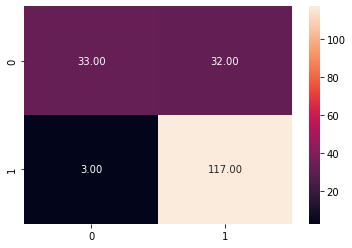

In [81]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [82]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

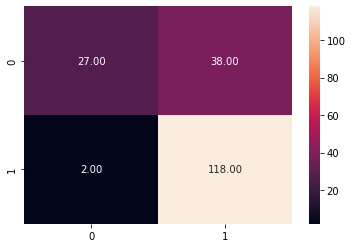

In [83]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [84]:
y_pred = ex.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

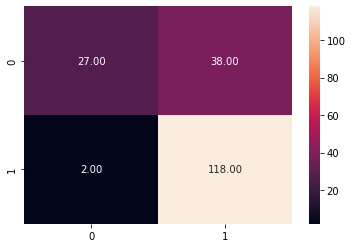

In [85]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [86]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 40,  25],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

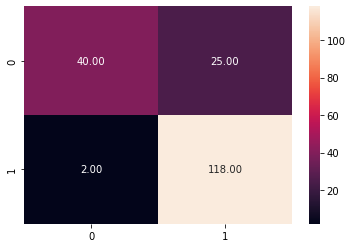

In [87]:
sns.heatmap(cm, annot=True,fmt='.2f')